In [1]:
import pandas as pd
import tensorflow as tf
from sklearn import preprocessing
from sklearn.cluster import DBSCAN
from tabulate import tabulate
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
import seaborn as sns
import numpy as np
# importing required libraries for normalizing data
from sklearn.preprocessing import StandardScaler,LabelBinarizer,MinMaxScaler
from sklearn.neighbors import NearestNeighbors
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
# representation of model layers
from tensorflow.keras.utils import plot_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score , classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
import joblib
from sklearn.svm import SVC
from sklearn.mixture import GaussianMixture
from sklearn.naive_bayes import GaussianNB

2025-05-02 01:39:26.565575: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746149966.758549      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746149966.818208      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# **ĐỌC DỮ LIỆU 34 NHÃN**

📌 Nhãn Mirai-greeth_flood: Thêm 5,042 dòng, tổng cộng 5,042 dòng
📌 Nhãn DDoS-TCP_Flood: Thêm 23,044 dòng, tổng cộng 23,044 dòng
📌 Nhãn DDoS-RSTFINFlood: Thêm 20,625 dòng, tổng cộng 20,625 dòng
📌 Nhãn DDoS-UDP_Flood: Thêm 27,807 dòng, tổng cộng 27,807 dòng
📌 Nhãn DDoS-ICMP_Flood: Thêm 37,281 dòng, tổng cộng 37,281 dòng
📌 Nhãn DDoS-ACK_Fragmentation: Thêm 1,468 dòng, tổng cộng 1,468 dòng
📌 Nhãn DDoS-SynonymousIP_Flood: Thêm 18,637 dòng, tổng cộng 18,637 dòng
📌 Nhãn DDoS-PSHACK_Flood: Thêm 21,226 dòng, tổng cộng 21,226 dòng
📌 Nhãn Mirai-udpplain: Thêm 4,643 dòng, tổng cộng 4,643 dòng
📌 Nhãn DDoS-SYN_Flood: Thêm 20,806 dòng, tổng cộng 20,806 dòng
📌 Nhãn MITM-ArpSpoofing: Thêm 1,603 dòng, tổng cộng 1,603 dòng
📌 Nhãn BenignTraffic: Thêm 5,645 dòng, tổng cộng 5,645 dòng
📌 Nhãn Mirai-greip_flood: Thêm 3,666 dòng, tổng cộng 3,666 dòng
📌 Nhãn DoS-UDP_Flood: Thêm 16,779 dòng, tổng cộng 16,779 dòng
📌 Nhãn DNS_Spoofing: Thêm 969 dòng, tổng cộng 969 dòng
📌 Nhãn DoS-TCP_Flood: Thêm 13,715 dòng, tổng 

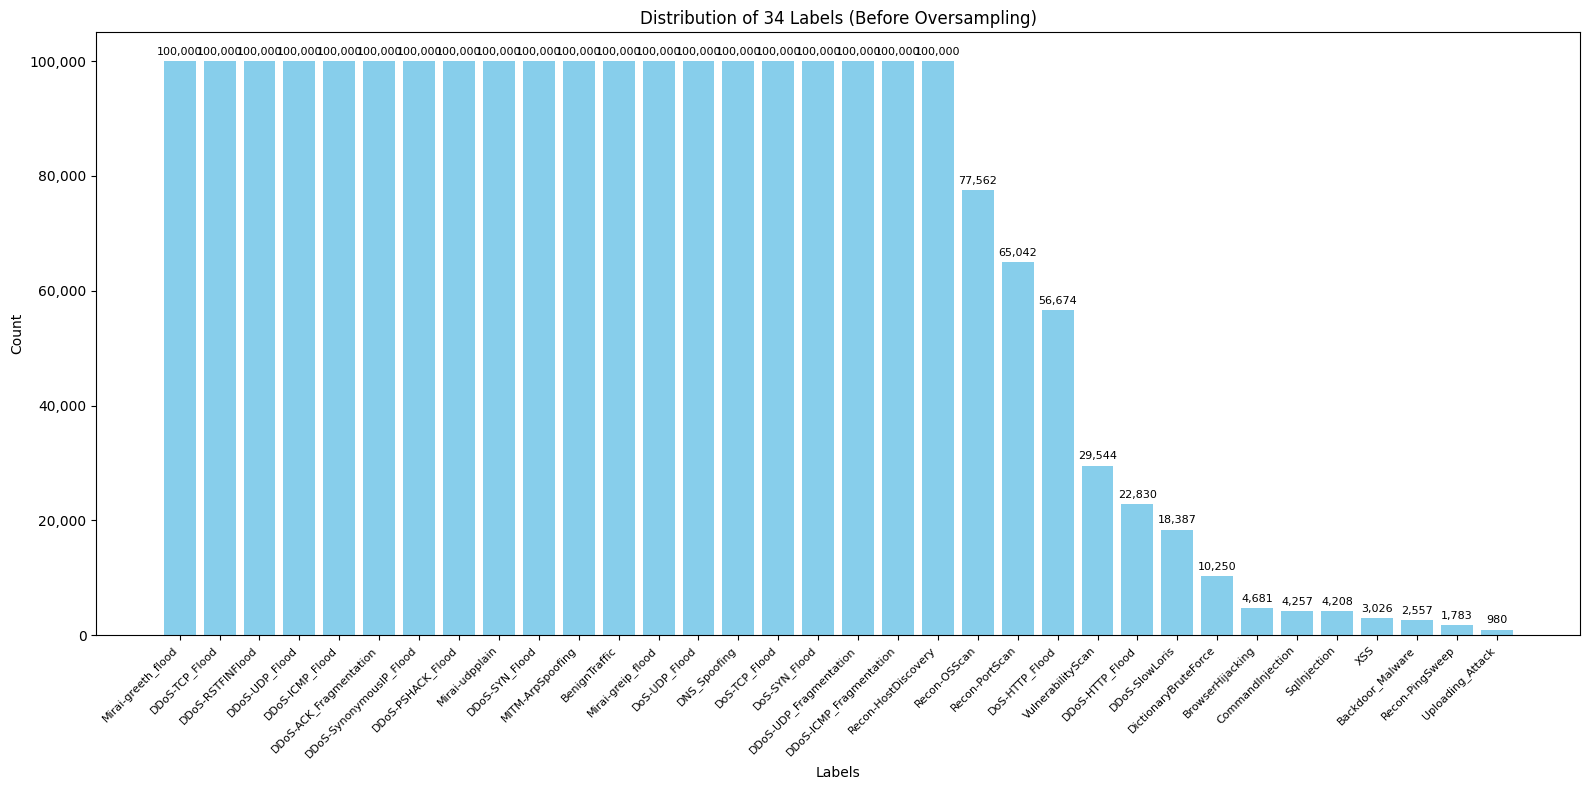

📌 Nhãn Mirai-greeth_flood: Đã có 100,000 dòng, giữ nguyên
📌 Nhãn DDoS-TCP_Flood: Đã có 100,000 dòng, giữ nguyên
📌 Nhãn DDoS-RSTFINFlood: Đã có 100,000 dòng, giữ nguyên
📌 Nhãn DDoS-UDP_Flood: Đã có 100,000 dòng, giữ nguyên
📌 Nhãn DDoS-ICMP_Flood: Đã có 100,000 dòng, giữ nguyên
📌 Nhãn DDoS-ACK_Fragmentation: Đã có 100,000 dòng, giữ nguyên
📌 Nhãn DDoS-SynonymousIP_Flood: Đã có 100,000 dòng, giữ nguyên
📌 Nhãn DDoS-PSHACK_Flood: Đã có 100,000 dòng, giữ nguyên
📌 Nhãn Mirai-udpplain: Đã có 100,000 dòng, giữ nguyên
📌 Nhãn DDoS-SYN_Flood: Đã có 100,000 dòng, giữ nguyên
📌 Nhãn MITM-ArpSpoofing: Đã có 100,000 dòng, giữ nguyên
📌 Nhãn BenignTraffic: Đã có 100,000 dòng, giữ nguyên
📌 Nhãn Mirai-greip_flood: Đã có 100,000 dòng, giữ nguyên
📌 Nhãn DoS-UDP_Flood: Đã có 100,000 dòng, giữ nguyên
📌 Nhãn DNS_Spoofing: Đã có 100,000 dòng, giữ nguyên
📌 Nhãn DoS-TCP_Flood: Đã có 100,000 dòng, giữ nguyên
📌 Nhãn DoS-SYN_Flood: Đã có 100,000 dòng, giữ nguyên
📌 Nhãn DDoS-UDP_Fragmentation: Đã có 100,000 dòng, giữ n

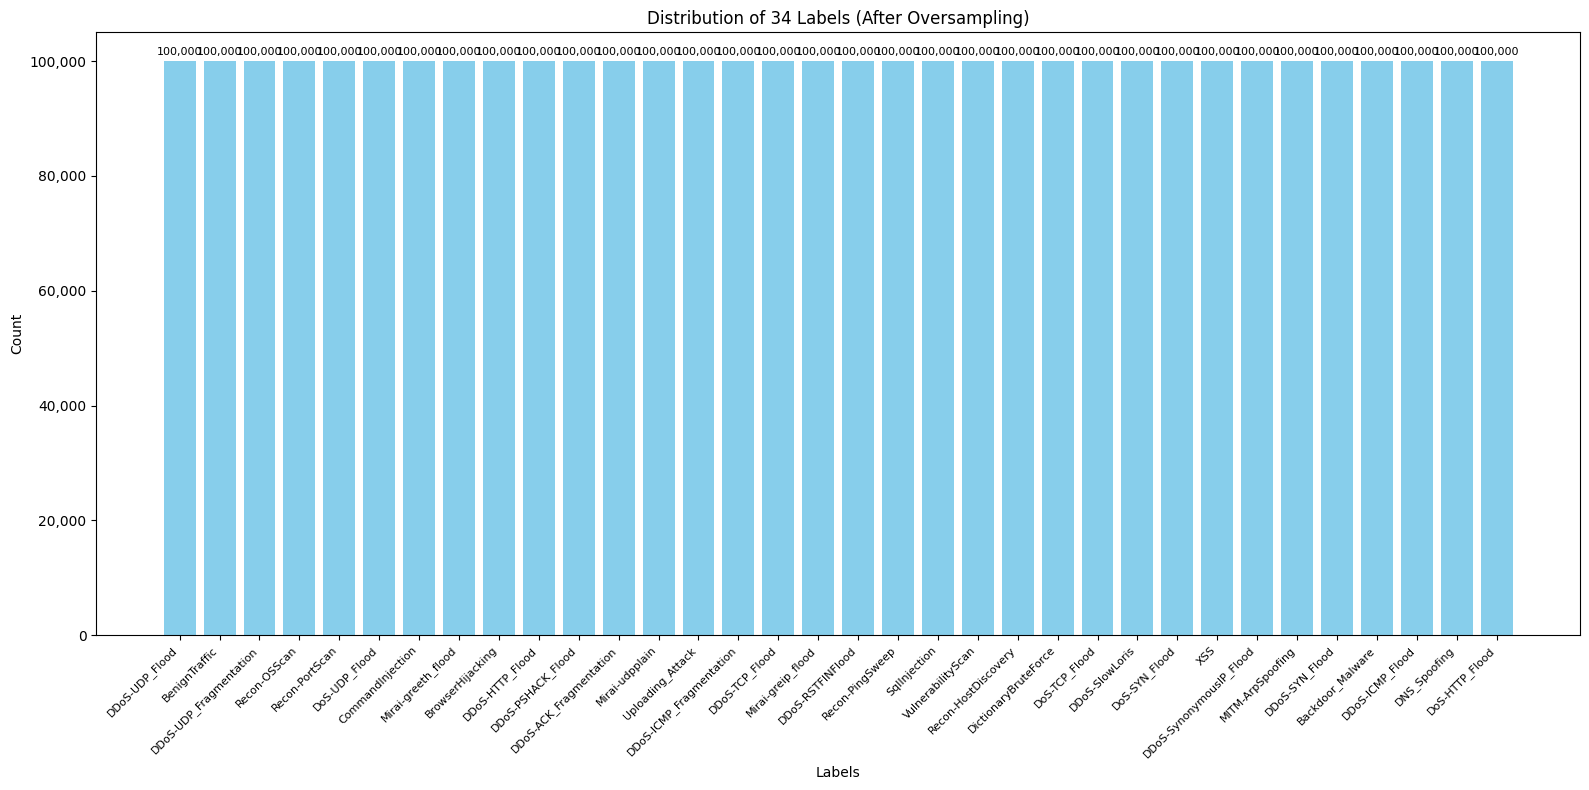

In [2]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import cudf  # Dùng cuDF để xử lý dữ liệu nhanh hơn trên GPU
import numpy as np
from sklearn.utils import resample

# Định nghĩa thư mục lưu dữ liệu
output_dir = "processed_data"
os.makedirs(output_dir, exist_ok=True)

# Danh sách 34 nhãn gốc từ CICIoT2023
labels = [
    'DDoS-ICMP_Flood', 'DDoS-UDP_Flood', 'DDoS-TCP_Flood', 'DDoS-PSHACK_Flood',
    'DDoS-SYN_Flood', 'DDoS-RSTFINFlood', 'DDoS-SynonymousIP_Flood', 'DDoS-ICMP_Fragmentation',
    'DDoS-UDP_Fragmentation', 'DDoS-ACK_Fragmentation', 'DDoS-HTTP_Flood', 'DDoS-SlowLoris',
    'DoS-UDP_Flood', 'DoS-TCP_Flood', 'DoS-SYN_Flood', 'DoS-HTTP_Flood',
    'Recon-HostDiscovery', 'Recon-OSScan', 'Recon-PortScan', 'Recon-PingSweep',
    'VulnerabilityScan', 'MITM-ArpSpoofing', 'DNS_Spoofing', 'DictionaryBruteForce',
    'BrowserHijacking', 'XSS', 'Uploading_Attack', 'SqlInjection', 'CommandInjection',
    'Backdoor_Malware', 'Mirai-greeth_flood', 'Mirai-udpplain', 'Mirai-greip_flood',
    'BenignTraffic'
]

# Khởi tạo dictionary để theo dõi số dòng của từng nhãn
label_counts = {label: 0 for label in labels}

# Giới hạn tối đa và tối thiểu 200,000 dòng cho mỗi nhãn
MAX_ROWS_PER_LABEL = 100_000
MIN_ROWS_PER_LABEL = 100_000

# Hàm đọc file và lọc dữ liệu
def read_file(filename, index):
    try:
        # Đọc file CSV bằng cuDF
        df = cudf.read_csv(filename)
        
        # Kiểm tra cột 'label'
        if 'label' not in df.columns:
            print(f"❌ File {filename}: Không tìm thấy cột 'label'!")
            return None
        
        # Lọc dữ liệu dựa trên giới hạn 200K cho mỗi nhãn
        valid_rows = []
        unique_labels = df['label'].unique().to_pandas().tolist()
        for label in unique_labels:
            if label not in labels:
                continue  # Bỏ qua nhãn không thuộc danh sách 34 nhãn
            
            current_count = label_counts.get(label, 0)
            remaining_quota = MAX_ROWS_PER_LABEL - current_count
            
            if remaining_quota <= 0:
                print(f"⚠ Nhãn {label} đã đủ {MAX_ROWS_PER_LABEL:,} dòng, không đọc thêm!")
                continue
            
            # Lấy các dòng thuộc nhãn này
            label_df = df[df['label'] == label]
            rows_to_take = min(len(label_df), remaining_quota)
            
            if rows_to_take > 0:
                valid_rows.append(label_df[:rows_to_take])
                label_counts[label] = current_count + rows_to_take
                print(f"📌 Nhãn {label}: Thêm {rows_to_take:,} dòng, tổng cộng {label_counts[label]:,} dòng")
        
        # Gộp các dòng hợp lệ
        if valid_rows:
            df_filtered = cudf.concat(valid_rows, ignore_index=True)
            print(f"📌 File {index}: Giữ {df_filtered.shape[0]:,} dòng sau khi lọc giới hạn")
            return df_filtered
        else:
            print(f"⚠ File {index}: Không có dữ liệu nào được giữ lại!")
            return None
    except Exception as e:
        print(f"❌ Lỗi khi đọc file {filename}: {e}")
        return None

# Đọc dữ liệu từ thư mục
data_dir = "/kaggle/input/cic-iot-2023/"
file_list = glob.glob(f"{data_dir}*.csv")[:134]  # Lấy tối đa 134 file

# Đọc tuần tự từng file
dfs = []
for idx, fname in enumerate(file_list):
    df = read_file(fname, idx)
    if df is not None:
        dfs.append(df)

# Nối dữ liệu và xử lý cân bằng
if dfs:
    df_full = cudf.concat(dfs, ignore_index=True)
    print(f"✅ Dữ liệu đã được nối! Kích thước: {df_full.shape}")
    print(f"📋 Nhãn duy nhất: {df_full['label'].unique().to_pandas().tolist()}")
    
    # Chuyển sang pandas để xử lý oversampling
    df_pandas = df_full.to_pandas()
    
    # Kiểm tra phân bố nhãn trước khi cân bằng
    print("\n📋 Phân bố nhãn trước khi cân bằng:")
    label_distribution = df_pandas["label"].value_counts()
    print(label_distribution)
    
    # Vẽ biểu đồ phân bố nhãn trước khi cân bằng
    fig, ax = plt.subplots(figsize=(16, 8))
    bars = ax.bar(label_distribution.index, label_distribution.values, color='skyblue')
    plt.xticks(rotation=45, ha='right', fontsize=8)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
    ax.set_xlabel('Labels')
    ax.set_ylabel('Count')
    ax.set_title('Distribution of 34 Labels (Before Oversampling)')
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{int(height):,}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)
    plt.tight_layout()
    plt.savefig(f'{output_dir}/label_distribution_before_oversampling_34labels.png')
    plt.show()
    
    # Chuẩn bị dữ liệu cho oversampling
    balanced_dfs = []
    unique_labels = df_pandas['label'].unique()
    
    # Áp dụng oversampling thủ công cho mỗi nhãn
    for label in unique_labels:
        if label not in labels:
            continue
        label_df = df_pandas[df_pandas['label'] == label]
        current_count = len(label_df)
        
        if current_count < MIN_ROWS_PER_LABEL:
            # Oversampling bằng resample
            oversampled_df = resample(
                label_df,
                replace=True,  # Cho phép sao chép mẫu
                n_samples=MIN_ROWS_PER_LABEL,  # Đạt 200K
                random_state=42
            )
            print(f"📌 Oversampling nhãn {label}: Từ {current_count:,} lên {MIN_ROWS_PER_LABEL:,} dòng")
            balanced_dfs.append(oversampled_df)
        else:
            print(f"📌 Nhãn {label}: Đã có {current_count:,} dòng, giữ nguyên")
            balanced_dfs.append(label_df)
    
    # Gộp dữ liệu đã cân bằng
    df_balanced = pd.concat(balanced_dfs, ignore_index=True)
    
    # Chuyển lại thành cuDF để đồng bộ
    df_full = cudf.from_pandas(df_balanced)
    
    # Kiểm tra phân bố nhãn sau khi cân bằng
    print("\n📋 Phân bố nhãn sau khi cân bằng bằng oversampling:")
    balanced_label_distribution = df_full["label"].value_counts().to_pandas()
    print(balanced_label_distribution)
    
    # Vẽ biểu đồ phân bố nhãn sau khi cân bằng
    fig, ax = plt.subplots(figsize=(16, 8))
    bars = ax.bar(balanced_label_distribution.index, balanced_label_distribution.values, color='skyblue')
    plt.xticks(rotation=45, ha='right', fontsize=8)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
    ax.set_xlabel('Labels')
    ax.set_ylabel('Count')
    ax.set_title('Distribution of 34 Labels (After Oversampling)')
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{int(height):,}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)
    plt.tight_layout()
    plt.savefig(f'{output_dir}/label_distribution_after_oversampling_34labels.png')
    plt.show()
    
   
    
else:
    print("⚠ Không có file nào được đọc thành công hoặc tất cả dữ liệu rỗng!")

# **ÁNH XẠ NHÃN**

📋 Nhãn duy nhất trong dữ liệu: ['Mirai-greeth_flood', 'DDoS-TCP_Flood', 'DDoS-RSTFINFlood', 'DDoS-UDP_Flood', 'DDoS-ICMP_Flood', 'DDoS-ACK_Fragmentation', 'DDoS-SynonymousIP_Flood', 'DDoS-PSHACK_Flood', 'Mirai-udpplain', 'DDoS-SYN_Flood', 'MITM-ArpSpoofing', 'BenignTraffic', 'Mirai-greip_flood', 'DoS-UDP_Flood', 'DNS_Spoofing', 'DoS-TCP_Flood', 'DoS-SYN_Flood', 'DDoS-UDP_Fragmentation', 'DDoS-ICMP_Fragmentation', 'Recon-OSScan', 'Recon-HostDiscovery', 'Recon-PortScan', 'DoS-HTTP_Flood', 'VulnerabilityScan', 'DDoS-HTTP_Flood', 'DDoS-SlowLoris', 'DictionaryBruteForce', 'CommandInjection', 'SqlInjection', 'BrowserHijacking', 'Backdoor_Malware', 'Recon-PingSweep', 'XSS', 'Uploading_Attack']
📌 Số đặc trưng được chọn: 46
⚠️ Cảnh báo: Tìm thấy 46 đặc trưng, kỳ vọng 45 đặc trưng sau khi loại bỏ 'label'!
📊 Ánh xạ nhãn (34 nhãn): {'Backdoor_Malware': 0, 'BenignTraffic': 1, 'BrowserHijacking': 2, 'CommandInjection': 3, 'DDoS-ACK_Fragmentation': 4, 'DDoS-HTTP_Flood': 5, 'DDoS-ICMP_Flood': 6, 'DDoS

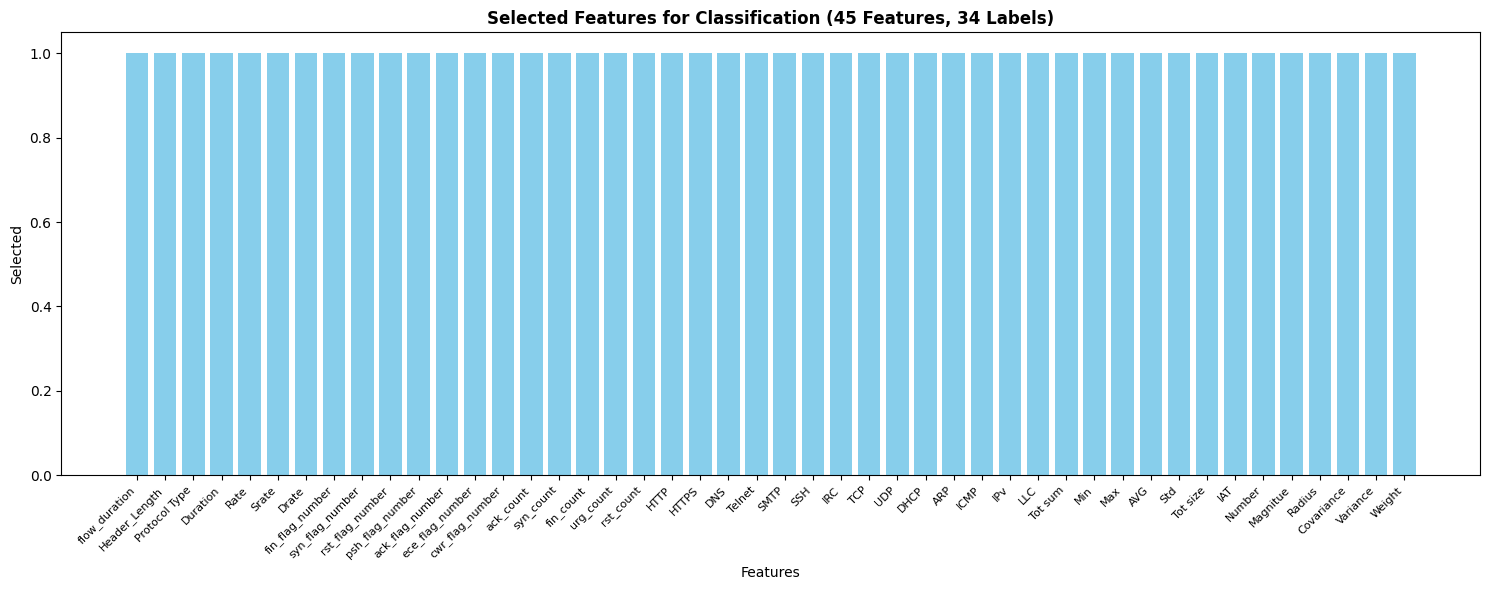

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.impute import KNNImputer
import pickle
import os
import matplotlib.pyplot as plt

# Đường dẫn lưu dữ liệu
output_dir = "processed_data"
os.makedirs(output_dir, exist_ok=True)

# Giả định df_full là DataFrame từ cell đọc dữ liệu trước đó (cuDF)
# Chuyển từ cuDF sang Pandas
df_original = df_full.to_pandas()

# Kiểm tra dữ liệu đầu vào
if df_original.empty or 'label' not in df_original.columns:
    raise ValueError("❌ Dữ liệu đầu vào rỗng hoặc thiếu cột 'label'!")

# Xử lý giá trị thiếu cho cột số
numeric_columns = df_original.select_dtypes(include=[np.number]).columns
df_original[numeric_columns] = df_original[numeric_columns].fillna(df_original[numeric_columns].mean())

# Tách đặc trưng và nhãn
X = df_original.drop(columns=['label']).select_dtypes(include=[np.number])
y = df_original['label']

# Kiểm tra nhãn duy nhất
print("📋 Nhãn duy nhất trong dữ liệu:", y.unique().tolist())
if len(y.unique()) != 34:
    print(f"⚠️ Cảnh báo: Tìm thấy {len(y.unique())} nhãn, kỳ vọng 34 nhãn!")

# Lấy tất cả đặc trưng (loại bỏ cột 'label')
selected_features = list(X.columns)
print(f"📌 Số đặc trưng được chọn: {len(selected_features)}")
if len(selected_features) != 45:
    print(f"⚠️ Cảnh báo: Tìm thấy {len(selected_features)} đặc trưng, kỳ vọng 45 đặc trưng sau khi loại bỏ 'label'!")

# Kiểm tra xem các đặc trưng có tồn tại trong dữ liệu không
missing_features = [f for f in selected_features if f not in X.columns]
if missing_features:
    raise ValueError(f"❌ Các đặc trưng sau không tồn tại trong dữ liệu: {missing_features}")

# Lấy chỉ số của các đặc trưng
feature_indices = [list(X.columns).index(f) for f in selected_features]

# Áp dụng các đặc trưng (giữ nguyên toàn bộ 45 đặc trưng)
X = X[selected_features]

# Chia dữ liệu thành tập train, val, test
X_temp, X_test, Y_temp, Y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_temp, Y_temp, test_size=0.1875, stratify=Y_temp, random_state=42)

# Mã hóa nhãn (34 nhãn gốc)
label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)
Y_val_encoded = label_encoder.transform(Y_val)
Y_test_encoded = label_encoder.transform(Y_test)
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("📊 Ánh xạ nhãn (34 nhãn):", label_mapping)

# Kiểm tra phân bố nhãn
print("\n📊 Phân bố nhãn trong tập huấn luyện:")
print(pd.Series(Y_train_encoded).value_counts().rename(label_mapping))
print("\n📊 Phân bố nhãn trong tập validation:")
print(pd.Series(Y_val_encoded).value_counts().rename(label_mapping))
print("\n📊 Phân bố nhãn trong tập kiểm tra:")
print(pd.Series(Y_test_encoded).value_counts().rename(label_mapping))

# Xử lý NaN và outlier bằng KNNImputer
imputer = KNNImputer(n_neighbors=5)
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)
X_test_imputed = imputer.transform(X_test)

# Chuẩn hóa dữ liệu bằng RobustScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_val_scaled = scaler.transform(X_val_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Kiểm tra giá trị sau khi chọn đặc trưng
print("🔍 Giá trị tối đa và tối thiểu trong X_train_scaled:")
print(pd.DataFrame(X_train_scaled, columns=selected_features).describe().loc[['min', 'max']])
print("🔍 Giá trị tối đa và tối thiểu trong X_val_scaled:")
print(pd.DataFrame(X_val_scaled, columns=selected_features).describe().loc[['min', 'max']])
print("🔍 Giá trị tối đa và tối thiểu trong X_test_scaled:")
print(pd.DataFrame(X_test_scaled, columns=selected_features).describe().loc[['min', 'max']])

# Lưu dữ liệu đã xử lý
np.save(f"{output_dir}/X_train_scaled_34labels.npy", X_train_scaled)
np.save(f"{output_dir}/Y_train_encoded_34labels.npy", Y_train_encoded)
np.save(f"{output_dir}/X_val_scaled_34labels.npy", X_val_scaled)
np.save(f"{output_dir}/Y_val_encoded_34labels.npy", Y_val_encoded)
np.save(f"{output_dir}/X_test_scaled_34labels.npy", X_test_scaled)
np.save(f"{output_dir}/Y_test_encoded_34labels.npy", Y_test_encoded)

# Lưu các đối tượng xử lý
with open(f"{output_dir}/label_encoder_34labels.pkl", 'wb') as f:
    pickle.dump(label_encoder, f)
with open(f"{output_dir}/scaler_34labels.pkl", 'wb') as f:
    pickle.dump(scaler, f)
with open(f"{output_dir}/imputer_34labels.pkl", 'wb') as f:
    pickle.dump(imputer, f)
with open(f"{output_dir}/selected_features_34labels.pkl", 'wb') as f:
    pickle.dump(selected_features, f)

# In thông tin chi tiết
print(f"✅ Dữ liệu đã xử lý và lưu trong '{output_dir}'!")
print(f"📌 Số đặc trưng được chọn: {len(selected_features)}")
print(f"📋 Các đặc trưng được chọn: {selected_features}")

# Vẽ biểu đồ danh sách đặc trưng được chọn
plt.figure(figsize=(15, 6))  # Tăng kích thước để hiển thị 45 đặc trưng
plt.bar(selected_features, [1] * len(selected_features), color='skyblue')
plt.title('Selected Features for Classification (45 Features, 34 Labels)', fontsize=12, fontweight='bold')
plt.xlabel('Features', fontsize=10)
plt.ylabel('Selected', fontsize=10)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.savefig(f"{output_dir}/selected_features_34labels.png")
plt.show()

# **CHUYỂN ĐỔI ĐẶC TRƯNG FUZZY**

In [4]:
import numpy as np
import joblib
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
import os

# Tạo thư mục lưu dữ liệu
output_dir = "processed_data"
os.makedirs(output_dir, exist_ok=True)

# Tải dữ liệu đã xử lý
X_train_scaled = np.load(f"{output_dir}/X_train_scaled_34labels.npy")
Y_train_encoded = np.load(f"{output_dir}/Y_train_encoded_34labels.npy")
X_val_scaled = np.load(f"{output_dir}/X_val_scaled_34labels.npy")
Y_val_encoded = np.load(f"{output_dir}/Y_val_encoded_34labels.npy")
X_test_scaled = np.load(f"{output_dir}/X_test_scaled_34labels.npy")
Y_test_encoded = np.load(f"{output_dir}/Y_test_encoded_34labels.npy")

# Kiểm tra shape dữ liệu
print(f"📌 Shape dữ liệu: train {X_train_scaled.shape}, val {X_val_scaled.shape}, test {X_test_scaled.shape}")
if X_train_scaled.shape[1] != 46:
    raise ValueError(f"❌ Số đặc trưng không phải 46, tìm thấy {X_train_scaled.shape[1]} đặc trưng!")
if len(np.unique(Y_train_encoded)) != 34:
    raise ValueError(f"❌ Số nhãn không phải 34, tìm thấy {len(np.unique(Y_train_encoded))} nhãn!")

# Chia 46 đặc trưng thành 5 nhóm (4 nhóm 9 đặc trưng, 1 nhóm 10 đặc trưng)
n_groups = 5
base_group_size = 46 // n_groups  # 9 đặc trưng mỗi nhóm
remainder = 46 % n_groups  # 1 đặc trưng dư
group_sizes = [base_group_size + 1 if i < remainder else base_group_size for i in range(n_groups)]
group_boundaries = np.cumsum([0] + group_sizes)
X_train_grouped = []
X_val_grouped = []
X_test_grouped = []

print("🔄 Tạo đặc trưng xác suất nhóm bằng XGBoost...")
for i in range(n_groups):
    start_idx = group_boundaries[i]
    end_idx = group_boundaries[i + 1]
    X_train_group = X_train_scaled[:, start_idx:end_idx]  # Shape: [n_samples, 9 hoặc 10]
    X_val_group = X_val_scaled[:, start_idx:end_idx]
    X_test_group = X_test_scaled[:, start_idx:end_idx]

    # Kiểm tra shape của nhóm
    print(f"Nhóm {i+1}: Shape X_train_group: {X_train_group.shape}")

    # Huấn luyện XGBoost trên nhóm đặc trưng
    xgb = XGBClassifier(
        n_estimators=50,
        max_depth=8,
        min_child_weight=10,
        tree_method="hist",
        device="cuda",
        random_state=42,
        objective="multi:softprob",
        num_class=34
    )
    xgb.fit(X_train_group, Y_train_encoded)

    # Tạo xác suất dự đoán
    train_probs = xgb.predict_proba(X_train_group)  # Shape: [n_samples, 34]
    val_probs = xgb.predict_proba(X_val_group)
    test_probs = xgb.predict_proba(X_test_group)

    X_train_grouped.append(train_probs)
    X_val_grouped.append(val_probs)
    X_test_grouped.append(test_probs)

    # Lưu mô hình XGBoost
    joblib.dump(xgb, f"{output_dir}/xgb_group_{i}_34labels.joblib")
    print(f"✅ Đã xử lý nhóm {i+1}/{n_groups}")

# Gộp đặc trưng xác suất
X_train_grouped = np.concatenate(X_train_grouped, axis=1)  # Shape: [n_samples, 5*34 = 170]
X_val_grouped = np.concatenate(X_val_grouped, axis=1)
X_test_grouped = np.concatenate(X_test_grouped, axis=1)

# Kiểm tra shape sau khi gộp
print(f"📌 Shape X_train_grouped: {X_train_grouped.shape}")

# Kết hợp với top-k đặc trưng gốc
k = 10  # Chọn 10 đặc trưng quan trọng nhất
xgb_full = XGBClassifier(
    n_estimators=100,
    max_depth=10,
    min_child_weight=10,
    tree_method="hist",
    device="cuda",
    random_state=42,
    objective="multi:softprob",
    num_class=34
)
xgb_full.fit(X_train_scaled, Y_train_encoded)
feature_importance = xgb_full.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1][:k]

# Kết hợp đặc trưng xác suất và đặc trưng gốc
X_train_combined = np.concatenate([X_train_grouped, X_train_scaled[:, sorted_idx]], axis=1)  # Shape: [n_samples, 170+10 = 180]
X_val_combined = np.concatenate([X_val_grouped, X_val_scaled[:, sorted_idx]], axis=1)
X_test_combined = np.concatenate([X_test_grouped, X_test_scaled[:, sorted_idx]], axis=1)

# Kiểm tra shape sau khi kết hợp
print(f"📌 Shape X_train_combined: {X_train_combined.shape}")

# Chuẩn hóa lại dữ liệu
scaler = StandardScaler()
X_train_combined = scaler.fit_transform(X_train_combined)
X_val_combined = scaler.transform(X_val_combined)
X_test_combined = scaler.transform(X_test_combined)

# Lưu dữ liệu
np.save(f"{output_dir}/X_train_combined_34labels.npy", X_train_combined)
np.save(f"{output_dir}/X_val_combined_34labels.npy", X_val_combined)
np.save(f"{output_dir}/X_test_combined_34labels.npy", X_test_combined)
joblib.dump(scaler, f"{output_dir}/scaler_combined_34labels.joblib")

# In thông tin
print(f"✅ Đã tạo đặc trưng kết hợp!")
print(f"📌 Shape: train {X_train_combined.shape}, val {X_val_combined.shape}, test {X_test_combined.shape}")
print(f"📌 Số đặc trưng: {X_train_combined.shape[1]} (170 xác suất + 10 gốc)")
print(f"📌 Top-10 đặc trưng gốc (chỉ số): {sorted_idx}")

📌 Shape dữ liệu: train (2210000, 46), val (510000, 46), test (680000, 46)
🔄 Tạo đặc trưng xác suất nhóm bằng XGBoost...
Nhóm 1: Shape X_train_group: (2210000, 10)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [01:43:15] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


✅ Đã xử lý nhóm 1/5
Nhóm 2: Shape X_train_group: (2210000, 9)
✅ Đã xử lý nhóm 2/5
Nhóm 3: Shape X_train_group: (2210000, 9)
✅ Đã xử lý nhóm 3/5
Nhóm 4: Shape X_train_group: (2210000, 9)
✅ Đã xử lý nhóm 4/5
Nhóm 5: Shape X_train_group: (2210000, 9)
✅ Đã xử lý nhóm 5/5
📌 Shape X_train_grouped: (2210000, 170)
📌 Shape X_train_combined: (2210000, 180)
✅ Đã tạo đặc trưng kết hợp!
📌 Shape: train (2210000, 180), val (510000, 180), test (680000, 180)
📌 Số đặc trưng: 180 (170 xác suất + 10 gốc)
📌 Top-10 đặc trưng gốc (chỉ số): [ 7 30 24  8 39 45 10 31 19 41]


# **LẤY ĐẶC TRƯNG GIẢM CHIỀU FUZZY BẰNG PCA**

In [ ]:
!pip install dask

In [ ]:
import pandas as pd
import numpy as np
import time
import gc
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.impute import KNNImputer
from xgboost import XGBClassifier
from tqdm import tqdm
import joblib
import pickle
import os
import matplotlib.pyplot as plt
import dask.array as da
import torch  # Để xử lý dữ liệu trên GPU

# Đường dẫn lưu dữ liệu
output_dir = "processed_data"
os.makedirs(output_dir, exist_ok=True)

# Giả định df_full đã được đọc trước đó
df_original = df_full.to_pandas()

# Xử lý giá trị thiếu
numeric_columns = df_original.select_dtypes(include=[np.number]).columns
df_original[numeric_columns] = df_original[numeric_columns].fillna(df_original[numeric_columns].mean())

# Tách đặc trưng và nhãn
X = df_original.drop(columns=['label']).select_dtypes(include=[np.number])
y = df_original['label']

# 30 đặc trưng đã chọn
selected_features = [
    'IAT', 'Tot size', 'Max', 'Tot sum', 'Magnitue', 'AVG', 'Min', 'Header_Length', 
    'Protocol Type', 'rst_count', 'Weight', 'Number', 'Variance', 'Std', 'Radius', 
    'Covariance', 'Duration', 'urg_count', 'flow_duration', 'Rate', 'Srate', 'TCP', 
    'ack_flag_number', 'syn_count', 'HTTPS', 'ack_count', 'syn_flag_number', 'ICMP', 
    'fin_count', 'UDP'
]

# Kiểm tra đặc trưng
missing_features = [f for f in selected_features if f not in X.columns]
if missing_features:
    raise ValueError(f"❌ Các đặc trưng sau không tồn tại: {missing_features}")

X = X[selected_features]
selected_indices = [list(X.columns).index(f) for f in selected_features]

# Chia dữ liệu
from sklearn.model_selection import train_test_split
X_temp, X_test, Y_temp, Y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_temp, Y_temp, test_size=0.1875, stratify=Y_temp, random_state=42)

# Lưu số mẫu để dùng sau
np.save(f"{output_dir}/n_train_samples.npy", X_train.shape[0])
np.save(f"{output_dir}/n_val_samples.npy", X_val.shape[0])
np.save(f"{output_dir}/n_test_samples.npy", X_test.shape[0])

# Mã hóa nhãn
label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)
Y_val_encoded = label_encoder.transform(Y_val)
Y_test_encoded = label_encoder.transform(Y_test)
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

# Xử lý NaN và chuẩn hóa
imputer = KNNImputer(n_neighbors=5)
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)
X_test_imputed = imputer.transform(X_test)

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_val_scaled = scaler.transform(X_val_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Giải phóng bộ nhớ
del df_original, X, y, X_temp, Y_temp, X_train, X_val, X_test, Y_train, Y_val, Y_test
del X_train_imputed, X_val_imputed, X_test_imputed
gc.collect()

# Hàm xử lý fuzzy theo batch với Dask
def convert_to_fuzzy_features_xgb_batch(X_train, Y_train, X_val, X_test, selected_features, selected_indices, n_labels=34, n_estimators=50, batch_size=6):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    X_train_fuzzy_batches = []
    X_val_fuzzy_batches = []
    X_test_fuzzy_batches = []

    for batch_start in tqdm(range(0, len(selected_indices), batch_size), desc="Xử lý batch đặc trưng fuzzy"):
        batch_indices = selected_indices[batch_start:batch_start + batch_size]
        batch_features = selected_features[batch_start:batch_start + batch_size]
        
        X_train_fuzzy_batch = []
        X_val_fuzzy_batch = []
        X_test_fuzzy_batch = []

        for idx, i in enumerate(batch_indices):
            # Chuyển dữ liệu sang GPU
            X_train_feature = torch.tensor(X_train[:, i].reshape(-1, 1), dtype=torch.float32).to(device)
            X_val_feature = torch.tensor(X_val[:, i].reshape(-1, 1), dtype=torch.float32).to(device)
            X_test_feature = torch.tensor(X_test[:, i].reshape(-1, 1), dtype=torch.float32).to(device)

            xgb = XGBClassifier(
                n_estimators=n_estimators,
                max_depth=10,
                min_child_weight=10,
                tree_method="hist",
                device="cuda",
                random_state=44,
                objective="multi:softprob"
            )
            # Huấn luyện trên CPU vì XGBoost yêu cầu NumPy array
            xgb.fit(X_train_feature.cpu().numpy(), Y_train)

            # Dự đoán trên CPU
            train_probs = xgb.predict_proba(X_train_feature.cpu().numpy()).astype(np.float32)
            val_probs = xgb.predict_proba(X_val_feature.cpu().numpy()).astype(np.float32)
            test_probs = xgb.predict_proba(X_test_feature.cpu().numpy()).astype(np.float32)

            if train_probs.shape[1] < n_labels:
                missing_labels = n_labels - train_probs.shape[1]
                train_probs = np.pad(train_probs, ((0, 0), (0, missing_labels)), mode='constant')
                val_probs = np.pad(val_probs, ((0, 0), (0, missing_labels)), mode='constant')
                test_probs = np.pad(test_probs, ((0, 0), (0, missing_labels)), mode='constant')

            X_train_fuzzy_batch.append(train_probs)
            X_val_fuzzy_batch.append(val_probs)
            X_test_fuzzy_batch.append(test_probs)

            joblib.dump(xgb, f"{output_dir}/xgb_feature_{batch_features[idx]}_34labels.joblib")

        X_train_fuzzy_batch = np.concatenate(X_train_fuzzy_batch, axis=1)
        X_val_fuzzy_batch = np.concatenate(X_val_fuzzy_batch, axis=1)
        X_test_fuzzy_batch = np.concatenate(X_test_fuzzy_batch, axis=1)

        np.savez_compressed(
            f"{output_dir}/X_train_fuzzy_batch_{batch_start//batch_size}.npz",
            X_train_fuzzy_batch=X_train_fuzzy_batch
        )
        np.savez_compressed(
            f"{output_dir}/X_val_fuzzy_batch_{batch_start//batch_size}.npz",
            X_val_fuzzy_batch=X_val_fuzzy_batch
        )
        np.savez_compressed(
            f"{output_dir}/X_test_fuzzy_batch_{batch_start//batch_size}.npz",
            X_test_fuzzy_batch=X_test_fuzzy_batch
        )

        del X_train_fuzzy_batch, X_val_fuzzy_batch, X_test_fuzzy_batch
        gc.collect()
        torch.cuda.empty_cache()

    # Sử dụng Dask để nối các batch
    X_train_fuzzy_chunks = []
    X_val_fuzzy_chunks = []
    X_test_fuzzy_chunks = []
    for batch_idx in range(0, len(selected_indices), batch_size):
        batch_data = np.load(f"{output_dir}/X_train_fuzzy_batch_{batch_idx//batch_size}.npz")
        X_train_fuzzy_chunks.append(da.from_array(batch_data['X_train_fuzzy_batch'], chunks=(10000, -1)))
        batch_data = np.load(f"{output_dir}/X_val_fuzzy_batch_{batch_idx//batch_size}.npz")
        X_val_fuzzy_chunks.append(da.from_array(batch_data['X_val_fuzzy_batch'], chunks=(10000, -1)))
        batch_data = np.load(f"{output_dir}/X_test_fuzzy_batch_{batch_idx//batch_size}.npz")
        X_test_fuzzy_chunks.append(da.from_array(batch_data['X_test_fuzzy_batch'], chunks=(10000, -1)))

    X_train_fuzzy = da.concatenate(X_train_fuzzy_chunks, axis=1)
    X_val_fuzzy = da.concatenate(X_val_fuzzy_chunks, axis=1)
    X_test_fuzzy = da.concatenate(X_test_fuzzy_chunks, axis=1)

    # Lưu Dask array thành stack của các file .npy
    train_stack_dir = f"{output_dir}/X_train_fuzzy_stack"
    val_stack_dir = f"{output_dir}/X_val_fuzzy_stack"
    test_stack_dir = f"{output_dir}/X_test_fuzzy_stack"
    os.makedirs(train_stack_dir, exist_ok=True)
    os.makedirs(val_stack_dir, exist_ok=True)
    os.makedirs(test_stack_dir, exist_ok=True)

    da.to_npy_stack(train_stack_dir, X_train_fuzzy, axis=0)
    da.to_npy_stack(val_stack_dir, X_val_fuzzy, axis=0)
    da.to_npy_stack(test_stack_dir, X_test_fuzzy, axis=0)

    # Tùy chọn: Chuyển về single .npy file nếu RAM đủ
    try:
        X_train_fuzzy = X_train_fuzzy.compute()
        X_val_fuzzy = X_val_fuzzy.compute()
        X_test_fuzzy = X_test_fuzzy.compute()

        # Lưu vào file .npy
        np.save(f"{output_dir}/X_train_fuzzy_xgb_34labels.npy", X_train_fuzzy)
        np.save(f"{output_dir}/X_val_fuzzy_xgb_34labels.npy", X_val_fuzzy)
        np.save(f"{output_dir}/X_test_fuzzy_xgb_34labels.npy", X_test_fuzzy)
    except MemoryError:
        print("⚠️ RAM không đủ để compute Dask array. Sử dụng stack .npy files hoặc custom DataLoader.")

    return X_train_fuzzy, X_val_fuzzy, X_test_fuzzy

# Tính đặc trưng fuzzy
start_time = time.time()
X_train_fuzzy, X_val_fuzzy, X_test_fuzzy = convert_to_fuzzy_features_xgb_batch(
    X_train_scaled, Y_train_encoded, X_val_scaled, X_test_scaled,
    selected_features=selected_features, selected_indices=selected_indices, n_labels=34, batch_size=6
)
print(f"⏱ Thời gian xử lý: {time.time() - start_time:.2f}s")

# Kiểm tra và xử lý NaN/Inf
def check_and_clean_data(X, name):
    if np.any(np.isnan(X)) or np.any(np.isinf(X)):
        print(f"⚠️ {name} chứa giá trị NaN hoặc Inf")
        X = np.nan_to_num(X, nan=0.0, posinf=1e6, neginf=-1e6)
    return X

X_train_fuzzy = check_and_clean_data(X_train_fuzzy, "X_train_fuzzy")
X_val_fuzzy = check_and_clean_data(X_val_fuzzy, "X_val_fuzzy")
X_test_fuzzy = check_and_clean_data(X_test_fuzzy, "X_test_fuzzy")

# Lưu dữ liệu
np.save(f"{output_dir}/Y_train_encoded_34labels.npy", Y_train_encoded)
np.save(f"{output_dir}/Y_val_encoded_34labels.npy", Y_val_encoded)
np.save(f"{output_dir}/Y_test_encoded_34labels.npy", Y_test_encoded)

# Lưu các đối tượng
with open(f"{output_dir}/label_encoder_34labels.pkl", 'wb') as f:
    pickle.dump(label_encoder, f)
with open(f"{output_dir}/scaler_34labels.pkl", 'wb') as f:
    pickle.dump(scaler, f)
with open(f"{output_dir}/imputer_34labels.pkl", 'wb') as f:
    pickle.dump(imputer, f)
with open(f"{output_dir}/selected_features_34labels.pkl", 'wb') as f:
    pickle.dump(selected_features, f)

print(f"✅ Dữ liệu fuzzy đã xử lý và lưu trong '{output_dir}'!")
print(f"📌 Số đặc trưng fuzzy: 1020 (30 đặc trưng × 34 nhãn)")
print(f"📋 Đặc trưng được sử dụng: {selected_features}")

# Vẽ biểu đồ đặc trưng
plt.figure(figsize=(15, 5))
plt.bar(selected_features, [1] * len(selected_features), color='lightblue')
plt.title('30 Đặc trưng cho Biến đổi Fuzzy (34 Nhãn)', fontsize=12, fontweight='bold')
plt.xlabel('Đặc trưng', fontsize=10)
plt.ylabel('Đã chọn', fontsize=10)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.savefig(f"{output_dir}/selected_features_34labels.png")
plt.show()

# **MÔ HÌNH DCN-V2 FUZZY ĐẶC TRƯNG**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import numpy as np
import time
from tqdm import tqdm
import os
from torch.amp import GradScaler, autocast

# FocalLoss
class FocalLoss(nn.Module):
    def __init__(self, gamma=3.5, alpha=None, reduction='mean', label_smoothing=0.1):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha
        self.reduction = reduction
        self.label_smoothing = label_smoothing

    def forward(self, inputs, targets):
        inputs = torch.clamp(inputs, -100, 100)
        ce_loss = F.cross_entropy(inputs, targets, reduction='none', label_smoothing=self.label_smoothing)
        pt = torch.exp(-ce_loss)
        loss = ((1 - pt) ** self.gamma) * ce_loss
        if self.alpha is not None:
            alpha_t = self.alpha[targets]
            loss = alpha_t * loss
        if self.reduction == 'mean':
            return loss.mean()
        return loss

# GhostBN1d
class GhostBN1d(nn.Module):
    def __init__(self, num_features, virtual_batch_size=512):
        super(GhostBN1d, self).__init__()
        self.bn = nn.BatchNorm1d(num_features)
        self.virtual_batch_size = virtual_batch_size

    def forward(self, x):
        batch_size = x.size(0)
        if batch_size <= self.virtual_batch_size:
            return self.bn(x)
        n_splits = batch_size // self.virtual_batch_size
        x_splits = torch.split(x, self.virtual_batch_size, dim=0)
        x_splits = [self.bn(split) for split in x_splits[:n_splits]]
        remaining = batch_size % self.virtual_batch_size
        if remaining > 0:
            x_splits.append(self.bn(x[-remaining:]))
        return torch.cat(x_splits, dim=0)

# CrossLayer
class CrossLayer(nn.Module):
    def __init__(self, input_dim):
        super(CrossLayer, self).__init__()
        self.weight = nn.Parameter(torch.randn(input_dim, input_dim) * 0.01)
        self.bias = nn.Parameter(torch.zeros(input_dim))
        self.norm = nn.LayerNorm(input_dim)
        nn.init.xavier_normal_(self.weight, gain=0.1)
        nn.init.zeros_(self.bias)

    def forward(self, x_0, x_l):
        assert x_0.dim() == 2 and x_l.dim() == 2, f"Expected 2D tensors, got x_0: {x_0.shape}, x_l: {x_l.shape}"
        x_l_w = torch.matmul(x_l, self.weight)
        x_l_w_b = x_l_w + self.bias
        x_0_dot = x_0 * x_l_w_b
        x_l_plus_1 = x_0_dot + x_l
        x_l_plus_1 = self.norm(x_l_plus_1)
        return x_l_plus_1

# DCNV2
class DCNV2(nn.Module):
    def __init__(self, input_dim, num_classes, n_cross_layers=3, n_deep_layers=3, deep_layer_dim=128):
        super(DCNV2, self).__init__()
        self.input_dim = input_dim
        self.num_classes = num_classes
        self.bn = GhostBN1d(input_dim, virtual_batch_size=512)
        self.cross_layers = nn.ModuleList([CrossLayer(input_dim) for _ in range(n_cross_layers)])
        deep_layers = []
        prev_dim = input_dim
        for _ in range(n_deep_layers):
            deep_layers.extend([
                nn.Linear(prev_dim, deep_layer_dim),
                nn.BatchNorm1d(deep_layer_dim),
                nn.ReLU(),
                nn.Dropout(0.1)
            ])
            prev_dim = deep_layer_dim
        self.deep = nn.Sequential(*deep_layers)
        self.combine_fc = nn.Linear(input_dim + deep_layer_dim, num_classes)
        nn.init.xavier_normal_(self.combine_fc.weight, gain=0.1)
        nn.init.zeros_(self.combine_fc.bias)
        self.importance_layer = nn.Linear(input_dim, input_dim)
        nn.init.xavier_normal_(self.importance_layer.weight, gain=0.1)

    def forward(self, x):
        x = torch.clamp(self.bn(x), -50, 50)
        x_0 = x
        x_cross = x
        for i, layer in enumerate(self.cross_layers):
            x_cross = layer(x_0, x_cross)
            if torch.isnan(x_cross).any():
                tqdm.write(f"NaN detected in CrossLayer {i+1}")
                break
        x_deep = self.deep(x)
        if torch.isnan(x_deep).any():
            tqdm.write("NaN detected in Deep layers")
        combined = torch.cat([x_cross, x_deep], dim=1)
        output = self.combine_fc(combined)
        importance = torch.sigmoid(self.importance_layer(x))
        importance = torch.clamp(importance, min=1e-6, max=1-1e-6)
        sparsity_loss = torch.mean(-importance * torch.log(importance) - (1-importance) * torch.log(1-importance + 1e-6))
        masks = [importance]
        return output, sparsity_loss, masks

# Tạo thư mục lưu dữ liệu
output_dir = "processed_data"
results_dir = "results"
os.makedirs(output_dir, exist_ok=True)
os.makedirs(results_dir, exist_ok=True)

# Tải dữ liệu fuzzy (10 đặc trưng fuzzy, 34 nhãn)
try:
    X_train_fuzzy = np.load(f"{output_dir}/X_train_fuzzy_xgb_34labels.npy")  # Shape: (n_train, 340)
    Y_train_encoded = np.load(f"{output_dir}/Y_train_encoded_34labels.npy")
    X_val_fuzzy = np.load(f"{output_dir}/X_val_fuzzy_xgb_34labels.npy")      # Shape: (n_val, 340)
    Y_val_encoded = np.load(f"{output_dir}/Y_val_encoded_34labels.npy")
    X_test_fuzzy = np.load(f"{output_dir}/X_test_fuzzy_xgb_34labels.npy")    # Shape: (n_test, 340)
    Y_test_encoded = np.load(f"{output_dir}/Y_test_encoded_34labels.npy")
    tqdm.write("✅ Đã tải dữ liệu fuzzy XGBoost và nhãn (34 nhãn)")
except Exception as e:
    tqdm.write(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra và xử lý NaN/Inf trong dữ liệu
def check_and_clean_data(X, name):
    if np.any(np.isnan(X)) or np.any(np.isinf(X)):
        tqdm.write(f"⚠️ {name} contains NaN or Inf values")
        X = np.nan_to_num(X, nan=0.0, posinf=1e6, neginf=-1e6)
    return X

X_train_fuzzy = check_and_clean_data(X_train_fuzzy, "X_train_fuzzy")
X_val_fuzzy = check_and_clean_data(X_val_fuzzy, "X_val_fuzzy")
X_test_fuzzy = check_and_clean_data(X_test_fuzzy, "X_test_fuzzy")

# Chuẩn hóa dữ liệu
X_train_fuzzy = (X_train_fuzzy - X_train_fuzzy.mean(axis=0)) / (X_train_fuzzy.std(axis=0) + 1e-6)
X_val_fuzzy = (X_val_fuzzy - X_val_fuzzy.mean(axis=0)) / (X_val_fuzzy.std(axis=0) + 1e-6)
X_test_fuzzy = (X_test_fuzzy - X_test_fuzzy.mean(axis=0)) / (X_test_fuzzy.std(axis=0) + 1e-6)

# Chuyển thành tensor
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train_tensor = torch.tensor(X_train_fuzzy, dtype=torch.float32).to(device)
Y_train_tensor = torch.tensor(Y_train_encoded, dtype=torch.long).to(device)
X_val_tensor = torch.tensor(X_val_fuzzy, dtype=torch.float32).to(device)
Y_val_tensor = torch.tensor(Y_val_encoded, dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test_fuzzy, dtype=torch.float32).to(device)
Y_test_tensor = torch.tensor(Y_test_encoded, dtype=torch.long).to(device)

# DataLoader
batch_size = 2048  # Giảm batch_size để tiết kiệm VRAM
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, Y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Tính alpha cho Focal Loss
cls_num_list = np.bincount(Y_train_encoded, minlength=34)
alpha = torch.FloatTensor(1.0 / (cls_num_list + 1e-6)).to(device)
alpha /= alpha.sum()

# Khởi tạo mô hình và tối ưu hóa
input_dim = X_train_fuzzy.shape[1]  # 10*34 = 340
model = DCNV2(input_dim=input_dim, num_classes=34, n_cross_layers=3, n_deep_layers=3, deep_layer_dim=128).to(device)
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2, eta_min=1e-6)
criterion_focal = FocalLoss(gamma=3.5, alpha=alpha, label_smoothing=0.1)
scaler = GradScaler('cuda')

# Hàm loss tổng hợp
def combined_loss(outputs, Y_batch, criterion_focal, sparsity_loss):
    focal_loss = criterion_focal(outputs, Y_batch)
    total_loss = focal_loss + 5e-4 * sparsity_loss
    return total_loss, focal_loss, sparsity_loss

# Tham số huấn luyện
num_epochs = 100
best_f1 = 0
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
val_f1_scores = []
val_precisions = []
val_recalls = []
epoch_times = []

# Danh sách 34 nhãn
label_names = [
    'DDoS-ICMP_Flood', 'DDoS-UDP_Flood', 'DDoS-TCP_Flood', 'DDoS-PSHACK_Flood',
    'DDoS-SYN_Flood', 'DDoS-RSTFINFlood', 'DDoS-SynonymousIP_Flood', 'DDoS-ICMP_Fragmentation',
    'DDoS-UDP_Fragmentation', 'DDoS-ACK_Fragmentation', 'DDoS-HTTP_Flood', 'DDoS-SlowLoris',
    'DoS-UDP_Flood', 'DoS-TCP_Flood', 'DoS-SYN_Flood', 'DoS-HTTP_Flood',
    'Recon-HostDiscovery', 'Recon-OSScan', 'Recon-PortScan', 'Recon-PingSweep',
    'VulnerabilityScan', 'MITM-ArpSpoofing', 'DNS_Spoofing', 'DictionaryBruteForce',
    'BrowserHijacking', 'XSS', 'Uploading_Attack', 'SqlInjection', 'CommandInjection',
    'Backdoor_Malware', 'Mirai-greeth_flood', 'Mirai-udpplain', 'Mirai-greip_flood',
    'BenignTraffic'
]

# Phân tích nhầm lẫn
def analyze_confusion_matrix(cm, label_names):
    confusion_pairs = []
    for i in range(len(label_names)):
        for j in range(i + 1, len(label_names)):
            if cm[i, j] > 0 or cm[j, i] > 0:
                confusion_pairs.append((label_names[i], label_names[j], cm[i, j] + cm[j, i]))
    confusion_pairs.sort(key=lambda x: x[2], reverse=True)
    return confusion_pairs[:5]

# Huấn luyện với gradient accumulation
tqdm.write("Bắt đầu huấn luyện DCN-V2 với Focal + Sparsity Loss (Không Early Stopping)")
torch.manual_seed(44)
accumulation_steps = 2  # Tích lũy gradient qua 2 bước
for epoch in range(num_epochs):
    epoch_start_time = time.time()
    model.train()
    running_loss = 0
    train_preds = []
    train_labels = []
    optimizer.zero_grad()
    with tqdm(train_loader, desc=f"Huấn luyện Batch (Epoch {epoch+1}/{num_epochs})", unit="batch", leave=False) as pbar:
        for i, (X_batch, Y_batch) in enumerate(pbar):
            X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
            with autocast('cuda'):
                outputs, sparsity_loss, masks = model(X_batch)
                total_loss, focal_loss, sparsity_loss = combined_loss(
                    outputs, Y_batch, criterion_focal, sparsity_loss
                )
            
            if torch.isnan(total_loss):
                tqdm.write(f"Phát hiện NaN trong total_loss tại batch {pbar.n+1}")
                continue
            
            scaler.scale(total_loss / accumulation_steps).backward()
            grad_norm = 0.0  # Khởi tạo mặc định
            if (i + 1) % accumulation_steps == 0:
                scaler.unscale_(optimizer)
                grad_norm = nn.utils.clip_grad_norm_(model.parameters(), max_norm=0.5)
                scaler.step(optimizer)
                scaler.update()
                optimizer.zero_grad()
            
            running_loss += total_loss.item()
            train_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            train_labels.extend(Y_batch.cpu().numpy())
            pbar.set_postfix({"loss": f"{total_loss.item():.4f}"})
            
            if pbar.n < 5 and epoch == 0:
                mask_sum = masks[-1].sum(dim=1).mean()
                tqdm.write(f"Batch {pbar.n+1}: Outputs max/min: {outputs.max():.4f}/{outputs.min():.4f}, "
                          f"Focal Loss: {focal_loss.item():.4f}, Sparsity Loss: {sparsity_loss.item():.4f}, "
                          f"Grad Norm: {grad_norm:.4f}, Mask sum: {mask_sum:.4f}")

    train_loss = running_loss / len(train_loader)
    train_acc = accuracy_score(train_labels, train_preds) * 100
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    scheduler.step()

    # Validation
    model.eval()
    running_val_loss = 0
    val_preds = []
    val_labels = []
    with torch.no_grad():
        with tqdm(val_loader, desc=f"Xác thực (Epoch {epoch+1})", unit="batch", leave=False) as pbar_val:
            for X_batch, Y_batch in pbar_val:
                X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
                with autocast('cuda'):
                    outputs, sparsity_loss, _ = model(X_batch)
                    focal_loss = criterion_focal(outputs, Y_batch)
                    loss = focal_loss + 5e-4 * sparsity_loss
                running_val_loss += loss.item()
                val_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
                val_labels.extend(Y_batch.cpu().numpy())
                pbar_val.set_postfix({"val_loss": f"{loss.item():.4f}"})

    val_loss = running_val_loss / len(val_loader)
    val_acc = accuracy_score(val_labels, val_preds) * 100
    f1 = f1_score(val_labels, val_preds, average='weighted')
    precision = precision_score(val_labels, val_preds, average='weighted', zero_division=0)
    recall = recall_score(val_labels, val_preds, average='weighted')
    cm = confusion_matrix(val_labels, val_preds)

    pred_counts = np.bincount(val_preds, minlength=34)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    val_f1_scores.append(f1)
    val_precisions.append(precision)
    val_recalls.append(recall)
    epoch_time = time.time() - epoch_start_time
    epoch_times.append(epoch_time)

    confusion_pairs = analyze_confusion_matrix(cm, label_names)
    tqdm.write(f"✅ Epoch {epoch+1}/{num_epochs}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
              f"Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%, F1: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, Time: {epoch_time:.2f}s")
    tqdm.write(f"Phân bố dự đoán (Validation): {pred_counts}")
    tqdm.write(f"Ma trận nhầm lẫn:\n{cm}")
    tqdm.write(f"Top cặp nhầm lẫn: {[(pair[0], pair[1], pair[2]) for pair in confusion_pairs]}")

    # Lưu mô hình nếu F1 tốt hơn
    if f1 > best_f1:
        best_f1 = f1
        torch.save(model.state_dict(), f"{results_dir}/dcnv2_34labels_fuzzy_top10.pth")
        tqdm.write(f"📦 Lưu mô hình tốt nhất tại epoch {epoch+1}")

# Lưu mô hình cuối cùng
torch.save(model.state_dict(), f"{results_dir}/dcnv2_34labels_fuzzy_top10_final.pth")
tqdm.write(f"📦 Lưu mô hình cuối cùng tại {results_dir}/dcnv2_34labels_fuzzy_top10_final.pth")

# Lưu dữ liệu đánh giá
np.save(f"{results_dir}/train_losses_34labels_fuzzy_top10_dcnv2.npy", np.array(train_losses))
np.save(f"{results_dir}/train_accuracies_34labels_fuzzy_top10_dcnv2.npy", np.array(train_accuracies))
np.save(f"{results_dir}/val_losses_34labels_fuzzy_top10_dcnv2.npy", np.array(val_losses))
np.save(f"{results_dir}/val_accuracies_34labels_fuzzy_top10_dcnv2.npy", np.array(val_accuracies))
np.save(f"{results_dir}/val_f1_scores_34labels_fuzzy_top10_dcnv2.npy", np.array(val_f1_scores))
np.save(f"{results_dir}/val_precisions_34labels_fuzzy_top10_dcnv2.npy", np.array(val_precisions))
np.save(f"{results_dir}/val_recalls_34labels_fuzzy_top10_dcnv2.npy", np.array(val_recalls))
np.save(f"{results_dir}/epoch_times_34labels_fuzzy_top10_dcnv2.npy", np.array(epoch_times))

# Test trên tập test
model.load_state_dict(torch.load(f"{results_dir}/dcnv2_34labels_fuzzy_top10.pth", weights_only=True))
model.eval()
test_preds = []
test_labels = []
test_features = []
test_probs = []
test_masks = []
with torch.no_grad():
    with tqdm(test_loader, desc="Kiểm tra", unit="batch") as pbar_test:
        for X_batch, Y_batch in pbar_test:
            X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
            with autocast('cuda'):
                outputs, sparsity_loss, masks = model(X_batch)
                probs = torch.softmax(outputs, dim=1)
            test_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            test_labels.extend(Y_batch.cpu().numpy())
            test_features.extend(outputs.detach().cpu().numpy())
            test_probs.extend(probs.cpu().numpy())
            if X_batch.size(0) == batch_size:
                test_masks.extend([mask.detach().cpu().numpy() for mask in masks])
            pbar_test.set_postfix({"test_loss": f"{sparsity_loss.item():.4f}"})

# Chuyển thành numpy array
test_preds = np.array(test_preds)
test_labels = np.array(test_labels)
test_features = np.array(test_features)
test_probs = np.array(test_probs)

# Tính toán các chỉ số
pred_counts = np.bincount(test_preds, minlength=34)
test_acc = accuracy_score(test_labels, test_preds) * 100
test_f1 = f1_score(test_labels, test_preds, average='weighted')
test_precision = precision_score(test_labels, test_preds, average='weighted', zero_division=0)
test_recall = recall_score(test_labels, test_preds, average='weighted')
cm = confusion_matrix(test_labels, test_preds)

# Phân tích nhầm lẫn trên tập test
confusion_pairs = analyze_confusion_matrix(cm, label_names)

tqdm.write(f"🔍 Kích thước Ma trận nhầm lẫn (Test): {cm.shape}")
if cm.shape != (34, 34):
    tqdm.write(f"⚠️ Cảnh báo: Kích thước Ma trận nhầm lẫn không phải (34,34), là {cm.shape}")

tqdm.write(f"\n📊 Kết quả trên tập test:")
tqdm.write(f"Test Acc: {test_acc:.2f}%, F1: {test_f1:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}")
tqdm.write(f"Phân bố dự đoán (Test): {pred_counts}")
tqdm.write(f"Ma trận nhầm lẫn:\n{cm}")
tqdm.write(f"Cặp nhầm lẫn: {[(pair[0], pair[1], pair[2]) for pair in confusion_pairs]}")

# Lưu dữ liệu cho biểu đồ
if test_masks:
    shapes = [mask.shape for mask in test_masks]
    if len(set(shapes)) == 1:
        avg_mask = np.mean(np.stack(test_masks, axis=0), axis=(0, 1))
    else:
        tqdm.write(f"Cảnh báo: Kích thước mask không đồng nhất: {shapes}")
        avg_mask = np.zeros((batch_size, input_dim))
else:
    avg_mask = np.zeros((batch_size, input_dim))

np.save(f"{results_dir}/confusion_matrix_test_34labels_fuzzy_top10_dcnv2.npy", cm)
np.save(f"{results_dir}/test_probs_34labels_fuzzy_top10_dcnv2.npy", test_probs)
np.save(f"{results_dir}/test_labels_34labels_fuzzy_top10_dcnv2.npy", test_labels)
np.save(f"{results_dir}/test_features_34labels_fuzzy_top10_dcnv2.npy", test_features)
np.save(f"{results_dir}/feature_importance_34labels_fuzzy_top10_dcnv2.npy", avg_mask)

# Tính giá trị trung bình
avg_train_loss = np.mean(train_losses)
avg_val_loss = np.mean(val_losses)
avg_train_acc = np.mean(train_accuracies)
avg_val_acc = np.mean(val_accuracies)
avg_f1 = np.mean(val_f1_scores)
avg_precision = np.mean(val_precisions)
avg_recall = np.mean(val_recalls)
total_time = sum(epoch_times)

# Lưu kết quả vào file
with open(f"{results_dir}/DCN-v2_34labels_fuzzy_top10.txt", 'w') as f:
    f.write("Kết quả huấn luyện DCN-V2 (34 nhãn, 10 đặc trưng fuzzy)\n")
    f.write("=====================\n")
    f.write(f"Train Loss trung bình: {avg_train_loss:.4f}\n")
    f.write(f"Val Loss trung bình: {avg_val_loss:.4f}\n")
    f.write(f"Train Accuracy trung bình: {avg_train_acc:.2f}%\n")
    f.write(f"Val Accuracy trung bình: {avg_val_acc:.2f}%\n")
    f.write(f"Test Accuracy: {test_acc:.2f}%\n")
    f.write(f"Tổng thời gian huấn luyện: {total_time:.2f}s\n")
    f.write(f"F1 trung bình: {avg_f1:.4f}\n")
    f.write(f"Precision trung bình: {avg_precision:.4f}\n")
    f.write(f"Recall trung bình: {avg_recall:.4f}\n")
tqdm.write(f"📝 Đã lưu kết quả vào {results_dir}/DCN-v2_34labels_fuzzy_top10.txt")

# In thông tin shape
tqdm.write(f"Train Losses shape: {np.array(train_losses).shape}")
tqdm.write(f"Train Accuracies shape: {np.array(train_accuracies).shape}")
tqdm.write(f"Val Losses shape: {np.array(val_losses).shape}")
tqdm.write(f"Val Accuracies shape: {np.array(val_accuracies).shape}")
tqdm.write(f"Val F1 Scores shape: {np.array(val_f1_scores).shape}")
tqdm.write(f"Val Precisions shape: {np.array(val_precisions).shape}")
tqdm.write(f"Val Recalls shape: {np.array(val_recalls).shape}")
tqdm.write(f"Epoch Times shape: {np.array(epoch_times).shape}")
tqdm.write(f"Confusion Matrix shape: {cm.shape}")
tqdm.write(f"Test Probs shape: {np.array(test_probs).shape}")
tqdm.write(f"Test Labels shape: {np.array(test_labels).shape}")
tqdm.write(f"Test Features shape: {np.array(test_features).shape}")
tqdm.write(f"Feature Importance shape: {avg_mask.shape}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score, roc_curve
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors

# Thư mục lưu dữ liệu
results_dir = "results"
output_dir = "processed_data"  # Thư mục chứa selected_features_top10_34labels.pkl

# Tải dữ liệu với kiểm tra lỗi
try:
    train_losses = np.load(f"{results_dir}/train_losses_34labels_fuzzy_top10_dcnv2.npy")
    val_losses = np.load(f"{results_dir}/val_losses_34labels_fuzzy_top10_dcnv2.npy")
    train_accuracies = np.load(f"{results_dir}/train_accuracies_34labels_fuzzy_top10_dcnv2.npy")
    val_accuracies = np.load(f"{results_dir}/val_accuracies_34labels_fuzzy_top10_dcnv2.npy")
    epoch_times = np.load(f"{results_dir}/epoch_times_34labels_fuzzy_top10_dcnv2.npy")
    test_labels = np.load(f"{results_dir}/test_labels_34labels_fuzzy_top10_dcnv2.npy")
    test_probs = np.load(f"{results_dir}/test_probs_34labels_fuzzy_top10_dcnv2.npy")
    test_features = np.load(f"{results_dir}/test_features_34labels_fuzzy_top10_dcnv2.npy")
    cm = np.load(f"{results_dir}/confusion_matrix_test_34labels_fuzzy_top10_dcnv2.npy")
    feature_importance = np.load(f"{results_dir}/feature_importance_34labels_fuzzy_top10_dcnv2.npy")
    print("✅ Đã tải tất cả dữ liệu cần thiết cho DCN-V2 (34 nhãn, fuzzy top 10)")
except Exception as e:
    print(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra shape và giá trị
expected_epochs = 100  # 100 epoch
if train_losses.shape != (expected_epochs,) or val_losses.shape != (expected_epochs,):
    raise ValueError(f"Shape của train_losses hoặc val_losses không đúng: {train_losses.shape}, {val_losses.shape}")
if train_accuracies.shape != (expected_epochs,) or val_accuracies.shape != (expected_epochs,):
    raise ValueError(f"Shape của train_accuracies hoặc val_accuracies không đúng: {train_accuracies.shape}, {val_accuracies.shape}")
if np.any(train_losses < 0) or np.any(val_losses < 0) or np.any(np.isnan(train_losses)) or np.any(np.isnan(val_losses)):
    raise ValueError("train_losses hoặc val_losses chứa giá trị âm hoặc NaN")
if np.any(train_accuracies < 0) or np.any(train_accuracies > 100) or np.any(val_accuracies < 0) or np.any(val_accuracies > 100):
    raise ValueError("train_accuracies hoặc val_accuracies chứa giá trị ngoài khoảng [0, 100]")
if test_probs.shape[1] != 34 or np.any(test_probs < 0) or np.any(test_probs > 1):
    raise ValueError(f"test_probs phải có shape (n_samples, 34) và giá trị trong [0, 1], nhưng có shape {test_probs.shape}")
if cm.shape != (34, 34):
    raise ValueError(f"Confusion matrix phải có shape (34, 34), nhưng có shape {cm.shape}")

# Kiểm tra số mẫu đồng bộ
n_samples = len(test_labels)
if test_features.shape[0] != n_samples:
    print(f"⚠️ Số mẫu trong test_features ({test_features.shape[0]}) không khớp với test_labels ({n_samples}). Cắt bớt để đồng bộ.")
    test_features = test_features[:n_samples]
if test_probs.shape[0] != n_samples:
    print(f"⚠️ Số mẫu trong test_probs ({test_probs.shape[0]}) không khớp với test_labels ({n_samples}). Cắt bớt để đồng bộ.")
    test_probs = test_probs[:n_samples]

# Ánh xạ nhãn cho bài toán 34 nhãn
label_map = {
    0: 'Backdoor_Malware', 1: 'BenignTraffic', 2: 'BrowserHijacking', 3: 'CommandInjection',
    4: 'DDoS-ACK_Fragmentation', 5: 'DDoS-HTTP_Flood', 6: 'DDoS-ICMP_Flood', 7: 'DDoS-ICMP_Fragmentation',
    8: 'DDoS-PSHACK_Flood', 9: 'DDoS-RSTFINFlood', 10: 'DDoS-SYN_Flood', 11: 'DDoS-SlowLoris',
    12: 'DDoS-SynonymousIP_Flood', 13: 'DDoS-TCP_Flood', 14: 'DDoS-UDP_Flood', 15: 'DDoS-UDP_Fragmentation',
    16: 'DNS_Spoofing', 17: 'DictionaryBruteForce', 18: 'DoS-HTTP_Flood', 19: 'DoS-SYN_Flood',
    20: 'DoS-TCP_Flood', 21: 'DoS-UDP_Flood', 22: 'MITM-ArpSpoofing', 23: 'Mirai-greeth_flood',
    24: 'Mirai-greip_flood', 25: 'Mirai-udpplain', 26: 'Recon-HostDiscovery', 27: 'Recon-OSScan',
    28: 'Recon-PingSweep', 29: 'Recon-PortScan', 30: 'SqlInjection', 31: 'Uploading_Attack',
    32: 'VulnerabilityScan', 33: 'XSS'
}
class_names = [label_map[i] for i in range(len(label_map))]

# Tạo bảng màu với 34 màu khác nhau
colors = plt.cm.tab20(np.linspace(0, 1, 20))  # Lấy 20 màu từ tab20
colors2 = plt.cm.Set3(np.linspace(0, 1, 12))  # Lấy 12 màu từ Set3
colors3 = plt.cm.Paired(np.linspace(0, 1, 12))  # Lấy 12 màu từ Paired
# Kết hợp các bảng màu và đảm bảo đủ 34 màu khác nhau
colors_combined = np.vstack((colors[:20], colors2[:12], colors3[:2]))  # Tổng cộng 34 màu
colors_list = [mcolors.to_hex(color) for color in colors_combined]

# Chuẩn bị dữ liệu cho biểu đồ
epochs = np.arange(len(train_losses))
train_accuracies_plot = train_accuracies
val_accuracies_plot = val_accuracies
train_losses_plot = train_losses
val_losses_plot = val_losses
epochs_mapped = epochs  # Sử dụng trực tiếp 0-99

# 1️⃣ & 2️⃣ Vẽ biểu đồ Loss và Accuracy cạnh nhau
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Biểu đồ Loss (bên trái)
ax1.plot(epochs_mapped, train_losses_plot, label="Train Loss", linestyle="-", color="blue", linewidth=3.0)
ax1.plot(epochs_mapped, val_losses_plot, label="Val Loss", linestyle="-", color="orange", linewidth=3.0)
ax1.set_xlabel("Epoch", fontsize=14)
ax1.set_ylabel("Loss", fontsize=14)
ax1.set_title("Learning Curve - Loss", fontsize=16)
ax1.legend(loc="upper right", fontsize=12)
ax1.grid(True, linestyle="--", alpha=0.7)
ax1.set_xlim(0, 99)
ax1.set_xticks(np.arange(0, 100, 20))

# Điều chỉnh trục Y để làm nổi bật sự biến thiên
loss_min = min(train_losses_plot[1:].min(), val_losses_plot[1:].min())
loss_max = max(train_losses_plot[1:].max(), val_losses_plot[1:].max())
ax1.set_ylim(loss_min - 0.002, loss_max + 0.002)
ax1.set_yticks(np.linspace(loss_min - 0.002, loss_max + 0.002, 6))

# Thêm đường ngang tại giá trị trung bình
avg_train_loss = np.mean(train_losses_plot[1:])
avg_val_loss = np.mean(val_losses_plot[1:])
ax1.axhline(y=avg_train_loss, color="blue", linestyle="--", alpha=0.5, label=f"Avg Train Loss ({avg_train_loss:.4f})")
ax1.axhline(y=avg_val_loss, color="orange", linestyle="--", alpha=0.5, label=f"Avg Val Loss ({avg_val_loss:.4f})")
# Thêm chú thích giá trị tại epoch cuối
ax1.annotate(f"{train_losses_plot[-1]:.4f}", (99, train_losses_plot[-1]), textcoords="offset points", xytext=(-10, 10), ha="center", color="blue", fontsize=12)
ax1.annotate(f"{val_losses_plot[-1]:.4f}", (99, val_losses_plot[-1]), textcoords="offset points", xytext=(-10, -15), ha="center", color="orange", fontsize=12)
ax1.legend(loc="upper right", fontsize=12)

# Biểu đồ Accuracy (bên phải)
ax2.plot(epochs_mapped, train_accuracies_plot, label="Train Accuracy", linestyle="-", color="blue", linewidth=3.0)
ax2.plot(epochs_mapped, val_accuracies_plot, label="Val Accuracy", linestyle="-", color="orange", linewidth=3.0)
ax2.set_xlabel("Epoch", fontsize=14)
ax2.set_ylabel("Accuracy (%)", fontsize=14)
ax2.set_title("Learning Curve - Accuracy", fontsize=16)
ax2.legend(loc="lower right", fontsize=12)
ax2.grid(True, linestyle="--", alpha=0.7)
ax2.set_xlim(0, 99)
ax2.set_xticks(np.arange(0, 100, 20))

# Điều chỉnh trục Y để làm nổi bật sự biến thiên
acc_min = min(train_accuracies_plot[1:].min(), val_accuracies_plot[1:].min())
acc_max = max(train_accuracies_plot[1:].max(), val_accuracies_plot[1:].max())
ax2.set_ylim(acc_min - 0.1, acc_max + 0.1)
ax2.set_yticks(np.linspace(acc_min - 0.1, acc_max + 0.1, 6))

# Thêm đường ngang tại giá trị trung bình
avg_train_accuracy = np.mean(train_accuracies_plot[1:])
avg_val_accuracy = np.mean(val_accuracies_plot[1:])
ax2.axhline(y=avg_train_accuracy, color="blue", linestyle="--", alpha=0.5, label=f"Avg Train Accuracy ({avg_train_accuracy:.2f}%)")
ax2.axhline(y=avg_val_accuracy, color="orange", linestyle="--", alpha=0.5, label=f"Avg Val Accuracy ({avg_val_accuracy:.2f}%)")
# Thêm chú thích giá trị tại epoch cuối
ax2.annotate(f"{train_accuracies_plot[-1]:.2f}%", (99, train_accuracies_plot[-1]), textcoords="offset points", xytext=(-10, 10), ha="center", color="blue", fontsize=12)
ax2.annotate(f"{val_accuracies_plot[-1]:.2f}%", (99, val_accuracies_plot[-1]), textcoords="offset points", xytext=(-10, -15), ha="center", color="orange", fontsize=12)
ax2.legend(loc="lower right", fontsize=12)

# Thêm tiêu đề chính
plt.suptitle("DCN-V2: Learning Curves (34 Labels, Fuzzy Top 10)\n100 Epochs", 
             fontsize=16, y=1.05)

# Điều chỉnh khoảng cách giữa hai biểu đồ
plt.subplots_adjust(wspace=0.3)

# Lưu biểu đồ
plt.savefig(f"{results_dir}/learning_curves_dcnv2_34labels_fuzzy_top10.png", bbox_inches="tight")
plt.show()

# 3️⃣ Confusion Matrix
fig, ax = plt.subplots(figsize=(24, 20))  # Tăng kích thước lớn hơn để các ô rõ ràng
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap="Blues", values_format="d", ax=ax, colorbar=True)
# Điều chỉnh kích thước font để dễ đọc
for text in disp.text_.ravel():
    text.set_fontsize(10)  # Tăng kích thước font của số liệu trong ô
plt.title("DCN-V2: Confusion Matrix (Test, 34 Labels, Fuzzy Top 10)", fontsize=16)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig(f"{results_dir}/confusion_matrix_dcnv2_34labels_fuzzy_top10.png")
plt.show()

# 4️⃣ ROC-AUC (Multi-class, one-vs-rest, vẽ đủ 34 nhãn)
plt.figure(figsize=(12, 10))
for i in range(34):  # Vẽ cho tất cả 34 nhãn
    binary_labels = (test_labels == i).astype(int)
    fpr, tpr, _ = roc_curve(binary_labels, test_probs[:, i])
    roc_auc = roc_auc_score(binary_labels, test_probs[:, i])
    plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {roc_auc:.4f})", color=colors_list[i])
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("DCN-V2: ROC Curve (All 34 Labels, Fuzzy Top 10, One-vs-Rest)", fontsize=14)
plt.legend(loc="lower right", fontsize=8, ncol=2)  # Chia legend thành 2 cột để dễ đọc
plt.grid(True, linestyle="--", alpha=0.7)
plt.xlim(0, 1)
plt.tight_layout()
plt.savefig(f"{results_dir}/roc_curve_dcnv2_34labels_fuzzy_top10_all.png", bbox_inches="tight")
plt.show()

# Tính macro-average ROC-AUC cho tất cả nhãn
macro_roc_auc = roc_auc_score(test_labels, test_probs, average="macro", multi_class="ovr")
print(f"📈 Macro-average ROC-AUC Score (Multi-class, 34 Labels): {macro_roc_auc:.4f}")

# 5️⃣ PCA 3D
print(f"Shape of test_features: {test_features.shape}")
n_samples, n_features = test_features.shape

# Kiểm tra số mẫu
if n_samples < 3:
    print(f"Warning: Only {n_samples} samples available. Skipping PCA 3D.")
else:
    # Apply PCA với n_components=3
    pca = PCA(n_components=3)
    try:
        pca_result = pca.fit_transform(test_features)
        
        # 3D Plot
        fig = plt.figure(figsize=(12, 10))
        ax = fig.add_subplot(111, projection='3d')
        for label in range(34):  # Vẽ cho tất cả 34 nhãn
            idx = test_labels == label
            ax.scatter(pca_result[idx, 0], pca_result[idx, 1], pca_result[idx, 2], 
                       label=label_map[label], alpha=0.7, color=colors_list[label])
        ax.set_xlabel("PC1", fontsize=12)
        ax.set_ylabel("PC2", fontsize=12)
        ax.set_zlabel("PC3", fontsize=12)
        ax.set_title("DCN-V2: PCA 3D Visualization (34 Labels, Fuzzy Top 10)", fontsize=14)
        ax.legend(title="Classes", loc="best", fontsize=8, ncol=2)  # Chia legend thành 2 cột
        plt.tight_layout()
        plt.savefig(f"{results_dir}/pca_3d_dcnv2_34labels_fuzzy_top10.png")
        plt.show()
    except ValueError as e:
        print(f"PCA failed: {e}")
        print("Consider increasing the number of samples or features.")

# 6️⃣ Feature Importance
print(f"Shape of feature_importance: {feature_importance.shape}")
# Giả định feature_importance có shape (batch_size, input_dim), lấy trung bình theo batch
if len(feature_importance.shape) == 2:
    avg_importance = np.mean(feature_importance, axis=0)
else:
    avg_importance = feature_importance

# Tạo nhãn cho các đặc trưng (input_dim=340, từ 10 đặc trưng * 34 nhãn)
input_dim = 340  # Từ code huấn luyện/test
# Giả định 10 đặc trưng được chọn (cần danh sách cụ thể từ file xử lý dữ liệu)
try:
    selected_features = np.load(f"{output_dir}/selected_features_top10_34labels.pkl", allow_pickle=True)
except Exception as e:
    print(f"❌ Lỗi khi tải selected_features_top10_34labels.pkl: {str(e)}")
    # Sử dụng danh sách giả định nếu file không tồn tại
    selected_features = ['IAT', 'Tot size', 'Max', 'Tot sum', 'Magnitue', 'AVG', 'Min', 'Header_Length', 'Protocol Type', 'rst_count']

feature_labels = []
for i in range(input_dim):
    feature_idx = i // 34  # Đặc trưng thứ mấy trong 10 đặc trưng
    label_idx = i % 34     # Nhãn thứ mấy trong 34 nhãn
    feature_labels.append(f"{selected_features[feature_idx]}_P{label_map[label_idx]}")

# Vẽ biểu đồ Feature Importance (chỉ hiển thị top 20 để tránh rối)
top_k = 20
top_indices = np.argsort(avg_importance)[-top_k:]
top_importance = avg_importance[top_indices]
top_labels = [feature_labels[i] for i in top_indices]

plt.figure(figsize=(14, 6))
plt.bar(range(len(top_importance)), top_importance, tick_label=top_labels)
plt.xlabel("Feature", fontsize=12)
plt.ylabel("Importance Score", fontsize=12)
plt.title("DCN-V2: Top 20 Feature Importance (34 Labels, Fuzzy Top 10)", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig(f"{results_dir}/feature_importance_dcnv2_34labels_fuzzy_top10.png")
plt.show()

# 7️⃣ Thời gian huấn luyện trung bình
avg_time = np.mean(epoch_times)
print(f"⏱️ Thời gian huấn luyện trung bình mỗi epoch: {avg_time:.2f} giây")

# 8️⃣ In giá trị trung bình của Loss và Accuracy
avg_train_loss = np.mean(train_losses_plot)
avg_val_loss = np.mean(val_losses_plot)
avg_train_accuracy = np.mean(train_accuracies_plot)
avg_val_accuracy = np.mean(val_accuracies_plot)

print("\n📊 Giá trị trung bình (100 epoch):")
print(f"Train Loss trung bình: {avg_train_loss:.4f}")
print(f"Val Loss trung bình: {avg_val_loss:.4f}")
print(f"Train Accuracy trung bình: {avg_train_accuracy:.2f}%")
print(f"Val Accuracy trung bình: {avg_val_accuracy:.2f}%")

# **MÔ HÌNH TABR**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import numpy as np
import time
from tqdm import tqdm
import os
from torch.amp import GradScaler, autocast

# FocalLoss
class FocalLoss(nn.Module):
    def __init__(self, gamma=3.5, alpha=None, reduction='mean', label_smoothing=0.1):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha
        self.reduction = reduction
        self.label_smoothing = label_smoothing

    def forward(self, inputs, targets):
        inputs = torch.clamp(inputs, -100, 100)
        ce_loss = F.cross_entropy(inputs, targets, reduction='none', label_smoothing=self.label_smoothing)
        pt = torch.exp(-ce_loss)
        loss = ((1 - pt) ** self.gamma) * ce_loss
        if self.alpha is not None:
            alpha_t = self.alpha[targets]
            loss = alpha_t * loss
        if self.reduction == 'mean':
            return loss.mean()
        return loss

# GhostBN1d
class GhostBN1d(nn.Module):
    def __init__(self, num_features, virtual_batch_size=512):
        super(GhostBN1d, self).__init__()
        self.bn = nn.BatchNorm1d(num_features)
        self.virtual_batch_size = virtual_batch_size

    def forward(self, x):
        batch_size = x.size(0)
        if batch_size <= self.virtual_batch_size:
            return self.bn(x)
        n_splits = batch_size // self.virtual_batch_size
        x_splits = torch.split(x, self.virtual_batch_size, dim=0)
        x_splits = [self.bn(split) for split in x_splits[:n_splits]]
        remaining = batch_size % self.virtual_batch_size
        if remaining > 0:
            x_splits.append(self.bn(x[-remaining:]))
        return torch.cat(x_splits, dim=0)

# Retrieval-Augmented Layer
class RetrievalAugmentedLayer(nn.Module):
    def __init__(self, embed_dim, num_classes, k=5):
        super(RetrievalAugmentedLayer, self).__init__()
        self.k = k
        self.num_classes = num_classes
        self.embed_dim = embed_dim
        self.attention = nn.Linear(embed_dim, 1)

    def forward(self, x_embed, labels=None):
        batch_size = x_embed.size(0)
        distances = torch.cdist(x_embed, x_embed)
        distances.fill_diagonal_(float('inf'))
        _, indices = torch.topk(distances, k=self.k, dim=1, largest=False)
        
        if labels is not None:
            neighbor_labels = labels[indices]
            neighbor_one_hot = F.one_hot(neighbor_labels, num_classes=self.num_classes).float()
        else:
            neighbor_one_hot = torch.zeros(batch_size, self.k, self.num_classes, device=x_embed.device)
        
        neighbor_embeddings = x_embed[indices]
        attention_scores = self.attention(neighbor_embeddings).squeeze(-1)
        attention_weights = F.softmax(attention_scores, dim=1)
        context = torch.einsum('bk,bkc->bc', attention_weights, neighbor_one_hot)
        return context

# TabR
class TabR(nn.Module):
    def __init__(self, input_dim, num_classes, embed_dim=64, n_layers=2, n_heads=4, ff_dim=128, dropout=0.1, k_neighbors=5):
        super(TabR, self).__init__()
        self.input_dim = input_dim
        self.num_classes = num_classes
        self.embed_dim = embed_dim
        self.n_layers = n_layers
        self.n_heads = n_heads
        self.ff_dim = ff_dim
        self.dropout = dropout
        self.k_neighbors = k_neighbors

        self.bn = GhostBN1d(input_dim, virtual_batch_size=512)  # Sửa lỗi: thay 'inputtah_dim' thành 'input_dim'
        self.embedding = nn.Linear(input_dim, embed_dim)
        transformer_layer = nn.TransformerEncoderLayer(
            d_model=embed_dim,
            nhead=n_heads,
            dim_feedforward=ff_dim,
            dropout=dropout,
            activation='gelu',
            batch_first=True
        )
        self.transformer = nn.TransformerEncoder(transformer_layer, num_layers=n_layers)
        self.retrieval = RetrievalAugmentedLayer(embed_dim, num_classes, k=k_neighbors)
        self.importance_layer = nn.Linear(input_dim, input_dim)
        self.fc_output = nn.Linear(embed_dim + num_classes, num_classes)

        nn.init.xavier_normal_(self.embedding.weight)
        nn.init.xavier_normal_(self.importance_layer.weight)
        nn.init.xavier_normal_(self.fc_output.weight)
        nn.init.zeros_(self.fc_output.bias)

    def forward(self, x, labels=None):
        x = torch.clamp(self.bn(x), -50, 50)
        importance = torch.sigmoid(self.importance_layer(x))
        importance = torch.clamp(importance, min=1e-6, max=1-1e-6)
        sparsity_loss = torch.mean(-importance * torch.log(importance) - (1-importance) * torch.log(1-importance + 1e-6))
        masks = [importance]

        x_embed = self.embedding(x)
        transformer_out = self.transformer(x_embed.unsqueeze(1)).squeeze(1)
        context = self.retrieval(x_embed, labels)
        combined = torch.cat([transformer_out, context], dim=1)
        output = self.fc_output(combined)
        return output, sparsity_loss, masks

# Tạo thư mục lưu dữ liệu
output_dir = "processed_data"
os.makedirs(output_dir, exist_ok=True)
results_dir = "results"
os.makedirs(results_dir, exist_ok=True)

# Tải dữ liệu fuzzy từ XGBoost (34 nhãn)
try:
    X_train_fuzzy = np.load(f"{output_dir}/X_train_fuzzy_xgb_34labels.npy")
    Y_train_encoded = np.load(f"{output_dir}/Y_train_encoded_34labels.npy")
    X_val_fuzzy = np.load(f"{output_dir}/X_val_fuzzy_xgb_34labels.npy")
    Y_val_encoded = np.load(f"{output_dir}/Y_val_encoded_34labels.npy")
    X_test_fuzzy = np.load(f"{output_dir}/X_test_fuzzy_xgb_34labels.npy")
    Y_test_encoded = np.load(f"{output_dir}/Y_test_encoded_34labels.npy")
    tqdm.write("✅ Đã tải dữ liệu fuzzy XGBoost và nhãn (34 nhãn)")
except Exception as e:
    tqdm.write(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra và xử lý NaN/Inf
def check_and_clean_data(X, name):
    if np.any(np.isnan(X)) or np.any(np.isinf(X)):
        tqdm.write(f"⚠️ {name} contains NaN or Inf values")
        X = np.nan_to_num(X, nan=0.0, posinf=1e6, neginf=-1e6)
    return X

X_train_fuzzy = check_and_clean_data(X_train_fuzzy, "X_train_fuzzy")
X_val_fuzzy = check_and_clean_data(X_val_fuzzy, "X_val_fuzzy")
X_test_fuzzy = check_and_clean_data(X_test_fuzzy, "X_test_fuzzy")

# Chuẩn hóa dữ liệu
try:
    X_train_fuzzy = (X_train_fuzzy - X_train_fuzzy.mean(axis=0)) / (X_train_fuzzy.std(axis=0) + 1e-6)
    X_val_fuzzy = (X_val_fuzzy - X_val_fuzzy.mean(axis=0)) / (X_val_fuzzy.std(axis=0) + 1e-6)
    X_test_fuzzy = (X_test_fuzzy - X_test_fuzzy.mean(axis=0)) / (X_test_fuzzy.std(axis=0) + 1e-6)
except Exception as e:
    tqdm.write(f"❌ Lỗi khi chuẩn hóa dữ liệu: {str(e)}")
    raise

# Kiểm tra NaN/Inf sau chuẩn hóa
if np.any(np.isnan(X_train_fuzzy)) or np.any(np.isinf(X_train_fuzzy)):
    tqdm.write("⚠️ X_train_fuzzy vẫn chứa NaN hoặc Inf sau chuẩn hóa!")
if np.any(np.isnan(X_val_fuzzy)) or np.any(np.isinf(X_val_fuzzy)):
    tqdm.write("⚠️ X_val_fuzzy vẫn chứa NaN hoặc Inf sau chuẩn hóa!")
if np.any(np.isnan(X_test_fuzzy)) or np.any(np.isinf(X_test_fuzzy)):
    tqdm.write("⚠️ X_test_fuzzy vẫn chứa NaN hoặc Inf sau chuẩn hóa!")

# Chuyển thành tensor
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train_tensor = torch.tensor(X_train_fuzzy, dtype=torch.float32).to(device)
Y_train_tensor = torch.tensor(Y_train_encoded, dtype=torch.long).to(device)
X_val_tensor = torch.tensor(X_val_fuzzy, dtype=torch.float32).to(device)
Y_val_tensor = torch.tensor(Y_val_encoded, dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test_fuzzy, dtype=torch.float32).to(device)
Y_test_tensor = torch.tensor(Y_test_encoded, dtype=torch.long).to(device)

# DataLoader
batch_size = 4096
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, Y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Tính alpha cho Focal Loss
cls_num_list = np.bincount(Y_train_encoded)
alpha = torch.FloatTensor(1.0 / (cls_num_list + 1e-6)).to(device)
alpha /= alpha.sum()

# Khởi tạo mô hình
input_dim = X_train_fuzzy.shape[1]  # 340 (10 đặc trưng × 34 nhãn)
model = TabR(
    input_dim=input_dim,
    num_classes=34,  # 34 nhãn
    embed_dim=64,
    n_layers=2,
    n_heads=4,
    ff_dim=128,
    dropout=0.1,
    k_neighbors=5
).to(device)
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2, eta_min=1e-6)
criterion_focal = FocalLoss(gamma=3.5, alpha=alpha, label_smoothing=0.1)
scaler = GradScaler('cuda')

# Hàm loss tổng hợp
def combined_loss(outputs, Y_batch, criterion_focal, sparsity_loss):
    focal_loss = criterion_focal(outputs, Y_batch)
    total_loss = focal_loss + 5e-4 * sparsity_loss
    return total_loss, focal_loss, sparsity_loss

# Tham số huấn luyện
num_epochs = 100
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
val_f1_scores = []
val_precisions = []
val_recalls = []
epoch_times = []

# Phân tích nhầm lẫn
def analyze_confusion_matrix(cm, label_names):
    confusion_pairs = []
    for i in range(len(label_names)):
        for j in range(i + 1, len(label_names)):
            if cm[i, j] > 0 or cm[j, i] > 0:
                confusion_pairs.append((label_names[i], label_names[j], cm[i, j] + cm[j, i]))
    confusion_pairs.sort(key=lambda x: x[2], reverse=True)
    return confusion_pairs[:5]

# Ánh xạ nhãn cho 34 nhãn
label_names = [
    'Backdoor_Malware', 'BenignTraffic', 'BrowserHijacking', 'CommandInjection',
    'DDoS-ACK_Fragmentation', 'DDoS-HTTP_Flood', 'DDoS-ICMP_Flood', 'DDoS-ICMP_Fragmentation',
    'DDoS-PSHACK_Flood', 'DDoS-RSTFINFlood', 'DDoS-SYN_Flood', 'DDoS-SlowLoris',
    'DDoS-SynonymousIP_Flood', 'DDoS-TCP_Flood', 'DDoS-UDP_Flood', 'DDoS-UDP_Fragmentation',
    'DNS_Spoofing', 'DictionaryBruteForce', 'DoS-HTTP_Flood', 'DoS-SYN_Flood',
    'DoS-TCP_Flood', 'DoS-UDP_Flood', 'MITM-ArpSpoofing', 'Mirai-greeth_flood',
    'Mirai-greip_flood', 'Mirai-udpplain', 'Recon-HostDiscovery', 'Recon-OSScan',
    'Recon-PingSweep', 'Recon-PortScan', 'SqlInjection', 'Uploading_Attack',
    'VulnerabilityScan', 'XSS'
]

# Huấn luyện
tqdm.write("Training TabR with Focal + Sparsity Loss (34 Labels, Batch Retrieval)")
torch.manual_seed(44)
for epoch in range(num_epochs):
    epoch_start_time = time.time()
    model.train()
    running_loss = 0
    train_preds = []
    train_labels = []
    with tqdm(train_loader, desc=f"Training Batch (Epoch {epoch+1}/{num_epochs})", unit="batch", leave=False) as pbar:
        for X_batch, Y_batch in pbar:
            X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
            optimizer.zero_grad()
            
            with autocast('cuda'):
                outputs, sparsity_loss, masks = model(X_batch, labels=Y_batch)
                total_loss, focal_loss, sparsity_loss = combined_loss(
                    outputs, Y_batch, criterion_focal, sparsity_loss
                )
            
            if torch.isnan(total_loss):
                tqdm.write(f"NaN detected in total_loss at batch {pbar.n+1}")
                continue
            
            scaler.scale(total_loss).backward()
            scaler.unscale_(optimizer)
            grad_norm = nn.utils.clip_grad_norm_(model.parameters(), max_norm=0.5)
            scaler.step(optimizer)
            scaler.update()
            
            running_loss += total_loss.item()
            train_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            train_labels.extend(Y_batch.cpu().numpy())
            pbar.set_postfix({"loss": f"{total_loss.item():.4f}"})
            
            if pbar.n < 5 and epoch == 0:
                mask_sum = masks[-1].sum(dim=1).mean() if masks else 0.0
                tqdm.write(f"Batch {pbar.n+1}: Outputs max/min: {outputs.max():.4f}/{outputs.min():.4f}, "
                          f"Focal Loss: {focal_loss.item():.4f}, Sparsity Loss: {sparsity_loss.item():.4f}, "
                          f"Grad Norm: {grad_norm:.4f}, Mask sum: {mask_sum:.4f}")

    train_loss = running_loss / len(train_loader)
    train_acc = accuracy_score(train_labels, train_preds) * 100
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    scheduler.step()

    # Validation
    model.eval()
    running_val_loss = 0
    val_preds = []
    val_labels = []
    with torch.no_grad():
        with tqdm(val_loader, desc=f"Validation (Epoch {epoch+1})", unit="batch", leave=False) as pbar_val:
            for X_batch, Y_batch in pbar_val:
                X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
                with autocast('cuda'):
                    outputs, sparsity_loss, _ = model(X_batch, labels=Y_batch)
                    focal_loss = criterion_focal(outputs, Y_batch)
                    loss = focal_loss + 5e-4 * sparsity_loss
                running_val_loss += loss.item()
                val_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
                val_labels.extend(Y_batch.cpu().numpy())
                pbar_val.set_postfix({"val_loss": f"{loss.item():.4f}"})

    val_loss = running_val_loss / len(val_loader)
    val_acc = accuracy_score(val_labels, val_preds) * 100
    f1 = f1_score(val_labels, val_preds, average='weighted')
    precision = precision_score(val_labels, val_preds, average='weighted', zero_division=0)
    recall = recall_score(val_labels, val_preds, average='weighted')
    cm = confusion_matrix(val_labels, val_preds)

    pred_counts = np.bincount(val_preds, minlength=34)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    val_f1_scores.append(f1)
    val_precisions.append(precision)
    val_recalls.append(recall)
    epoch_time = time.time() - epoch_start_time
    epoch_times.append(epoch_time)

    confusion_pairs = analyze_confusion_matrix(cm, label_names)
    tqdm.write(f"✅ Epoch {epoch+1}/{num_epochs}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
              f"Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%, F1: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, Time: {epoch_time:.2f}s")
    tqdm.write(f"Phân bố dự đoán (Validation): {pred_counts}")
    tqdm.write(f"Confusion Matrix:\n{cm}")
    tqdm.write(f"Top cặp nhầm lẫn: {[(pair[0], pair[1], pair[2]) for pair in confusion_pairs]}")

    # Lưu mô hình sau mỗi epoch
    torch.save(model.state_dict(), f"{results_dir}/tabr_34labels_fuzzy_xgb_epoch_{epoch+1}.pth")
    tqdm.write(f"📦 Lưu mô hình tại epoch {epoch+1}")

# Lưu mô hình cuối cùng
torch.save(model.state_dict(), f"{results_dir}/tabr_34labels_fuzzy_xgb_final.pth")
tqdm.write(f"📦 Lưu mô hình cuối cùng tại {results_dir}/tabr_34labels_fuzzy_xgb_final.pth")

# Test trên tập test
model.load_state_dict(torch.load(f"{results_dir}/tabr_34labels_fuzzy_xgb_final.pth", weights_only=True))
model.eval()
test_preds = []
test_labels = []
test_features = []
test_probs = []
test_masks = []
with torch.no_grad():
    with tqdm(test_loader, desc="Testing", unit="batch") as pbar_test:
        for X_batch, Y_batch in pbar_test:
            X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
            with autocast('cuda'):
                outputs, sparsity_loss, masks = model(X_batch)
                probs = torch.softmax(outputs, dim=1)
            test_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            test_labels.extend(Y_batch.cpu().numpy())
            test_features.extend(outputs.detach().cpu().numpy())
            test_probs.extend(probs.cpu().numpy())
            if X_batch.size(0) == batch_size:
                test_masks.extend([mask.detach().cpu().numpy() for mask in masks])
            pbar_test.set_postfix({"test_loss": f"{sparsity_loss.item():.4f}"})

test_preds = np.array(test_preds)
test_labels = np.array(test_labels)
test_features = np.array(test_features)
test_probs = np.array(test_probs)

pred_counts = np.bincount(test_preds, minlength=34)
test_acc = accuracy_score(test_labels, test_preds) * 100
test_f1 = f1_score(test_labels, test_preds, average='weighted')
test_precision = precision_score(test_labels, test_preds, average='weighted', zero_division=0)
test_recall = recall_score(test_labels, test_preds, average='weighted')
cm = confusion_matrix(test_labels, test_preds)

confusion_pairs = analyze_confusion_matrix(cm, label_names)

tqdm.write(f"🔍 Kích thước Confusion Matrix (Test): {cm.shape}")
if cm.shape != (34, 34):
    tqdm.write(f"⚠️ Cảnh báo: Kích thước Confusion Matrix không phải (34,34), là {cm.shape}")

tqdm.write(f"\n📊 Kết quả trên tập test:")
tqdm.write(f"Test Acc: {test_acc:.2f}%, F1: {test_f1:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}")
tqdm.write(f"Phân bố dự đoán (Test): {pred_counts}")
tqdm.write(f"Confusion Matrix:\n{cm}")
tqdm.write(f"Cặp nhầm lẫn: {[(pair[0], pair[1], pair[2]) for pair in confusion_pairs]}")

if test_masks:
    shapes = [mask.shape for mask in test_masks]
    if len(set(shapes)) == 1:
        avg_mask = np.mean(np.stack(test_masks, axis=0), axis=(0, 1))
    else:
        tqdm.write(f"Warning: Inconsistent mask shapes: {shapes}")
        avg_mask = np.zeros((batch_size, input_dim))
else:
    avg_mask = np.zeros((batch_size, input_dim))

# Lưu kết quả
np.save(f"{results_dir}/confusion_matrix_test_34labels_fuzzy_xgb_tabr.npy", cm)
np.save(f"{results_dir}/test_probs_34labels_fuzzy_xgb_tabr.npy", test_probs)
np.save(f"{results_dir}/test_labels_34labels_fuzzy_xgb_tabr.npy", test_labels)
np.save(f"{results_dir}/test_features_34labels_fuzzy_xgb_tabr.npy", test_features)
np.save(f"{results_dir}/feature_importance_34labels_fuzzy_xgb_tabr.npy", avg_mask)
np.save(f"{results_dir}/train_losses_34labels_fuzzy_xgb_tabr.npy", np.array(train_losses))
np.save(f"{results_dir}/train_accuracies_34labels_fuzzy_xgb_tabr.npy", np.array(train_accuracies))
np.save(f"{results_dir}/val_losses_34labels_fuzzy_xgb_tabr.npy", np.array(val_losses))
np.save(f"{results_dir}/val_accuracies_34labels_fuzzy_xgb_tabr.npy", np.array(val_accuracies))
np.save(f"{results_dir}/val_f1_scores_34labels_fuzzy_xgb_tabr.npy", np.array(val_f1_scores))
np.save(f"{results_dir}/val_precisions_34labels_fuzzy_xgb_tabr.npy", np.array(val_precisions))
np.save(f"{results_dir}/val_recalls_34labels_fuzzy_xgb_tabr.npy", np.array(val_recalls))
np.save(f"{results_dir}/epoch_times_34labels_fuzzy_xgb_tabr.npy", np.array(epoch_times))

avg_train_loss = np.mean(train_losses)
avg_val_loss = np.mean(val_losses)
avg_train_acc = np.mean(train_accuracies)
avg_val_acc = np.mean(val_accuracies)
avg_f1 = np.mean(val_f1_scores)
avg_precision = np.mean(val_precisions)
avg_recall = np.mean(val_recalls)
total_time = sum(epoch_times)

with open(f"{results_dir}/TabR_34labels_fuzzy_xgb.txt", 'w') as f:
    f.write("Kết quả huấn luyện TabR (34 nhãn)\n")
    f.write("=====================\n")
    f.write(f"Train Loss trung bình: {avg_train_loss:.4f}\n")
    f.write(f"Val Loss trung bình: {avg_val_loss:.4f}\n")
    f.write(f"Train Accuracy trung bình: {avg_train_acc:.2f}%\n")
    f.write(f"Val Accuracy trung bình: {avg_val_acc:.2f}%\n")
    f.write(f"Test Accuracy: {test_acc:.2f}%\n")
    f.write(f"Tổng thời gian huấn luyện: {total_time:.2f}s\n")
    f.write(f"F1 trung bình: {avg_f1:.4f}\n")
    f.write(f"Precision trung bình: {avg_precision:.4f}\n")
    f.write(f"Recall trung bình: {avg_recall:.4f}\n")
tqdm.write(f"📝 Đã lưu kết quả vào {results_dir}/TabR_34labels_fuzzy_xgb.txt")

tqdm.write(f"Train Losses shape: {np.array(train_losses).shape}")
tqdm.write(f"Train Accuracies shape: {np.array(train_accuracies).shape}")
tqdm.write(f"Val Losses shape: {np.array(val_losses).shape}")
tqdm.write(f"Val Accuracies shape: {np.array(val_accuracies).shape}")
tqdm.write(f"Val F1 Scores shape: {np.array(val_f1_scores).shape}")
tqdm.write(f"Val Precisions shape: {np.array(val_precisions).shape}")
tqdm.write(f"Val Recalls shape: {np.array(val_recalls).shape}")
tqdm.write(f"Epoch Times shape: {np.array(epoch_times).shape}")
tqdm.write(f"Confusion Matrix shape: {cm.shape}")
tqdm.write(f"Test Probs shape: {np.array(test_probs).shape}")
tqdm.write(f"Test Labels shape: {np.array(test_labels).shape}")
tqdm.write(f"Test Features shape: {np.array(test_features).shape}")
tqdm.write(f"Feature Importance shape: {avg_mask.shape}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score, roc_curve
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors

# Thư mục lưu dữ liệu
results_dir = "results"
output_dir = "processed_data"  # Thư mục chứa selected_features_top10_34labels.pkl

# Tải dữ liệu với kiểm tra lỗi
try:
    train_losses = np.load(f"{results_dir}/train_losses_34labels_fuzzy_xgb_tabr.npy")
    val_losses = np.load(f"{results_dir}/val_losses_34labels_fuzzy_xgb_tabr.npy")
    train_accuracies = np.load(f"{results_dir}/train_accuracies_34labels_fuzzy_xgb_tabr.npy")
    val_accuracies = np.load(f"{results_dir}/val_accuracies_34labels_fuzzy_xgb_tabr.npy")
    epoch_times = np.load(f"{results_dir}/epoch_times_34labels_fuzzy_xgb_tabr.npy")
    test_labels = np.load(f"{results_dir}/test_labels_34labels_fuzzy_xgb_tabr.npy")
    test_probs = np.load(f"{results_dir}/test_probs_34labels_fuzzy_xgb_tabr.npy")
    test_features = np.load(f"{results_dir}/test_features_34labels_fuzzy_xgb_tabr.npy")
    cm = np.load(f"{results_dir}/confusion_matrix_test_34labels_fuzzy_xgb_tabr.npy")
    feature_importance = np.load(f"{results_dir}/feature_importance_34labels_fuzzy_xgb_tabr.npy")
    print("✅ Đã tải tất cả dữ liệu cần thiết cho TabR (34 nhãn, fuzzy XGBoost)")
except Exception as e:
    print(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra shape và giá trị
expected_epochs = 100  # 100 epoch
if train_losses.shape != (expected_epochs,) or val_losses.shape != (expected_epochs,):
    raise ValueError(f"Shape của train_losses hoặc val_losses không đúng: {train_losses.shape}, {val_losses.shape}")
if train_accuracies.shape != (expected_epochs,) or val_accuracies.shape != (expected_epochs,):
    raise ValueError(f"Shape của train_accuracies hoặc val_accuracies không đúng: {train_accuracies.shape}, {val_accuracies.shape}")
if np.any(train_losses < 0) or np.any(val_losses < 0) or np.any(np.isnan(train_losses)) or np.any(np.isnan(val_losses)):
    raise ValueError("train_losses hoặc val_losses chứa giá trị âm hoặc NaN")
if np.any(train_accuracies < 0) or np.any(train_accuracies > 100) or np.any(val_accuracies < 0) or np.any(val_accuracies > 100):
    raise ValueError("train_accuracies hoặc val_accuracies chứa giá trị ngoài khoảng [0, 100]")
if test_probs.shape[1] != 34 or np.any(test_probs < 0) or np.any(test_probs > 1):
    raise ValueError(f"test_probs phải có shape (n_samples, 34) và giá trị trong [0, 1], nhưng có shape {test_probs.shape}")
if cm.shape != (34, 34):
    raise ValueError(f"Confusion matrix phải có shape (34, 34), nhưng có shape {cm.shape}")

# Kiểm tra số mẫu đồng bộ
n_samples = len(test_labels)
if test_features.shape[0] != n_samples:
    print(f"⚠️ Số mẫu trong test_features ({test_features.shape[0]}) không khớp với test_labels ({n_samples}). Cắt bớt để đồng bộ.")
    test_features = test_features[:n_samples]
if test_probs.shape[0] != n_samples:
    print(f"⚠️ Số mẫu trong test_probs ({test_probs.shape[0]}) không khớp với test_labels ({n_samples}). Cắt bớt để đồng bộ.")
    test_probs = test_probs[:n_samples]

# Ánh xạ nhãn cho bài toán 34 nhãn
label_map = {
    0: 'Backdoor_Malware', 1: 'BenignTraffic', 2: 'BrowserHijacking', 3: 'CommandInjection',
    4: 'DDoS-ACK_Fragmentation', 5: 'DDoS-HTTP_Flood', 6: 'DDoS-ICMP_Flood', 7: 'DDoS-ICMP_Fragmentation',
    8: 'DDoS-PSHACK_Flood', 9: 'DDoS-RSTFINFlood', 10: 'DDoS-SYN_Flood', 11: 'DDoS-SlowLoris',
    12: 'DDoS-SynonymousIP_Flood', 13: 'DDoS-TCP_Flood', 14: 'DDoS-UDP_Flood', 15: 'DDoS-UDP_Fragmentation',
    16: 'DNS_Spoofing', 17: 'DictionaryBruteForce', 18: 'DoS-HTTP_Flood', 19: 'DoS-SYN_Flood',
    20: 'DoS-TCP_Flood', 21: 'DoS-UDP_Flood', 22: 'MITM-ArpSpoofing', 23: 'Mirai-greeth_flood',
    24: 'Mirai-greip_flood', 25: 'Mirai-udpplain', 26: 'Recon-HostDiscovery', 27: 'Recon-OSScan',
    28: 'Recon-PingSweep', 29: 'Recon-PortScan', 30: 'SqlInjection', 31: 'Uploading_Attack',
    32: 'VulnerabilityScan', 33: 'XSS'
}
class_names = [label_map[i] for i in range(len(label_map))]

# Tạo bảng màu với 34 màu khác nhau
colors = plt.cm.tab20(np.linspace(0, 1, 20))  # Lấy 20 màu từ tab20
colors2 = plt.cm.Set3(np.linspace(0, 1, 12))  # Lấy 12 màu từ Set3
colors3 = plt.cm.Paired(np.linspace(0, 1, 12))  # Lấy 12 màu từ Paired
# Kết hợp các bảng màu và đảm bảo đủ 34 màu khác nhau
colors_combined = np.vstack((colors[:20], colors2[:12], colors3[:2]))  # Tổng cộng 34 màu
colors_list = [mcolors.to_hex(color) for color in colors_combined]

# Chuẩn bị dữ liệu cho biểu đồ
epochs = np.arange(len(train_losses))
train_accuracies_plot = train_accuracies
val_accuracies_plot = val_accuracies
train_losses_plot = train_losses
val_losses_plot = val_losses
epochs_mapped = epochs  # Sử dụng trực tiếp 0-99

# 1️⃣ & 2️⃣ Vẽ biểu đồ Loss và Accuracy cạnh nhau
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Biểu đồ Loss (bên trái)
ax1.plot(epochs_mapped, train_losses_plot, label="Train Loss", linestyle="-", color="blue", linewidth=3.0)
ax1.plot(epochs_mapped, val_losses_plot, label="Val Loss", linestyle="-", color="orange", linewidth=3.0)
ax1.set_xlabel("Epoch", fontsize=14)
ax1.set_ylabel("Loss", fontsize=14)
ax1.set_title("Learning Curve - Loss", fontsize=16)
ax1.legend(loc="upper right", fontsize=12)
ax1.grid(True, linestyle="--", alpha=0.7)
ax1.set_xlim(0, 99)
ax1.set_xticks(np.arange(0, 100, 20))

# Điều chỉnh trục Y để làm nổi bật sự biến thiên
loss_min = min(train_losses_plot[1:].min(), val_losses_plot[1:].min())
loss_max = max(train_losses_plot[1:].max(), val_losses_plot[1:].max())
ax1.set_ylim(loss_min - 0.002, loss_max + 0.002)
ax1.set_yticks(np.linspace(loss_min - 0.002, loss_max + 0.002, 6))

# Thêm đường ngang tại giá trị trung bình
avg_train_loss = np.mean(train_losses_plot[1:])
avg_val_loss = np.mean(val_losses_plot[1:])
ax1.axhline(y=avg_train_loss, color="blue", linestyle="--", alpha=0.5, label=f"Avg Train Loss ({avg_train_loss:.4f})")
ax1.axhline(y=avg_val_loss, color="orange", linestyle="--", alpha=0.5, label=f"Avg Val Loss ({avg_val_loss:.4f})")
# Thêm chú thích giá trị tại epoch cuối
ax1.annotate(f"{train_losses_plot[-1]:.4f}", (99, train_losses_plot[-1]), textcoords="offset points", xytext=(-10, 10), ha="center", color="blue", fontsize=12)
ax1.annotate(f"{val_losses_plot[-1]:.4f}", (99, val_losses_plot[-1]), textcoords="offset points", xytext=(-10, -15), ha="center", color="orange", fontsize=12)
ax1.legend(loc="upper right", fontsize=12)

# Biểu đồ Accuracy (bên phải)
ax2.plot(epochs_mapped, train_accuracies_plot, label="Train Accuracy", linestyle="-", color="blue", linewidth=3.0)
ax2.plot(epochs_mapped, val_accuracies_plot, label="Val Accuracy", linestyle="-", color="orange", linewidth=3.0)
ax2.set_xlabel("Epoch", fontsize=14)
ax2.set_ylabel("Accuracy (%)", fontsize=14)
ax2.set_title("Learning Curve - Accuracy", fontsize=16)
ax2.legend(loc="lower right", fontsize=12)
ax2.grid(True, linestyle="--", alpha=0.7)
ax2.set_xlim(0, 99)
ax2.set_xticks(np.arange(0, 100, 20))

# Điều chỉnh trục Y để làm nổi bật sự biến thiên
acc_min = min(train_accuracies_plot[1:].min(), val_accuracies_plot[1:].min())
acc_max = max(train_accuracies_plot[1:].max(), val_accuracies_plot[1:].max())
ax2.set_ylim(acc_min - 0.1, acc_max + 0.1)
ax2.set_yticks(np.linspace(acc_min - 0.1, acc_max + 0.1, 6))

# Thêm đường ngang tại giá trị trung bình
avg_train_accuracy = np.mean(train_accuracies_plot[1:])
avg_val_accuracy = np.mean(val_accuracies_plot[1:])
ax2.axhline(y=avg_train_accuracy, color="blue", linestyle="--", alpha=0.5, label=f"Avg Train Accuracy ({avg_train_accuracy:.2f}%)")
ax2.axhline(y=avg_val_accuracy, color="orange", linestyle="--", alpha=0.5, label=f"Avg Val Accuracy ({avg_val_accuracy:.2f}%)")
# Thêm chú thích giá trị tại epoch cuối
ax2.annotate(f"{train_accuracies_plot[-1]:.2f}%", (99, train_accuracies_plot[-1]), textcoords="offset points", xytext=(-10, 10), ha="center", color="blue", fontsize=12)
ax2.annotate(f"{val_accuracies_plot[-1]:.2f}%", (99, val_accuracies_plot[-1]), textcoords="offset points", xytext=(-10, -15), ha="center", color="orange", fontsize=12)
ax2.legend(loc="lower right", fontsize=12)

# Thêm tiêu đề chính
plt.suptitle("TabR: Learning Curves (34 Labels, Fuzzy XGBoost)\n100 Epochs", 
             fontsize=16, y=1.05)

# Điều chỉnh khoảng cách giữa hai biểu đồ
plt.subplots_adjust(wspace=0.3)

# Lưu biểu đồ
plt.savefig(f"{results_dir}/learning_curves_tabr_34labels_fuzzy_xgb.png", bbox_inches="tight")
plt.show()

# 3️⃣ Confusion Matrix
fig, ax = plt.subplots(figsize=(24, 20))  # Tăng kích thước lớn hơn để các ô rõ ràng
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap="Blues", values_format="d", ax=ax, colorbar=True)
# Điều chỉnh kích thước font để dễ đọc
for text in disp.text_.ravel():
    text.set_fontsize(10)  # Tăng kích thước font của số liệu trong ô
plt.title("TabR: Confusion Matrix (Test, 34 Labels, Fuzzy XGBoost)", fontsize=16)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig(f"{results_dir}/confusion_matrix_tabr_34labels_fuzzy_xgb.png")
plt.show()

# 4️⃣ ROC-AUC (Multi-class, one-vs-rest, vẽ đủ 34 nhãn)
plt.figure(figsize=(12, 10))
for i in range(34):  # Vẽ cho tất cả 34 nhãn
    binary_labels = (test_labels == i).astype(int)
    fpr, tpr, _ = roc_curve(binary_labels, test_probs[:, i])
    roc_auc = roc_auc_score(binary_labels, test_probs[:, i])
    plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {roc_auc:.4f})", color=colors_list[i])
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("TabR: ROC Curve (All 34 Labels, Fuzzy XGBoost, One-vs-Rest)", fontsize=14)
plt.legend(loc="lower right", fontsize=8, ncol=2)  # Chia legend thành 2 cột để dễ đọc
plt.grid(True, linestyle="--", alpha=0.7)
plt.xlim(0, 1)
plt.tight_layout()
plt.savefig(f"{results_dir}/roc_curve_tabr_34labels_fuzzy_xgb_all.png", bbox_inches="tight")
plt.show()

# Tính macro-average ROC-AUC cho tất cả nhãn
macro_roc_auc = roc_auc_score(test_labels, test_probs, average="macro", multi_class="ovr")
print(f"📈 Macro-average ROC-AUC Score (Multi-class, 34 Labels): {macro_roc_auc:.4f}")

# 5️⃣ PCA 3D
print(f"Shape of test_features: {test_features.shape}")
n_samples, n_features = test_features.shape

# Kiểm tra số mẫu
if n_samples < 3:
    print(f"Warning: Only {n_samples} samples available. Skipping PCA 3D.")
else:
    # Apply PCA với n_components=3
    pca = PCA(n_components=3)
    try:
        pca_result = pca.fit_transform(test_features)
        
        # 3D Plot
        fig = plt.figure(figsize=(12, 10))
        ax = fig.add_subplot(111, projection='3d')
        for label in range(34):  # Vẽ cho tất cả 34 nhãn
            idx = test_labels == label
            ax.scatter(pca_result[idx, 0], pca_result[idx, 1], pca_result[idx, 2], 
                       label=label_map[label], alpha=0.7, color=colors_list[label])
        ax.set_xlabel("PC1", fontsize=12)
        ax.set_ylabel("PC2", fontsize=12)
        ax.set_zlabel("PC3", fontsize=12)
        ax.set_title("TabR: PCA 3D Visualization (34 Labels, Fuzzy XGBoost)", fontsize=14)
        ax.legend(title="Classes", loc="best", fontsize=8, ncol=2)  # Chia legend thành 2 cột
        plt.tight_layout()
        plt.savefig(f"{results_dir}/pca_3d_tabr_34labels_fuzzy_xgb.png")
        plt.show()
    except ValueError as e:
        print(f"PCA failed: {e}")
        print("Consider increasing the number of samples or features.")

# 6️⃣ Feature Importance
print(f"Shape of feature_importance: {feature_importance.shape}")
# Giả định feature_importance có shape (batch_size, input_dim), lấy trung bình theo batch
if len(feature_importance.shape) == 2:
    avg_importance = np.mean(feature_importance, axis=0)
else:
    avg_importance = feature_importance

# Tạo nhãn cho các đặc trưng (input_dim=340, từ 10 đặc trưng * 34 nhãn)
input_dim = 340  # Từ code huấn luyện/test
# Giả định 10 đặc trưng được chọn (cần danh sách cụ thể từ file xử lý dữ liệu)
try:
    selected_features = np.load(f"{output_dir}/selected_features_top10_34labels.pkl", allow_pickle=True)
except Exception as e:
    print(f"❌ Lỗi khi tải selected_features_top10_34labels.pkl: {str(e)}")
    # Sử dụng danh sách giả định nếu file không tồn tại
    selected_features = ['IAT', 'Tot size', 'Max', 'Tot sum', 'Magnitue', 'AVG', 'Min', 'Header_Length', 'Protocol Type', 'rst_count']

feature_labels = []
for i in range(input_dim):
    feature_idx = i // 34  # Đặc trưng thứ mấy trong 10 đặc trưng
    label_idx = i % 34     # Nhãn thứ mấy trong 34 nhãn
    feature_labels.append(f"{selected_features[feature_idx]}_P{label_map[label_idx]}")

# Vẽ biểu đồ Feature Importance (chỉ hiển thị top 20 để tránh rối)
top_k = 20
top_indices = np.argsort(avg_importance)[-top_k:]
top_importance = avg_importance[top_indices]
top_labels = [feature_labels[i] for i in top_indices]

plt.figure(figsize=(14, 6))
plt.bar(range(len(top_importance)), top_importance, tick_label=top_labels)
plt.xlabel("Feature", fontsize=12)
plt.ylabel("Importance Score", fontsize=12)
plt.title("TabR: Top 20 Feature Importance (34 Labels, Fuzzy XGBoost)", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig(f"{results_dir}/feature_importance_tabr_34labels_fuzzy_xgb.png")
plt.show()

# 7️⃣ Thời gian huấn luyện trung bình
avg_time = np.mean(epoch_times)
print(f"⏱️ Thời gian huấn luyện trung bình mỗi epoch: {avg_time:.2f} giây")

# 8️⃣ In giá trị trung bình của Loss và Accuracy
avg_train_loss = np.mean(train_losses_plot)
avg_val_loss = np.mean(val_losses_plot)
avg_train_accuracy = np.mean(train_accuracies_plot)
avg_val_accuracy = np.mean(val_accuracies_plot)

print("\n📊 Giá trị trung bình (100 epoch):")
print(f"Train Loss trung bình: {avg_train_loss:.4f}")
print(f"Val Loss trung bình: {avg_val_loss:.4f}")
print(f"Train Accuracy trung bình: {avg_train_accuracy:.2f}%")
print(f"Val Accuracy trung bình: {avg_val_accuracy:.2f}%")

# **MÔ HÌNH FT-TRAN**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import numpy as np
import time
from tqdm import tqdm
import os
from torch.amp import GradScaler, autocast

# Định nghĩa các lớp FocalLoss, GhostBN1d và FTTransformerPure
class FocalLoss(nn.Module):
    def __init__(self, gamma=3.5, alpha=None, reduction='mean', label_smoothing=0.1):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha
        self.reduction = reduction
        self.label_smoothing = label_smoothing

    def forward(self, inputs, targets):
        inputs = torch.clamp(inputs, -100, 100)
        ce_loss = F.cross_entropy(inputs, targets, reduction='none', label_smoothing=self.label_smoothing)
        pt = torch.exp(-ce_loss)
        loss = ((1 - pt) ** self.gamma) * ce_loss
        if self.alpha is not None:
            alpha_t = self.alpha[targets]
            loss = alpha_t * loss
        if self.reduction == 'mean':
            return loss.mean()
        return loss

class GhostBN1d(nn.Module):
    def __init__(self, num_features, virtual_batch_size=512):
        super(GhostBN1d, self).__init__()
        self.bn = nn.BatchNorm1d(num_features)
        self.virtual_batch_size = virtual_batch_size

    def forward(self, x):
        batch_size = x.size(0)
        if batch_size <= self.virtual_batch_size:
            return self.bn(x)
        n_splits = batch_size // self.virtual_batch_size
        x_splits = torch.split(x, self.virtual_batch_size, dim=0)
        x_splits = [self.bn(split) for split in x_splits[:n_splits]]
        remaining = batch_size % self.virtual_batch_size
        if remaining > 0:
            x_splits.append(self.bn(x[-remaining:]))
        return torch.cat(x_splits, dim=0)

class FTTransformerPure(nn.Module):
    def __init__(self, input_dim, num_classes, embed_dim=192, num_layers=6, num_heads=4, ff_hidden_dim=768, dropout=0.1):
        super(FTTransformerPure, self).__init__()
        self.input_dim = input_dim
        self.num_classes = num_classes
        self.embed_dim = embed_dim
        self.num_layers = num_layers
        self.num_heads = num_heads
        self.ff_hidden_dim = ff_hidden_dim
        self.dropout = dropout

        self.bn = GhostBN1d(input_dim, virtual_batch_size=512)
        self.feature_embed = nn.Linear(input_dim, embed_dim)
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=embed_dim, nhead=num_heads, dim_feedforward=ff_hidden_dim, 
            dropout=dropout, activation='gelu', batch_first=True
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.ln = nn.LayerNorm(embed_dim)
        self.fc_output = nn.Linear(embed_dim, num_classes)
        self.importance_layer = nn.Linear(embed_dim, input_dim)

        # Khởi tạo trọng số
        nn.init.xavier_normal_(self.feature_embed.weight, gain=0.1)
        nn.init.xavier_normal_(self.fc_output.weight, gain=0.1)
        nn.init.xavier_normal_(self.importance_layer.weight, gain=0.1)
        nn.init.zeros_(self.feature_embed.bias)
        nn.init.zeros_(self.fc_output.bias)
        nn.init.zeros_(self.importance_layer.bias)

    def forward(self, x):
        x = torch.clamp(self.bn(x), -50, 50)
        x = self.feature_embed(x)  # Shape: [batch_size, embed_dim]
        x = self.ln(x)
        x = self.transformer(x.unsqueeze(1)).squeeze(1)  # Shape: [batch_size, embed_dim]
        embeddings = self.ln(x)
        output = self.fc_output(embeddings)  # Shape: [batch_size, num_classes]

        # Tính feature importance và sparsity loss
        importance = torch.sigmoid(self.importance_layer(embeddings))
        importance = torch.clamp(importance, min=1e-6, max=1-1e-6)
        sparsity_loss = torch.mean(-importance * torch.log(importance) - (1-importance) * torch.log(1-importance + 1e-6))
        masks = [importance]

        if torch.isnan(output).any() or torch.isnan(sparsity_loss).any():
            tqdm.write(f"NaN detected in output or sparsity_loss")
        
        return output, sparsity_loss, masks

# Tạo thư mục lưu dữ liệu
output_dir = "processed_data"
os.makedirs(output_dir, exist_ok=True)
results_dir = "results"
os.makedirs(results_dir, exist_ok=True)

# Tải dữ liệu fuzzy từ XGBoost (34 nhãn)
try:
    X_train_fuzzy = np.load(f"{output_dir}/X_train_fuzzy_xgb_34labels.npy")
    Y_train_encoded = np.load(f"{output_dir}/Y_train_encoded_34labels.npy")
    X_val_fuzzy = np.load(f"{output_dir}/X_val_fuzzy_xgb_34labels.npy")
    Y_val_encoded = np.load(f"{output_dir}/Y_val_encoded_34labels.npy")
    X_test_fuzzy = np.load(f"{output_dir}/X_test_fuzzy_xgb_34labels.npy")
    Y_test_encoded = np.load(f"{output_dir}/Y_test_encoded_34labels.npy")
    tqdm.write("✅ Đã tải dữ liệu fuzzy XGBoost và nhãn (34 nhãn)")
except Exception as e:
    tqdm.write(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra và xử lý NaN/Inf trong dữ liệu
def check_and_clean_data(X, name):
    if np.any(np.isnan(X)) or np.any(np.isinf(X)):
        tqdm.write(f"⚠️ {name} contains NaN or Inf values")
        X = np.nan_to_num(X, nan=0.0, posinf=1e6, neginf=-1e6)
    return X

X_train_fuzzy = check_and_clean_data(X_train_fuzzy, "X_train_fuzzy")
X_val_fuzzy = check_and_clean_data(X_val_fuzzy, "X_val_fuzzy")
X_test_fuzzy = check_and_clean_data(X_test_fuzzy, "X_test_fuzzy")

# Chuẩn hóa dữ liệu
try:
    X_train_fuzzy = (X_train_fuzzy - X_train_fuzzy.mean(axis=0)) / (X_train_fuzzy.std(axis=0) + 1e-6)
    X_val_fuzzy = (X_val_fuzzy - X_val_fuzzy.mean(axis=0)) / (X_val_fuzzy.std(axis=0) + 1e-6)
    X_test_fuzzy = (X_test_fuzzy - X_test_fuzzy.mean(axis=0)) / (X_test_fuzzy.std(axis=0) + 1e-6)
except Exception as e:
    tqdm.write(f"❌ Lỗi khi chuẩn hóa dữ liệu: {str(e)}")
    raise

# Kiểm tra NaN/Inf sau chuẩn hóa
if np.any(np.isnan(X_train_fuzzy)) or np.any(np.isinf(X_train_fuzzy)):
    tqdm.write("⚠️ X_train_fuzzy vẫn chứa NaN hoặc Inf sau chuẩn hóa!")
if np.any(np.isnan(X_val_fuzzy)) or np.any(np.isinf(X_val_fuzzy)):
    tqdm.write("⚠️ X_val_fuzzy vẫn chứa NaN hoặc Inf sau chuẩn hóa!")
if np.any(np.isnan(X_test_fuzzy)) or np.any(np.isinf(X_test_fuzzy)):
    tqdm.write("⚠️ X_test_fuzzy vẫn chứa NaN hoặc Inf sau chuẩn hóa!")

# Chuyển thành tensor
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train_tensor = torch.tensor(X_train_fuzzy, dtype=torch.float32).to(device)
Y_train_tensor = torch.tensor(Y_train_encoded, dtype=torch.long).to(device)
X_val_tensor = torch.tensor(X_val_fuzzy, dtype=torch.float32).to(device)
Y_val_tensor = torch.tensor(Y_val_encoded, dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test_fuzzy, dtype=torch.float32).to(device)
Y_test_tensor = torch.tensor(Y_test_encoded, dtype=torch.long).to(device)

# DataLoader
batch_size = 4096
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, Y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Tính alpha cho Focal Loss
cls_num_list = np.bincount(Y_train_encoded)
alpha = torch.FloatTensor(1.0 / (cls_num_list + 1e-6)).to(device)
alpha /= alpha.sum()

# Khởi tạo mô hình và tối ưu hóa
input_dim = X_train_fuzzy.shape[1]  # 340 (10 đặc trưng × 34 nhãn)
model = FTTransformerPure(
    input_dim=input_dim,
    num_classes=34,  # Cập nhật thành 34 nhãn
    embed_dim=192,
    num_layers=6,
    num_heads=4,
    ff_hidden_dim=768,
    dropout=0.1
).to(device)
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2, eta_min=1e-6)
criterion_focal = FocalLoss(gamma=3.5, alpha=alpha, label_smoothing=0.1)
scaler = GradScaler('cuda')

# Hàm loss tổng hợp
def combined_loss(outputs, Y_batch, criterion_focal, sparsity_loss):
    focal_loss = criterion_focal(outputs, Y_batch)
    total_loss = focal_loss + 5e-4 * sparsity_loss
    return total_loss, focal_loss, sparsity_loss

# Tham số huấn luyện
num_epochs = 100
best_f1 = 0
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
val_f1_scores = []  # Bổ sung lưu trữ F1-score
val_precisions = []  # Bổ sung lưu trữ Precision
val_recalls = []  # Bổ sung lưu trữ Recall
epoch_times = []

# Phân tích nhầm lẫn
def analyze_confusion_matrix(cm, label_names):
    confusion_pairs = []
    for i in range(len(label_names)):
        for j in range(i + 1, len(label_names)):
            if cm[i, j] > 0 or cm[j, i] > 0:
                confusion_pairs.append((label_names[i], label_names[j], cm[i, j] + cm[j, i]))
    confusion_pairs.sort(key=lambda x: x[2], reverse=True)
    return confusion_pairs[:5]

# Ánh xạ nhãn cho bài toán 34 nhãn
label_names = [
    'Backdoor_Malware', 'BenignTraffic', 'BrowserHijacking', 'CommandInjection',
    'DDoS-ACK_Fragmentation', 'DDoS-HTTP_Flood', 'DDoS-ICMP_Flood', 'DDoS-ICMP_Fragmentation',
    'DDoS-PSHACK_Flood', 'DDoS-RSTFINFlood', 'DDoS-SYN_Flood', 'DDoS-SlowLoris',
    'DDoS-SynonymousIP_Flood', 'DDoS-TCP_Flood', 'DDoS-UDP_Flood', 'DDoS-UDP_Fragmentation',
    'DNS_Spoofing', 'DictionaryBruteForce', 'DoS-HTTP_Flood', 'DoS-SYN_Flood',
    'DoS-TCP_Flood', 'DoS-UDP_Flood', 'MITM-ArpSpoofing', 'Mirai-greeth_flood',
    'Mirai-greip_flood', 'Mirai-udpplain', 'Recon-HostDiscovery', 'Recon-OSScan',
    'Recon-PingSweep', 'Recon-PortScan', 'SqlInjection', 'Uploading_Attack',
    'VulnerabilityScan', 'XSS'
]

# Huấn luyện
tqdm.write("Training FT-Transformer with Focal + Sparsity Loss (34 Labels)")
torch.manual_seed(44)
for epoch in range(num_epochs):
    epoch_start_time = time.time()
    model.train()
    running_loss = 0
    train_preds = []
    train_labels = []
    with tqdm(train_loader, desc=f"Training Batch (Epoch {epoch+1}/{num_epochs})", unit="batch", leave=False) as pbar:
        for X_batch, Y_batch in pbar:
            X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
            optimizer.zero_grad()
            
            with autocast('cuda'):
                outputs, sparsity_loss, masks = model(X_batch)
                total_loss, focal_loss, sparsity_loss = combined_loss(
                    outputs, Y_batch, criterion_focal, sparsity_loss
                )
            
            if torch.isnan(total_loss):
                tqdm.write(f"NaN detected in total_loss at batch {pbar.n+1}")
                continue
            
            scaler.scale(total_loss).backward()
            scaler.unscale_(optimizer)
            grad_norm = nn.utils.clip_grad_norm_(model.parameters(), max_norm=0.5)
            scaler.step(optimizer)
            scaler.update()
            
            running_loss += total_loss.item()
            train_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            train_labels.extend(Y_batch.cpu().numpy())
            pbar.set_postfix({"loss": f"{total_loss.item():.4f}"})
            
            if pbar.n < 5 and epoch == 0:
                mask_sum = masks[-1].sum(dim=1).mean() if masks else 0.0
                tqdm.write(f"Batch {pbar.n+1}: Outputs max/min: {outputs.max():.4f}/{outputs.min():.4f}, "
                          f"Focal Loss: {focal_loss.item():.4f}, Sparsity Loss: {sparsity_loss.item():.4f}, "
                          f"Grad Norm: {grad_norm:.4f}, Mask sum: {mask_sum:.4f}")

    train_loss = running_loss / len(train_loader)
    train_acc = accuracy_score(train_labels, train_preds) * 100
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    scheduler.step()

    # Validation
    model.eval()
    running_val_loss = 0
    val_preds = []
    val_labels = []
    with torch.no_grad():
        with tqdm(val_loader, desc=f"Validation (Epoch {epoch+1})", unit="batch", leave=False) as pbar_val:
            for X_batch, Y_batch in pbar_val:
                X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
                with autocast('cuda'):
                    outputs, sparsity_loss, _ = model(X_batch)
                    focal_loss = criterion_focal(outputs, Y_batch)
                    loss = focal_loss + 5e-4 * sparsity_loss
                running_val_loss += loss.item()
                val_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
                val_labels.extend(Y_batch.cpu().numpy())
                pbar_val.set_postfix({"val_loss": f"{loss.item():.4f}"})

    val_loss = running_val_loss / len(val_loader)
    val_acc = accuracy_score(val_labels, val_preds) * 100
    f1 = f1_score(val_labels, val_preds, average='weighted')
    precision = precision_score(val_labels, val_preds, average='weighted', zero_division=0)
    recall = recall_score(val_labels, val_preds, average='weighted')
    cm = confusion_matrix(val_labels, val_preds)

    pred_counts = np.bincount(val_preds, minlength=34)  # Cập nhật cho 34 nhãn
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    val_f1_scores.append(f1)
    val_precisions.append(precision)
    val_recalls.append(recall)
    epoch_time = time.time() - epoch_start_time
    epoch_times.append(epoch_time)

    # Phân tích nhầm lẫn
    confusion_pairs = analyze_confusion_matrix(cm, label_names)
    tqdm.write(f"✅ Epoch {epoch+1}/{num_epochs}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
              f"Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%, F1: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, Time: {epoch_time:.2f}s")
    tqdm.write(f"Phân bố dự đoán (Validation): {pred_counts}")
    tqdm.write(f"Confusion Matrix:\n{cm}")
    tqdm.write(f"Top cặp nhầm lẫn: {[(pair[0], pair[1], pair[2]) for pair in confusion_pairs]}")

    # Lưu mô hình sau mỗi epoch (đồng bộ với TabR)
    torch.save(model.state_dict(), f"{results_dir}/fttransformer_34labels_fuzzy_xgb_epoch_{epoch+1}.pth")
    tqdm.write(f"📦 Lưu mô hình tại epoch {epoch+1}")

    # Lưu mô hình nếu F1 tốt hơn
    if f1 > best_f1:
        best_f1 = f1
        torch.save(model.state_dict(), f"{results_dir}/fttransformer_34labels_fuzzy_xgb_best.pth")
        tqdm.write(f"📦 Lưu mô hình tốt nhất (F1: {best_f1:.4f}) tại epoch {epoch+1}")

# Lưu mô hình cuối cùng
torch.save(model.state_dict(), f"{results_dir}/fttransformer_34labels_fuzzy_xgb_final.pth")
tqdm.write(f"📦 Lưu mô hình cuối cùng tại {results_dir}/fttransformer_34labels_fuzzy_xgb_final.pth")

# Test trên tập test
model.load_state_dict(torch.load(f"{results_dir}/fttransformer_34labels_fuzzy_xgb_best.pth", weights_only=True))
model.eval()
test_preds = []
test_labels = []
test_features = []
test_probs = []
test_masks = []
with torch.no_grad():
    with tqdm(test_loader, desc="Testing", unit="batch") as pbar_test:
        for X_batch, Y_batch in pbar_test:
            X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
            with autocast('cuda'):
                outputs, sparsity_loss, masks = model(X_batch)
                probs = torch.softmax(outputs, dim=1)
            test_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            test_labels.extend(Y_batch.cpu().numpy())
            test_features.extend(outputs.detach().cpu().numpy())
            test_probs.extend(probs.cpu().numpy())
            if X_batch.size(0) == batch_size:
                test_masks.extend([mask.detach().cpu().numpy() for mask in masks])
            pbar_test.set_postfix({"test_loss": f"{sparsity_loss.item():.4f}"})

# Chuyển thành numpy array
test_preds = np.array(test_preds)
test_labels = np.array(test_labels)
test_features = np.array(test_features)
test_probs = np.array(test_probs)

# Tính toán các chỉ số
pred_counts = np.bincount(test_preds, minlength=34)  # Cập nhật cho 34 nhãn
test_acc = accuracy_score(test_labels, test_preds) * 100
test_f1 = f1_score(test_labels, test_preds, average='weighted')
test_precision = precision_score(test_labels, test_preds, average='weighted', zero_division=0)
test_recall = recall_score(test_labels, test_preds, average='weighted')
cm = confusion_matrix(test_labels, test_preds)

# Phân tích nhầm lẫn trên tập test
confusion_pairs = analyze_confusion_matrix(cm, label_names)

tqdm.write(f"🔍 Kích thước Confusion Matrix (Test): {cm.shape}")
if cm.shape != (34, 34):
    tqdm.write(f"⚠️ Cảnh báo: Kích thước Confusion Matrix không phải (34,34), là {cm.shape}")

tqdm.write(f"\n📊 Kết quả trên tập test:")
tqdm.write(f"Test Acc: {test_acc:.2f}%, F1: {test_f1:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}")
tqdm.write(f"Phân bố dự đoán (Test): {pred_counts}")
tqdm.write(f"Confusion Matrix:\n{cm}")
tqdm.write(f"Cặp nhầm lẫn: {[(pair[0], pair[1], pair[2]) for pair in confusion_pairs]}")

# Xử lý feature importance
if test_masks:
    shapes = [mask.shape for mask in test_masks]
    if len(set(shapes)) == 1:
        avg_mask = np.mean(np.stack(test_masks, axis=0), axis=(0, 1))
    else:
        tqdm.write(f"Warning: Inconsistent mask shapes: {shapes}")
        avg_mask = np.zeros((batch_size, input_dim))
else:
    avg_mask = np.zeros((batch_size, input_dim))

# Lưu dữ liệu cho biểu đồ (đồng bộ với TabR)
np.save(f"{results_dir}/confusion_matrix_test_34labels_fuzzy_xgb_fttransformer.npy", cm)
np.save(f"{results_dir}/test_probs_34labels_fuzzy_xgb_fttransformer.npy", test_probs)
np.save(f"{results_dir}/test_labels_34labels_fuzzy_xgb_fttransformer.npy", test_labels)
np.save(f"{results_dir}/test_features_34labels_fuzzy_xgb_fttransformer.npy", test_features)
np.save(f"{results_dir}/feature_importance_34labels_fuzzy_xgb_fttransformer.npy", avg_mask)
np.save(f"{results_dir}/train_losses_34labels_fuzzy_xgb_fttransformer.npy", np.array(train_losses))
np.save(f"{results_dir}/train_accuracies_34labels_fuzzy_xgb_fttransformer.npy", np.array(train_accuracies))
np.save(f"{results_dir}/val_losses_34labels_fuzzy_xgb_fttransformer.npy", np.array(val_losses))
np.save(f"{results_dir}/val_accuracies_34labels_fuzzy_xgb_fttransformer.npy", np.array(val_accuracies))
np.save(f"{results_dir}/val_f1_scores_34labels_fuzzy_xgb_fttransformer.npy", np.array(val_f1_scores))
np.save(f"{results_dir}/val_precisions_34labels_fuzzy_xgb_fttransformer.npy", np.array(val_precisions))
np.save(f"{results_dir}/val_recalls_34labels_fuzzy_xgb_fttransformer.npy", np.array(val_recalls))
np.save(f"{results_dir}/epoch_times_34labels_fuzzy_xgb_fttransformer.npy", np.array(epoch_times))

# Tính các giá trị trung bình
avg_train_loss = np.mean(train_losses)
avg_val_loss = np.mean(val_losses)
avg_train_acc = np.mean(train_accuracies)
avg_val_acc = np.mean(val_accuracies)
avg_f1 = np.mean(val_f1_scores)
avg_precision = np.mean(val_precisions)
avg_recall = np.mean(val_recalls)
total_time = sum(epoch_times)

# Lưu kết quả vào file văn bản (đồng bộ với TabR)
with open(f"{results_dir}/FTTransformer_34labels_fuzzy_xgb.txt", 'w') as f:
    f.write("Kết quả huấn luyện FT-Transformer (34 nhãn)\n")
    f.write("=====================\n")
    f.write(f"Train Loss trung bình: {avg_train_loss:.4f}\n")
    f.write(f"Val Loss trung bình: {avg_val_loss:.4f}\n")
    f.write(f"Train Accuracy trung bình: {avg_train_acc:.2f}%\n")
    f.write(f"Val Accuracy trung bình: {avg_val_acc:.2f}%\n")
    f.write(f"Test Accuracy: {test_acc:.2f}%\n")
    f.write(f"Tổng thời gian huấn luyện: {total_time:.2f}s\n")
    f.write(f"F1 trung bình: {avg_f1:.4f}\n")
    f.write(f"Precision trung bình: {avg_precision:.4f}\n")
    f.write(f"Recall trung bình: {avg_recall:.4f}\n")
tqdm.write(f"📝 Đã lưu kết quả vào {results_dir}/FTTransformer_34labels_fuzzy_xgb.txt")

# In shape của các dữ liệu đã lưu
tqdm.write(f"Train Losses shape: {np.array(train_losses).shape}")
tqdm.write(f"Train Accuracies shape: {np.array(train_accuracies).shape}")
tqdm.write(f"Val Losses shape: {np.array(val_losses).shape}")
tqdm.write(f"Val Accuracies shape: {np.array(val_accuracies).shape}")
tqdm.write(f"Val F1 Scores shape: {np.array(val_f1_scores).shape}")
tqdm.write(f"Val Precisions shape: {np.array(val_precisions).shape}")
tqdm.write(f"Val Recalls shape: {np.array(val_recalls).shape}")
tqdm.write(f"Epoch Times shape: {np.array(epoch_times).shape}")
tqdm.write(f"Confusion Matrix shape: {cm.shape}")
tqdm.write(f"Test Probs shape: {np.array(test_probs).shape}")
tqdm.write(f"Test Labels shape: {np.array(test_labels).shape}")
tqdm.write(f"Test Features shape: {np.array(test_features).shape}")
tqdm.write(f"Feature Importance shape: {avg_mask.shape}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score, roc_curve
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors

# Thư mục lưu dữ liệu
results_dir = "results"
output_dir = "processed_data"  # Thư mục chứa selected_features_top10_34labels.pkl

# Tải dữ liệu với kiểm tra lỗi
try:
    train_losses = np.load(f"{results_dir}/train_losses_34labels_fuzzy_xgb_fttransformer.npy")
    val_losses = np.load(f"{results_dir}/val_losses_34labels_fuzzy_xgb_fttransformer.npy")
    train_accuracies = np.load(f"{results_dir}/train_accuracies_34labels_fuzzy_xgb_fttransformer.npy")
    val_accuracies = np.load(f"{results_dir}/val_accuracies_34labels_fuzzy_xgb_fttransformer.npy")
    epoch_times = np.load(f"{results_dir}/epoch_times_34labels_fuzzy_xgb_fttransformer.npy")
    test_labels = np.load(f"{results_dir}/test_labels_34labels_fuzzy_xgb_fttransformer.npy")
    test_probs = np.load(f"{results_dir}/test_probs_34labels_fuzzy_xgb_fttransformer.npy")
    test_features = np.load(f"{results_dir}/test_features_34labels_fuzzy_xgb_fttransformer.npy")
    cm = np.load(f"{results_dir}/confusion_matrix_test_34labels_fuzzy_xgb_fttransformer.npy")
    feature_importance = np.load(f"{results_dir}/feature_importance_34labels_fuzzy_xgb_fttransformer.npy")
    print("✅ Đã tải tất cả dữ liệu cần thiết cho FT-Transformer (34 nhãn, fuzzy XGBoost)")
except Exception as e:
    print(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra shape và giá trị
expected_epochs = 100  # 100 epoch
if train_losses.shape != (expected_epochs,) or val_losses.shape != (expected_epochs,):
    raise ValueError(f"Shape của train_losses hoặc val_losses không đúng: {train_losses.shape}, {val_losses.shape}")
if train_accuracies.shape != (expected_epochs,) or val_accuracies.shape != (expected_epochs,):
    raise ValueError(f"Shape của train_accuracies hoặc val_accuracies không đúng: {train_accuracies.shape}, {val_accuracies.shape}")
if np.any(train_losses < 0) or np.any(val_losses < 0) or np.any(np.isnan(train_losses)) or np.any(np.isnan(val_losses)):
    raise ValueError("train_losses hoặc val_losses chứa giá trị âm hoặc NaN")
if np.any(train_accuracies < 0) or np.any(train_accuracies > 100) or np.any(val_accuracies < 0) or np.any(val_accuracies > 100):
    raise ValueError("train_accuracies hoặc val_accuracies chứa giá trị ngoài khoảng [0, 100]")
if test_probs.shape[1] != 34 or np.any(test_probs < 0) or np.any(test_probs > 1):
    raise ValueError(f"test_probs phải có shape (n_samples, 34) và giá trị trong [0, 1], nhưng có shape {test_probs.shape}")
if cm.shape != (34, 34):
    raise ValueError(f"Confusion matrix phải có shape (34, 34), nhưng có shape {cm.shape}")

# Kiểm tra số mẫu đồng bộ
n_samples = len(test_labels)
if test_features.shape[0] != n_samples:
    print(f"⚠️ Số mẫu trong test_features ({test_features.shape[0]}) không khớp với test_labels ({n_samples}). Cắt bớt để đồng bộ.")
    test_features = test_features[:n_samples]
if test_probs.shape[0] != n_samples:
    print(f"⚠️ Số mẫu trong test_probs ({test_probs.shape[0]}) không khớp với test_labels ({n_samples}). Cắt bớt để đồng bộ.")
    test_probs = test_probs[:n_samples]

# Ánh xạ nhãn cho bài toán 34 nhãn
label_map = {
    0: 'Backdoor_Malware', 1: 'BenignTraffic', 2: 'BrowserHijacking', 3: 'CommandInjection',
    4: 'DDoS-ACK_Fragmentation', 5: 'DDoS-HTTP_Flood', 6: 'DDoS-ICMP_Flood', 7: 'DDoS-ICMP_Fragmentation',
    8: 'DDoS-PSHACK_Flood', 9: 'DDoS-RSTFINFlood', 10: 'DDoS-SYN_Flood', 11: 'DDoS-SlowLoris',
    12: 'DDoS-SynonymousIP_Flood', 13: 'DDoS-TCP_Flood', 14: 'DDoS-UDP_Flood', 15: 'DDoS-UDP_Fragmentation',
    16: 'DNS_Spoofing', 17: 'DictionaryBruteForce', 18: 'DoS-HTTP_Flood', 19: 'DoS-SYN_Flood',
    20: 'DoS-TCP_Flood', 21: 'DoS-UDP_Flood', 22: 'MITM-ArpSpoofing', 23: 'Mirai-greeth_flood',
    24: 'Mirai-greip_flood', 25: 'Mirai-udpplain', 26: 'Recon-HostDiscovery', 27: 'Recon-OSScan',
    28: 'Recon-PingSweep', 29: 'Recon-PortScan', 30: 'SqlInjection', 31: 'Uploading_Attack',
    32: 'VulnerabilityScan', 33: 'XSS'
}
class_names = [label_map[i] for i in range(len(label_map))]

# Tạo bảng màu với 34 màu khác nhau
colors = plt.cm.tab20(np.linspace(0, 1, 20))  # Lấy 20 màu từ tab20
colors2 = plt.cm.Set3(np.linspace(0, 1, 12))  # Lấy 12 màu từ Set3
colors3 = plt.cm.Paired(np.linspace(0, 1, 12))  # Lấy 12 màu từ Paired
# Kết hợp các bảng màu và đảm bảo đủ 34 màu khác nhau
colors_combined = np.vstack((colors[:20], colors2[:12], colors3[:2]))  # Tổng cộng 34 màu
colors_list = [mcolors.to_hex(color) for color in colors_combined]

# Chuẩn bị dữ liệu cho biểu đồ
epochs = np.arange(len(train_losses))
train_accuracies_plot = train_accuracies
val_accuracies_plot = val_accuracies
train_losses_plot = train_losses
val_losses_plot = val_losses
epochs_mapped = epochs  # Sử dụng trực tiếp 0-99

# 1️⃣ & 2️⃣ Vẽ biểu đồ Loss và Accuracy cạnh nhau
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Biểu đồ Loss (bên trái)
ax1.plot(epochs_mapped, train_losses_plot, label="Train Loss", linestyle="-", color="blue", linewidth=3.0)
ax1.plot(epochs_mapped, val_losses_plot, label="Val Loss", linestyle="-", color="orange", linewidth=3.0)
ax1.set_xlabel("Epoch", fontsize=14)
ax1.set_ylabel("Loss", fontsize=14)
ax1.set_title("Learning Curve - Loss", fontsize=16)
ax1.legend(loc="upper right", fontsize=12)
ax1.grid(True, linestyle="--", alpha=0.7)
ax1.set_xlim(0, 99)
ax1.set_xticks(np.arange(0, 100, 20))

# Điều chỉnh trục Y để làm nổi bật sự biến thiên
loss_min = min(train_losses_plot[1:].min(), val_losses_plot[1:].min())
loss_max = max(train_losses_plot[1:].max(), val_losses_plot[1:].max())
ax1.set_ylim(loss_min - 0.002, loss_max + 0.002)
ax1.set_yticks(np.linspace(loss_min - 0.002, loss_max + 0.002, 6))

# Thêm đường ngang tại giá trị trung bình
avg_train_loss = np.mean(train_losses_plot[1:])
avg_val_loss = np.mean(val_losses_plot[1:])
ax1.axhline(y=avg_train_loss, color="blue", linestyle="--", alpha=0.5, label=f"Avg Train Loss ({avg_train_loss:.4f})")
ax1.axhline(y=avg_val_loss, color="orange", linestyle="--", alpha=0.5, label=f"Avg Val Loss ({avg_val_loss:.4f})")
# Thêm chú thích giá trị tại epoch cuối
ax1.annotate(f"{train_losses_plot[-1]:.4f}", (99, train_losses_plot[-1]), textcoords="offset points", xytext=(-10, 10), ha="center", color="blue", fontsize=12)
ax1.annotate(f"{val_losses_plot[-1]:.4f}", (99, val_losses_plot[-1]), textcoords="offset points", xytext=(-10, -15), ha="center", color="orange", fontsize=12)
ax1.legend(loc="upper right", fontsize=12)

# Biểu đồ Accuracy (bên phải)
ax2.plot(epochs_mapped, train_accuracies_plot, label="Train Accuracy", linestyle="-", color="blue", linewidth=3.0)
ax2.plot(epochs_mapped, val_accuracies_plot, label="Val Accuracy", linestyle="-", color="orange", linewidth=3.0)
ax2.set_xlabel("Epoch", fontsize=14)
ax2.set_ylabel("Accuracy (%)", fontsize=14)
ax2.set_title("Learning Curve - Accuracy", fontsize=16)
ax2.legend(loc="lower right", fontsize=12)
ax2.grid(True, linestyle="--", alpha=0.7)
ax2.set_xlim(0, 99)
ax2.set_xticks(np.arange(0, 100, 20))

# Điều chỉnh trục Y để làm nổi bật sự biến thiên
acc_min = min(train_accuracies_plot[1:].min(), val_accuracies_plot[1:].min())
acc_max = max(train_accuracies_plot[1:].max(), val_accuracies_plot[1:].max())
ax2.set_ylim(acc_min - 0.1, acc_max + 0.1)
ax2.set_yticks(np.linspace(acc_min - 0.1, acc_max + 0.1, 6))

# Thêm đường ngang tại giá trị trung bình
avg_train_accuracy = np.mean(train_accuracies_plot[1:])
avg_val_accuracy = np.mean(val_accuracies_plot[1:])
ax2.axhline(y=avg_train_accuracy, color="blue", linestyle="--", alpha=0.5, label=f"Avg Train Accuracy ({avg_train_accuracy:.2f}%)")
ax2.axhline(y=avg_val_accuracy, color="orange", linestyle="--", alpha=0.5, label=f"Avg Val Accuracy ({avg_val_accuracy:.2f}%)")
# Thêm chú thích giá trị tại epoch cuối
ax2.annotate(f"{train_accuracies_plot[-1]:.2f}%", (99, train_accuracies_plot[-1]), textcoords="offset points", xytext=(-10, 10), ha="center", color="blue", fontsize=12)
ax2.annotate(f"{val_accuracies_plot[-1]:.2f}%", (99, val_accuracies_plot[-1]), textcoords="offset points", xytext=(-10, -15), ha="center", color="orange", fontsize=12)
ax2.legend(loc="lower right", fontsize=12)

# Thêm tiêu đề chính
plt.suptitle("FT-Transformer: Learning Curves (34 Labels, Fuzzy XGBoost)\n100 Epochs", 
             fontsize=16, y=1.05)

# Điều chỉnh khoảng cách giữa hai biểu đồ
plt.subplots_adjust(wspace=0.3)

# Lưu biểu đồ
plt.savefig(f"{results_dir}/learning_curves_fttransformer_34labels_fuzzy_xgb.png", bbox_inches="tight")
plt.show()

# 3️⃣ Confusion Matrix
fig, ax = plt.subplots(figsize=(24, 20))  # Tăng kích thước lớn hơn để các ô rõ ràng
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap="Blues", values_format="d", ax=ax, colorbar=True)
# Điều chỉnh kích thước font để dễ đọc
for text in disp.text_.ravel():
    text.set_fontsize(10)  # Tăng kích thước font của số liệu trong ô
plt.title("FT-Transformer: Confusion Matrix (Test, 34 Labels, Fuzzy XGBoost)", fontsize=16)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig(f"{results_dir}/confusion_matrix_fttransformer_34labels_fuzzy_xgb.png")
plt.show()

# 4️⃣ ROC-AUC (Multi-class, one-vs-rest, vẽ đủ 34 nhãn)
plt.figure(figsize=(12, 10))
for i in range(34):  # Vẽ cho tất cả 34 nhãn
    binary_labels = (test_labels == i).astype(int)
    fpr, tpr, _ = roc_curve(binary_labels, test_probs[:, i])
    roc_auc = roc_auc_score(binary_labels, test_probs[:, i])
    plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {roc_auc:.4f})", color=colors_list[i])
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("FT-Transformer: ROC Curve (All 34 Labels, Fuzzy XGBoost, One-vs-Rest)", fontsize=14)
plt.legend(loc="lower right", fontsize=8, ncol=2)  # Chia legend thành 2 cột để dễ đọc
plt.grid(True, linestyle="--", alpha=0.7)
plt.xlim(0, 1)
plt.tight_layout()
plt.savefig(f"{results_dir}/roc_curve_fttransformer_34labels_fuzzy_xgb_all.png", bbox_inches="tight")
plt.show()

# Tính macro-average ROC-AUC cho tất cả nhãn
macro_roc_auc = roc_auc_score(test_labels, test_probs, average="macro", multi_class="ovr")
print(f"📈 Macro-average ROC-AUC Score (Multi-class, 34 Labels): {macro_roc_auc:.4f}")

# 5️⃣ PCA 3D
print(f"Shape of test_features: {test_features.shape}")
n_samples, n_features = test_features.shape

# Kiểm tra số mẫu
if n_samples < 3:
    print(f"Warning: Only {n_samples} samples available. Skipping PCA 3D.")
else:
    # Apply PCA với n_components=3
    pca = PCA(n_components=3)
    try:
        pca_result = pca.fit_transform(test_features)
        
        # 3D Plot
        fig = plt.figure(figsize=(12, 10))
        ax = fig.add_subplot(111, projection='3d')
        for label in range(34):  # Vẽ cho tất cả 34 nhãn
            idx = test_labels == label
            ax.scatter(pca_result[idx, 0], pca_result[idx, 1], pca_result[idx, 2], 
                       label=label_map[label], alpha=0.7, color=colors_list[label])
        ax.set_xlabel("PC1", fontsize=12)
        ax.set_ylabel("PC2", fontsize=12)
        ax.set_zlabel("PC3", fontsize=12)
        ax.set_title("FT-Transformer: PCA 3D Visualization (34 Labels, Fuzzy XGBoost)", fontsize=14)
        ax.legend(title="Classes", loc="best", fontsize=8, ncol=2)  # Chia legend thành 2 cột
        plt.tight_layout()
        plt.savefig(f"{results_dir}/pca_3d_fttransformer_34labels_fuzzy_xgb.png")
        plt.show()
    except ValueError as e:
        print(f"PCA failed: {e}")
        print("Consider increasing the number of samples or features.")

# 6️⃣ Feature Importance
print(f"Shape of feature_importance: {feature_importance.shape}")
# Giả định feature_importance có shape (batch_size, input_dim), lấy trung bình theo batch
if len(feature_importance.shape) == 2:
    avg_importance = np.mean(feature_importance, axis=0)
else:
    avg_importance = feature_importance

# Tạo nhãn cho các đặc trưng (input_dim=340, từ 10 đặc trưng * 34 nhãn)
input_dim = 340  # Từ code huấn luyện/test
# Giả định 10 đặc trưng được chọn (cần danh sách cụ thể từ file xử lý dữ liệu)
try:
    selected_features = np.load(f"{output_dir}/selected_features_top10_34labels.pkl", allow_pickle=True)
except Exception as e:
    print(f"❌ Lỗi khi tải selected_features_top10_34labels.pkl: {str(e)}")
    # Sử dụng danh sách giả định nếu file không tồn tại
    selected_features = ['IAT', 'Tot size', 'Max', 'Tot sum', 'Magnitue', 'AVG', 'Min', 'Header_Length', 'Protocol Type', 'rst_count']

feature_labels = []
for i in range(input_dim):
    feature_idx = i // 34  # Đặc trưng thứ mấy trong 10 đặc trưng
    label_idx = i % 34     # Nhãn thứ mấy trong 34 nhãn
    feature_labels.append(f"{selected_features[feature_idx]}_P{label_map[label_idx]}")

# Vẽ biểu đồ Feature Importance (chỉ hiển thị top 20 để tránh rối)
top_k = 20
top_indices = np.argsort(avg_importance)[-top_k:]
top_importance = avg_importance[top_indices]
top_labels = [feature_labels[i] for i in top_indices]

plt.figure(figsize=(14, 6))
plt.bar(range(len(top_importance)), top_importance, tick_label=top_labels)
plt.xlabel("Feature", fontsize=12)
plt.ylabel("Importance Score", fontsize=12)
plt.title("FT-Transformer: Top 20 Feature Importance (34 Labels, Fuzzy XGBoost)", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig(f"{results_dir}/feature_importance_fttransformer_34labels_fuzzy_xgb.png")
plt.show()

# 7️⃣ Thời gian huấn luyện trung bình
avg_time = np.mean(epoch_times)
print(f"⏱️ Thời gian huấn luyện trung bình mỗi epoch: {avg_time:.2f} giây")

# 8️⃣ In giá trị trung bình của Loss và Accuracy
avg_train_loss = np.mean(train_losses_plot)
avg_val_loss = np.mean(val_losses_plot)
avg_train_accuracy = np.mean(train_accuracies_plot)
avg_val_accuracy = np.mean(val_accuracies_plot)

print("\n📊 Giá trị trung bình (100 epoch):")
print(f"Train Loss trung bình: {avg_train_loss:.4f}")
print(f"Val Loss trung bình: {avg_val_loss:.4f}")
print(f"Train Accuracy trung bình: {avg_train_accuracy:.2f}%")
print(f"Val Accuracy trung bình: {avg_val_accuracy:.2f}%")

# **===============================================================================================================================================**

# **DCN-V2 PCA**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import numpy as np
import time
from tqdm import tqdm
import os
from torch.amp import GradScaler, autocast
import gc

# FocalLoss
class FocalLoss(nn.Module):
    def __init__(self, gamma=3.5, alpha=None, reduction='mean', label_smoothing=0.1):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha
        self.reduction = reduction
        self.label_smoothing = label_smoothing

    def forward(self, inputs, targets):
        inputs = torch.clamp(inputs, -100, 100)
        ce_loss = F.cross_entropy(inputs, targets, reduction='none', label_smoothing=self.label_smoothing)
        pt = torch.exp(-ce_loss)
        loss = ((1 - pt) ** self.gamma) * ce_loss
        if self.alpha is not None:
            alpha_t = self.alpha[targets]
            loss = alpha_t * loss
        if self.reduction == 'mean':
            return loss.mean()
        return loss

# GhostBN1d
class GhostBN1d(nn.Module):
    def __init__(self, num_features, virtual_batch_size=128):
        super(GhostBN1d, self).__init__()
        self.bn = nn.BatchNorm1d(num_features)
        self.virtual_batch_size = virtual_batch_size

    def forward(self, x):
        batch_size = x.size(0)
        if batch_size <= self.virtual_batch_size:
            return self.bn(x)
        n_splits = batch_size // self.virtual_batch_size
        x_splits = torch.split(x, self.virtual_batch_size, dim=0)
        x_splits = [self.bn(split) for split in x_splits[:n_splits]]
        remaining = batch_size % self.virtual_batch_size
        if remaining > 0:
            x_splits.append(self.bn(x[-remaining:]))
        return torch.cat(x_splits, dim=0)

# CrossLayer
class CrossLayer(nn.Module):
    def __init__(self, input_dim):
        super(CrossLayer, self).__init__()
        self.weight = nn.Parameter(torch.randn(input_dim, input_dim) * 0.01)
        self.bias = nn.Parameter(torch.zeros(input_dim))
        self.norm = nn.LayerNorm(input_dim)
        nn.init.xavier_normal_(self.weight, gain=0.1)
        nn.init.zeros_(self.bias)

    def forward(self, x_0, x_l):
        assert x_0.dim() == 2 and x_l.dim() == 2, f"Expected 2D tensors, got x_0: {x_0.shape}, x_l: {x_l.shape}"
        x_l_w = torch.matmul(x_l, self.weight)
        x_l_w_b = x_l_w + self.bias
        x_0_dot = x_0 * x_l_w_b
        x_l_plus_1 = x_0_dot + x_l
        x_l_plus_1 = self.norm(x_l_plus_1)
        return x_l_plus_1

# DCNV2
class DCNV2(nn.Module):
    def __init__(self, input_dim, num_classes, n_cross_layers=3, n_deep_layers=3, deep_layer_dim=128):
        super(DCNV2, self).__init__()
        self.input_dim = input_dim
        self.num_classes = num_classes
        self.bn = GhostBN1d(input_dim, virtual_batch_size=128)
        self.cross_layers = nn.ModuleList([CrossLayer(input_dim) for _ in range(n_cross_layers)])
        deep_layers = []
        prev_dim = input_dim
        for _ in range(n_deep_layers):
            deep_layers.extend([
                nn.Linear(prev_dim, deep_layer_dim),
                nn.BatchNorm1d(deep_layer_dim),
                nn.ReLU(),
                nn.Dropout(0.1)
            ])
            prev_dim = deep_layer_dim
        self.deep = nn.Sequential(*deep_layers)
        self.combine_fc = nn.Linear(input_dim + deep_layer_dim, num_classes)
        nn.init.xavier_normal_(self.combine_fc.weight, gain=0.1)
        nn.init.zeros_(self.combine_fc.bias)
        self.importance_layer = nn.Linear(input_dim, input_dim)
        nn.init.xavier_normal_(self.importance_layer.weight, gain=0.1)

    def forward(self, x):
        x = torch.clamp(self.bn(x), -50, 50)
        x_0 = x
        x_cross = x
        for i, layer in enumerate(self.cross_layers):
            x_cross = layer(x_0, x_cross)
            if torch.isnan(x_cross).any():
                tqdm.write(f"NaN detected in CrossLayer {i+1}")
                break
        x_deep = self.deep(x)
        if torch.isnan(x_deep).any():
            tqdm.write("NaN detected in Deep layers")
        combined = torch.cat([x_cross, x_deep], dim=1)
        output = self.combine_fc(combined)
        importance = torch.sigmoid(self.importance_layer(x))
        importance = torch.clamp(importance, min=1e-6, max=1-1e-6)
        sparsity_loss = torch.mean(-importance * torch.log(importance) - (1-importance) * torch.log(1-importance + 1e-6))
        masks = [importance]
        return output, sparsity_loss, masks

# Tạo thư mục lưu dữ liệu
output_dir = "processed_data"
results_dir = "results"
os.makedirs(output_dir, exist_ok=True)
os.makedirs(results_dir, exist_ok=True)

# Tải dữ liệu xác suất nhóm (170 đặc trưng, 34 nhãn)
try:
    X_train_combined = np.load(f"{output_dir}/X_train_combined_34labels.npy")[:, :170]  # Lấy 170 đặc trưng xác suất
    Y_train_encoded = np.load(f"{output_dir}/Y_train_encoded_34labels.npy")
    X_val_combined = np.load(f"{output_dir}/X_val_combined_34labels.npy")[:, :170]
    Y_val_encoded = np.load(f"{output_dir}/Y_val_encoded_34labels.npy")
    X_test_combined = np.load(f"{output_dir}/X_test_combined_34labels.npy")[:, :170]
    Y_test_encoded = np.load(f"{output_dir}/Y_test_encoded_34labels.npy")
    tqdm.write(f"✅ Đã tải dữ liệu xác suất nhóm (170 đặc trưng, 34 nhãn)")
    tqdm.write(f"X_train_combined shape: {X_train_combined.shape}")
    tqdm.write(f"X_val_combined shape: {X_val_combined.shape}")
    tqdm.write(f"X_test_combined shape: {X_test_combined.shape}")
except Exception as e:
    tqdm.write(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra và xử lý NaN/Inf trong dữ liệu
def check_and_clean_data(X, name):
    if np.any(np.isnan(X)) or np.any(np.isinf(X)):
        tqdm.write(f"⚠️ {name} contains NaN or Inf values")
        X = np.nan_to_num(X, nan=0.0, posinf=1e6, neginf=-1e6)
    return X

X_train_combined = check_and_clean_data(X_train_combined, "X_train_combined")
X_val_combined = check_and_clean_data(X_val_combined, "X_val_combined")
X_test_combined = check_and_clean_data(X_test_combined, "X_test_combined")

# Chuẩn hóa dữ liệu
X_train_combined = (X_train_combined - X_train_combined.mean(axis=0)) / (X_train_combined.std(axis=0) + 1e-6)
X_val_combined = (X_val_combined - X_val_combined.mean(axis=0)) / (X_val_combined.std(axis=0) + 1e-6)
X_test_combined = (X_test_combined - X_test_combined.mean(axis=0)) / (X_test_combined.std(axis=0) + 1e-6)

# Chuyển thành tensor
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tqdm.write(f"Device: {device}")
X_train_tensor = torch.tensor(X_train_combined, dtype=torch.float32).to(device)
Y_train_tensor = torch.tensor(Y_train_encoded, dtype=torch.long).to(device)
X_val_tensor = torch.tensor(X_val_combined, dtype=torch.float32).to(device)
Y_val_tensor = torch.tensor(Y_val_encoded, dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test_combined, dtype=torch.float32).to(device)
Y_test_tensor = torch.tensor(Y_test_encoded, dtype=torch.long).to(device)
del X_train_combined, X_val_combined, X_test_combined, Y_train_encoded, Y_val_encoded, Y_test_encoded
gc.collect()
torch.cuda.empty_cache()

# DataLoader
batch_size = 4096
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, Y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Tính alpha cho Focal Loss
cls_num_list = np.bincount(Y_train_tensor.cpu().numpy(), minlength=34)
alpha = torch.FloatTensor(1.0 / (cls_num_list + 1e-6)).to(device)
alpha /= alpha.sum()

# Khởi tạo mô hình và tối ưu hóa
input_dim = X_train_tensor.shape[1]  # 170
model = DCNV2(input_dim=input_dim, num_classes=34, n_cross_layers=3, n_deep_layers=3, deep_layer_dim=128).to(device)
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2, eta_min=1e-6)
criterion_focal = FocalLoss(gamma=3.5, alpha=alpha, label_smoothing=0.1)
scaler = GradScaler('cuda')

# Hàm loss tổng hợp
def combined_loss(outputs, Y_batch, criterion_focal, sparsity_loss):
    focal_loss = criterion_focal(outputs, Y_batch)
    total_loss = focal_loss + 5e-4 * sparsity_loss
    return total_loss, focal_loss, sparsity_loss

# Tham số huấn luyện
num_epochs = 150
best_f1 = 0
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
val_f1_scores = []
val_precisions = []
val_recalls = []
epoch_times = []

# Danh sách 34 nhãn
label_names = [
    'DDoS-ICMP_Flood', 'DDoS-UDP_Flood', 'DDoS-TCP_Flood', 'DDoS-PSHACK_Flood',
    'DDoS-SYN_Flood', 'DDoS-RSTFINFlood', 'DDoS-SynonymousIP_Flood', 'DDoS-ICMP_Fragmentation',
    'DDoS-UDP_Fragmentation', 'DDoS-ACK_Fragmentation', 'DDoS-HTTP_Flood', 'DDoS-SlowLoris',
    'DoS-UDP_Flood', 'DoS-TCP_Flood', 'DoS-SYN_Flood', 'DoS-HTTP_Flood',
    'Recon-HostDiscovery', 'Recon-OSScan', 'Recon-PortScan', 'Recon-PingSweep',
    'VulnerabilityScan', 'MITM-ArpSpoofing', 'DNS_Spoofing', 'DictionaryBruteForce',
    'BrowserHijacking', 'XSS', 'Uploading_Attack', 'SqlInjection', 'CommandInjection',
    'Backdoor_Malware', 'Mirai-greeth_flood', 'Mirai-udpplain', 'Mirai-greip_flood',
    'BenignTraffic'
]

# Phân tích nhầm lẫn
def analyze_confusion_matrix(cm, label_names):
    confusion_pairs = []
    for i in range(len(label_names)):
        for j in range(i + 1, len(label_names)):
            if cm[i, j] > 0 or cm[j, i] > 0:
                confusion_pairs.append((label_names[i], label_names[j], cm[i, j] + cm[j, i]))
    confusion_pairs.sort(key=lambda x: x[2], reverse=True)
    return confusion_pairs[:5]

# Huấn luyện với gradient accumulation
tqdm.write("Bắt đầu huấn luyện DCN-V2 với Focal + Sparsity Loss (Không Early Stopping)")
torch.manual_seed(44)
accumulation_steps = 16
for epoch in range(num_epochs):
    epoch_start_time = time.time()
    model.train()
    running_loss = 0
    train_preds = []
    train_labels = []
    optimizer.zero_grad()
    with tqdm(train_loader, desc=f"Huấn luyện Batch (Epoch {epoch+1}/{num_epochs})", unit="batch", leave=False) as pbar:
        for i, (X_batch, Y_batch) in enumerate(pbar):
            X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
            with autocast('cuda'):
                outputs, sparsity_loss, masks = model(X_batch)
                total_loss, focal_loss, sparsity_loss = combined_loss(
                    outputs, Y_batch, criterion_focal, sparsity_loss
                )
            
            if torch.isnan(total_loss):
                tqdm.write(f"Phát hiện NaN trong total_loss tại batch {pbar.n+1}")
                continue
            
            scaler.scale(total_loss / accumulation_steps).backward()
            grad_norm = 0.0
            if (i + 1) % accumulation_steps == 0:
                scaler.unscale_(optimizer)
                grad_norm = nn.utils.clip_grad_norm_(model.parameters(), max_norm=0.5)
                scaler.step(optimizer)
                scaler.update()
                optimizer.zero_grad()
            
            running_loss += total_loss.item()
            train_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            train_labels.extend(Y_batch.cpu().numpy())
            pbar.set_postfix({"loss": f"{total_loss.item():.4f}"})
            
            if pbar.n < 5 and epoch == 0:
                mask_sum = masks[-1].sum(dim=1).mean()
                tqdm.write(f"Batch {pbar.n+1}: Outputs max/min: {outputs.max():.4f}/{outputs.min():.4f}, "
                          f"Focal Loss: {focal_loss.item():.4f}, Sparsity Loss: {sparsity_loss.item():.4f}, "
                          f"Grad Norm: {grad_norm:.4f}, Mask sum: {mask_sum:.4f}")

    train_loss = running_loss / len(train_loader)
    train_acc = accuracy_score(train_labels, train_preds) * 100
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    scheduler.step()

    # Validation
    model.eval()
    running_val_loss = 0
    val_preds = []
    val_labels = []
    with torch.no_grad():
        with tqdm(val_loader, desc=f"Xác thực (Epoch {epoch+1})", unit="batch", leave=False) as pbar_val:
            for X_batch, Y_batch in pbar_val:
                X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
                with autocast('cuda'):
                    outputs, sparsity_loss, _ = model(X_batch)
                    focal_loss = criterion_focal(outputs, Y_batch)
                    loss = focal_loss + 5e-4 * sparsity_loss
                running_val_loss += loss.item()
                val_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
                val_labels.extend(Y_batch.cpu().numpy())
                pbar_val.set_postfix({"val_loss": f"{loss.item():.4f}"})

    val_loss = running_val_loss / len(val_loader)
    val_acc = accuracy_score(val_labels, val_preds) * 100
    f1 = f1_score(val_labels, val_preds, average='weighted')
    precision = precision_score(val_labels, val_preds, average='weighted', zero_division=0)
    recall = recall_score(val_labels, val_preds, average='weighted')
    cm = confusion_matrix(val_labels, val_preds)

    pred_counts = np.bincount(val_preds, minlength=34)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    val_f1_scores.append(f1)
    val_precisions.append(precision)
    val_recalls.append(recall)
    epoch_time = time.time() - epoch_start_time
    epoch_times.append(epoch_time)

    confusion_pairs = analyze_confusion_matrix(cm, label_names)
    tqdm.write(f"✅ Epoch {epoch+1}/{num_epochs}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
              f"Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%, F1: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, Time: {epoch_time:.2f}s")
    tqdm.write(f"Phân bố dự đoán (Validation): {pred_counts}")
    tqdm.write(f"Ma trận nhầm lẫn:\n{cm}")
    tqdm.write(f"Top cặp nhầm lẫn: {[(pair[0], pair[1], pair[2]) for pair in confusion_pairs]}")

    # Lưu mô hình nếu F1 tốt hơn
    if f1 > best_f1:
        best_f1 = f1
        torch.save(model.state_dict(), f"{results_dir}/dcnv2_34labels_170features.pth")
        tqdm.write(f"📦 Lưu mô hình tốt nhất tại epoch {epoch+1}")

# Lưu mô hình cuối cùng
torch.save(model.state_dict(), f"{results_dir}/dcnv2_34labels_170features_final.pth")
tqdm.write(f"📦 Lưu mô hình cuối cùng tại {results_dir}/dcnv2_34labels_170features_final.pth")

# Lưu dữ liệu đánh giá
np.save(f"{results_dir}/train_losses_34labels_170features_dcnv2.npy", np.array(train_losses))
np.save(f"{results_dir}/train_accuracies_34labels_170features_dcnv2.npy", np.array(train_accuracies))
np.save(f"{results_dir}/val_losses_34labels_170features_dcnv2.npy", np.array(val_losses))
np.save(f"{results_dir}/val_accuracies_34labels_170features_dcnv2.npy", np.array(val_accuracies))
np.save(f"{results_dir}/val_f1_scores_34labels_170features_dcnv2.npy", np.array(val_f1_scores))
np.save(f"{results_dir}/val_precisions_34labels_170features_dcnv2.npy", np.array(val_precisions))
np.save(f"{results_dir}/val_recalls_34labels_170features_dcnv2.npy", np.array(val_recalls))
np.save(f"{results_dir}/epoch_times_34labels_170features_dcnv2.npy", np.array(epoch_times))

# Test trên tập test
model.load_state_dict(torch.load(f"{results_dir}/dcnv2_34labels_170features.pth", weights_only=True))
model.eval()
test_preds = []
test_labels = []
test_features = []
test_probs = []
test_masks = []
with torch.no_grad():
    with tqdm(test_loader, desc="Kiểm tra", unit="batch") as pbar_test:
        for X_batch, Y_batch in pbar_test:
            X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
            with autocast('cuda'):
                outputs, sparsity_loss, masks = model(X_batch)
                probs = torch.softmax(outputs, dim=1)
            test_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            test_labels.extend(Y_batch.cpu().numpy())
            test_features.extend(outputs.detach().cpu().numpy())
            test_probs.extend(probs.cpu().numpy())
            if X_batch.size(0) == batch_size:
                test_masks.extend([mask.detach().cpu().numpy() for mask in masks])
            pbar_test.set_postfix({"test_loss": f"{sparsity_loss.item():.4f}"})

# Chuyển thành numpy array
test_preds = np.array(test_preds)
test_labels = np.array(test_labels)
test_features = np.array(test_features)
test_probs = np.array(test_probs)

# Tính toán các chỉ số
pred_counts = np.bincount(test_preds, minlength=34)
test_acc = accuracy_score(test_labels, test_preds) * 100
test_f1 = f1_score(test_labels, test_preds, average='weighted')
test_precision = precision_score(test_labels, test_preds, average='weighted', zero_division=0)
test_recall = recall_score(test_labels, test_preds, average='weighted')
cm = confusion_matrix(test_labels, test_preds)

# Phân tích nhầm lẫn trên tập test
confusion_pairs = analyze_confusion_matrix(cm, label_names)

tqdm.write(f"🔍 Kích thước Ma trận nhầm lẫn (Test): {cm.shape}")
if cm.shape != (34, 34):
    tqdm.write(f"⚠️ Cảnh báo: Kích thước Ma trận nhầm lẫn không phải (34,34), là {cm.shape}")

tqdm.write(f"\n📊 Kết quả trên tập test:")
tqdm.write(f"Test Acc: {test_acc:.2f}%, F1: {test_f1:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}")
tqdm.write(f"Phân bố dự đoán (Test): {pred_counts}")
tqdm.write(f"Ma trận nhầm lẫn:\n{cm}")
tqdm.write(f"Cặp nhầm lẫn: {[(pair[0], pair[1], pair[2]) for pair in confusion_pairs]}")

# Lưu dữ liệu cho biểu đồ
if test_masks:
    shapes = [mask.shape for mask in test_masks]
    if len(set(shapes)) == 1:
        avg_mask = np.mean(np.stack(test_masks, axis=0), axis=(0, 1))
    else:
        tqdm.write(f"Cảnh báo: Kích thước mask không đồng nhất: {shapes}")
        avg_mask = np.zeros((batch_size, input_dim))
else:
    avg_mask = np.zeros((batch_size, input_dim))

np.save(f"{results_dir}/confusion_matrix_test_34labels_170features_dcnv2.npy", cm)
np.save(f"{results_dir}/test_probs_34labels_170features_dcnv2.npy", test_probs)
np.save(f"{results_dir}/test_labels_34labels_170features_dcnv2.npy", test_labels)
np.save(f"{results_dir}/test_features_34labels_170features_dcnv2.npy", test_features)
np.save(f"{results_dir}/feature_importance_34labels_170features_dcnv2.npy", avg_mask)

# Tính giá trị trung bình
avg_train_loss = np.mean(train_losses)
avg_val_loss = np.mean(val_losses)
avg_train_acc = np.mean(train_accuracies)
avg_val_acc = np.mean(val_accuracies)
avg_f1 = np.mean(val_f1_scores)
avg_precision = np.mean(val_precisions)
avg_recall = np.mean(val_recalls)
total_time = sum(epoch_times)

# Lưu kết quả vào file
with open(f"{results_dir}/DCN-v2_34labels_170features.txt", 'w') as f:
    f.write("Kết quả huấn luyện DCN-V2 (34 nhãn, 170 đặc trưng xác suất)\n")
    f.write("=====================\n")
    f.write(f"Train Loss trung bình: {avg_train_loss:.4f}\n")
    f.write(f"Val Loss trung bình: {avg_val_loss:.4f}\n")
    f.write(f"Train Accuracy trung bình: {avg_train_acc:.2f}%\n")
    f.write(f"Val Accuracy trung bình: {avg_val_acc:.2f}%\n")
    f.write(f"Test Accuracy: {test_acc:.2f}%\n")
    f.write(f"Tổng thời gian huấn luyện: {total_time:.2f}s\n")
    f.write(f"F1 trung bình: {avg_f1:.4f}\n")
    f.write(f"Precision trung bình: {avg_precision:.4f}\n")
    f.write(f"Recall trung bình: {avg_recall:.4f}\n")
tqdm.write(f"📝 Đã lưu kết quả vào {results_dir}/DCN-v2_34labels_170features.txt")

# In thông tin shape
tqdm.write(f"Train Losses shape: {np.array(train_losses).shape}")
tqdm.write(f"Train Accuracies shape: {np.array(train_accuracies).shape}")
tqdm.write(f"Val Losses shape: {np.array(val_losses).shape}")
tqdm.write(f"Val Accuracies shape: {np.array(val_accuracies).shape}")
tqdm.write(f"Val F1 Scores shape: {np.array(val_f1_scores).shape}")
tqdm.write(f"Val Precisions shape: {np.array(val_precisions).shape}")
tqdm.write(f"Val Recalls shape: {np.array(val_recalls).shape}")
tqdm.write(f"Epoch Times shape: {np.array(epoch_times).shape}")
tqdm.write(f"Confusion Matrix shape: {cm.shape}")
tqdm.write(f"Test Probs shape: {np.array(test_probs).shape}")
tqdm.write(f"Test Labels shape: {np.array(test_labels).shape}")
tqdm.write(f"Test Features shape: {np.array(test_features).shape}")
tqdm.write(f"Feature Importance shape: {avg_mask.shape}")

**VẼ CÁC SƠ ĐỒ DCN-V2**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score, roc_curve
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors
import os

# Thư mục lưu dữ liệu
results_dir = "results"
output_dir = "processed_data"

# Ánh xạ nhãn cho bài toán 34 nhãn
label_map = {
    0: 'DDoS-ICMP_Flood', 1: 'DDoS-UDP_Flood', 2: 'DDoS-TCP_Flood', 3: 'DDoS-PSHACK_Flood',
    4: 'DDoS-SYN_Flood', 5: 'DDoS-RSTFINFlood', 6: 'DDoS-SynonymousIP_Flood', 7: 'DDoS-ICMP_Fragmentation',
    8: 'DDoS-UDP_Fragmentation', 9: 'DDoS-ACK_Fragmentation', 10: 'DDoS-HTTP_Flood', 11: 'DDoS-SlowLoris',
    12: 'DoS-UDP_Flood', 13: 'DoS-TCP_Flood', 14: 'DoS-SYN_Flood', 15: 'DoS-HTTP_Flood',
    16: 'Recon-HostDiscovery', 17: 'Recon-OSScan', 18: 'Recon-PortScan', 19: 'Recon-PingSweep',
    20: 'VulnerabilityScan', 21: 'MITM-ArpSpoofing', 22: 'DNS_Spoofing', 23: 'DictionaryBruteForce',
    24: 'BrowserHijacking', 25: 'XSS', 26: 'Uploading_Attack', 27: 'SqlInjection', 28: 'CommandInjection',
    29: 'Backdoor_Malware', 30: 'Mirai-greeth_flood', 31: 'Mirai-udpplain', 32: 'Mirai-greip_flood',
    33: 'BenignTraffic'
}
class_names = [label_map[i] for i in range(len(label_map))]

# Tạo bảng màu với 34 màu khác nhau
colors = plt.cm.tab20(np.linspace(0, 1, 20))
colors2 = plt.cm.Set3(np.linspace(0, 1, 12))
colors3 = plt.cm.Paired(np.linspace(0, 1, 12))
colors_combined = np.vstack((colors[:20], colors2[:12], colors3[:2]))
colors_list = [mcolors.to_hex(color) for color in colors_combined]

# Tải dữ liệu
try:
    train_losses = np.load(f"{results_dir}/train_losses_34labels_170features_dcnv2.npy")
    val_losses = np.load(f"{results_dir}/val_losses_34labels_170features_dcnv2.npy")
    train_accuracies = np.load(f"{results_dir}/train_accuracies_34labels_170features_dcnv2.npy")
    val_accuracies = np.load(f"{results_dir}/val_accuracies_34labels_170features_dcnv2.npy")
    epoch_times = np.load(f"{results_dir}/epoch_times_34labels_170features_dcnv2.npy")
    test_labels = np.load(f"{results_dir}/test_labels_34labels_170features_dcnv2.npy")
    test_probs = np.load(f"{results_dir}/test_probs_34labels_170features_dcnv2.npy")
    test_features = np.load(f"{results_dir}/test_features_34labels_170features_dcnv2.npy")
    cm = np.load(f"{results_dir}/confusion_matrix_test_34labels_170features_dcnv2.npy")
    feature_importance = np.load(f"{results_dir}/feature_importance_34labels_170features_dcnv2.npy")
    print("✅ Đã tải dữ liệu cho DCN-V2 (34 nhãn, 170 đặc trưng)")
except Exception as e:
    print(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra shape và giá trị
expected_epochs = 150
if train_losses.shape != (expected_epochs,) or val_losses.shape != (expected_epochs,):
    raise ValueError(f"Shape của train_losses hoặc val_losses không đúng: {train_losses.shape}, {val_losses.shape}")
if train_accuracies.shape != (expected_epochs,) or val_accuracies.shape != (expected_epochs,):
    raise ValueError(f"Shape của train_accuracies hoặc val_accuracies không đúng: {train_accuracies.shape}, {val_accuracies.shape}")
if np.any(train_losses < 0) or np.any(val_losses < 0) or np.any(np.isnan(train_losses)) or np.any(np.isnan(val_losses)):
    raise ValueError("train_losses hoặc val_losses chứa giá trị âm hoặc NaN")
if np.any(train_accuracies < 0) or np.any(train_accuracies > 100) or np.any(val_accuracies < 0) or np.any(val_accuracies > 100):
    raise ValueError("train_accuracies hoặc val_accuracies chứa giá trị ngoài khoảng [0, 100]")
if test_probs.shape[1] != 34 or np.any(test_probs < 0) or np.any(test_probs > 1):
    raise ValueError(f"test_probs phải có shape (n_samples, 34) và giá trị trong [0, 1], nhưng có shape {test_probs.shape}")
if cm.shape != (34, 34):
    raise ValueError(f"Confusion matrix phải có shape (34, 34), nhưng có shape {cm.shape}")

# Kiểm tra số mẫu đồng bộ
n_samples = len(test_labels)
if test_features.shape[0] != n_samples:
    print(f"⚠️ Số mẫu trong test_features ({test_features.shape[0]}) không khớp với test_labels ({n_samples}). Cắt bớt để đồng bộ.")
    test_features = test_features[:n_samples]
if test_probs.shape[0] != n_samples:
    print(f"⚠️ Số mẫu trong test_probs ({test_probs.shape[0]}) không khớp với test_labels ({n_samples}). Cắt bớt để đồng bộ.")
    test_probs = test_probs[:n_samples]

# 1️⃣ & 2️⃣ Learning Curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
epochs = np.arange(150)

# Loss
ax1.plot(epochs, train_losses, label="Train Loss", linestyle="-", color="blue", linewidth=3.0)
ax1.plot(epochs, val_losses, label="Val Loss", linestyle="-", color="orange", linewidth=3.0)
ax1.set_xlabel("Epoch", fontsize=14)
ax1.set_ylabel("Loss", fontsize=14)
ax1.set_title("DCN-V2: Learning Curve - Loss", fontsize=16)
ax1.legend(loc="upper right", fontsize=12)
ax1.grid(True, linestyle="--", alpha=0.7)
ax1.set_xlim(0, 149)
ax1.set_xticks(np.arange(0, 150, 30))
loss_min = min(train_losses[1:].min(), val_losses[1:].min())
loss_max = max(train_losses[1:].max(), val_losses[1:].max())
ax1.set_ylim(loss_min - 0.002, loss_max + 0.002)
ax1.set_yticks(np.linspace(loss_min - 0.002, loss_max + 0.002, 6))
avg_train_loss = np.mean(train_losses[1:])
avg_val_loss = np.mean(val_losses[1:])
ax1.axhline(y=avg_train_loss, color="blue", linestyle="--", alpha=0.5, label=f"Avg Train Loss ({avg_train_loss:.4f})")
ax1.axhline(y=avg_val_loss, color="orange", linestyle="--", alpha=0.5, label=f"Avg Val Loss ({avg_val_loss:.4f})")
ax1.annotate(f"{train_losses[-1]:.4f}", (149, train_losses[-1]), textcoords="offset points", xytext=(-10, 10), ha="center", color="blue", fontsize=12)
ax1.annotate(f"{val_losses[-1]:.4f}", (149, val_losses[-1]), textcoords="offset points", xytext=(-10, -15), ha="center", color="orange", fontsize=12)
ax1.legend(loc="upper right", fontsize=12)

# Accuracy
ax2.plot(epochs, train_accuracies, label="Train Accuracy", linestyle="-", color="blue", linewidth=3.0)
ax2.plot(epochs, val_accuracies, label="Val Accuracy", linestyle="-", color="orange", linewidth=3.0)
ax2.set_xlabel("Epoch", fontsize=14)
ax2.set_ylabel("Accuracy (%)", fontsize=14)
ax2.set_title("DCN-V2: Learning Curve - Accuracy", fontsize=16)
ax2.legend(loc="lower right", fontsize=12)
ax2.grid(True, linestyle="--", alpha=0.7)
ax2.set_xlim(0, 149)
ax2.set_xticks(np.arange(0, 150, 30))
ax2.set_ylim(77.87, 95.5)  # Thay đổi khoảng trục Y theo yêu cầu
ax2.set_yticks(np.linspace(77.87, 95.5, 6))  # Tạo 6 ticks đều nhau trong khoảng 77.87-95.5
avg_train_accuracy = np.mean(train_accuracies[1:])
avg_val_accuracy = np.mean(val_accuracies[1:])
ax2.axhline(y=avg_train_accuracy, color="blue", linestyle="--", alpha=0.5, label=f"Avg Train Accuracy ({avg_train_accuracy:.2f}%)")
ax2.axhline(y=avg_val_accuracy, color="orange", linestyle="--", alpha=0.5, label=f"Avg Val Accuracy ({avg_val_accuracy:.2f}%)")
ax2.annotate(f"{train_accuracies[-1]:.2f}%", (149, train_accuracies[-1]), textcoords="offset points", xytext=(-10, 10), ha="center", color="blue", fontsize=12)
ax2.annotate(f"{val_accuracies[-1]:.2f}%", (149, val_accuracies[-1]), textcoords="offset points", xytext=(-10, -15), ha="center", color="orange", fontsize=12)
ax2.legend(loc="lower right", fontsize=12)

plt.suptitle("DCN-V2: Learning Curves (34 Labels, 170 Features)\n150 Epochs", fontsize=16, y=1.05)
plt.subplots_adjust(wspace=0.3)
plt.savefig(f"{results_dir}/learning_curves_dcnv2_34labels_170features.png", bbox_inches="tight")
plt.show()

# 3️⃣ Confusion Matrix
fig, ax = plt.subplots(figsize=(24, 20))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap="Blues", values_format="d", ax=ax, colorbar=True)
for text in disp.text_.ravel():
    text.set_fontsize(10)
plt.title("DCN-V2: Confusion Matrix (Test, 34 Labels, 170 Features)", fontsize=16)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig(f"{results_dir}/confusion_matrix_dcnv2_34labels_170features.png")
plt.show()

# 4️⃣ ROC-AUC
plt.figure(figsize=(12, 10))
for i in range(34):
    binary_labels = (test_labels == i).astype(int)
    fpr, tpr, _ = roc_curve(binary_labels, test_probs[:, i])
    roc_auc = roc_auc_score(binary_labels, test_probs[:, i])
    plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {roc_auc:.4f})", color=colors_list[i])
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("DCN-V2: ROC Curve (34 Labels, 170 Features, One-vs-Rest)", fontsize=14)
plt.legend(loc="lower right", fontsize=8, ncol=2)
plt.grid(True, linestyle="--", alpha=0.7)
plt.xlim(0, 1)
plt.tight_layout()
plt.savefig(f"{results_dir}/roc_curve_dcnv2_34labels_170features.png", bbox_inches="tight")
plt.show()

macro_roc_auc = roc_auc_score(test_labels, test_probs, average="macro", multi_class="ovr")
print(f"📈 DCN-V2 Macro-average ROC-AUC Score (34 Labels): {macro_roc_auc:.4f}")

# 5️⃣ PCA 3D
print(f"Shape of test_features: {test_features.shape}")
n_samples, n_features = test_features.shape

if n_samples < 3:
    print(f"Warning: Only {n_samples} samples available. Skipping PCA 3D.")
else:
    pca = PCA(n_components=3)
    try:
        pca_result = pca.fit_transform(test_features)
        fig = plt.figure(figsize=(12, 10))
        ax = fig.add_subplot(111, projection='3d')
        for label in range(34):
            idx = test_labels == label
            ax.scatter(pca_result[idx, 0], pca_result[idx, 1], pca_result[idx, 2], 
                       label=label_map[label], alpha=0.7, color=colors_list[label])
        ax.set_xlabel("PC1", fontsize=12)
        ax.set_ylabel("PC2", fontsize=12)
        ax.set_zlabel("PC3", fontsize=12)
        ax.set_title("DCN-V2: PCA 3D Visualization (34 Labels, 170 Features)", fontsize=14)
        ax.legend(title="Classes", loc="best", fontsize=8, ncol=2)
        plt.tight_layout()
        plt.savefig(f"{results_dir}/pca_3d_dcnv2_34labels_170features.png")
        plt.show()
    except ValueError as e:
        print(f"PCA failed: {e}")
        print("Consider increasing the number of samples or features.")

# 6️⃣ Feature Importance
print(f"Shape of feature_importance: {feature_importance.shape}")
if len(feature_importance.shape) == 2:
    avg_importance = np.mean(feature_importance, axis=0)
else:
    avg_importance = feature_importance

input_dim = 170
selected_features = [f"Prob_{i+1}" for i in range(170)]
feature_labels = selected_features

top_k = 20
top_indices = np.argsort(avg_importance)[-top_k:]
top_importance = avg_importance[top_indices]
top_labels = [feature_labels[i] for i in top_indices]

plt.figure(figsize=(14, 6))
plt.bar(range(len(top_importance)), top_importance, tick_label=top_labels)
plt.xlabel("Feature", fontsize=12)
plt.ylabel("Importance Score", fontsize=12)
plt.title("DCN-V2: Top 20 Feature Importance (34 Labels, 170 Features)", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig(f"{results_dir}/feature_importance_dcnv2_34labels_170features.png")
plt.show()

# 7️⃣ Thời gian huấn luyện
avg_time = np.mean(epoch_times)
print(f"⏱️ DCN-V2 Thời gian huấn luyện trung bình mỗi epoch: {avg_time:.2f} giây")

# 8️⃣ Giá trị trung bình
avg_train_loss = np.mean(train_losses)
avg_val_loss = np.mean(val_losses)
avg_train_accuracy = np.mean(train_accuracies)
avg_val_accuracy = np.mean(val_accuracies)

print("\n📊 DCN-V2 Giá trị trung bình (150 epoch):")
print(f"Train Loss trung bình: {avg_train_loss:.4f}")
print(f"Val Loss trung bình: {avg_val_loss:.4f}")
print(f"Train Accuracy trung bình: {avg_train_accuracy:.2f}%")
print(f"Val Accuracy trung bình: {avg_val_accuracy:.2f}%")

# **FT-TRAN**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import numpy as np
import time
from tqdm import tqdm
import os
from torch.amp import GradScaler, autocast
import gc

# FocalLoss (giữ nguyên từ TabR)
class FocalLoss(nn.Module):
    def __init__(self, gamma=3.5, alpha=None, reduction='mean', label_smoothing=0.1):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha
        self.reduction = reduction
        self.label_smoothing = label_smoothing

    def forward(self, inputs, targets):
        inputs = torch.clamp(inputs, -100, 100)
        ce_loss = F.cross_entropy(inputs, targets, reduction='none', label_smoothing=self.label_smoothing)
        pt = torch.exp(-ce_loss)
        loss = ((1 - pt) ** self.gamma) * ce_loss
        if self.alpha is not None:
            alpha_t = self.alpha[targets]
            loss = alpha_t * loss
        if self.reduction == 'mean':
            return loss.mean()
        return loss

# GhostBN1d (đồng bộ virtual_batch_size=128)
class GhostBN1d(nn.Module):
    def __init__(self, num_features, virtual_batch_size=128):
        super(GhostBN1d, self).__init__()
        self.bn = nn.BatchNorm1d(num_features)
        self.virtual_batch_size = virtual_batch_size

    def forward(self, x):
        batch_size = x.size(0)
        if batch_size <= self.virtual_batch_size:
            return self.bn(x)
        n_splits = batch_size // self.virtual_batch_size
        x_splits = torch.split(x, self.virtual_batch_size, dim=0)
        x_splits = [self.bn(split) for split in x_splits[:n_splits]]
        remaining = batch_size % self.virtual_batch_size
        if remaining > 0:
            x_splits.append(self.bn(x[-remaining:]))
        return torch.cat(x_splits, dim=0)

# Retrieval-Augmented Layer (thêm từ TabR)
class RetrievalAugmentedLayer(nn.Module):
    def __init__(self, embed_dim, num_classes, k=5):
        super(RetrievalAugmentedLayer, self).__init__()
        self.k = k
        self.num_classes = num_classes
        self.embed_dim = embed_dim
        self.attention = nn.Linear(embed_dim, 1)

    def forward(self, x_embed, labels=None):
        batch_size = x_embed.size(0)
        distances = torch.cdist(x_embed, x_embed)
        distances.fill_diagonal_(float('inf'))
        _, indices = torch.topk(distances, k=self.k, dim=1, largest=False)
        
        if labels is not None:
            neighbor_labels = labels[indices]
            neighbor_one_hot = F.one_hot(neighbor_labels, num_classes=self.num_classes).float()
        else:
            neighbor_one_hot = torch.zeros(batch_size, self.k, self.num_classes, device=x_embed.device)
        
        neighbor_embeddings = x_embed[indices]
        attention_scores = self.attention(neighbor_embeddings).squeeze(-1)
        attention_weights = F.softmax(attention_scores, dim=1)
        context = torch.einsum('bk,bkc->bc', attention_weights, neighbor_one_hot)
        return context

# FTTransformerPure (điều chỉnh đồng bộ với TabR)
class FTTransformerPure(nn.Module):
    def __init__(self, input_dim, num_classes, embed_dim=128, num_layers=3, num_heads=8, ff_hidden_dim=256, dropout=0.1, k_neighbors=5):
        super(FTTransformerPure, self).__init__()
        self.input_dim = input_dim
        self.num_classes = num_classes
        self.embed_dim = embed_dim
        self.num_layers = num_layers
        self.num_heads = num_heads
        self.ff_hidden_dim = ff_hidden_dim
        self.dropout = dropout
        self.k_neighbors = k_neighbors

        self.bn = GhostBN1d(input_dim, virtual_batch_size=128)
        self.feature_embed = nn.Linear(input_dim, embed_dim)
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=embed_dim, nhead=num_heads, dim_feedforward=ff_hidden_dim, 
            dropout=dropout, activation='gelu', batch_first=True
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.ln = nn.LayerNorm(embed_dim)
        self.retrieval = RetrievalAugmentedLayer(embed_dim, num_classes, k=k_neighbors)
        self.importance_layer = nn.Linear(input_dim, input_dim)  # Đồng bộ với TabR
        self.fc_output = nn.Linear(embed_dim + num_classes, num_classes)  # Điều chỉnh để phù hợp với context từ RetrievalAugmentedLayer

        nn.init.xavier_normal_(self.feature_embed.weight, gain=0.1)
        nn.init.xavier_normal_(self.fc_output.weight, gain=0.1)
        nn.init.xavier_normal_(self.importance_layer.weight, gain=0.1)
        nn.init.zeros_(self.feature_embed.bias)
        nn.init.zeros_(self.fc_output.bias)
        nn.init.zeros_(self.importance_layer.bias)

    def forward(self, x, labels=None):
        x = torch.clamp(self.bn(x), -50, 50)
        importance = torch.sigmoid(self.importance_layer(x))
        importance = torch.clamp(importance, min=1e-6, max=1-1e-6)
        sparsity_loss = torch.mean(-importance * torch.log(importance) - (1-importance) * torch.log(1-importance + 1e-6))
        masks = [importance]

        x = self.feature_embed(x)
        x = self.ln(x)
        transformer_out = self.transformer(x.unsqueeze(1)).squeeze(1)
        embeddings = self.ln(transformer_out)
        context = self.retrieval(embeddings, labels)
        combined = torch.cat([embeddings, context], dim=1)
        output = self.fc_output(combined)

        if torch.isnan(output).any() or torch.isnan(sparsity_loss).any():
            tqdm.write(f"NaN detected in output or sparsity_loss")
        
        return output, sparsity_loss, masks

# Tạo thư mục lưu dữ liệu
output_dir = "processed_data"
os.makedirs(output_dir, exist_ok=True)
results_dir = "results"
os.makedirs(results_dir, exist_ok=True)

# Tải dữ liệu combined (170 đặc trưng, 34 nhãn)
try:
    X_train_combined = np.load(f"{output_dir}/X_train_combined_34labels.npy")[:, :170]
    Y_train_encoded = np.load(f"{output_dir}/Y_train_encoded_34labels.npy")
    X_val_combined = np.load(f"{output_dir}/X_val_combined_34labels.npy")[:, :170]
    Y_val_encoded = np.load(f"{output_dir}/Y_val_encoded_34labels.npy")
    X_test_combined = np.load(f"{output_dir}/X_test_combined_34labels.npy")[:, :170]
    Y_test_encoded = np.load(f"{output_dir}/Y_test_encoded_34labels.npy")
    tqdm.write(f"✅ Đã tải dữ liệu combined (170 đặc trưng, 34 nhãn)")
    tqdm.write(f"X_train_combined shape: {X_train_combined.shape}")
    tqdm.write(f"X_val_combined shape: {X_val_combined.shape}")
    tqdm.write(f"X_test_combined shape: {X_test_combined.shape}")
except Exception as e:
    tqdm.write(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra và xử lý NaN/Inf
def check_and_clean_data(X, name):
    if np.any(np.isnan(X)) or np.any(np.isinf(X)):
        tqdm.write(f"⚠️ {name} contains NaN or Inf values")
        X = np.nan_to_num(X, nan=0.0, posinf=1e6, neginf=-1e6)
    return X

X_train_combined = check_and_clean_data(X_train_combined, "X_train_combined")
X_val_combined = check_and_clean_data(X_val_combined, "X_val_combined")
X_test_combined = check_and_clean_data(X_test_combined, "X_test_combined")

# Chuẩn hóa dữ liệu
X_train_combined = (X_train_combined - X_train_combined.mean(axis=0)) / (X_train_combined.std(axis=0) + 1e-6)
X_val_combined = (X_val_combined - X_val_combined.mean(axis=0)) / (X_val_combined.std(axis=0) + 1e-6)
X_test_combined = (X_test_combined - X_test_combined.mean(axis=0)) / (X_test_combined.std(axis=0) + 1e-6)

# Kiểm tra NaN/Inf sau chuẩn hóa
if np.any(np.isnan(X_train_combined)) or np.any(np.isinf(X_train_combined)):
    tqdm.write("⚠️ X_train_combined vẫn chứa NaN hoặc Inf sau chuẩn hóa!")
if np.any(np.isnan(X_val_combined)) or np.any(np.isinf(X_val_combined)):
    tqdm.write("⚠️ X_val_combined vẫn chứa NaN hoặc Inf sau chuẩn hóa!")
if np.any(np.isnan(X_test_combined)) or np.any(np.isinf(X_test_combined)):
    tqdm.write("⚠️ X_test_combined vẫn chứa NaN hoặc Inf sau chuẩn hóa!")

# Chuyển thành tensor
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tqdm.write(f"Device: {device}")
X_train_tensor = torch.tensor(X_train_combined, dtype=torch.float32).to(device)
Y_train_tensor = torch.tensor(Y_train_encoded, dtype=torch.long).to(device)
X_val_tensor = torch.tensor(X_val_combined, dtype=torch.float32).to(device)
Y_val_tensor = torch.tensor(Y_val_encoded, dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test_combined, dtype=torch.float32).to(device)
Y_test_tensor = torch.tensor(Y_test_encoded, dtype=torch.long).to(device)
del X_train_combined, X_val_combined, X_test_combined, Y_train_encoded, Y_val_encoded, Y_test_encoded
gc.collect()
torch.cuda.empty_cache()

# DataLoader
batch_size = 4096
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, Y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Tính alpha cho Focal Loss
cls_num_list = np.bincount(Y_train_tensor.cpu().numpy(), minlength=34)
alpha = torch.FloatTensor(1.0 / (cls_num_list + 1e-6)).to(device)
alpha /= alpha.sum()

# Khởi tạo mô hình
input_dim = X_train_tensor.shape[1]  # 170
model = FTTransformerPure(
    input_dim=input_dim,
    num_classes=34,
    embed_dim=128,
    num_layers=3,
    num_heads=8,
    ff_hidden_dim=256,
    dropout=0.1,
    k_neighbors=5
).to(device)
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2, eta_min=1e-6)
criterion_focal = FocalLoss(gamma=3.5, alpha=alpha, label_smoothing=0.1)
scaler = GradScaler('cuda')

# Hàm loss tổng hợp
def combined_loss(outputs, Y_batch, criterion_focal, sparsity_loss):
    focal_loss = criterion_focal(outputs, Y_batch)
    total_loss = focal_loss + 5e-4 * sparsity_loss
    return total_loss, focal_loss, sparsity_loss

# Tham số huấn luyện
num_epochs = 150
best_f1 = 0
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
val_f1_scores = []
val_precisions = []
val_recalls = []
epoch_times = []

# Danh sách 34 nhãn
label_names = [
    'DDoS-ICMP_Flood', 'DDoS-UDP_Flood', 'DDoS-TCP_Flood', 'DDoS-PSHACK_Flood',
    'DDoS-SYN_Flood', 'DDoS-RSTFINFlood', 'DDoS-SynonymousIP_Flood', 'DDoS-ICMP_Fragmentation',
    'DDoS-UDP_Fragmentation', 'DDoS-ACK_Fragmentation', 'DDoS-HTTP_Flood', 'DDoS-SlowLoris',
    'DoS-UDP_Flood', 'DoS-TCP_Flood', 'DoS-SYN_Flood', 'DoS-HTTP_Flood',
    'Recon-HostDiscovery', 'Recon-OSScan', 'Recon-PortScan', 'Recon-PingSweep',
    'VulnerabilityScan', 'MITM-ArpSpoofing', 'DNS_Spoofing', 'DictionaryBruteForce',
    'BrowserHijacking', 'XSS', 'Uploading_Attack', 'SqlInjection', 'CommandInjection',
    'Backdoor_Malware', 'Mirai-greeth_flood', 'Mirai-udpplain', 'Mirai-greip_flood',
    'BenignTraffic'
]

# Phân tích nhầm lẫn
def analyze_confusion_matrix(cm, label_names):
    confusion_pairs = []
    for i in range(len(label_names)):
        for j in range(i + 1, len(label_names)):
            if cm[i, j] > 0 or cm[j, i] > 0:
                confusion_pairs.append((label_names[i], label_names[j], cm[i, j] + cm[j, i]))
    confusion_pairs.sort(key=lambda x: x[2], reverse=True)
    return confusion_pairs[:5]

# Huấn luyện với gradient accumulation
tqdm.write("Bắt đầu huấn luyện FT-Transformer đồng bộ với TabR (34 nhãn, 170 đặc trưng)")
torch.manual_seed(44)
accumulation_steps = 16
for epoch in range(num_epochs):
    epoch_start_time = time.time()
    model.train()
    running_loss = 0
    train_preds = []
    train_labels = []
    optimizer.zero_grad()
    with tqdm(train_loader, desc=f"Huấn luyện Batch (Epoch {epoch+1}/{num_epochs})", unit="batch", leave=False) as pbar:
        for i, (X_batch, Y_batch) in enumerate(pbar):
            X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
            with autocast('cuda'):
                outputs, sparsity_loss, masks = model(X_batch, labels=Y_batch)
                total_loss, focal_loss, sparsity_loss = combined_loss(
                    outputs, Y_batch, criterion_focal, sparsity_loss
                )
            
            if torch.isnan(total_loss):
                tqdm.write(f"Phát hiện NaN trong total_loss tại batch {pbar.n+1}")
                continue
            
            scaler.scale(total_loss / accumulation_steps).backward()
            grad_norm = 0.0
            if (i + 1) % accumulation_steps == 0:
                scaler.unscale_(optimizer)
                grad_norm = nn.utils.clip_grad_norm_(model.parameters(), max_norm=0.5)
                scaler.step(optimizer)
                scaler.update()
                optimizer.zero_grad()
            
            running_loss += total_loss.item()
            train_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            train_labels.extend(Y_batch.cpu().numpy())
            pbar.set_postfix({"loss": f"{total_loss.item():.4f}"})
            
            if pbar.n < 5 and epoch == 0:
                mask_sum = masks[-1].sum(dim=1).mean() if masks else 0.0
                tqdm.write(f"Batch {pbar.n+1}: Outputs max/min: {outputs.max():.4f}/{outputs.min():.4f}, "
                          f"Focal Loss: {focal_loss.item():.4f}, Sparsity Loss: {sparsity_loss.item():.4f}, "
                          f"Grad Norm: {grad_norm:.4f}, Mask sum: {mask_sum:.4f}")

    train_loss = running_loss / len(train_loader)
    train_acc = accuracy_score(train_labels, train_preds) * 100
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    scheduler.step()

    # Validation
    model.eval()
    running_val_loss = 0
    val_preds = []
    val_labels = []
    with torch.no_grad():
        with tqdm(val_loader, desc=f"Xác thực (Epoch {epoch+1})", unit="batch", leave=False) as pbar_val:
            for X_batch, Y_batch in pbar_val:
                X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
                with autocast('cuda'):
                    outputs, sparsity_loss, _ = model(X_batch, labels=Y_batch)
                    focal_loss = criterion_focal(outputs, Y_batch)
                    loss = focal_loss + 5e-4 * sparsity_loss
                running_val_loss += loss.item()
                val_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
                val_labels.extend(Y_batch.cpu().numpy())
                pbar_val.set_postfix({"val_loss": f"{loss.item():.4f}"})

    val_loss = running_val_loss / len(val_loader)
    val_acc = accuracy_score(val_labels, val_preds) * 100
    f1 = f1_score(val_labels, val_preds, average='weighted')
    precision = precision_score(val_labels, val_preds, average='weighted', zero_division=0)
    recall = recall_score(val_labels, val_preds, average='weighted')
    cm = confusion_matrix(val_labels, val_preds)

    pred_counts = np.bincount(val_preds, minlength=34)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    val_f1_scores.append(f1)
    val_precisions.append(precision)
    val_recalls.append(recall)
    epoch_time = time.time() - epoch_start_time
    epoch_times.append(epoch_time)

    confusion_pairs = analyze_confusion_matrix(cm, label_names)
    tqdm.write(f"✅ Epoch {epoch+1}/{num_epochs}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
              f"Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%, F1: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, Time: {epoch_time:.2f}s")
    tqdm.write(f"Phân bố dự đoán (Validation): {pred_counts}")
    tqdm.write(f"Ma trận nhầm lẫn:\n{cm}")
    tqdm.write(f"Top cặp nhầm lẫn: {[(pair[0], pair[1], pair[2]) for pair in confusion_pairs]}")

    if f1 > best_f1:
        best_f1 = f1
        torch.save(model.state_dict(), f"{results_dir}/fttransformer_34labels_170features.pth")
        tqdm.write(f"📦 Lưu mô hình tốt nhất tại epoch {epoch+1}")

# Lưu mô hình cuối cùng
torch.save(model.state_dict(), f"{results_dir}/fttransformer_34labels_170features_final.pth")
tqdm.write(f"📦 Lưu mô hình cuối cùng tại {results_dir}/fttransformer_34labels_170features_final.pth")

# Test trên tập test
model.load_state_dict(torch.load(f"{results_dir}/fttransformer_34labels_170features.pth", weights_only=True))
model.eval()
test_preds = []
test_labels = []
test_features = []
test_probs = []
test_masks = []
with torch.no_grad():
    with tqdm(test_loader, desc="Kiểm tra", unit="batch") as pbar_test:
        for X_batch, Y_batch in pbar_test:
            X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
            with autocast('cuda'):
                outputs, sparsity_loss, masks = model(X_batch)
                probs = torch.softmax(outputs, dim=1)
            test_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            test_labels.extend(Y_batch.cpu().numpy())
            test_features.extend(outputs.detach().cpu().numpy())
            test_probs.extend(probs.cpu().numpy())
            if X_batch.size(0) == batch_size:
                test_masks.extend([mask.detach().cpu().numpy() for mask in masks])
            pbar_test.set_postfix({"test_loss": f"{sparsity_loss.item():.4f}"})

test_preds = np.array(test_preds)
test_labels = np.array(test_labels)
test_features = np.array(test_features)
test_probs = np.array(test_probs)

pred_counts = np.bincount(test_preds, minlength=34)
test_acc = accuracy_score(test_labels, test_preds) * 100
test_f1 = f1_score(test_labels, test_preds, average='weighted')
test_precision = precision_score(test_labels, test_preds, average='weighted', zero_division=0)
test_recall = recall_score(test_labels, test_preds, average='weighted')
cm = confusion_matrix(test_labels, test_preds)

confusion_pairs = analyze_confusion_matrix(cm, label_names)

tqdm.write(f"🔍 Kích thước Ma trận nhầm lẫn (Test): {cm.shape}")
if cm.shape != (34, 34):
    tqdm.write(f"⚠️ Cảnh báo: Kích thước Ma trận nhầm lẫn không phải (34,34), là {cm.shape}")

tqdm.write(f"\n📊 Kết quả trên tập test:")
tqdm.write(f"Test Acc: {test_acc:.2f}%, F1: {test_f1:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}")
tqdm.write(f"Phân bố dự đoán (Test): {pred_counts}")
tqdm.write(f"Ma trận nhầm lẫn:\n{cm}")
tqdm.write(f"Cặp nhầm lẫn: {[(pair[0], pair[1], pair[2]) for pair in confusion_pairs]}")

if test_masks:
    shapes = [mask.shape for mask in test_masks]
    if len(set(shapes)) == 1:
        avg_mask = np.mean(np.stack(test_masks, axis=0), axis=(0, 1))
    else:
        tqdm.write(f"Cảnh báo: Kích thước mask không đồng nhất: {shapes}")
        avg_mask = np.zeros((batch_size, input_dim))
else:
    avg_mask = np.zeros((batch_size, input_dim))

np.save(f"{results_dir}/confusion_matrix_test_34labels_170features_fttransformer.npy", cm)
np.save(f"{results_dir}/test_probs_34labels_170features_fttransformer.npy", test_probs)
np.save(f"{results_dir}/test_labels_34labels_170features_fttransformer.npy", test_labels)
np.save(f"{results_dir}/test_features_34labels_170features_fttransformer.npy", test_features)
np.save(f"{results_dir}/feature_importance_34labels_170features_fttransformer.npy", avg_mask)
np.save(f"{results_dir}/train_losses_34labels_170features_fttransformer.npy", np.array(train_losses))
np.save(f"{results_dir}/train_accuracies_34labels_170features_fttransformer.npy", np.array(train_accuracies))
np.save(f"{results_dir}/val_losses_34labels_170features_fttransformer.npy", np.array(val_losses))
np.save(f"{results_dir}/val_accuracies_34labels_170features_fttransformer.npy", np.array(val_accuracies))
np.save(f"{results_dir}/val_f1_scores_34labels_170features_fttransformer.npy", np.array(val_f1_scores))
np.save(f"{results_dir}/val_precisions_34labels_170features_fttransformer.npy", np.array(val_precisions))
np.save(f"{results_dir}/val_recalls_34labels_170features_fttransformer.npy", np.array(val_recalls))
np.save(f"{results_dir}/epoch_times_34labels_170features_fttransformer.npy", np.array(epoch_times))

total_time = sum(epoch_times)
avg_epoch_time = total_time / len(epoch_times) if epoch_times else 0
np.save(f"{results_dir}/total_time_34labels_170features_fttransformer.npy", np.array([total_time]))
np.save(f"{results_dir}/avg_epoch_time_34labels_170features_fttransformer.npy", np.array([avg_epoch_time]))

avg_train_loss = np.mean(train_losses)
avg_val_loss = np.mean(val_losses)
avg_train_acc = np.mean(train_accuracies)
avg_val_acc = np.mean(val_accuracies)
avg_f1 = np.mean(val_f1_scores)
avg_precision = np.mean(val_precisions)
avg_recall = np.mean(val_recalls)

with open(f"{results_dir}/FTTransformer_34labels_170features.txt", 'w') as f:
    f.write("Kết quả huấn luyện FT-Transformer đồng bộ với TabR (34 nhãn, 170 đặc trưng)\n")
    f.write("=====================\n")
    f.write(f"Train Loss trung bình: {avg_train_loss:.4f}\n")
    f.write(f"Val Loss trung bình: {avg_val_loss:.4f}\n")
    f.write(f"Train Accuracy trung bình: {avg_train_acc:.2f}%\n")
    f.write(f"Val Accuracy trung bình: {avg_val_acc:.2f}%\n")
    f.write(f"Test Accuracy: {test_acc:.2f}%\n")
    f.write(f"Tổng thời gian huấn luyện: {total_time:.2f}s\n")
    f.write(f"F1 trung bình: {avg_f1:.4f}\n")
    f.write(f"Precision trung bình: {avg_precision:.4f}\n")
    f.write(f"Recall trung bình: {avg_recall:.4f}\n")
tqdm.write(f"📝 Đã lưu kết quả vào {results_dir}/FTTransformer_34labels_170features.txt")

tqdm.write(f"Train Losses shape: {np.array(train_losses).shape}")
tqdm.write(f"Train Accuracies shape: {np.array(train_accuracies).shape}")
tqdm.write(f"Val Losses shape: {np.array(val_losses).shape}")
tqdm.write(f"Val Accuracies shape: {np.array(val_accuracies).shape}")
tqdm.write(f"Val F1 Scores shape: {np.array(val_f1_scores).shape}")
tqdm.write(f"Val Precisions shape: {np.array(val_precisions).shape}")
tqdm.write(f"Val Recalls shape: {np.array(val_recalls).shape}")
tqdm.write(f"Epoch Times shape: {np.array(epoch_times).shape}")
tqdm.write(f"Average Epoch Time: {avg_epoch_time:.2f}s")
tqdm.write(f"Confusion Matrix shape: {cm.shape}")
tqdm.write(f"Test Probs shape: {np.array(test_probs).shape}")
tqdm.write(f"Test Labels shape: {np.array(test_labels).shape}")
tqdm.write(f"Test Features shape: {np.array(test_features).shape}")
tqdm.write(f"Feature Importance shape: {avg_mask.shape}")

**VẼ SƠ ĐỒ FT-TRAN**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score, roc_curve
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors
import os

# Thư mục lưu dữ liệu
results_dir = "results"
output_dir = "processed_data"

# Ánh xạ nhãn cho bài toán 34 nhãn
label_map = {
    0: 'DDoS-ICMP_Flood', 1: 'DDoS-UDP_Flood', 2: 'DDoS-TCP_Flood', 3: 'DDoS-PSHACK_Flood',
    4: 'DDoS-SYN_Flood', 5: 'DDoS-RSTFINFlood', 6: 'DDoS-SynonymousIP_Flood', 7: 'DDoS-ICMP_Fragmentation',
    8: 'DDoS-UDP_Fragmentation', 9: 'DDoS-ACK_Fragmentation', 10: 'DDoS-HTTP_Flood', 11: 'DDoS-SlowLoris',
    12: 'DoS-UDP_Flood', 13: 'DoS-TCP_Flood', 14: 'DoS-SYN_Flood', 15: 'DoS-HTTP_Flood',
    16: 'Recon-HostDiscovery', 17: 'Recon-OSScan', 18: 'Recon-PortScan', 19: 'Recon-PingSweep',
    20: 'VulnerabilityScan', 21: 'MITM-ArpSpoofing', 22: 'DNS_Spoofing', 23: 'DictionaryBruteForce',
    24: 'BrowserHijacking', 25: 'XSS', 26: 'Uploading_Attack', 27: 'SqlInjection', 28: 'CommandInjection',
    29: 'Backdoor_Malware', 30: 'Mirai-greeth_flood', 31: 'Mirai-udpplain', 32: 'Mirai-greip_flood',
    33: 'BenignTraffic'
}
class_names = [label_map[i] for i in range(len(label_map))]

# Tạo bảng màu với 34 màu khác nhau
colors = plt.cm.tab20(np.linspace(0, 1, 20))
colors2 = plt.cm.Set3(np.linspace(0, 1, 12))
colors3 = plt.cm.Paired(np.linspace(0, 1, 12))
colors_combined = np.vstack((colors[:20], colors2[:12], colors3[:2]))
colors_list = [mcolors.to_hex(color) for color in colors_combined]

# Tải dữ liệu
try:
    train_losses = np.load(f"{results_dir}/train_losses_34labels_170features_fttransformer.npy")
    val_losses = np.load(f"{results_dir}/val_losses_34labels_170features_fttransformer.npy")
    train_accuracies = np.load(f"{results_dir}/train_accuracies_34labels_170features_fttransformer.npy")
    val_accuracies = np.load(f"{results_dir}/val_accuracies_34labels_170features_fttransformer.npy")
    epoch_times = np.load(f"{results_dir}/epoch_times_34labels_170features_fttransformer.npy")
    test_labels = np.load(f"{results_dir}/test_labels_34labels_170features_fttransformer.npy")
    test_probs = np.load(f"{results_dir}/test_probs_34labels_170features_fttransformer.npy")
    test_features = np.load(f"{results_dir}/test_features_34labels_170features_fttransformer.npy")
    cm = np.load(f"{results_dir}/confusion_matrix_test_34labels_170features_fttransformer.npy")
    feature_importance = np.load(f"{results_dir}/feature_importance_34labels_170features_fttransformer.npy")
    print("✅ Đã tải dữ liệu cho FT-Transformer (34 nhãn, 170 đặc trưng)")
except Exception as e:
    print(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra shape và giá trị
expected_epochs = 150
if train_losses.shape != (expected_epochs,) or val_losses.shape != (expected_epochs,):
    raise ValueError(f"Shape của train_losses hoặc val_losses không đúng: {train_losses.shape}, {val_losses.shape}")
if train_accuracies.shape != (expected_epochs,) or val_accuracies.shape != (expected_epochs,):
    raise ValueError(f"Shape của train_accuracies hoặc val_accuracies không đúng: {train_accuracies.shape}, {val_accuracies.shape}")
if np.any(train_losses < 0) or np.any(val_losses < 0) or np.any(np.isnan(train_losses)) or np.any(np.isnan(val_losses)):
    raise ValueError("train_losses hoặc val_losses chứa giá trị âm hoặc NaN")
if np.any(train_accuracies < 0) or np.any(train_accuracies > 100) or np.any(val_accuracies < 0) or np.any(val_accuracies > 100):
    raise ValueError("train_accuracies hoặc val_accuracies chứa giá trị ngoài khoảng [0, 100]")
if test_probs.shape[1] != 34 or np.any(test_probs < 0) or np.any(test_probs > 1):
    raise ValueError(f"test_probs phải có shape (n_samples, 34) và giá trị trong [0, 1], nhưng có shape {test_probs.shape}")
if cm.shape != (34, 34):
    raise ValueError(f"Confusion matrix phải có shape (34, 34), nhưng có shape {cm.shape}")

# Kiểm tra số mẫu đồng bộ
n_samples = len(test_labels)
if test_features.shape[0] != n_samples:
    print(f"⚠️ Số mẫu trong test_features ({test_features.shape[0]}) không khớp với test_labels ({n_samples}). Cắt bớt để đồng bộ.")
    test_features = test_features[:n_samples]
if test_probs.shape[0] != n_samples:
    print(f"⚠️ Số mẫu trong test_probs ({test_probs.shape[0]}) không khớp với test_labels ({n_samples}). Cắt bớt để đồng bộ.")
    test_probs = test_probs[:n_samples]

# 1️⃣ & 2️⃣ Learning Curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
epochs = np.arange(150)

# Loss
ax1.plot(epochs, train_losses, label="Train Loss", linestyle="-", color="blue", linewidth=3.0)
ax1.plot(epochs, val_losses, label="Val Loss", linestyle="-", color="orange", linewidth=3.0)
ax1.set_xlabel("Epoch", fontsize=14)
ax1.set_ylabel("Loss", fontsize=14)
ax1.set_title("FT-Transformer: Learning Curve - Loss", fontsize=16)
ax1.legend(loc="upper right", fontsize=12)
ax1.grid(True, linestyle="--", alpha=0.7)
ax1.set_xlim(0, 149)
ax1.set_xticks(np.arange(0, 150, 30))
loss_min = min(train_losses[1:].min(), val_losses[1:].min())
loss_max = max(train_losses[1:].max(), val_losses[1:].max())
ax1.set_ylim(loss_min - 0.002, loss_max + 0.002)
ax1.set_yticks(np.linspace(loss_min - 0.002, loss_max + 0.002, 6))
avg_train_loss = np.mean(train_losses[1:])
avg_val_loss = np.mean(val_losses[1:])
ax1.axhline(y=avg_train_loss, color="blue", linestyle="--", alpha=0.5, label=f"Avg Train Loss ({avg_train_loss:.4f})")
ax1.axhline(y=avg_val_loss, color="orange", linestyle="--", alpha=0.5, label=f"Avg Val Loss ({avg_val_loss:.4f})")
ax1.annotate(f"{train_losses[-1]:.4f}", (149, train_losses[-1]), textcoords="offset points", xytext=(-10, 10), ha="center", color="blue", fontsize=12)
ax1.annotate(f"{val_losses[-1]:.4f}", (149, val_losses[-1]), textcoords="offset points", xytext=(-10, -15), ha="center", color="orange", fontsize=12)
ax1.legend(loc="upper right", fontsize=12)

# Accuracy
ax2.plot(epochs, train_accuracies, label="Train Accuracy", linestyle="-", color="blue", linewidth=3.0)
ax2.plot(epochs, val_accuracies, label="Val Accuracy", linestyle="-", color="orange", linewidth=3.0)
ax2.set_xlabel("Epoch", fontsize=14)
ax2.set_ylabel("Accuracy (%)", fontsize=14)
ax2.set_title("FT-Transformer: Learning Curve - Accuracy", fontsize=16)
ax2.legend(loc="lower right", fontsize=12)
ax2.grid(True, linestyle="--", alpha=0.7)
ax2.set_xlim(0, 149)
ax2.set_xticks(np.arange(0, 150, 30))
ax2.set_ylim(77.87, 95.5)  # Đồng bộ với DCN-V2
ax2.set_yticks(np.linspace(77.87, 95.5, 6))
avg_train_accuracy = np.mean(train_accuracies[1:])
avg_val_accuracy = np.mean(val_accuracies[1:])
ax2.axhline(y=avg_train_accuracy, color="blue", linestyle="--", alpha=0.5, label=f"Avg Train Accuracy ({avg_train_accuracy:.2f}%)")
ax2.axhline(y=avg_val_accuracy, color="orange", linestyle="--", alpha=0.5, label=f"Avg Val Accuracy ({avg_val_accuracy:.2f}%)")
ax2.annotate(f"{train_accuracies[-1]:.2f}%", (149, train_accuracies[-1]), textcoords="offset points", xytext=(-10, 10), ha="center", color="blue", fontsize=12)
ax2.annotate(f"{val_accuracies[-1]:.2f}%", (149, val_accuracies[-1]), textcoords="offset points", xytext=(-10, -15), ha="center", color="orange", fontsize=12)
ax2.legend(loc="lower right", fontsize=12)

plt.suptitle("FT-Transformer: Learning Curves (34 Labels, 170 Features)\n150 Epochs", fontsize=16, y=1.05)
plt.subplots_adjust(wspace=0.3)
plt.savefig(f"{results_dir}/learning_curves_fttransformer_34labels_170features.png", bbox_inches="tight")
plt.show()

# 3️⃣ Confusion Matrix
fig, ax = plt.subplots(figsize=(24, 20))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap="Blues", values_format="d", ax=ax, colorbar=True)
for text in disp.text_.ravel():
    text.set_fontsize(10)
plt.title("FT-Transformer: Confusion Matrix (Test, 34 Labels, 170 Features)", fontsize=16)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig(f"{results_dir}/confusion_matrix_fttransformer_34labels_170features.png")
plt.show()

# 4️⃣ ROC-AUC
plt.figure(figsize=(12, 10))
for i in range(34):
    binary_labels = (test_labels == i).astype(int)
    fpr, tpr, _ = roc_curve(binary_labels, test_probs[:, i])
    roc_auc = roc_auc_score(binary_labels, test_probs[:, i])
    plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {roc_auc:.4f})", color=colors_list[i])
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("FT-Transformer: ROC Curve (34 Labels, 170 Features, One-vs-Rest)", fontsize=14)
plt.legend(loc="lower right", fontsize=8, ncol=2)
plt.grid(True, linestyle="--", alpha=0.7)
plt.xlim(0, 1)
plt.tight_layout()
plt.savefig(f"{results_dir}/roc_curve_fttransformer_34labels_170features.png", bbox_inches="tight")
plt.show()

macro_roc_auc = roc_auc_score(test_labels, test_probs, average="macro", multi_class="ovr")
print(f"📈 FT-Transformer Macro-average ROC-AUC Score (34 Labels): {macro_roc_auc:.4f}")

# 5️⃣ PCA 3D
print(f"Shape of test_features: {test_features.shape}")
n_samples, n_features = test_features.shape

if n_samples < 3:
    print(f"Warning: Only {n_samples} samples available. Skipping PCA 3D.")
else:
    pca = PCA(n_components=3)
    try:
        pca_result = pca.fit_transform(test_features)
        fig = plt.figure(figsize=(12, 10))
        ax = fig.add_subplot(111, projection='3d')
        for label in range(34):
            idx = test_labels == label
            ax.scatter(pca_result[idx, 0], pca_result[idx, 1], pca_result[idx, 2], 
                       label=label_map[label], alpha=0.7, color=colors_list[label])
        ax.set_xlabel("PC1", fontsize=12)
        ax.set_ylabel("PC2", fontsize=12)
        ax.set_zlabel("PC3", fontsize=12)
        ax.set_title("FT-Transformer: PCA 3D Visualization (34 Labels, 170 Features)", fontsize=14)
        ax.legend(title="Classes", loc="best", fontsize=8, ncol=2)
        plt.tight_layout()
        plt.savefig(f"{results_dir}/pca_3d_fttransformer_34labels_170features.png")
        plt.show()
    except ValueError as e:
        print(f"PCA failed: {e}")
        print("Consider increasing the number of samples or features.")

# 6️⃣ Feature Importance
print(f"Shape of feature_importance: {feature_importance.shape}")
if len(feature_importance.shape) == 2:
    avg_importance = np.mean(feature_importance, axis=0)
else:
    avg_importance = feature_importance

input_dim = 170
selected_features = [f"Feature_{i+1}" for i in range(170)]  # Placeholder
feature_labels = selected_features

top_k = 20
top_indices = np.argsort(avg_importance)[-top_k:]
top_importance = avg_importance[top_indices]
top_labels = [feature_labels[i] for i in top_indices]

plt.figure(figsize=(14, 6))
plt.bar(range(len(top_importance)), top_importance, tick_label=top_labels)
plt.xlabel("Feature", fontsize=12)
plt.ylabel("Importance Score", fontsize=12)
plt.title("FT-Transformer: Top 20 Feature Importance (34 Labels, 170 Features)", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig(f"{results_dir}/feature_importance_fttransformer_34labels_170features.png")
plt.show()

# 7️⃣ Thời gian huấn luyện
avg_time = np.mean(epoch_times)
print(f"⏱️ FT-Transformer Thời gian huấn luyện trung bình mỗi epoch: {avg_time:.2f} giây")

# 8️⃣ Giá trị trung bình
avg_train_loss = np.mean(train_losses)
avg_val_loss = np.mean(val_losses)
avg_train_accuracy = np.mean(train_accuracies)
avg_val_accuracy = np.mean(val_accuracies)

print("\n📊 FT-Transformer Giá trị trung bình (150 epoch):")
print(f"Train Loss trung bình: {avg_train_loss:.4f}")
print(f"Val Loss trung bình: {avg_val_loss:.4f}")
print(f"Train Accuracy trung bình: {avg_train_accuracy:.2f}%")
print(f"Val Accuracy trung bình: {avg_val_accuracy:.2f}%")

# **FT-TRAN 2**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import numpy as np
import time
from tqdm import tqdm
import os
from torch.amp import GradScaler, autocast
import gc

# FocalLoss
class FocalLoss(nn.Module):
    def __init__(self, gamma=3.5, alpha=None, reduction='mean', label_smoothing=0.1):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha
        self.reduction = reduction
        self.label_smoothing = label_smoothing

    def forward(self, inputs, targets):
        inputs = torch.clamp(inputs, -100, 100)
        ce_loss = F.cross_entropy(inputs, targets, reduction='none', label_smoothing=self.label_smoothing)
        pt = torch.exp(-ce_loss)
        loss = ((1 - pt) ** self.gamma) * ce_loss
        if self.alpha is not None:
            alpha_t = self.alpha[targets]
            loss = alpha_t * loss
        if self.reduction == 'mean':
            return loss.mean()
        return loss

# GhostBN1d
class GhostBN1d(nn.Module):
    def __init__(self, num_features, virtual_batch_size=128):
        super(GhostBN1d, self).__init__()
        self.bn = nn.BatchNorm1d(num_features)
        self.virtual_batch_size = virtual_batch_size

    def forward(self, x):
        batch_size = x.size(0)
        if batch_size <= self.virtual_batch_size:
            return self.bn(x)
        n_splits = batch_size // self.virtual_batch_size
        x_splits = torch.split(x, self.virtual_batch_size, dim=0)
        x_splits = [self.bn(split) for split in x_splits[:n_splits]]
        remaining = batch_size % self.virtual_batch_size
        if remaining > 0:
            x_splits.append(self.bn(x[-remaining:]))
        return torch.cat(x_splits, dim=0)

# Retrieval-Augmented Layer
class RetrievalAugmentedLayer(nn.Module):
    def __init__(self, embed_dim, num_classes, k=5):
        super(RetrievalAugmentedLayer, self).__init__()
        self.k = k
        self.num_classes = num_classes
        self.embed_dim = embed_dim
        self.attention = nn.Linear(embed_dim, 1)

    def forward(self, x_embed, labels=None):
        batch_size = x_embed.size(0)
        distances = torch.cdist(x_embed, x_embed)
        distances.fill_diagonal_(float('inf'))
        _, indices = torch.topk(distances, k=self.k, dim=1, largest=False)
        
        if labels is not None:
            neighbor_labels = labels[indices]
            neighbor_one_hot = F.one_hot(neighbor_labels, num_classes=self.num_classes).float()
        else:
            neighbor_one_hot = torch.zeros(batch_size, self.k, self.num_classes, device=x_embed.device)
        
        neighbor_embeddings = x_embed[indices]
        attention_scores = self.attention(neighbor_embeddings).squeeze(-1)
        attention_weights = F.softmax(attention_scores, dim=1)
        context = torch.einsum('bk,bkc->bc', attention_weights, neighbor_one_hot)
        return context

# FTTransformer chuẩn
class FTTransformer(nn.Module):
    def __init__(self, input_dim, num_classes, embed_dim=128, num_layers=3, num_heads=8, ff_hidden_dim=256, dropout=0.1, k_neighbors=5, use_cls_token=True):
        super(FTTransformer, self).__init__()
        self.input_dim = input_dim
        self.num_classes = num_classes
        self.embed_dim = embed_dim
        self.num_layers = num_layers
        self.num_heads = num_heads
        self.ff_hidden_dim = ff_hidden_dim
        self.dropout = dropout
        self.k_neighbors = k_neighbors
        self.use_cls_token = use_cls_token

        # Feature Tokenizer
        self.feature_tokenizers = nn.ModuleList([
            nn.Linear(1, embed_dim) for _ in range(input_dim)
        ])

        # BatchNorm
        self.bn = GhostBN1d(input_dim, virtual_batch_size=128)

        # CLS token
        if self.use_cls_token:
            self.cls_token = nn.Parameter(torch.randn(1, 1, embed_dim))

        # Transformer Encoder
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=embed_dim,
            nhead=num_heads,
            dim_feedforward=ff_hidden_dim,
            dropout=dropout,
            activation='gelu',
            batch_first=True
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

        # LayerNorm
        self.ln = nn.LayerNorm(embed_dim)

        # Retrieval-Augmented Layer
        self.retrieval = RetrievalAugmentedLayer(embed_dim, num_classes, k=k_neighbors)

        # Importance layer
        self.importance_layer = nn.Linear(embed_dim, input_dim)

        # Output layer
        self.fc_output = nn.Linear(embed_dim + num_classes, num_classes)

        # Khởi tạo trọng số
        for tokenizer in self.feature_tokenizers:
            nn.init.xavier_normal_(tokenizer.weight, gain=0.1)
            nn.init.zeros_(tokenizer.bias)
        nn.init.xavier_normal_(self.fc_output.weight, gain=0.1)
        nn.init.zeros_(self.fc_output.bias)
        nn.init.xavier_normal_(self.importance_layer.weight, gain=0.1)
        nn.init.zeros_(self.importance_layer.bias)

    def forward(self, x, labels=None):
        x = torch.clamp(self.bn(x), -50, 50)

        # Tokenization
        tokens = []
        for i in range(self.input_dim):
            feat = x[:, i:i+1]
            token = self.feature_tokenizers[i](feat)
            tokens.append(token)
        x = torch.stack(tokens, dim=1)

        # Thêm CLS token
        if self.use_cls_token:
            batch_size = x.size(0)
            cls_tokens = self.cls_token.expand(batch_size, -1, -1)
            x = torch.cat([cls_tokens, x], dim=1)

        # Transformer
        x = self.transformer(x)
        x = self.ln(x)

        # Pooling
        if self.use_cls_token:
            embeddings = x[:, 0, :]
        else:
            embeddings = x.mean(dim=1)

        # Retrieval-Augmented Layer
        context = self.retrieval(embeddings, labels)

        # Importance và sparsity loss
        importance = torch.sigmoid(self.importance_layer(embeddings))
        importance = torch.clamp(importance, min=1e-6, max=1-1e-6)
        sparsity_loss = torch.mean(
            -importance * torch.log(importance) - (1-importance) * torch.log(1-importance + 1e-6)
        )
        masks = [importance]

        # Kết hợp embeddings và context
        combined = torch.cat([embeddings, context], dim=1)
        output = self.fc_output(combined)

        if torch.isnan(output).any() or torch.isnan(sparsity_loss).any():
            tqdm.write(f"NaN detected in output or sparsity_loss")

        return output, sparsity_loss, masks

# Tạo thư mục lưu dữ liệu
output_dir = "processed_data"
os.makedirs(output_dir, exist_ok=True)
results_dir = "results"
os.makedirs(results_dir, exist_ok=True)

# Tải dữ liệu combined (170 đặc trưng, 34 nhãn)
try:
    X_train_combined = np.load(f"{output_dir}/X_train_combined_34labels.npy")[:, :170]
    Y_train_encoded = np.load(f"{output_dir}/Y_train_encoded_34labels.npy")
    X_val_combined = np.load(f"{output_dir}/X_val_combined_34labels.npy")[:, :170]
    Y_val_encoded = np.load(f"{output_dir}/Y_val_encoded_34labels.npy")
    X_test_combined = np.load(f"{output_dir}/X_test_combined_34labels.npy")[:, :170]
    Y_test_encoded = np.load(f"{output_dir}/Y_test_encoded_34labels.npy")
    tqdm.write(f"✅ Đã tải dữ liệu combined (170 đặc trưng, 34 nhãn)")
    tqdm.write(f"X_train_combined shape: {X_train_combined.shape}")
    tqdm.write(f"X_val_combined shape: {X_val_combined.shape}")
    tqdm.write(f"X_test_combined shape: {X_test_combined.shape}")
except Exception as e:
    tqdm.write(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra và xử lý NaN/Inf
def check_and_clean_data(X, name):
    if np.any(np.isnan(X)) or np.any(np.isinf(X)):
        tqdm.write(f"⚠️ {name} contains NaN or Inf values")
        X = np.nan_to_num(X, nan=0.0, posinf=1e6, neginf=-1e6)
    return X

X_train_combined = check_and_clean_data(X_train_combined, "X_train_combined")
X_val_combined = check_and_clean_data(X_val_combined, "X_val_combined")
X_test_combined = check_and_clean_data(X_test_combined, "X_test_combined")

# Chuẩn hóa dữ liệu
X_train_combined = (X_train_combined - X_train_combined.mean(axis=0)) / (X_train_combined.std(axis=0) + 1e-6)
X_val_combined = (X_val_combined - X_val_combined.mean(axis=0)) / (X_val_combined.std(axis=0) + 1e-6)
X_test_combined = (X_test_combined - X_test_combined.mean(axis=0)) / (X_test_combined.std(axis=0) + 1e-6)

# Kiểm tra NaN/Inf sau chuẩn hóa
if np.any(np.isnan(X_train_combined)) or np.any(np.isinf(X_train_combined)):
    tqdm.write("⚠️ X_train_combined vẫn chứa NaN hoặc Inf sau chuẩn hóa!")
if np.any(np.isnan(X_val_combined)) or np.any(np.isinf(X_val_combined)):
    tqdm.write("⚠️ X_val_combined vẫn chứa NaN hoặc Inf sau chuẩn hóa!")
if np.any(np.isnan(X_test_combined)) or np.any(np.isinf(X_test_combined)):
    tqdm.write("⚠️ X_test_combined vẫn chứa NaN hoặc Inf sau chuẩn hóa!")

# Chuyển thành tensor
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tqdm.write(f"Device: {device}")
X_train_tensor = torch.tensor(X_train_combined, dtype=torch.float32).to(device)
Y_train_tensor = torch.tensor(Y_train_encoded, dtype=torch.long).to(device)
X_val_tensor = torch.tensor(X_val_combined, dtype=torch.float32).to(device)
Y_val_tensor = torch.tensor(Y_val_encoded, dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test_combined, dtype=torch.float32).to(device)
Y_test_tensor = torch.tensor(Y_test_encoded, dtype=torch.long).to(device)
del X_train_combined, X_val_combined, X_test_combined, Y_train_encoded, Y_val_encoded, Y_test_encoded
gc.collect()
torch.cuda.empty_cache()

# DataLoader
batch_size = 4096
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, Y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Tính alpha cho Focal Loss
cls_num_list = np.bincount(Y_train_tensor.cpu().numpy(), minlength=34)
alpha = torch.FloatTensor(1.0 / (cls_num_list + 1e-6)).to(device)
alpha /= alpha.sum()

# Khởi tạo mô hình
input_dim = X_train_tensor.shape[1]  # 170
model = FTTransformer(
    input_dim=input_dim,
    num_classes=34,
    embed_dim=128,
    num_layers=3,
    num_heads=8,
    ff_hidden_dim=256,
    dropout=0.1,
    k_neighbors=5,
    use_cls_token=True
).to(device)
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2, eta_min=1e-6)
criterion_focal = FocalLoss(gamma=3.5, alpha=alpha, label_smoothing=0.1)
scaler = GradScaler('cuda')

# Hàm loss tổng hợp
def combined_loss(outputs, Y_batch, criterion_focal, sparsity_loss):
    focal_loss = criterion_focal(outputs, Y_batch)
    total_loss = focal_loss + 5e-4 * sparsity_loss
    return total_loss, focal_loss, sparsity_loss

# Tham số huấn luyện
num_epochs = 150
best_f1 = 0
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
val_f1_scores = []
val_precisions = []
val_recalls = []
epoch_times = []

# Danh sách 34 nhãn
label_names = [
    'DDoS-ICMP_Flood', 'DDoS-UDP_Flood', 'DDoS-TCP_Flood', 'DDoS-PSHACK_Flood',
    'DDoS-SYN_Flood', 'DDoS-RSTFINFlood', 'DDoS-SynonymousIP_Flood', 'DDoS-ICMP_Fragmentation',
    'DDoS-UDP_Fragmentation', 'DDoS-ACK_Fragmentation', 'DDoS-HTTP_Flood', 'DDoS-SlowLoris',
    'DoS-UDP_Flood', 'DoS-TCP_Flood', 'DoS-SYN_Flood', 'DoS-HTTP_Flood',
    'Recon-HostDiscovery', 'Recon-OSScan', 'Recon-PortScan', 'Recon-Ping_entry',
    'VulnerabilityScan', 'MITM-ArpSpoofing', 'DNS_Spoofing', 'DictionaryBruteForce',
    'BrowserHijacking', 'XSS', 'Uploading_Attack', 'SqlInjection', 'CommandInjection',
    'Backdoor_Malware', 'Mirai-greeth_flood', 'Mirai-udpplain', 'Mirai-greip_flood',
    'BenignTraffic'
]

# Phân tích nhầm lẫn
def analyze_confusion_matrix(cm, label_names):
    confusion_pairs = []
    for i in range(len(label_names)):
        for j in range(i + 1, len(label_names)):
            if cm[i, j] > 0 or cm[j, i] > 0:
                confusion_pairs.append((label_names[i], label_names[j], cm[i, j] + cm[j, i]))
    confusion_pairs.sort(key=lambda x: x[2], reverse=True)
    return confusion_pairs[:5]

# Huấn luyện với gradient accumulation
tqdm.write("Bắt đầu huấn luyện FT-Transformer chuẩn (34 nhãn, 170 đặc trưng)")
torch.manual_seed(44)
accumulation_steps = 16
for epoch in range(num_epochs):
    epoch_start_time = time.time()
    model.train()
    running_loss = 0
    train_preds = []
    train_labels = []
    optimizer.zero_grad()
    with tqdm(train_loader, desc=f"Huấn luyện Batch (Epoch {epoch+1}/{num_epochs})", unit="batch", leave=False) as pbar:
        for i, (X_batch, Y_batch) in enumerate(pbar):
            X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
            with autocast('cuda'):
                outputs, sparsity_loss, masks = model(X_batch, labels=Y_batch)
                total_loss, focal_loss, sparsity_loss = combined_loss(
                    outputs, Y_batch, criterion_focal, sparsity_loss
                )
            
            if torch.isnan(total_loss):
                tqdm.write(f"Phát hiện NaN trong total_loss tại batch {pbar.n+1}")
                continue
            
            scaler.scale(total_loss / accumulation_steps).backward()
            grad_norm = 0.0
            if (i + 1) % accumulation_steps == 0:
                scaler.unscale_(optimizer)
                grad_norm = nn.utils.clip_grad_norm_(model.parameters(), max_norm=0.5)
                scaler.step(optimizer)
                scaler.update()
                optimizer.zero_grad()
            
            running_loss += total_loss.item()
            train_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            train_labels.extend(Y_batch.cpu().numpy())
            pbar.set_postfix({"loss": f"{total_loss.item():.4f}"})
            
            if pbar.n < 5 and epoch == 0:
                mask_sum = masks[-1].sum(dim=1).mean() if masks else 0.0
                tqdm.write(f"Batch {pbar.n+1}: Outputs max/min: {outputs.max():.4f}/{outputs.min():.4f}, "
                          f"Focal Loss: {focal_loss.item():.4f}, Sparsity Loss: {sparsity_loss.item():.4f}, "
                          f"Grad Norm: {grad_norm:.4f}, Mask sum: {mask_sum:.4f}")

    train_loss = running_loss / len(train_loader)
    train_acc = accuracy_score(train_labels, train_preds) * 100
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    scheduler.step()

    # Validation
    model.eval()
    running_val_loss = 0
    val_preds = []
    val_labels = []
    with torch.no_grad():
        with tqdm(val_loader, desc=f"Xác thực (Epoch {epoch+1})", unit="batch", leave=False) as pbar_val:
            for X_batch, Y_batch in pbar_val:
                X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
                with autocast('cuda'):
                    outputs, sparsity_loss, _ = model(X_batch, labels=Y_batch)
                    focal_loss = criterion_focal(outputs, Y_batch)
                    loss = focal_loss + 5e-4 * sparsity_loss
                running_val_loss += loss.item()
                val_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
                val_labels.extend(Y_batch.cpu().numpy())
                pbar_val.set_postfix({"val_loss": f"{loss.item():.4f}"})

    val_loss = running_val_loss / len(val_loader)
    val_acc = accuracy_score(val_labels, val_preds) * 100
    f1 = f1_score(val_labels, val_preds, average='weighted')
    precision = precision_score(val_labels, val_preds, average='weighted', zero_division=0)
    recall = recall_score(val_labels, val_preds, average='weighted')
    cm = confusion_matrix(val_labels, val_preds)

    pred_counts = np.bincount(val_preds, minlength=34)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    val_f1_scores.append(f1)
    val_precisions.append(precision)
    val_recalls.append(recall)
    epoch_time = time.time() - epoch_start_time
    epoch_times.append(epoch_time)

    confusion_pairs = analyze_confusion_matrix(cm, label_names)
    tqdm.write(f"✅ Epoch {epoch+1}/{num_epochs}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
              f"Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%, F1: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, Time: {epoch_time:.2f}s")
    tqdm.write(f"Phân bố dự đoán (Validation): {pred_counts}")
    tqdm.write(f"Ma trận nhầm lẫn:\n{cm}")
    tqdm.write(f"Top cặp nhầm lẫn: {[(pair[0], pair[1], pair[2]) for pair in confusion_pairs]}")

    if f1 > best_f1:
        best_f1 = f1
        torch.save(model.state_dict(), f"{results_dir}/fttransformer_34labels_170features.pth")
        tqdm.write(f"📦 Lưu mô hình tốt nhất tại epoch {epoch+1}")

# Lưu mô hình cuối cùng
torch.save(model.state_dict(), f"{results_dir}/fttransformer_34labels_170features_final.pth")
tqdm.write(f"📦 Lưu mô hình cuối cùng tại {results_dir}/fttransformer_34labels_170features_final.pth")

# Test trên tập test
model.load_state_dict(torch.load(f"{results_dir}/fttransformer_34labels_170features.pth", weights_only=True))
model.eval()
test_preds = []
test_labels = []
test_features = []
test_probs = []
test_masks = []
with torch.no_grad():
    with tqdm(test_loader, desc="Kiểm tra", unit="batch") as pbar_test:
        for X_batch, Y_batch in pbar_test:
            X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
            with autocast('cuda'):
                outputs, sparsity_loss, masks = model(X_batch)
                probs = torch.softmax(outputs, dim=1)
            test_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            test_labels.extend(Y_batch.cpu().numpy())
            test_features.extend(outputs.detach().cpu().numpy())
            test_probs.extend(probs.cpu().numpy())
            if X_batch.size(0) == batch_size:
                test_masks.extend([mask.detach().cpu().numpy() for mask in masks])
            pbar_test.set_postfix({"test_loss": f"{sparsity_loss.item():.4f}"})

test_preds = np.array(test_preds)
test_labels = np.array(test_labels)
test_features = np.array(test_features)
test_probs = np.array(test_probs)

pred_counts = np.bincount(test_preds, minlength=34)
test_acc = accuracy_score(test_labels, test_preds) * 100
test_f1 = f1_score(test_labels, test_preds, average='weighted')
test_precision = precision_score(test_labels, test_preds, average='weighted', zero_division=0)
test_recall = recall_score(test_labels, test_preds, average='weighted')
cm = confusion_matrix(test_labels, test_preds)

confusion_pairs = analyze_confusion_matrix(cm, label_names)

tqdm.write(f"🔍 Kích thước Ma trận nhầm lẫn (Test): {cm.shape}")
if cm.shape != (34, 34):
    tqdm.write(f"⚠️ Cảnh báo: Kích thước Ma trận nhầm lẫn không phải (34,34), là {cm.shape}")

tqdm.write(f"\n📊 Kết quả trên tập test:")
tqdm.write(f"Test Acc: {test_acc:.2f}%, F1: {test_f1:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}")
tqdm.write(f"Phân bố dự đoán (Test): {pred_counts}")
tqdm.write(f"Ma trận nhầm lẫn:\n{cm}")
tqdm.write(f"Cặp nhầm lẫn: {[(pair[0], pair[1], pair[2]) for pair in confusion_pairs]}")

if test_masks:
    shapes = [mask.shape for mask in test_masks]
    if len(set(shapes)) == 1:
        avg_mask = np.mean(np.stack(test_masks, axis=0), axis=(0, 1))
    else:
        tqdm.write(f"Cảnh báo: Kích thước mask không đồng nhất: {shapes}")
        avg_mask = np.zeros((batch_size, input_dim))
else:
    avg_mask = np.zeros((batch_size, input_dim))

np.save(f"{results_dir}/confusion_matrix_test_34labels_170features_fttransformer.npy", cm)
np.save(f"{results_dir}/test_probs_34labels_170features_fttransformer.npy", test_probs)
np.save(f"{results_dir}/test_labels_34labels_170features_fttransformer.npy", test_labels)
np.save(f"{results_dir}/test_features_34labels_170features_fttransformer.npy", test_features)
np.save(f"{results_dir}/feature_importance_34labels_170features_fttransformer.npy", avg_mask)
np.save(f"{results_dir}/train_losses_34labels_170features_fttransformer.npy", np.array(train_losses))
np.save(f"{results_dir}/train_accuracies_34labels_170features_fttransformer.npy", np.array(train_accuracies))
np.save(f"{results_dir}/val_losses_34labels_170features_fttransformer.npy", np.array(val_losses))
np.save(f"{results_dir}/val_accuracies_34labels_170features_fttransformer.npy", np.array(val_accuracies))
np.save(f"{results_dir}/val_f1_scores_34labels_170features_fttransformer.npy", np.array(val_f1_scores))
np.save(f"{results_dir}/val_precisions_34labels_170features_fttransformer.npy", np.array(val_precisions))
np.save(f"{results_dir}/val_recalls_34labels_170features_fttransformer.npy", np.array(val_recalls))
np.save(f"{results_dir}/epoch_times_34labels_170features_fttransformer.npy", np.array(epoch_times))

total_time = sum(epoch_times)
avg_epoch_time = total_time / len(epoch_times) if epoch_times else 0
np.save(f"{results_dir}/total_time_34labels_170features_fttransformer.npy", np.array([total_time]))
np.save(f"{results_dir}/avg_epoch_time_34labels_170features_fttransformer.npy", np.array([avg_epoch_time]))

avg_train_loss = np.mean(train_losses)
avg_val_loss = np.mean(val_losses)
avg_train_acc = np.mean(train_accuracies)
avg_val_acc = np.mean(val_accuracies)
avg_f1 = np.mean(val_f1_scores)
avg_precision = np.mean(val_precisions)
avg_recall = np.mean(val_recalls)

with open(f"{results_dir}/FTTransformer_34labels_170features.txt", 'w') as f:
    f.write("Kết quả huấn luyện FT-Transformer chuẩn (34 nhãn, 170 đặc trưng)\n")
    f.write("=====================\n")
    f.write(f"Train Loss trung bình: {avg_train_loss:.4f}\n")
    f.write(f"Val Loss trung bình: {avg_val_loss:.4f}\n")
    f.write(f"Train Accuracy trung bình: {avg_train_acc:.2f}%\n")
    f.write(f"Val Accuracy trung bình: {avg_val_acc:.2f}%\n")
    f.write(f"Test Accuracy: {test_acc:.2f}%\n")
    f.write(f"Tổng thời gian huấn luyện: {total_time:.2f}s\n")
    f.write(f"F1 trung bình: {avg_f1:.4f}\n")
    f.write(f"Precision trung bình: {avg_precision:.4f}\n")
    f.write(f"Recall trung bình: {avg_recall:.4f}\n")
tqdm.write(f"📝 Đã lưu kết quả vào {results_dir}/FTTransformer_34labels_170features.txt")

tqdm.write(f"Train Losses shape: {np.array(train_losses).shape}")
tqdm.write(f"Train Accuracies shape: {np.array(train_accuracies).shape}")
tqdm.write(f"Val Losses shape: {np.array(val_losses).shape}")
tqdm.write(f"Val Accuracies shape: {np.array(val_accuracies).shape}")
tqdm.write(f"Val F1 Scores shape: {np.array(val_f1_scores).shape}")
tqdm.write(f"Val Precisions shape: {np.array(val_precisions).shape}")
tqdm.write(f"Val Recalls shape: {np.array(val_recalls).shape}")
tqdm.write(f"Epoch Times shape: {np.array(epoch_times).shape}")
tqdm.write(f"Average Epoch Time: {avg_epoch_time:.2f}s")
tqdm.write(f"Confusion Matrix shape: {cm.shape}")
tqdm.write(f"Test Probs shape: {np.array(test_probs).shape}")
tqdm.write(f"Test Labels shape: {np.array(test_labels).shape}")
tqdm.write(f"Test Features shape: {np.array(test_features).shape}")
tqdm.write(f"Feature Importance shape: {avg_mask.shape}")

# **AUTOINT**

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import numpy as np
import time
from tqdm import tqdm
import os
from torch.amp import GradScaler, autocast
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# FocalLoss
class FocalLoss(nn.Module):
    def __init__(self, gamma=3.5, alpha=None, reduction='mean', label_smoothing=0.1):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha
        self.reduction = reduction
        self.label_smoothing = label_smoothing

    def forward(self, inputs, targets):
        inputs = torch.clamp(inputs, -100, 100)
        ce_loss = F.cross_entropy(inputs, targets, reduction='none', label_smoothing=self.label_smoothing)
        pt = torch.exp(-ce_loss)
        loss = ((1 - pt) ** self.gamma) * ce_loss
        if self.alpha is not None:
            alpha_t = self.alpha[targets]
            loss = alpha_t * loss
        if self.reduction == 'mean':
            return loss.mean()
        return loss

# GhostBN1d
class GhostBN1d(nn.Module):
    def __init__(self, num_features, virtual_batch_size=512):
        super(GhostBN1d, self).__init__()
        self.bn = nn.BatchNorm1d(num_features)
        self.virtual_batch_size = virtual_batch_size

    def forward(self, x):
        batch_size = x.size(0)
        if batch_size <= self.virtual_batch_size:
            return self.bn(x)
        n_splits = batch_size // self.virtual_batch_size
        x_splits = torch.split(x, self.virtual_batch_size, dim=0)
        x_splits = [self.bn(split) for split in x_splits[:n_splits]]
        remaining = batch_size % self.virtual_batch_size
        if remaining > 0:
            x_splits.append(self.bn(x[-remaining:]))
        return torch.cat(x_splits, dim=0)

# AutoInt
class AutoInt(nn.Module):
    def __init__(self, input_dim, num_classes, embed_dim=64, n_layers=2, n_heads=4, dropout=0.1):
        super(AutoInt, self).__init__()
        self.input_dim = input_dim
        self.num_classes = num_classes
        self.embed_dim = embed_dim
        self.n_layers = n_layers
        self.n_heads = n_heads
        self.dropout = dropout

        self.bn = GhostBN1d(input_dim, virtual_batch_size=512)
        self.embedding = nn.Linear(input_dim, embed_dim)
        nn.init.xavier_normal_(self.embedding.weight, gain=0.1)

        self.attention_layers = nn.ModuleList([
            nn.MultiheadAttention(embed_dim=embed_dim, num_heads=n_heads, dropout=dropout, batch_first=True)
            for _ in range(n_layers)
        ])
        self.attention_norms = nn.ModuleList([nn.LayerNorm(embed_dim) for _ in range(n_layers)])
        self.dropout_layer = nn.Dropout(dropout)

        self.importance_layer = nn.Linear(input_dim, input_dim)
        nn.init.xavier_normal_(self.importance_layer.weight, gain=0.1)

        self.fc_output = nn.Linear(embed_dim, num_classes)
        nn.init.xavier_normal_(self.fc_output.weight, gain=0.1)
        nn.init.zeros_(self.fc_output.bias)

    def forward(self, x):
        x = torch.clamp(self.bn(x), -50, 50)
        importance = torch.sigmoid(self.importance_layer(x))
        importance = torch.clamp(importance, min=1e-6, max=1-1e-6)
        sparsity_loss = torch.mean(-importance * torch.log(importance) - (1-importance) * torch.log(1-importance + 1e-6))
        masks = [importance]

        x_embed = self.embedding(x).unsqueeze(1)
        for attn, norm in zip(self.attention_layers, self.attention_norms):
            attn_output, _ = attn(x_embed, x_embed, x_embed)
            x_embed = norm(x_embed + self.dropout_layer(attn_output))

        embeddings = x_embed.squeeze(1)
        output = self.fc_output(embeddings)

        if torch.isnan(output).any() or torch.isnan(sparsity_loss).any():
            tqdm.write("NaN detected in output or sparsity_loss")

        return output, sparsity_loss, masks

# Tạo thư mục lưu dữ liệu
output_dir = "processed_data"
os.makedirs(output_dir, exist_ok=True)
results_dir = "results"
os.makedirs(results_dir, exist_ok=True)

# Tải dữ liệu combined (170 đặc trưng, 34 nhãn)
try:
    X_train_combined = np.load(f"{output_dir}/X_train_combined_34labels.npy")[:, :170]
    Y_train_encoded = np.load(f"{output_dir}/Y_train_encoded_34labels.npy")
    X_val_combined = np.load(f"{output_dir}/X_val_combined_34labels.npy")[:, :170]
    Y_val_encoded = np.load(f"{output_dir}/Y_val_encoded_34labels.npy")
    X_test_combined = np.load(f"{output_dir}/X_test_combined_34labels.npy")[:, :170]
    Y_test_encoded = np.load(f"{output_dir}/Y_test_encoded_34labels.npy")
    tqdm.write(f"✅ Đã tải dữ liệu combined (170 đặc trưng, 34 nhãn)")
    tqdm.write(f"X_train_combined shape: {X_train_combined.shape}")
    tqdm.write(f"X_val_combined shape: {X_val_combined.shape}")
    tqdm.write(f"X_test_combined shape: {X_test_combined.shape}")
except Exception as e:
    tqdm.write(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra shape
if X_train_combined.shape[1] != 170:
    raise ValueError(f"❌ Shape của X_train_combined không đúng: {X_train_combined.shape[1]}, kỳ vọng 170 đặc trưng")
tqdm.write(f"📌 Shape dữ liệu: train {X_train_combined.shape}, val {X_val_combined.shape}, test {X_test_combined.shape}")

# Kiểm tra và xử lý NaN/Inf
def check_and_clean_data(X, name):
    if np.any(np.isnan(X)) or np.any(np.isinf(X)):
        tqdm.write(f"⚠️ {name} contains NaN or Inf values")
        X = np.nan_to_num(X, nan=0.0, posinf=1e6, neginf=-1e6)
    return X

X_train_combined = check_and_clean_data(X_train_combined, "X_train_combined")
X_val_combined = check_and_clean_data(X_val_combined, "X_val_combined")
X_test_combined = check_and_clean_data(X_test_combined, "X_test_combined")

# Chuẩn hóa dữ liệu
X_train_combined = (X_train_combined - X_train_combined.mean(axis=0)) / (X_train_combined.std(axis=0) + 1e-6)
X_val_combined = (X_val_combined - X_val_combined.mean(axis=0)) / (X_val_combined.std(axis=0) + 1e-6)
X_test_combined = (X_test_combined - X_test_combined.mean(axis=0)) / (X_test_combined.std(axis=0) + 1e-6)

# Kiểm tra NaN/Inf sau chuẩn hóa
if np.any(np.isnan(X_train_combined)) or np.any(np.isinf(X_train_combined)):
    tqdm.write("⚠️ X_train_combined vẫn chứa NaN hoặc Inf sau chuẩn hóa!")
if np.any(np.isnan(X_val_combined)) or np.any(np.isinf(X_val_combined)):
    tqdm.write("⚠️ X_val_combined vẫn chứa NaN hoặc Inf sau chuẩn hóa!")
if np.any(np.isnan(X_test_combined)) or np.any(np.isinf(X_test_combined)):
    tqdm.write("⚠️ X_test_combined vẫn chứa NaN hoặc Inf sau chuẩn hóa!")

# Chuyển thành tensor
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train_tensor = torch.tensor(X_train_combined, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train_encoded, dtype=torch.long)
X_val_tensor = torch.tensor(X_val_combined, dtype=torch.float32)
Y_val_tensor = torch.tensor(Y_val_encoded, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_combined, dtype=torch.float32)
Y_test_tensor = torch.tensor(Y_test_encoded, dtype=torch.long)

# DataLoader
batch_size = 4096
accumulation_steps = 8
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, Y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, pin_memory=True)

# Tính alpha cho Focal Loss cho 34 nhãn
cls_num_list = np.bincount(Y_train_encoded, minlength=34)
alpha = torch.FloatTensor(1.0 / (cls_num_list + 1e-6)).to(device)
alpha /= alpha.sum()

# Giải phóng bộ nhớ GPU
torch.cuda.empty_cache()

# Khởi tạo mô hình
input_dim = X_train_combined.shape[1]  # 170
model = AutoInt(input_dim=input_dim, num_classes=34, embed_dim=64, n_layers=2, n_heads=4, dropout=0.1).to(device)
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2, eta_min=1e-6)
criterion_focal = FocalLoss(gamma=3.5, alpha=alpha, label_smoothing=0.1)
scaler = GradScaler('cuda')

# Hàm loss tổng hợp
def combined_loss(outputs, Y_batch, criterion_focal, sparsity_loss):
    focal_loss = criterion_focal(outputs, Y_batch)
    total_loss = focal_loss + 5e-4 * sparsity_loss
    return total_loss, focal_loss, sparsity_loss

# Tham số huấn luyện
num_epochs = 150
best_f1 = 0
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
val_f1_scores = []
val_precisions = []
val_recalls = []
epoch_times = []

# Phân tích nhầm lẫn
def analyze_confusion_matrix(cm, label_names):
    confusion_pairs = []
    for i in range(len(label_names)):
        for j in range(i + 1, len(label_names)):
            if cm[i, j] > 0 or cm[j, i] > 0:
                confusion_pairs.append((label_names[i], label_names[j], cm[i, j] + cm[j, i]))
    confusion_pairs.sort(key=lambda x: x[2], reverse=True)
    return confusion_pairs[:5]

# Danh sách 34 nhãn
label_names = [
    'DDoS-ICMP_Flood', 'DDoS-UDP_Flood', 'DDoS-TCP_Flood', 'DDoS-PSHACK_Flood',
    'DDoS-SYN_Flood', 'DDoS-RSTFINFlood', 'DDoS-SynonymousIP_Flood', 'DDoS-ICMP_Fragmentation',
    'DDoS-UDP_Fragmentation', 'DDoS-ACK_Fragmentation', 'DDoS-HTTP_Flood', 'DDoS-SlowLoris',
    'DoS-UDP_Flood', 'DoS-TCP_Flood', 'DoS-SYN_Flood', 'DoS-HTTP_Flood',
    'Recon-HostDiscovery', 'Recon-OSScan', 'Recon-PortScan', 'Recon-PingSweep',
    'VulnerabilityScan', 'MITM-ArpSpoofing', 'DNS_Spoofing', 'DictionaryBruteForce',
    'BrowserHijacking', 'XSS', 'Uploading_Attack', 'SqlInjection', 'CommandInjection',
    'Backdoor_Malware', 'Mirai-greeth_flood', 'Mirai-udpplain', 'Mirai-greip_flood',
    'BenignTraffic'
]

# Huấn luyện
tqdm.write("Training AutoInt with Focal + Sparsity Loss (34 Labels, 170 Features)")
torch.manual_seed(44)
for epoch in range(num_epochs):
    epoch_start_time = time.time()
    model.train()
    running_loss = 0
    train_preds = []
    train_labels = []
    with tqdm(train_loader, desc=f"Training Batch (Epoch {epoch+1}/{num_epochs})", unit="batch", leave=False) as pbar:
        for batch_idx, (X_batch, Y_batch) in enumerate(pbar):
            X_batch, Y_batch = X_batch.to(device, non_blocking=True), Y_batch.to(device, non_blocking=True)
            optimizer.zero_grad(set_to_none=True)
            
            with autocast('cuda'):
                outputs, sparsity_loss, masks = model(X_batch)
                total_loss, focal_loss, sparsity_loss = combined_loss(
                    outputs, Y_batch, criterion_focal, sparsity_loss
                )
                loss = total_loss / accumulation_steps
            
            if torch.isnan(loss) or torch.isinf(loss):
                tqdm.write(f"NaN or Inf detected in total_loss at batch {batch_idx+1}")
                continue
            
            scaler.scale(loss).backward()
            
            grad_norm = nn.utils.clip_grad_norm_(model.parameters(), max_norm=0.5, error_if_nonfinite=False)
            
            if (batch_idx + 1) % accumulation_steps == 0:
                scaler.unscale_(optimizer)
                scaler.step(optimizer)
                scaler.update()
            
            running_loss += total_loss.item()
            train_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            train_labels.extend(Y_batch.cpu().numpy())
            pbar.set_postfix({"loss": f"{total_loss.item():.4f}"})
            
            if batch_idx < 5 and epoch == 0:
                mask_sum = masks[-1].sum(dim=1).mean() if masks else 0.0
                tqdm.write(f"Batch {batch_idx+1}: Outputs max/min: {outputs.max():.4f}/{outputs.min():.4f}, "
                          f"Focal Loss: {focal_loss.item():.4f}, Sparsity Loss: {sparsity_loss.item():.4f}, "
                          f"Grad Norm: {grad_norm:.4f}, Mask sum: {mask_sum:.4f}")
            
            del X_batch, Y_batch, outputs, sparsity_loss, masks, total_loss, focal_loss, loss
            torch.cuda.empty_cache()

    train_loss = running_loss / len(train_loader)
    train_acc = accuracy_score(train_labels, train_preds) * 100
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    scheduler.step()

    # Đánh giá
    model.eval()
    running_val_loss = 0
    val_preds = []
    val_labels = []
    with torch.no_grad():
        with tqdm(val_loader, desc=f"Validation (Epoch {epoch+1})", unit="batch", leave=False) as pbar_val:
            for X_batch, Y_batch in pbar_val:
                X_batch, Y_batch = X_batch.to(device, non_blocking=True), Y_batch.to(device, non_blocking=True)
                with autocast('cuda'):
                    outputs, sparsity_loss, _ = model(X_batch)
                    focal_loss = criterion_focal(outputs, Y_batch)
                    loss = focal_loss + 5e-4 * sparsity_loss
                running_val_loss += loss.item()
                val_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
                val_labels.extend(Y_batch.cpu().numpy())
                pbar_val.set_postfix({"val_loss": f"{loss.item():.4f}"})
                
                del X_batch, Y_batch, outputs, sparsity_loss, focal_loss, loss
                torch.cuda.empty_cache()

    val_loss = running_val_loss / len(val_loader)
    val_acc = accuracy_score(val_labels, val_preds) * 100
    f1 = f1_score(val_labels, val_preds, average='weighted')
    precision = precision_score(val_labels, val_preds, average='weighted', zero_division=0)
    recall = recall_score(val_labels, val_preds, average='weighted')
    cm = confusion_matrix(val_labels, val_preds)

    pred_counts = np.bincount(val_preds, minlength=34)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    val_f1_scores.append(f1)
    val_precisions.append(precision)
    val_recalls.append(recall)
    epoch_time = time.time() - epoch_start_time
    epoch_times.append(epoch_time)

    confusion_pairs = analyze_confusion_matrix(cm, label_names)
    tqdm.write(f"✅ Epoch {epoch+1}/{num_epochs}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
              f"Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%, F1: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, Time: {epoch_time:.2f}s")
    tqdm.write(f"Phân bố dự đoán (Validation): {pred_counts}")
    tqdm.write(f"Confusion Matrix:\n{cm}")
    tqdm.write(f"Top 5 cặp nhầm lẫn: {[(pair[0], pair[1], pair[2]) for pair in confusion_pairs]}")

    if f1 > best_f1:
        best_f1 = f1
        torch.save(model.state_dict(), f"{results_dir}/autoint_34labels_170features.pth")
        tqdm.write(f"📦 Lưu mô hình tốt nhất tại epoch {epoch+1}")

# Lưu mô hình cuối cùng
torch.save(model.state_dict(), f"{results_dir}/autoint_34labels_170features_final.pth")
tqdm.write(f"📦 Lưu mô hình cuối cùng tại {results_dir}/autoint_34labels_170features_final.pth")

# Kiểm tra trên tập test
model.load_state_dict(torch.load(f"{results_dir}/autoint_34labels_170features.pth", weights_only=True))
model.eval()
test_preds = []
test_labels = []
test_features = []
test_probs = []
test_masks = []
with torch.no_grad():
    with tqdm(test_loader, desc="Testing", unit="batch") as pbar_test:
        for X_batch, Y_batch in pbar_test:
            X_batch, Y_batch = X_batch.to(device, non_blocking=True), Y_batch.to(device, non_blocking=True)
            with autocast('cuda'):
                outputs, sparsity_loss, masks = model(X_batch)
                probs = torch.softmax(outputs, dim=1)
            test_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            test_labels.extend(Y_batch.cpu().numpy())
            test_features.extend(outputs.detach().cpu().numpy())
            test_probs.extend(probs.cpu().numpy())  # Đã sửa lỗi
            if X_batch.size(0) == batch_size:
                test_masks.extend([mask.detach().cpu().numpy() for mask in masks])
            pbar_test.set_postfix({"test_loss": f"{sparsity_loss.item():.4f}"})
            
            del X_batch, Y_batch, outputs, sparsity_loss, masks, probs
            torch.cuda.empty_cache()

# Chuyển thành numpy array
test_preds = np.array(test_preds)
test_labels = np.array(test_labels)
test_features = np.array(test_features)
test_probs = np.array(test_probs)

# Tính toán các chỉ số
pred_counts = np.bincount(test_preds, minlength=34)
test_acc = accuracy_score(test_labels, test_preds) * 100
test_f1 = f1_score(test_labels, test_preds, average='weighted')
test_precision = precision_score(test_labels, test_preds, average='weighted', zero_division=0)
test_recall = recall_score(test_labels, test_preds, average='weighted')
cm = confusion_matrix(test_labels, test_preds)

# Phân tích nhầm lẫn trên tập test
confusion_pairs = analyze_confusion_matrix(cm, label_names)

tqdm.write(f"🔍 Kích thước Confusion Matrix (Test): {cm.shape}")
if cm.shape != (34, 34):
    tqdm.write(f"⚠️ Cảnh báo: Kích thước Confusion Matrix không phải (34,34), là {cm.shape}")

tqdm.write(f"\n📊 Kết quả trên tập test:")
tqdm.write(f"Test Acc: {test_acc:.2f}%, F1: {test_f1:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}")
tqdm.write(f"Phân bố dự đoán (Test): {pred_counts}")
tqdm.write(f"Confusion Matrix:\n{cm}")
tqdm.write(f"Top 5 cặp nhầm lẫn: {[(pair[0], pair[1], pair[2]) for pair in confusion_pairs]}")

# Lưu dữ liệu cho biểu đồ
if test_masks:
    shapes = [mask.shape for mask in test_masks]
    if len(set(shapes)) == 1:
        avg_mask = np.mean(np.stack(test_masks, axis=0), axis=(0, 1))
    else:
        tqdm.write(f"Warning: Inconsistent mask shapes: {shapes}")
        avg_mask = np.zeros((batch_size, input_dim))
else:
    avg_mask = np.zeros((batch_size, input_dim))

np.save(f"{results_dir}/confusion_matrix_test_34labels_170features_autoint.npy", cm)
np.save(f"{results_dir}/test_probs_34labels_170features_autoint.npy", test_probs)
np.save(f"{results_dir}/test_labels_34labels_170features_autoint.npy", test_labels)
np.save(f"{results_dir}/test_features_34labels_170features_autoint.npy", test_features)
np.save(f"{results_dir}/feature_importance_34labels_170features_autoint.npy", avg_mask)
np.save(f"{results_dir}/train_losses_34labels_170features_autoint.npy", np.array(train_losses))
np.save(f"{results_dir}/train_accuracies_34labels_170features_autoint.npy", np.array(train_accuracies))
np.save(f"{results_dir}/val_losses_34labels_170features_autoint.npy", np.array(val_losses))
np.save(f"{results_dir}/val_accuracies_34labels_170features_autoint.npy", np.array(val_accuracies))
np.save(f"{results_dir}/val_f1_scores_34labels_170features_autoint.npy", np.array(val_f1_scores))
np.save(f"{results_dir}/val_precisions_34labels_170features_autoint.npy", np.array(val_precisions))
np.save(f"{results_dir}/val_recalls_34labels_170features_autoint.npy", np.array(val_recalls))
np.save(f"{results_dir}/epoch_times_34labels_170features_autoint.npy", np.array(epoch_times))

# Tính giá trị trung bình
avg_train_loss = np.mean(train_losses)
avg_val_loss = np.mean(val_losses)
avg_train_acc = np.mean(train_accuracies)
avg_val_acc = np.mean(val_accuracies)
avg_f1 = np.mean(val_f1_scores)
avg_precision = np.mean(val_precisions)
avg_recall = np.mean(val_recalls)
total_time = sum(epoch_times)
avg_epoch_time = total_time / len(epoch_times) if epoch_times else 0

np.save(f"{results_dir}/total_time_34labels_170features_autoint.npy", np.array([total_time]))
np.save(f"{results_dir}/avg_epoch_time_34labels_170features_autoint.npy", np.array([avg_epoch_time]))

# Lưu kết quả vào file .txt
with open(f"{results_dir}/AutoInt_34labels_170features.txt", 'w') as f:
    f.write("Kết quả huấn luyện AutoInt (34 nhãn, 170 đặc trưng)\n")
    f.write("=====================\n")
    f.write(f"Train Loss trung bình: {avg_train_loss:.4f}\n")
    f.write(f"Val Loss trung bình: {avg_val_loss:.4f}\n")
    f.write(f"Train Accuracy trung bình: {avg_train_acc:.2f}%\n")
    f.write(f"Val Accuracy trung bình: {avg_val_acc:.2f}%\n")
    f.write(f"Test Accuracy: {test_acc:.2f}%\n")
    f.write(f"Tổng thời gian huấn luyện: {total_time:.2f}s\n")
    f.write(f"F1 trung bình: {avg_f1:.4f}\n")
    f.write(f"Precision trung bình: {avg_precision:.4f}\n")
    f.write(f"Recall trung bình: {avg_recall:.4f}\n")
tqdm.write(f"📝 Đã lưu kết quả vào {results_dir}/AutoInt_34labels_170features.txt")

# In thông tin shape
tqdm.write(f"Train Losses shape: {np.array(train_losses).shape}")
tqdm.write(f"Train Accuracies shape: {np.array(train_accuracies).shape}")
tqdm.write(f"Val Losses shape: {np.array(val_losses).shape}")
tqdm.write(f"Val Accuracies shape: {np.array(val_accuracies).shape}")
tqdm.write(f"Val F1 Scores shape: {np.array(val_f1_scores).shape}")
tqdm.write(f"Val Precisions shape: {np.array(val_precisions).shape}")
tqdm.write(f"Val Recalls shape: {np.array(val_recalls).shape}")
tqdm.write(f"Epoch Times shape: {np.array(epoch_times).shape}")
tqdm.write(f"Average Epoch Time: {avg_epoch_time:.2f}s")
tqdm.write(f"Confusion Matrix shape: {cm.shape}")
tqdm.write(f"Test Probs shape: {np.array(test_probs).shape}")
tqdm.write(f"Test Labels shape: {np.array(test_labels).shape}")
tqdm.write(f"Test Features shape: {np.array(test_features).shape}")
tqdm.write(f"Feature Importance shape: {avg_mask.shape}")

✅ Đã tải dữ liệu combined (170 đặc trưng, 34 nhãn)
X_train_combined shape: (2210000, 170)
X_val_combined shape: (510000, 170)
X_test_combined shape: (680000, 170)
📌 Shape dữ liệu: train (2210000, 170), val (510000, 170), test (680000, 170)
Training AutoInt with Focal + Sparsity Loss (34 Labels, 170 Features)


Training Batch (Epoch 1/150):   0%|          | 1/539 [00:01<12:20,  1.38s/batch, loss=0.0935]

Batch 1: Outputs max/min: 0.4849/-0.4609, Focal Loss: 0.0931, Sparsity Loss: 0.6916, Grad Norm: 536.9661, Mask sum: 85.1250


Training Batch (Epoch 1/150):   1%|          | 5/539 [00:02<02:20,  3.80batch/s, loss=0.0935]

Batch 2: Outputs max/min: 0.4543/-0.4795, Focal Loss: 0.0931, Sparsity Loss: 0.6916, Grad Norm: 535.8303, Mask sum: 85.1250
Batch 3: Outputs max/min: 0.4683/-0.4519, Focal Loss: 0.0931, Sparsity Loss: 0.6916, Grad Norm: 533.2205, Mask sum: 85.1250
Batch 4: Outputs max/min: 0.5029/-0.4871, Focal Loss: 0.0931, Sparsity Loss: 0.6916, Grad Norm: 534.4477, Mask sum: 85.1250
Batch 5: Outputs max/min: 0.4504/-0.4895, Focal Loss: 0.0931, Sparsity Loss: 0.6916, Grad Norm: 527.1009, Mask sum: 85.1250


✅ Epoch 1/150: Train Loss: 0.0806, Val Loss: 0.0692, Train Acc: 60.31%, Val Acc: 87.96%, F1: 0.8767, Precision: 0.8990, Recall: 0.8796, Time: 41.53s
Phân bố dự đoán (Validation): [11804 17125 18563 16292 14866 14340 15004 14821 14995 15020 17521 15127
 13177 14959 15181 14837  7554 17149 15691 14174 14874 15093 13533 14931
 14900 14971 10130 25827 15231  3638 17388 15996 15787 19501]
Confusion Matrix:
[[11004   206   328 ...    70     0  1391]
 [    3 11429   259 ...    23     0   375]
 [   20   147 12581 ...   142     0   373]
 ...
 [    0    27    59 ... 14574     0    66]
 [    1     3     3 ...     0 14817     0]
 [  190    63   493 ...   145     0 12600]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 6873), ('DDoS-UDP_Flood', 'SqlInjection', 2679), ('DDoS-HTTP_Flood', 'DoS-UDP_Flood', 2076), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1987), ('Recon-OSScan', 'SqlInjection', 1702)]
📦 Lưu mô hình tốt nhất tại epoch 1


✅ Epoch 2/150: Train Loss: 0.0619, Val Loss: 0.0532, Train Acc: 90.64%, Val Acc: 92.10%, F1: 0.9204, Precision: 0.9250, Recall: 0.9210, Time: 39.82s
Phân bố dự đoán (Validation): [14923 15614 18040 13356 14944 14814 14982 14825 14987 14992 15115 15493
 14960 14969 14991 14888 11308 15719 15173 14829 14926 14974 13588 14918
 14877 14930 12147 17081 15764  9948 17889 16642 15312 18082]
Confusion Matrix:
[[13345    52   186 ...    99     0   497]
 [   30 11847   295 ...    54     0   164]
 [   66    82 13389 ...   200     0   344]
 ...
 [    8     0    17 ... 14783     0     9]
 [    1     2     3 ...     0 14861     0]
 [  273    20   220 ...   188     0 13440]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3097), ('DDoS-UDP_Flood', 'SqlInjection', 2147), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1404), ('Backdoor_Malware', 'Mirai-greeth_flood', 1223), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1162)]
📦 Lưu mô hình tốt nhất tại epoch 2


✅ Epoch 3/150: Train Loss: 0.0484, Val Loss: 0.0412, Train Acc: 92.52%, Val Acc: 92.76%, F1: 0.9270, Precision: 0.9296, Recall: 0.9276, Time: 40.19s
Phân bố dự đoán (Validation): [15152 15857 16567 14702 14955 14952 14983 14886 14986 14987 15105 15388
 14917 14967 14990 14913 11903 15799 15096 14877 14976 14971 13356 14935
 14888 14932 12558 15497 15728 11087 17889 15977 15223 18001]
Confusion Matrix:
[[13633    31   106 ...    52     0   394]
 [   40 12003   225 ...    38     1   119]
 [   93   139 13243 ...   135     0   364]
 ...
 [   26     0    17 ... 14765     0     9]
 [    1     2     2 ...     0 14941     0]
 [  213    27    96 ...    86     0 13807]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2889), ('DDoS-UDP_Flood', 'SqlInjection', 2059), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1285), ('Backdoor_Malware', 'Mirai-greeth_flood', 1156), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1130)]
📦 Lưu mô hình tốt nhất tại epoch 3


✅ Epoch 4/150: Train Loss: 0.0380, Val Loss: 0.0324, Train Acc: 92.96%, Val Acc: 92.97%, F1: 0.9291, Precision: 0.9310, Recall: 0.9297, Time: 39.92s
Phân bố dự đoán (Validation): [15253 15839 15564 14758 14973 14999 14985 14935 14988 14989 15071 15228
 14912 14972 14991 14935 12193 15467 15064 14912 15039 14986 13827 14945
 14922 14957 12911 15093 15932 11462 17230 15962 15132 18574]
Confusion Matrix:
[[13689    25    72 ...    68     0   413]
 [   41 12048   180 ...    38     0   130]
 [  119   140 13048 ...   151     0   409]
 ...
 [   26     0     0 ... 14763     0    28]
 [    0     1     0 ...     0 14962     0]
 [  178    27    62 ...    82     0 13979]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2865), ('DDoS-UDP_Flood', 'SqlInjection', 1994), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1291), ('Recon-HostDiscovery', 'DNS_Spoofing', 1205), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1115)]
📦 Lưu mô hình tốt nhất tại epoch 4


✅ Epoch 5/150: Train Loss: 0.0305, Val Loss: 0.0262, Train Acc: 93.18%, Val Acc: 93.15%, F1: 0.9307, Precision: 0.9322, Recall: 0.9315, Time: 40.03s
Phân bố dự đoán (Validation): [15821 16826 15881 15379 14976 14993 14985 14961 14991 14989 15055 15173
 14930 14975 14991 14951 11998 15652 15042 14934 15051 14987 13754 14955
 14947 14976 13268 13504 15757 11961 16989 15813 15085 17450]
Confusion Matrix:
[[13994    31    59 ...    50     0   239]
 [   43 12395   189 ...    35     0   106]
 [  147   167 13162 ...   128     0   329]
 ...
 [   26     0     0 ... 14741     0     9]
 [    0     1     0 ...     0 14968     0]
 [  237    38    91 ...    79     0 13808]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2717), ('DDoS-UDP_Flood', 'SqlInjection', 1943), ('Recon-HostDiscovery', 'DNS_Spoofing', 1172), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1159), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1146)]
📦 Lưu mô hình tốt nhất tại epoch 5


✅ Epoch 6/150: Train Loss: 0.0254, Val Loss: 0.0223, Train Acc: 93.28%, Val Acc: 93.25%, F1: 0.9316, Precision: 0.9328, Recall: 0.9325, Time: 40.08s
Phân bố dự đoán (Validation): [16038 16008 16195 15447 14995 14996 14989 14969 14990 14991 15012 15111
 14980 14979 14995 14968 12164 15291 15025 14939 15054 14991 13704 14955
 14968 14981 13515 13839 16166 11996 17118 15667 15067 16897]
Confusion Matrix:
[[14102    17    70 ...    33     0   185]
 [   54 12166   204 ...    33     0    89]
 [  141   135 13296 ...    94     0   287]
 ...
 [   26     0     0 ... 14741     0     9]
 [    0     1     0 ...     0 14970     0]
 [  258    38   122 ...    74     0 13709]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2739), ('DDoS-UDP_Flood', 'SqlInjection', 1897), ('Recon-HostDiscovery', 'DNS_Spoofing', 1193), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1105), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1103)]
📦 Lưu mô hình tốt nhất tại epoch 6


✅ Epoch 7/150: Train Loss: 0.0222, Val Loss: 0.0199, Train Acc: 93.33%, Val Acc: 93.27%, F1: 0.9320, Precision: 0.9329, Recall: 0.9327, Time: 40.28s
Phân bố dự đoán (Validation): [15543 15849 15319 15352 15000 14998 14991 14978 14992 14991 15012 15050
 14986 14983 14997 14975 12294 16023 15023 14930 15068 14995 13954 14967
 14979 14994 13267 14050 15707 13034 16427 15813 15045 17414]
Confusion Matrix:
[[13914    32    52 ...    50     0   262]
 [   45 12092   165 ...    36     0    92]
 [  125   140 13047 ...   134     0   341]
 ...
 [   26     0     0 ... 14741     0     9]
 [    0     1     0 ...     0 14969     0]
 [  193    34    53 ...    79     0 13880]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2903), ('DDoS-UDP_Flood', 'SqlInjection', 1937), ('Recon-HostDiscovery', 'DNS_Spoofing', 1247), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1156), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1088)]
📦 Lưu mô hình tốt nhất tại epoch 7


✅ Epoch 8/150: Train Loss: 0.0202, Val Loss: 0.0186, Train Acc: 93.37%, Val Acc: 93.28%, F1: 0.9320, Precision: 0.9331, Recall: 0.9328, Time: 40.87s
Phân bố dự đoán (Validation): [15743 16127 15725 15396 15000 14997 14992 14979 14993 14989 15014 15039
 14985 14984 14997 14978 12241 16018 15015 14932 15067 14992 13854 14969
 14982 14992 13719 13983 15725 11997 17113 15780 15046 16637]
Confusion Matrix:
[[13978    25    65 ...    50     0   198]
 [   47 12189   181 ...    34     0    83]
 [  141   154 13140 ...   117     0   291]
 ...
 [   26     0     0 ... 14741     0     9]
 [    0     1     0 ...     0 14969     0]
 [  248    43   122 ...    79     0 13691]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2755), ('DDoS-UDP_Flood', 'SqlInjection', 1923), ('Recon-HostDiscovery', 'DNS_Spoofing', 1227), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1116), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1044)]
📦 Lưu mô hình tốt nhất tại epoch 8


✅ Epoch 9/150: Train Loss: 0.0193, Val Loss: 0.0180, Train Acc: 93.39%, Val Acc: 93.28%, F1: 0.9321, Precision: 0.9332, Recall: 0.9328, Time: 41.39s
Phân bố dự đoán (Validation): [16296 16343 15430 16246 15003 15000 14992 14979 14993 14990 15008 15027
 14992 14984 14997 14974 12671 15638 15011 14934 15067 14994 13403 14978
 14989 14997 13412 14184 15927 11785 16879 15479 15042 16356]
Confusion Matrix:
[[14182    24    45 ...    27     0   141]
 [   58 12241   169 ...    27     0    82]
 [  164   164 13044 ...    84     0   280]
 ...
 [   26     0     0 ... 14663     0     9]
 [    0     1     0 ...     0 14969     0]
 [  295    45    97 ...    74     0 13602]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2782), ('DDoS-UDP_Flood', 'SqlInjection', 1938), ('Recon-HostDiscovery', 'DNS_Spoofing', 1182), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1167), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1020)]
📦 Lưu mô hình tốt nhất tại epoch 9


✅ Epoch 10/150: Train Loss: 0.0188, Val Loss: 0.0178, Train Acc: 93.40%, Val Acc: 93.32%, F1: 0.9324, Precision: 0.9334, Recall: 0.9332, Time: 40.57s
Phân bố dự đoán (Validation): [16027 15950 15725 15389 15003 14997 14992 14980 14993 14991 15013 15021
 14986 14990 14997 14975 12213 16158 15013 14934 15065 14997 13898 14978
 14991 14994 13508 14053 15665 12304 16652 15665 15043 16840]
Confusion Matrix:
[[14100    25    52 ...    38     0   190]
 [   51 12140   182 ...    30     0    87]
 [  141   137 13168 ...    96     0   296]
 ...
 [   26     0     0 ... 14731     0     9]
 [    0     1     0 ...     0 14970     0]
 [  260    38   111 ...    79     0 13719]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2810), ('DDoS-UDP_Flood', 'SqlInjection', 1905), ('Recon-HostDiscovery', 'DNS_Spoofing', 1238), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1092), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1090)]
📦 Lưu mô hình tốt nhất tại epoch 10


✅ Epoch 11/150: Train Loss: 0.0163, Val Loss: 0.0136, Train Acc: 93.44%, Val Acc: 93.37%, F1: 0.9329, Precision: 0.9335, Recall: 0.9337, Time: 40.34s
Phân bố dự đoán (Validation): [15950 15649 15938 15799 15002 14999 14992 14979 14997 14989 15008 15019
 14991 14991 14999 14977 12736 15645 15006 14932 15066 14997 13774 14982
 14993 14995 13585 13536 16088 12647 16772 15696 15026 16245]
Confusion Matrix:
[[14082    25    73 ...    41     0   162]
 [   55 12075   190 ...    32     0    78]
 [  125   139 13264 ...    88     0   255]
 ...
 [   26     0     0 ... 14731     0     9]
 [    0     1     0 ...     0 14970     0]
 [  262    27   134 ...    84     0 13611]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2806), ('DDoS-UDP_Flood', 'SqlInjection', 1867), ('Recon-HostDiscovery', 'DNS_Spoofing', 1266), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1074), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1005)]
📦 Lưu mô hình tốt nhất tại epoch 11


✅ Epoch 12/150: Train Loss: 0.0127, Val Loss: 0.0110, Train Acc: 93.49%, Val Acc: 93.44%, F1: 0.9337, Precision: 0.9344, Recall: 0.9344, Time: 40.79s
Phân bố dự đoán (Validation): [15762 15688 16989 15163 15010 14995 14994 14980 15003 14989 15006 15019
 14995 14992 15000 14974 12524 15358 15006 14932 15065 14991 13687 14989
 14990 14997 14121 14183 15930 12581 16811 15305 15027 15944]
Confusion Matrix:
[[14054    19    90 ...    25     0   194]
 [   48 12133   236 ...    24     0    71]
 [   91   110 13621 ...    38     0   191]
 ...
 [   26     0    16 ... 14663     0     9]
 [    0     1     0 ...     0 14970     0]
 [  237    27   198 ...    55     0 13547]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2857), ('DDoS-UDP_Flood', 'SqlInjection', 1874), ('Recon-HostDiscovery', 'DNS_Spoofing', 1248), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1075), ('DDoS-PSHACK_Flood', 'BenignTraffic', 989)]
📦 Lưu mô hình tốt nhất tại epoch 12


✅ Epoch 13/150: Train Loss: 0.0105, Val Loss: 0.0095, Train Acc: 93.54%, Val Acc: 93.43%, F1: 0.9336, Precision: 0.9338, Recall: 0.9343, Time: 41.44s
Phân bố dự đoán (Validation): [15819 15727 15938 15081 15003 14995 14993 14979 15002 14990 15007 15016
 14995 14988 15000 14974 13369 15570 15009 14930 15066 14993 13816 14983
 14999 14996 14286 13700 16071 12801 15905 15511 15026 16462]
Confusion Matrix:
[[14075    14    71 ...    40     0   194]
 [   49 12138   179 ...    26     0    78]
 [  124   135 13324 ...    66     0   263]
 ...
 [   26     0    16 ... 14703     0     9]
 [    0     1     0 ...     0 14970     0]
 [  216    27   138 ...    64     0 13705]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2839), ('DDoS-UDP_Flood', 'SqlInjection', 1854), ('Recon-HostDiscovery', 'DNS_Spoofing', 1339), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1117), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1047)]


✅ Epoch 14/150: Train Loss: 0.0092, Val Loss: 0.0086, Train Acc: 93.58%, Val Acc: 93.48%, F1: 0.9344, Precision: 0.9347, Recall: 0.9348, Time: 41.02s
Phân bố dự đoán (Validation): [15545 14704 15279 15936 15006 15000 14993 14981 15003 14992 15007 15018
 14994 14992 15002 14974 13268 15282 15005 14935 15062 14987 13456 14983
 14999 14996 13709 14824 15633 14237 16738 15400 15024 16036]
Confusion Matrix:
[[14032    12    64 ...    25     0   186]
 [   44 11788   172 ...    24     0    69]
 [  121    96 13110 ...    76     0   243]
 ...
 [   26     0     0 ... 14663     0     9]
 [    0     1     0 ...     0 14970     0]
 [  187     5   121 ...    74     0 13638]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3084), ('DDoS-UDP_Flood', 'SqlInjection', 1949), ('Recon-HostDiscovery', 'DNS_Spoofing', 1319), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1050), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1001)]
📦 Lưu mô hình tốt nhất tại epoch 14


✅ Epoch 15/150: Train Loss: 0.0084, Val Loss: 0.0080, Train Acc: 93.61%, Val Acc: 93.51%, F1: 0.9345, Precision: 0.9349, Recall: 0.9351, Time: 41.33s
Phân bố dự đoán (Validation): [15337 16030 15951 15171 15009 14997 14994 14983 15005 14991 15008 15015
 14992 14992 14999 14971 13138 15470 15005 14934 15063 14992 13775 14989
 14993 14996 14270 13044 15563 13759 16346 15239 15026 16953]
Confusion Matrix:
[[13934    25    85 ...    25     0   276]
 [   37 12248   179 ...    19     0    86]
 [   86   148 13353 ...    49     0   284]
 ...
 [   26     0    16 ... 14668     0     9]
 [    0     1     0 ...     0 14971     0]
 [  175    34   137 ...    32     0 13863]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2901), ('DDoS-UDP_Flood', 'SqlInjection', 1862), ('Recon-HostDiscovery', 'DNS_Spoofing', 1313), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1106), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1103)]
📦 Lưu mô hình tốt nhất tại epoch 15


✅ Epoch 16/150: Train Loss: 0.0079, Val Loss: 0.0076, Train Acc: 93.62%, Val Acc: 93.54%, F1: 0.9347, Precision: 0.9353, Recall: 0.9354, Time: 40.81s
Phân bố dự đoán (Validation): [15960 15956 16543 16346 15004 15000 14993 14982 15005 14990 15008 15016
 14994 14997 15000 14974 13603 14474 15005 14934 15059 14990 13256 14990
 14995 14996 13952 13828 15905 12716 16330 15214 15024 15961]
Confusion Matrix:
[[14158    14    85 ...    22     0   142]
 [   49 12262   214 ...    20     0    71]
 [  126   116 13494 ...    46     0   213]
 ...
 [   26     0    16 ... 14668     0     9]
 [    0     1     0 ...     0 14971     0]
 [  225    16   171 ...    43     0 13648]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2870), ('DDoS-UDP_Flood', 'SqlInjection', 1901), ('Recon-HostDiscovery', 'DNS_Spoofing', 1320), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1131), ('DDoS-PSHACK_Flood', 'BenignTraffic', 996)]
📦 Lưu mô hình tốt nhất tại epoch 16


✅ Epoch 17/150: Train Loss: 0.0076, Val Loss: 0.0073, Train Acc: 93.64%, Val Acc: 93.57%, F1: 0.9352, Precision: 0.9354, Recall: 0.9357, Time: 40.54s
Phân bố dự đoán (Validation): [15979 15571 15430 15671 15008 14999 14993 14980 15004 14992 15009 15019
 14991 14995 15000 14970 13583 15842 15004 14937 15060 14990 13907 14990
 14992 14997 13573 14089 15634 13238 16514 15077 15025 15937]
Confusion Matrix:
[[14183    12    57 ...    14     0   140]
 [   49 12137   165 ...    14     0    71]
 [  134   115 13197 ...    37     0   228]
 ...
 [   26     0    16 ... 14639     0     9]
 [    0     1     0 ...     0 14971     0]
 [  226    16   135 ...    31     0 13653]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2930), ('DDoS-UDP_Flood', 'SqlInjection', 1866), ('Recon-HostDiscovery', 'DNS_Spoofing', 1367), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1075), ('DDoS-PSHACK_Flood', 'BenignTraffic', 970)]
📦 Lưu mô hình tốt nhất tại epoch 17


✅ Epoch 18/150: Train Loss: 0.0073, Val Loss: 0.0072, Train Acc: 93.66%, Val Acc: 93.53%, F1: 0.9348, Precision: 0.9350, Recall: 0.9353, Time: 41.35s
Phân bố dự đoán (Validation): [16036 15458 15893 15392 15005 14996 14994 14980 15005 14992 14988 15017
 15014 14996 15000 14973 13245 15009 15005 14935 15059 14990 13770 14988
 14997 14996 14513 15133 15839 12954 15730 15312 15028 15758]
Confusion Matrix:
[[14185    14    72 ...    22     0   142]
 [   44 12092   181 ...    22     0    65]
 [  126    97 13317 ...    52     0   212]
 ...
 [   42     0    16 ... 14647     0     9]
 [    0     1     0 ...     0 14971     0]
 [  236    12   151 ...    74     0 13589]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3032), ('DDoS-UDP_Flood', 'SqlInjection', 1965), ('Recon-HostDiscovery', 'DNS_Spoofing', 1323), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1072), ('DDoS-PSHACK_Flood', 'BenignTraffic', 946)]


✅ Epoch 19/150: Train Loss: 0.0071, Val Loss: 0.0070, Train Acc: 93.66%, Val Acc: 93.60%, F1: 0.9353, Precision: 0.9358, Recall: 0.9360, Time: 41.23s
Phân bố dự đoán (Validation): [15373 16483 15932 16749 15006 14998 14994 14983 15006 14991 15012 15017
 14990 14996 15000 14972 13316 14966 15006 14935 15059 14990 13396 14988
 14999 14996 14249 12763 15551 13933 16068 15363 15025 15895]
Confusion Matrix:
[[13987    19    78 ...    29     0   187]
 [   36 12463   178 ...    23     0    67]
 [   91   133 13353 ...    59     0   222]
 ...
 [   26     0    16 ... 14668     0     9]
 [    0     1     0 ...     0 14971     0]
 [  170    30   147 ...    67     0 13653]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2881), ('DDoS-UDP_Flood', 'SqlInjection', 1846), ('Recon-HostDiscovery', 'DNS_Spoofing', 1301), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1150), ('DDoS-UDP_Flood', 'DNS_Spoofing', 981)]
📦 Lưu mô hình tốt nhất tại epoch 19


✅ Epoch 20/150: Train Loss: 0.0070, Val Loss: 0.0069, Train Acc: 93.67%, Val Acc: 93.59%, F1: 0.9353, Precision: 0.9356, Recall: 0.9359, Time: 41.15s
Phân bố dự đoán (Validation): [15708 15223 16392 15441 15004 14999 14994 14982 15007 14992 15005 15019
 14992 15013 15000 14972 12906 16037 15004 14945 15036 14990 14338 14986
 14997 14997 14227 13021 15370 14721 15944 15320 15023 15395]
Confusion Matrix:
[[14099    14    78 ...    25     0   142]
 [   38 12058   200 ...    21     0    61]
 [   97    76 13496 ...    51     0   170]
 ...
 [   26     0    16 ... 14687     0     9]
 [    0     1     0 ...     0 14970     0]
 [  226     5   194 ...    52     0 13498]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3009), ('DDoS-UDP_Flood', 'SqlInjection', 1761), ('Recon-HostDiscovery', 'DNS_Spoofing', 1387), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1020), ('DDoS-UDP_Flood', 'DNS_Spoofing', 999)]
📦 Lưu mô hình tốt nhất tại epoch 20


✅ Epoch 21/150: Train Loss: 0.0069, Val Loss: 0.0068, Train Acc: 93.69%, Val Acc: 93.60%, F1: 0.9355, Precision: 0.9358, Recall: 0.9360, Time: 41.16s
Phân bố dự đoán (Validation): [15660 15601 15629 15979 14998 14999 14994 14984 15006 14992 15007 15018
 14991 14998 15000 14971 13151 15934 15009 14948 15048 14990 13465 14991
 14996 14996 14248 14276 15508 14120 15377 15222 15023 15871]
Confusion Matrix:
[[14110    14    65 ...    25     0   168]
 [   43 12165   161 ...    19     0    65]
 [  103   118 13251 ...    48     0   217]
 ...
 [   26     0    16 ... 14668     0     9]
 [    0     1     0 ...     0 14970     0]
 [  185     5   135 ...    40     0 13649]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3040), ('DDoS-UDP_Flood', 'SqlInjection', 1910), ('Recon-HostDiscovery', 'DNS_Spoofing', 1291), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1094), ('DDoS-PSHACK_Flood', 'BenignTraffic', 967)]
📦 Lưu mô hình tốt nhất tại epoch 21


✅ Epoch 22/150: Train Loss: 0.0068, Val Loss: 0.0068, Train Acc: 93.68%, Val Acc: 93.57%, F1: 0.9352, Precision: 0.9352, Recall: 0.9357, Time: 41.02s
Phân bố dự đoán (Validation): [16363 15566 15450 14913 15007 14999 14993 14981 15006 14992 14985 15019
 15014 14994 15000 14970 13643 15008 15005 14936 15062 14990 13959 14992
 14994 14996 14363 14489 15554 13760 15724 15264 15024 15985]
Confusion Matrix:
[[14300    14    67 ...    22     0   154]
 [   49 12142   161 ...    18     0    64]
 [  132   107 13198 ...    52     0   235]
 ...
 [   42     0    16 ... 14668     0     9]
 [    0     1     0 ...     0 14971     0]
 [  251    12   122 ...    50     0 13649]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3082), ('DDoS-UDP_Flood', 'SqlInjection', 1919), ('Recon-HostDiscovery', 'DNS_Spoofing', 1388), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1083), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1000)]


✅ Epoch 23/150: Train Loss: 0.0068, Val Loss: 0.0067, Train Acc: 93.69%, Val Acc: 93.57%, F1: 0.9352, Precision: 0.9352, Recall: 0.9357, Time: 41.01s
Phân bố dự đoán (Validation): [15430 15172 15832 15341 15003 14998 14994 14981 15007 14992 15006 15013
 14990 14999 15000 14976 13916 15462 15006 14948 15048 14990 14192 14988
 15000 14995 14367 12775 15432 15066 15314 15467 15028 16272]
Confusion Matrix:
[[13983    14    70 ...    25     0   237]
 [   34 12047   177 ...    23     0    69]
 [   89    85 13324 ...    64     0   228]
 ...
 [   42     0     0 ... 14729     0     9]
 [    0     1     0 ...     0 14971     0]
 [  178     5   144 ...    67     0 13734]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3005), ('DDoS-UDP_Flood', 'SqlInjection', 1731), ('Recon-HostDiscovery', 'DNS_Spoofing', 1485), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1093), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1012)]


✅ Epoch 24/150: Train Loss: 0.0067, Val Loss: 0.0067, Train Acc: 93.71%, Val Acc: 93.61%, F1: 0.9355, Precision: 0.9356, Recall: 0.9361, Time: 41.29s
Phân bố dự đoán (Validation): [15377 15457 15737 15956 15006 14998 14994 14981 15006 14992 14989 15019
 15012 14995 15000 14971 13172 15871 15005 14944 15050 14991 14222 14987
 15001 14995 14249 13734 15561 13687 16065 15251 15025 15700]
Confusion Matrix:
[[13973    14    78 ...    17     0   179]
 [   31 12139   168 ...    18     0    64]
 [   86   103 13298 ...    48     0   191]
 ...
 [   26     0    16 ... 14668     0     9]
 [    0     1     0 ...     0 14971     0]
 [  189     5   149 ...    56     0 13599]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2964), ('DDoS-UDP_Flood', 'SqlInjection', 1811), ('Recon-HostDiscovery', 'DNS_Spoofing', 1387), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1051), ('DDoS-UDP_Flood', 'DNS_Spoofing', 1007)]


✅ Epoch 25/150: Train Loss: 0.0067, Val Loss: 0.0067, Train Acc: 93.72%, Val Acc: 93.59%, F1: 0.9353, Precision: 0.9353, Recall: 0.9359, Time: 41.07s
Phân bố dự đoán (Validation): [15426 15376 15553 15784 15008 14999 14993 14983 15005 14992 15008 15018
 14991 14998 14999 14970 13874 15318 15006 14950 15046 14991 13909 14991
 14995 14997 14792 13162 15608 13776 16145 15323 15024 15990]
Confusion Matrix:
[[14013    14    78 ...    25     0   189]
 [   39 12122   173 ...    21     0    67]
 [   89    92 13228 ...    52     0   214]
 ...
 [   26     0    16 ... 14668     0     9]
 [    0     1     0 ...     0 14971     0]
 [  178     5   121 ...    67     0 13685]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2902), ('DDoS-UDP_Flood', 'SqlInjection', 1772), ('Recon-HostDiscovery', 'DNS_Spoofing', 1424), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1095), ('Recon-HostDiscovery', 'Uploading_Attack', 1012)]


✅ Epoch 26/150: Train Loss: 0.0067, Val Loss: 0.0067, Train Acc: 93.71%, Val Acc: 93.61%, F1: 0.9355, Precision: 0.9356, Recall: 0.9361, Time: 41.16s
Phân bố dự đoán (Validation): [15947 15609 15551 15270 15003 14999 14994 14985 15006 14992 15007 15019
 14991 14997 15000 14971 13660 15643 15005 14949 15048 14990 14011 14988
 14997 14998 14192 14170 15519 13200 15925 15270 15024 16070]
Confusion Matrix:
[[14190    12    72 ...    22     0   188]
 [   42 12203   160 ...    17     0    68]
 [  124    93 13246 ...    52     0   222]
 ...
 [   42     0    16 ... 14668     0     9]
 [    0     1     0 ...     0 14971     0]
 [  211     5   124 ...    51     0 13696]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2978), ('DDoS-UDP_Flood', 'SqlInjection', 1840), ('Recon-HostDiscovery', 'DNS_Spoofing', 1397), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1099), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1009)]


✅ Epoch 27/150: Train Loss: 0.0066, Val Loss: 0.0066, Train Acc: 93.72%, Val Acc: 93.62%, F1: 0.9356, Precision: 0.9358, Recall: 0.9362, Time: 40.01s
Phân bố dự đoán (Validation): [16040 15920 15486 15180 15004 15001 14993 14984 14999 14992 15008 15013
 14990 14998 14999 14976 13736 15608 15006 14949 15048 14991 13809 14989
 15000 14994 14675 13909 15403 12820 16594 15146 15024 15716]
Confusion Matrix:
[[14208    14    72 ...    14     0   145]
 [   44 12298   161 ...    13     0    64]
 [  117   100 13230 ...    37     0   199]
 ...
 [   26     0    16 ... 14668     0     9]
 [    0     1     0 ...     0 14971     0]
 [  233     5   124 ...    40     0 13608]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2905), ('DDoS-UDP_Flood', 'SqlInjection', 1863), ('Recon-HostDiscovery', 'DNS_Spoofing', 1386), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1114), ('Recon-HostDiscovery', 'Uploading_Attack', 1000)]
📦 Lưu mô hình tốt nhất tại epoch 27


✅ Epoch 28/150: Train Loss: 0.0066, Val Loss: 0.0067, Train Acc: 93.72%, Val Acc: 93.61%, F1: 0.9355, Precision: 0.9360, Recall: 0.9361, Time: 39.89s
Phân bố dự đoán (Validation): [15794 15496 15364 16806 15004 14998 14993 14983 15007 14992 14989 15019
 15011 14999 15000 14972 13628 15886 15005 14948 15046 14990 13869 14992
 14995 14996 13629 14082 15643 12588 16605 15192 15025 15454]
Confusion Matrix:
[[14136    14    67 ...    14     0   138]
 [   42 12160   158 ...    17     0    61]
 [  126   100 13212 ...    46     0   202]
 ...
 [   26     0    16 ... 14656     0     9]
 [    0     1     0 ...     0 14971     0]
 [  224     5   123 ...    56     0 13503]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2909), ('DDoS-UDP_Flood', 'SqlInjection', 1802), ('Recon-HostDiscovery', 'DNS_Spoofing', 1384), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1070), ('DDoS-PSHACK_Flood', 'BenignTraffic', 979)]


✅ Epoch 29/150: Train Loss: 0.0066, Val Loss: 0.0066, Train Acc: 93.73%, Val Acc: 93.61%, F1: 0.9356, Precision: 0.9358, Recall: 0.9361, Time: 40.74s
Phân bố dự đoán (Validation): [15598 15368 15385 16210 15004 14998 14994 14984 15006 14994 14986 15017
 15012 14997 14999 14974 13029 15601 15006 14951 15045 14992 13718 14991
 14997 14996 14395 14018 15664 13732 15853 15207 15025 16254]
Confusion Matrix:
[[14066    14    64 ...    14     0   189]
 [   41 12095   163 ...    17     0    75]
 [  109   108 13180 ...    47     0   248]
 ...
 [   26     0    16 ... 14668     0     9]
 [    0     1     0 ...     0 14971     0]
 [  173     5    98 ...    46     0 13770]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3003), ('DDoS-UDP_Flood', 'SqlInjection', 1850), ('Recon-HostDiscovery', 'DNS_Spoofing', 1319), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1057), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1027)]


✅ Epoch 30/150: Train Loss: 0.0066, Val Loss: 0.0066, Train Acc: 93.72%, Val Acc: 93.60%, F1: 0.9354, Precision: 0.9356, Recall: 0.9360, Time: 40.22s
Phân bố dự đoán (Validation): [15872 15560 15898 14571 15009 15001 14994 14986 15005 14993 15007 15015
 14991 14997 14999 14970 13158 15401 15006 14948 15049 14991 13598 14992
 14994 14998 14606 13654 15642 14098 15903 15413 15024 16657]
Confusion Matrix:
[[14140    14    78 ...    25     0   215]
 [   41 12186   182 ...    22     0    72]
 [  105   103 13346 ...    54     0   262]
 ...
 [   42     0    16 ... 14713     0     9]
 [    0     1     0 ...     0 14971     0]
 [  186     5   108 ...    57     0 13847]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2975), ('DDoS-UDP_Flood', 'SqlInjection', 1839), ('Recon-HostDiscovery', 'DNS_Spoofing', 1314), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1115), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1086)]


✅ Epoch 31/150: Train Loss: 0.0066, Val Loss: 0.0066, Train Acc: 93.71%, Val Acc: 93.61%, F1: 0.9356, Precision: 0.9357, Recall: 0.9361, Time: 40.13s
Phân bố dự đoán (Validation): [15674 15468 15899 15771 15008 14995 14994 14977 15006 14994 15006 15017
 14991 14993 14999 14972 13500 15143 15008 14949 15050 14992 13541 14991
 14994 14998 13985 14770 15742 13656 15883 15489 15029 15516]
Confusion Matrix:
[[14095    14    78 ...    25     0   140]
 [   38 12130   182 ...    25     0    59]
 [  104   108 13348 ...    68     0   188]
 ...
 [   26     0     0 ... 14719     0     9]
 [    0     1     0 ...     0 14971     0]
 [  224     5   149 ...    74     0 13523]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3105), ('DDoS-UDP_Flood', 'SqlInjection', 1935), ('Recon-HostDiscovery', 'DNS_Spoofing', 1329), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1071), ('DDoS-PSHACK_Flood', 'BenignTraffic', 928)]


✅ Epoch 32/150: Train Loss: 0.0066, Val Loss: 0.0066, Train Acc: 93.73%, Val Acc: 93.60%, F1: 0.9356, Precision: 0.9356, Recall: 0.9360, Time: 40.03s
Phân bố dự đoán (Validation): [16094 15448 15419 16033 15004 14999 14994 14982 15007 14993 14989 15017
 15009 14992 14999 14970 14089 14710 15006 14951 15049 14992 13372 14988
 14998 14997 14059 14116 15614 14442 15440 15314 15029 15885]
Confusion Matrix:
[[14252    12    59 ...    14     0   140]
 [   51 12145   157 ...    21     0    67]
 [  135    94 13181 ...    63     0   232]
 ...
 [   42     0    16 ... 14668     0     9]
 [    0     1     0 ...     0 14971     0]
 [  224     5   110 ...    62     0 13659]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3083), ('DDoS-UDP_Flood', 'SqlInjection', 1899), ('Recon-HostDiscovery', 'DNS_Spoofing', 1375), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1115), ('Recon-HostDiscovery', 'Uploading_Attack', 976)]


✅ Epoch 33/150: Train Loss: 0.0065, Val Loss: 0.0065, Train Acc: 93.74%, Val Acc: 93.62%, F1: 0.9357, Precision: 0.9360, Recall: 0.9362, Time: 40.81s
Phân bố dự đoán (Validation): [16119 15417 16537 15234 15006 15001 14994 14983 15005 14993 14987 15014
 15010 14993 14999 14975 13127 16357 15006 14949 15054 14991 13863 14993
 14993 14997 14016 13398 15541 14424 15496 15208 15024 15296]
Confusion Matrix:
[[14213    12    82 ...    14     0   118]
 [   42 12157   206 ...    18     0    56]
 [  113    76 13552 ...    38     0   161]
 ...
 [   42     0    25 ... 14659     0     9]
 [    0     1     0 ...     0 14971     0]
 [  253     5   193 ...    47     0 13473]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3017), ('DDoS-UDP_Flood', 'SqlInjection', 1796), ('Recon-HostDiscovery', 'DNS_Spoofing', 1318), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1036), ('DDoS-UDP_Flood', 'DNS_Spoofing', 957)]
📦 Lưu mô hình tốt nhất tại epoch 33


✅ Epoch 34/150: Train Loss: 0.0065, Val Loss: 0.0065, Train Acc: 93.72%, Val Acc: 93.60%, F1: 0.9355, Precision: 0.9356, Recall: 0.9360, Time: 41.56s
Phân bố dự đoán (Validation): [15982 15455 15187 15395 15006 15000 14994 14984 15005 14995 15007 15017
 14989 14995 14999 14973 13187 16262 15005 14955 15046 14991 14248 14993
 14994 14997 14358 13751 15494 14033 15610 15389 15024 15680]
Confusion Matrix:
[[14193    12    67 ...    22     0   149]
 [   47 12157   149 ...    20     0    63]
 [  127    99 13108 ...    61     0   213]
 ...
 [   42     0     0 ... 14713     0     9]
 [    0     1     0 ...     0 14971     0]
 [  226     7   118 ...    61     0 13589]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3004), ('DDoS-UDP_Flood', 'SqlInjection', 1809), ('Recon-HostDiscovery', 'DNS_Spoofing', 1404), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1055), ('DDoS-UDP_Flood', 'DNS_Spoofing', 986)]


✅ Epoch 35/150: Train Loss: 0.0064, Val Loss: 0.0064, Train Acc: 93.73%, Val Acc: 93.64%, F1: 0.9358, Precision: 0.9359, Recall: 0.9364, Time: 41.16s
Phân bố dự đoán (Validation): [15730 15587 15714 15724 15004 14998 14994 14982 15006 14995 14986 15018
 14991 14995 14999 14973 13622 16157 15006 14978 15041 14992 14081 14990
 14994 14999 14094 12910 15538 14255 15635 15369 15025 15618]
Confusion Matrix:
[[14135    12    78 ...    25     0   159]
 [   42 12217   169 ...    21     0    61]
 [  103    86 13318 ...    61     0   187]
 ...
 [   42     0    16 ... 14678     0     9]
 [    0     1     0 ...     0 14971     0]
 [  207     5   131 ...    61     0 13596]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2957), ('DDoS-UDP_Flood', 'SqlInjection', 1751), ('Recon-HostDiscovery', 'DNS_Spoofing', 1403), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1077), ('DDoS-UDP_Flood', 'DNS_Spoofing', 993)]
📦 Lưu mô hình tốt nhất tại epoch 35


✅ Epoch 36/150: Train Loss: 0.0064, Val Loss: 0.0064, Train Acc: 93.73%, Val Acc: 93.64%, F1: 0.9358, Precision: 0.9359, Recall: 0.9364, Time: 41.02s
Phân bố dự đoán (Validation): [15992 15352 16145 15342 15002 14999 14995 14986 15007 14994 14986 15018
 15009 14996 15000 14973 13494 15538 15006 14956 15046 14989 14204 14988
 15000 14995 14275 13468 15524 13234 16637 15201 15024 15625]
Confusion Matrix:
[[14205    12    78 ...    22     0   140]
 [   46 12120   194 ...    17     0    60]
 [  108    82 13460 ...    46     0   183]
 ...
 [   42     0    16 ... 14668     0     9]
 [    0     1     0 ...     0 14971     0]
 [  231     5   157 ...    38     0 13590]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2886), ('DDoS-UDP_Flood', 'SqlInjection', 1775), ('Recon-HostDiscovery', 'DNS_Spoofing', 1395), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1052), ('DDoS-UDP_Flood', 'DNS_Spoofing', 997)]


✅ Epoch 37/150: Train Loss: 0.0064, Val Loss: 0.0064, Train Acc: 93.74%, Val Acc: 93.63%, F1: 0.9357, Precision: 0.9356, Recall: 0.9363, Time: 41.27s
Phân bố dự đoán (Validation): [15521 15189 15517 15868 15005 15003 14994 14982 15005 14994 15007 15012
 14989 14993 14999 14974 14125 14872 15006 14955 15048 14991 14062 14988
 14997 14998 14426 14209 15597 13591 16004 15269 15024 15786]
Confusion Matrix:
[[14054    12    79 ...    22     0   166]
 [   31 12057   169 ...    19     0    62]
 [  102    81 13231 ...    48     0   217]
 ...
 [   42     0    16 ... 14668     0     9]
 [    0     1     0 ...     0 14971     0]
 [  192     0   127 ...    52     0 13659]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3015), ('DDoS-UDP_Flood', 'SqlInjection', 1840), ('Recon-HostDiscovery', 'DNS_Spoofing', 1442), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1085), ('Recon-HostDiscovery', 'Uploading_Attack', 1024)]


✅ Epoch 38/150: Train Loss: 0.0064, Val Loss: 0.0064, Train Acc: 93.75%, Val Acc: 93.62%, F1: 0.9358, Precision: 0.9359, Recall: 0.9362, Time: 40.93s
Phân bố dự đoán (Validation): [15374 14994 15246 15458 15005 15003 14994 14982 15006 14994 15005 15011
 14989 14993 15000 14977 13632 15723 15005 14963 15042 14990 14185 14989
 14999 14996 14337 14701 15321 13261 16668 15300 15024 15833]
Confusion Matrix:
[[13997     9    64 ...    22     0   182]
 [   30 11960   157 ...    18     0    60]
 [   92    92 13135 ...    55     0   211]
 ...
 [   26     0    16 ... 14684     0     9]
 [    0     1     0 ...     0 14971     0]
 [  176     5   124 ...    56     0 13679]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3025), ('DDoS-UDP_Flood', 'SqlInjection', 1933), ('Recon-HostDiscovery', 'DNS_Spoofing', 1419), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1034), ('Recon-HostDiscovery', 'Uploading_Attack', 977)]


✅ Epoch 39/150: Train Loss: 0.0063, Val Loss: 0.0064, Train Acc: 93.75%, Val Acc: 93.65%, F1: 0.9359, Precision: 0.9360, Recall: 0.9365, Time: 40.88s
Phân bố dự đoán (Validation): [15466 15198 16427 15047 15001 14999 14994 14984 15006 14995 15008 15018
 14990 14994 14999 14972 13174 15790 15006 14954 15047 14991 13994 14994
 14993 14997 14388 13782 15793 13876 15684 15308 15027 16104]
Confusion Matrix:
[[14045    11    83 ...    25     0   195]
 [   33 12086   202 ...    21     0    64]
 [   78    73 13534 ...    52     0   204]
 ...
 [   42     0    16 ... 14694     0     9]
 [    0     1     0 ...     0 14971     0]
 [  178     5   153 ...    46     0 13711]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2987), ('DDoS-UDP_Flood', 'SqlInjection', 1804), ('Recon-HostDiscovery', 'DNS_Spoofing', 1346), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1045), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1042)]
📦 Lưu mô hình tốt nhất tại epoch 39


✅ Epoch 40/150: Train Loss: 0.0063, Val Loss: 0.0064, Train Acc: 93.75%, Val Acc: 93.62%, F1: 0.9357, Precision: 0.9357, Recall: 0.9362, Time: 41.71s
Phân bố dự đoán (Validation): [15308 15483 15710 15201 15006 14999 14994 14982 15005 14994 14983 15016
 15008 14993 14998 14973 13313 15107 15006 14960 15047 14992 14016 14992
 14993 14998 15135 14011 15515 13652 16165 15183 15025 16237]
Confusion Matrix:
[[13954    14    75 ...    22     0   232]
 [   31 12175   175 ...    15     0    69]
 [   81    95 13313 ...    46     0   242]
 ...
 [   26     0    16 ... 14668     0     9]
 [    0     1     0 ...     0 14971     0]
 [  176     5   124 ...    40     0 13738]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3029), ('DDoS-UDP_Flood', 'SqlInjection', 1846), ('Recon-HostDiscovery', 'DNS_Spoofing', 1380), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1060), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1022)]


✅ Epoch 41/150: Train Loss: 0.0063, Val Loss: 0.0063, Train Acc: 93.76%, Val Acc: 93.64%, F1: 0.9357, Precision: 0.9359, Recall: 0.9364, Time: 41.26s
Phân bố dự đoán (Validation): [15950 15859 15350 15630 15005 15003 14994 14984 15002 14995 14984 15013
 15011 14991 14999 14973 13352 15963 15006 14956 15051 14991 14340 14993
 14994 14996 14683 12907 15482 13468 15970 15246 15024 15835]
Confusion Matrix:
[[14203    12    73 ...    14     0   146]
 [   43 12299   156 ...    16     0    66]
 [  116    98 13188 ...    49     0   218]
 ...
 [   42     0    16 ... 14668     0     9]
 [    0     1     0 ...     0 14971     0]
 [  218     7   121 ...    40     0 13670]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2847), ('DDoS-UDP_Flood', 'SqlInjection', 1797), ('Recon-HostDiscovery', 'DNS_Spoofing', 1415), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1074), ('DDoS-UDP_Flood', 'DNS_Spoofing', 1016)]


✅ Epoch 42/150: Train Loss: 0.0063, Val Loss: 0.0063, Train Acc: 93.76%, Val Acc: 93.65%, F1: 0.9360, Precision: 0.9362, Recall: 0.9365, Time: 41.03s
Phân bố dự đoán (Validation): [15643 15263 16030 15530 15005 15004 14994 14986 15006 14995 14986 15011
 14989 14994 14998 14975 12998 16348 15006 14985 15040 14992 13692 14989
 14997 14998 14375 13862 15604 14441 15653 15327 15023 15261]
Confusion Matrix:
[[14097     9    77 ...    25     0   136]
 [   38 12101   188 ...    22     0    52]
 [   92    78 13416 ...    52     0   170]
 ...
 [   42     0    16 ... 14694     0     9]
 [    0     1     0 ...     0 14971     0]
 [  224     5   176 ...    47     0 13457]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3085), ('DDoS-UDP_Flood', 'SqlInjection', 1848), ('Recon-HostDiscovery', 'DNS_Spoofing', 1299), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1046), ('Recon-HostDiscovery', 'Uploading_Attack', 914)]
📦 Lưu mô hình tốt nhất tại epoch 42


✅ Epoch 43/150: Train Loss: 0.0063, Val Loss: 0.0063, Train Acc: 93.76%, Val Acc: 93.64%, F1: 0.9359, Precision: 0.9360, Recall: 0.9364, Time: 41.12s
Phân bố dự đoán (Validation): [15779 15458 16090 15426 15005 15004 14994 14982 15007 14995 14987 15011
 15012 14992 14999 14976 12906 15500 15008 14953 15049 14991 14375 14993
 14993 14998 14103 14077 15800 13888 15875 15261 15023 15490]
Confusion Matrix:
[[14133    11    82 ...    22     0   129]
 [   34 12160   185 ...    15     0    58]
 [   90    78 13439 ...    48     0   185]
 ...
 [   42     0    16 ... 14684     0     9]
 [    0     1     0 ...     0 14971     0]
 [  232     0   152 ...    47     0 13526]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3053), ('DDoS-UDP_Flood', 'SqlInjection', 1827), ('Recon-HostDiscovery', 'DNS_Spoofing', 1363), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1034), ('DDoS-UDP_Flood', 'DNS_Spoofing', 1022)]


✅ Epoch 44/150: Train Loss: 0.0063, Val Loss: 0.0063, Train Acc: 93.76%, Val Acc: 93.65%, F1: 0.9359, Precision: 0.9359, Recall: 0.9365, Time: 41.07s
Phân bố dự đoán (Validation): [16520 15548 15464 14780 15002 15005 14994 14983 15006 14995 14985 15011
 15009 14995 14999 14977 13517 14958 15005 14965 15040 14991 13797 14992
 14995 14998 14385 14156 15714 13897 15645 15387 15027 16258]
Confusion Matrix:
[[14365    12    52 ...    22     0   167]
 [   63 12188   156 ...    18     0    65]
 [  150    98 13220 ...    66     0   248]
 ...
 [   42     0    16 ... 14729     0     9]
 [    0     1     0 ...     0 14972     0]
 [  241     5   113 ...    43     0 13758]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3058), ('DDoS-UDP_Flood', 'SqlInjection', 1869), ('Recon-HostDiscovery', 'DNS_Spoofing', 1351), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1090), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1018)]


✅ Epoch 45/150: Train Loss: 0.0063, Val Loss: 0.0063, Train Acc: 93.76%, Val Acc: 93.64%, F1: 0.9358, Precision: 0.9360, Recall: 0.9364, Time: 41.38s
Phân bố dự đoán (Validation): [15784 15920 15570 15176 15006 15005 14994 14982 15001 14995 14985 15011
 15008 14994 14999 14976 14173 14894 15008 14969 15038 14991 14175 14997
 14992 14996 14370 14202 15471 12540 16890 15139 15022 15727]
Confusion Matrix:
[[14124    12    82 ...    14     0   159]
 [   36 12307   158 ...    13     0    57]
 [  112   106 13257 ...    36     0   201]
 ...
 [   42     0    16 ... 14668     0     9]
 [    0     1     0 ...     0 14971     0]
 [  217     5   143 ...    28     0 13612]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2929), ('DDoS-UDP_Flood', 'SqlInjection', 1883), ('Recon-HostDiscovery', 'DNS_Spoofing', 1418), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1128), ('Recon-HostDiscovery', 'Uploading_Attack', 1039)]


✅ Epoch 46/150: Train Loss: 0.0062, Val Loss: 0.0063, Train Acc: 93.76%, Val Acc: 93.67%, F1: 0.9359, Precision: 0.9362, Recall: 0.9367, Time: 39.90s
Phân bố dự đoán (Validation): [15801 15602 16949 14907 15002 15004 14994 14981 15006 14995 14983 15015
 14989 14994 14999 14973 13516 15416 15007 14991 15037 14991 14012 14993
 14993 14998 14831 12402 15517 13866 16127 15378 15027 15704]
Confusion Matrix:
[[14132    12    97 ...    22     0   163]
 [   40 12247   222 ...    21     0    53]
 [   86    65 13679 ...    50     0   175]
 ...
 [   42     0    25 ... 14704     0     9]
 [    0     1     0 ...     0 14972     0]
 [  208     7   195 ...    52     0 13615]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2829), ('DDoS-UDP_Flood', 'SqlInjection', 1708), ('Recon-HostDiscovery', 'DNS_Spoofing', 1380), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1090), ('Recon-HostDiscovery', 'Uploading_Attack', 985)]


✅ Epoch 47/150: Train Loss: 0.0062, Val Loss: 0.0063, Train Acc: 93.79%, Val Acc: 93.66%, F1: 0.9360, Precision: 0.9361, Recall: 0.9366, Time: 40.04s
Phân bố dự đoán (Validation): [15791 15586 15920 15367 15002 15001 14994 14985 15007 14995 14984 15014
 14990 14995 14999 14975 13370 15774 15006 14990 15035 14991 13669 14995
 14992 14998 14687 13573 15723 13697 15981 15187 15028 15699]
Confusion Matrix:
[[14134    12    67 ...    14     0   166]
 [   39 12225   182 ...    14     0    58]
 [  105    76 13381 ...    42     0   184]
 ...
 [   42     0    16 ... 14684     0     9]
 [    0     1     0 ...     0 14972     0]
 [  213     5   144 ...    31     0 13607]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2974), ('DDoS-UDP_Flood', 'SqlInjection', 1817), ('Recon-HostDiscovery', 'DNS_Spoofing', 1327), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1086), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1021)]
📦 Lưu mô hình tốt nhất tại epoch 47


✅ Epoch 48/150: Train Loss: 0.0062, Val Loss: 0.0063, Train Acc: 93.76%, Val Acc: 93.66%, F1: 0.9360, Precision: 0.9364, Recall: 0.9366, Time: 40.18s
Phân bố dự đoán (Validation): [15589 15701 15881 16228 15002 15003 14994 14986 15007 14995 15003 15012
 14990 15009 14998 14974 13666 15854 15006 14971 15020 14992 13432 14994
 14992 14998 13725 13326 15468 13770 16390 15273 15028 15723]
Confusion Matrix:
[[14075    12    72 ...    14     0   171]
 [   36 12246   181 ...    17     0    64]
 [   98    81 13357 ...    54     0   204]
 ...
 [   26     0    16 ... 14684     0     9]
 [    0     1     0 ...     0 14972     0]
 [  203     5   144 ...    47     0 13606]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2948), ('DDoS-UDP_Flood', 'SqlInjection', 1807), ('Recon-HostDiscovery', 'DNS_Spoofing', 1319), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1137), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1004)]
📦 Lưu mô hình tốt nhất tại epoch 48


✅ Epoch 49/150: Train Loss: 0.0062, Val Loss: 0.0063, Train Acc: 93.78%, Val Acc: 93.65%, F1: 0.9359, Precision: 0.9361, Recall: 0.9365, Time: 40.96s
Phân bố dự đoán (Validation): [16150 15355 15240 14536 15006 15003 14994 14983 15000 14995 14984 15012
 14989 15009 14998 14975 13398 16019 15009 14995 15018 14992 14061 14993
 14994 14998 14156 14086 15505 13811 16200 15446 15025 16065]
Confusion Matrix:
[[14281    12    43 ...    22     0   161]
 [   45 12132   156 ...    21     0    58]
 [  138    92 13162 ...    77     0   233]
 ...
 [   42     0     0 ... 14729     0     9]
 [    0     1     0 ...     0 14972     0]
 [  225     5   106 ...    56     0 13704]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3037), ('DDoS-UDP_Flood', 'SqlInjection', 1839), ('Recon-HostDiscovery', 'DNS_Spoofing', 1379), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1075), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1005)]


✅ Epoch 50/150: Train Loss: 0.0062, Val Loss: 0.0063, Train Acc: 93.78%, Val Acc: 93.67%, F1: 0.9362, Precision: 0.9363, Recall: 0.9367, Time: 41.53s
Phân bố dự đoán (Validation): [16317 15333 15734 15020 15003 15003 14994 14984 15002 14995 14985 15012
 15012 14995 14999 14974 13616 15720 15008 14968 15033 14991 13557 14994
 14992 14998 14249 14323 15428 13818 15793 15305 15028 15817]
Confusion Matrix:
[[14315     9    59 ...    14     0   140]
 [   59 12115   178 ...    16     0    59]
 [  136    83 13296 ...    56     0   212]
 ...
 [   42     0    16 ... 14694     0     9]
 [    0     1     0 ...     0 14972     0]
 [  229     5   126 ...    56     0 13649]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3072), ('DDoS-UDP_Flood', 'SqlInjection', 1859), ('Recon-HostDiscovery', 'DNS_Spoofing', 1324), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1085), ('DDoS-PSHACK_Flood', 'BenignTraffic', 988)]
📦 Lưu mô hình tốt nhất tại epoch 50


✅ Epoch 51/150: Train Loss: 0.0062, Val Loss: 0.0063, Train Acc: 93.78%, Val Acc: 93.66%, F1: 0.9362, Precision: 0.9365, Recall: 0.9366, Time: 41.06s
Phân bố dự đoán (Validation): [15771 15198 16197 15986 15000 15001 14994 14983 15002 14995 14982 15013
 14989 14994 14999 14977 13168 15912 15010 14993 15034 14991 13492 14992
 14996 14997 14113 14283 15527 14551 15443 15196 15028 15193]
Confusion Matrix:
[[14134     9    73 ...    14     0   136]
 [   38 12066   191 ...    16     0    51]
 [   94    75 13457 ...    44     0   162]
 ...
 [   42     0    25 ... 14663     0     9]
 [    0     1     0 ...     0 14972     0]
 [  226     5   173 ...    47     0 13445]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3126), ('DDoS-UDP_Flood', 'SqlInjection', 1887), ('Recon-HostDiscovery', 'DNS_Spoofing', 1286), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1068), ('DDoS-PSHACK_Flood', 'BenignTraffic', 921)]


✅ Epoch 52/150: Train Loss: 0.0062, Val Loss: 0.0063, Train Acc: 93.80%, Val Acc: 93.68%, F1: 0.9361, Precision: 0.9362, Recall: 0.9368, Time: 40.93s
Phân bố dự đoán (Validation): [16053 15477 16449 14670 15006 15008 14995 14983 15007 14995 14984 15009
 15008 14995 14999 14976 13311 15604 15007 14973 15034 14990 13912 14993
 14995 14997 14738 13911 15508 13484 15603 15521 15023 15782]
Confusion Matrix:
[[14234    12    88 ...    25     0   159]
 [   47 12180   201 ...    25     0    56]
 [   96    72 13563 ...    57     0   185]
 ...
 [   42     0    16 ... 14729     0     9]
 [    0     1     0 ...     0 14972     0]
 [  225     5   162 ...    70     0 13644]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3010), ('DDoS-UDP_Flood', 'SqlInjection', 1820), ('Recon-HostDiscovery', 'DNS_Spoofing', 1331), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1076), ('Recon-HostDiscovery', 'Uploading_Attack', 991)]


✅ Epoch 53/150: Train Loss: 0.0062, Val Loss: 0.0063, Train Acc: 93.78%, Val Acc: 93.68%, F1: 0.9362, Precision: 0.9362, Recall: 0.9368, Time: 41.16s
Phân bố dự đoán (Validation): [16021 14945 15860 16150 15002 15001 14994 14986 15002 14995 14987 15014
 14988 14993 14999 14976 13549 15662 15004 14991 15034 14991 13831 14991
 14997 14997 14601 13994 15520 13782 15845 15287 15028 14983]
Confusion Matrix:
[[14232    12    67 ...    22     0   116]
 [   47 11981   185 ...    18     0    50]
 [  118    69 13357 ...    53     0   161]
 ...
 [   42     0    16 ... 14684     0     9]
 [    0     1     0 ...     0 14972     0]
 [  244     5   168 ...    47     0 13388]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3042), ('DDoS-UDP_Flood', 'SqlInjection', 1807), ('Recon-HostDiscovery', 'DNS_Spoofing', 1367), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1060), ('Recon-HostDiscovery', 'Uploading_Attack', 976)]


✅ Epoch 54/150: Train Loss: 0.0062, Val Loss: 0.0063, Train Acc: 93.79%, Val Acc: 93.66%, F1: 0.9359, Precision: 0.9361, Recall: 0.9366, Time: 41.39s
Phân bố dự đoán (Validation): [15796 15687 15466 15394 15006 15002 14994 14983 15000 14995 14982 15014
 15008 14994 14998 14975 13617 15052 15008 14976 15033 14992 13726 14993
 14994 14998 14482 13682 15395 13560 16293 15212 15024 16669]
Confusion Matrix:
[[14159     9    67 ...    14     0   203]
 [   42 12230   168 ...    14     0    73]
 [  114   100 13214 ...    53     0   277]
 ...
 [   42     0    16 ... 14684     0     9]
 [    0     1     0 ...     0 14972     0]
 [  185     5    88 ...    26     0 13898]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2978), ('DDoS-UDP_Flood', 'SqlInjection', 1850), ('Recon-HostDiscovery', 'DNS_Spoofing', 1353), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1122), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1090)]


✅ Epoch 55/150: Train Loss: 0.0062, Val Loss: 0.0063, Train Acc: 93.79%, Val Acc: 93.64%, F1: 0.9359, Precision: 0.9360, Recall: 0.9364, Time: 41.15s
Phân bố dự đoán (Validation): [15427 15061 15298 15466 15002 15004 14994 14983 15006 14995 14986 15011
 14987 14994 14998 14976 13742 16468 15008 14995 15033 14992 13937 14991
 14998 14997 14377 13529 15713 14157 15569 15364 15027 15915]
Confusion Matrix:
[[14022     9    59 ...    25     0   202]
 [   30 12045   160 ...    20     0    59]
 [   97    82 13126 ...    68     0   219]
 ...
 [   42     0    16 ... 14694     0     9]
 [    0     1     0 ...     0 14972     0]
 [  186     5   118 ...    56     0 13681]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3002), ('DDoS-UDP_Flood', 'SqlInjection', 1769), ('Recon-HostDiscovery', 'DNS_Spoofing', 1404), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1076), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1005)]


✅ Epoch 56/150: Train Loss: 0.0062, Val Loss: 0.0062, Train Acc: 93.79%, Val Acc: 93.69%, F1: 0.9363, Precision: 0.9364, Recall: 0.9369, Time: 41.83s
Phân bố dự đoán (Validation): [16110 15594 15962 14771 15003 15003 14994 14983 15001 14995 14981 15011
 15008 14993 14998 14976 13429 15601 15008 14976 15034 14992 13878 14993
 14995 14997 14671 13857 15506 13548 15844 15211 15028 16049]
Confusion Matrix:
[[14260     9    73 ...    14     0   161]
 [   41 12227   178 ...    14     0    62]
 [  112    76 13392 ...    42     0   215]
 ...
 [   42     0    25 ... 14685     0     9]
 [    0     1     0 ...     0 14972     0]
 [  225     5   138 ...    31     0 13726]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2991), ('DDoS-UDP_Flood', 'SqlInjection', 1844), ('Recon-HostDiscovery', 'DNS_Spoofing', 1333), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1084), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1021)]
📦 Lưu mô hình tốt nhất tại epoch 56


✅ Epoch 57/150: Train Loss: 0.0062, Val Loss: 0.0063, Train Acc: 93.78%, Val Acc: 93.64%, F1: 0.9358, Precision: 0.9360, Recall: 0.9364, Time: 41.62s
Phân bố dự đoán (Validation): [15901 15617 16372 13979 15003 15006 14994 14983 15007 14995 14984 15008
 15011 14994 14998 14978 13451 15919 15007 14972 15031 14992 13838 14995
 14992 14998 14708 13901 15660 13624 15514 15457 15027 16084]
Confusion Matrix:
[[14197     9    96 ...    25     0   193]
 [   37 12234   192 ...    19     0    57]
 [   88    74 13512 ...    54     0   201]
 ...
 [   42     0    16 ... 14741     0     9]
 [    0     1     0 ...     0 14972     0]
 [  193     5   164 ...    55     0 13718]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3009), ('DDoS-UDP_Flood', 'SqlInjection', 1838), ('Recon-HostDiscovery', 'DNS_Spoofing', 1354), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1107), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1016)]


✅ Epoch 58/150: Train Loss: 0.0062, Val Loss: 0.0063, Train Acc: 93.77%, Val Acc: 93.62%, F1: 0.9355, Precision: 0.9356, Recall: 0.9362, Time: 41.36s
Phân bố dự đoán (Validation): [15817 15571 15142 15166 15003 15005 14994 14982 15007 14995 14982 15014
 15012 14993 14998 14973 12894 15692 15007 14968 15036 14992 14386 14993
 14995 14997 14968 13317 16070 13782 15711 15261 15026 16251]
Confusion Matrix:
[[14157     9    59 ...    14     0   188]
 [   41 12226   154 ...    16     0    66]
 [  116    90 13083 ...    55     0   252]
 ...
 [   42     0    16 ... 14694     0     9]
 [    0     1     0 ...     0 14972     0]
 [  185     5    95 ...    31     0 13798]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2945), ('DDoS-UDP_Flood', 'SqlInjection', 1803), ('Recon-HostDiscovery', 'DNS_Spoofing', 1378), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1046), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1033)]


✅ Epoch 59/150: Train Loss: 0.0062, Val Loss: 0.0063, Train Acc: 93.79%, Val Acc: 93.68%, F1: 0.9362, Precision: 0.9363, Recall: 0.9368, Time: 41.56s
Phân bố dự đoán (Validation): [16226 15859 15021 15132 15003 15005 14994 14986 15002 14995 14983 15011
 15010 14996 14999 14975 13927 15972 15006 14971 15033 14991 14224 14991
 14994 15000 14292 13733 15405 13265 16125 15165 15025 15684]
Confusion Matrix:
[[14304    12    51 ...    14     0   136]
 [   46 12311   136 ...    13     0    55]
 [  133   105 13074 ...    51     0   220]
 ...
 [   42     0    16 ... 14684     0     9]
 [    0     1     0 ...     0 14971     0]
 [  235     5   107 ...    28     0 13626]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2951), ('DDoS-UDP_Flood', 'SqlInjection', 1827), ('Recon-HostDiscovery', 'DNS_Spoofing', 1440), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1120), ('Recon-HostDiscovery', 'Uploading_Attack', 1007)]


✅ Epoch 60/150: Train Loss: 0.0062, Val Loss: 0.0062, Train Acc: 93.79%, Val Acc: 93.66%, F1: 0.9362, Precision: 0.9363, Recall: 0.9366, Time: 41.54s
Phân bố dự đoán (Validation): [15823 15294 15306 15051 15009 15005 14994 14983 15007 14995 14983 15012
 15008 15009 14999 14972 13556 16023 15008 14976 15018 14991 13697 14991
 14997 14998 14205 14047 15482 14535 15652 15251 15023 16100]
Confusion Matrix:
[[14151     9    59 ...    22     0   180]
 [   35 12108   156 ...    16     0    64]
 [  116    88 13160 ...    54     0   252]
 ...
 [   42     0    16 ... 14694     0     9]
 [    0     1     0 ...     0 14972     0]
 [  202     5   110 ...    31     0 13735]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3077), ('DDoS-UDP_Flood', 'SqlInjection', 1867), ('Recon-HostDiscovery', 'DNS_Spoofing', 1338), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1081), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1012)]


✅ Epoch 61/150: Train Loss: 0.0062, Val Loss: 0.0063, Train Acc: 93.79%, Val Acc: 93.68%, F1: 0.9362, Precision: 0.9364, Recall: 0.9368, Time: 41.76s
Phân bố dự đoán (Validation): [15920 15180 16219 14494 15001 15004 14995 14984 15007 14995 14984 15012
 15011 14992 14999 14974 13212 15795 15010 14970 15037 14990 13992 14994
 14994 14997 14333 13752 15593 13775 16183 15406 15027 16169]
Confusion Matrix:
[[14198     9    83 ...    22     0   186]
 [   41 12086   194 ...    19     0    61]
 [   90    69 13491 ...    58     0   226]
 ...
 [   42     0    16 ... 14729     0     9]
 [    0     1     0 ...     0 14972     0]
 [  201     5   133 ...    47     0 13745]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3001), ('DDoS-UDP_Flood', 'SqlInjection', 1782), ('Recon-HostDiscovery', 'DNS_Spoofing', 1355), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1054), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1043)]


✅ Epoch 62/150: Train Loss: 0.0062, Val Loss: 0.0062, Train Acc: 93.79%, Val Acc: 93.68%, F1: 0.9363, Precision: 0.9363, Recall: 0.9368, Time: 41.43s
Phân bố dự đoán (Validation): [15884 15331 15926 15257 15001 15004 14995 14982 15007 14995 14984 15010
 15009 14994 14999 14978 13526 15263 15008 14973 15032 14990 13991 14995
 14992 14998 14464 14402 15468 13424 15842 15400 15027 15849]
Confusion Matrix:
[[14179     9    76 ...    22     0   159]
 [   38 12118   174 ...    20     0    58]
 [  101    76 13380 ...    65     0   219]
 ...
 [   42     0    16 ... 14713     0     9]
 [    0     1     0 ...     0 14972     0]
 [  217     5   129 ...    56     0 13654]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3025), ('DDoS-UDP_Flood', 'SqlInjection', 1851), ('Recon-HostDiscovery', 'DNS_Spoofing', 1375), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1077), ('DDoS-PSHACK_Flood', 'BenignTraffic', 991)]


✅ Epoch 63/150: Train Loss: 0.0062, Val Loss: 0.0062, Train Acc: 93.79%, Val Acc: 93.67%, F1: 0.9360, Precision: 0.9361, Recall: 0.9367, Time: 41.57s
Phân bố dự đoán (Validation): [15576 15576 15315 15839 15002 15004 14995 14986 15007 14995 14984 15013
 15012 14994 14999 14973 13459 16157 15006 14970 15033 14990 14266 14997
 14990 14998 14525 13189 15423 13525 16189 15426 15027 15560]
Confusion Matrix:
[[14076     9    73 ...    25     0   155]
 [   34 12223   157 ...    20     0    56]
 [  107    85 13177 ...    68     0   208]
 ...
 [   42     0     0 ... 14729     0     9]
 [    0     1     0 ...     0 14972     0]
 [  197     5   124 ...    56     0 13587]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2895), ('DDoS-UDP_Flood', 'SqlInjection', 1770), ('Recon-HostDiscovery', 'DNS_Spoofing', 1407), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1086), ('DDoS-UDP_Flood', 'DNS_Spoofing', 1005)]


✅ Epoch 64/150: Train Loss: 0.0062, Val Loss: 0.0062, Train Acc: 93.80%, Val Acc: 93.66%, F1: 0.9360, Precision: 0.9362, Recall: 0.9366, Time: 41.37s
Phân bố dự đoán (Validation): [15404 15770 15712 16011 15002 15005 14994 14983 15007 14995 14982 15011
 15009 14994 14998 14978 13151 15586 15006 14972 15035 14992 13885 14998
 14989 14998 14968 13704 15457 13216 16433 15330 15026 15399]
Confusion Matrix:
[[14000     9    86 ...    14     0   165]
 [   31 12262   169 ...    18     0    53]
 [   84    95 13309 ...    59     0   181]
 ...
 [   42     0    16 ... 14694     0     9]
 [    0     1     0 ...     0 14972     0]
 [  201     5   140 ...    56     0 13524]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2935), ('DDoS-UDP_Flood', 'SqlInjection', 1854), ('Recon-HostDiscovery', 'DNS_Spoofing', 1328), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1091), ('Recon-HostDiscovery', 'Uploading_Attack', 991)]


✅ Epoch 65/150: Train Loss: 0.0062, Val Loss: 0.0062, Train Acc: 93.79%, Val Acc: 93.67%, F1: 0.9362, Precision: 0.9363, Recall: 0.9367, Time: 40.44s
Phân bố dự đoán (Validation): [15418 15268 15322 15032 15007 15004 14994 14984 15006 14994 14984 15011
 15009 14994 14998 14975 13926 15729 15008 14973 15033 14992 14022 14993
 14994 14998 13958 14172 15427 13491 16443 15230 15023 16588]
Confusion Matrix:
[[13984     9    73 ...    22     0   249]
 [   33 12106   161 ...    15     0    71]
 [   99    82 13200 ...    52     0   267]
 ...
 [   42     0    16 ... 14694     0     9]
 [    0     1     0 ...     0 14971     0]
 [  172     5    88 ...    26     0 13867]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3029), ('DDoS-UDP_Flood', 'SqlInjection', 1825), ('Recon-HostDiscovery', 'DNS_Spoofing', 1414), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1089), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1075)]


✅ Epoch 66/150: Train Loss: 0.0062, Val Loss: 0.0062, Train Acc: 93.79%, Val Acc: 93.67%, F1: 0.9362, Precision: 0.9363, Recall: 0.9367, Time: 40.37s
Phân bố dự đoán (Validation): [15485 15823 15543 15995 15005 15005 14994 14987 15007 14995 14984 15011
 15012 14992 14999 14975 13371 15733 15006 14968 15036 14991 13644 14991
 14996 14999 14538 13524 15388 14000 16047 15262 15022 15672]
Confusion Matrix:
[[14030     9    73 ...    14     0   187]
 [   32 12293   161 ...    16     0    56]
 [   87   100 13240 ...    52     0   215]
 ...
 [   42     0    16 ... 14684     0     9]
 [    0     1     0 ...     0 14972     0]
 [  192     5   127 ...    56     0 13602]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2998), ('DDoS-UDP_Flood', 'SqlInjection', 1866), ('Recon-HostDiscovery', 'DNS_Spoofing', 1330), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1109), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1000)]


✅ Epoch 67/150: Train Loss: 0.0062, Val Loss: 0.0062, Train Acc: 93.79%, Val Acc: 93.69%, F1: 0.9363, Precision: 0.9364, Recall: 0.9369, Time: 41.03s
Phân bố dự đoán (Validation): [16179 15546 15962 15759 15002 15004 14995 14986 15002 14995 14985 15011
 14987 14994 14999 14975 13223 15218 15006 14991 15037 14990 13939 14993
 14996 14997 14276 13622 15458 13753 16151 15294 15027 15648]
Confusion Matrix:
[[14251     9    77 ...    14     0   137]
 [   51 12205   180 ...    16     0    60]
 [  123    72 13397 ...    54     0   203]
 ...
 [   42     0    16 ... 14694     0     9]
 [    0     1     0 ...     0 14972     0]
 [  237     5   134 ...    46     0 13618]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2972), ('DDoS-UDP_Flood', 'SqlInjection', 1823), ('Recon-HostDiscovery', 'DNS_Spoofing', 1343), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1072), ('DDoS-PSHACK_Flood', 'BenignTraffic', 981)]


✅ Epoch 68/150: Train Loss: 0.0062, Val Loss: 0.0062, Train Acc: 93.79%, Val Acc: 93.67%, F1: 0.9361, Precision: 0.9361, Recall: 0.9367, Time: 40.56s
Phân bố dự đoán (Validation): [16030 15497 15378 14883 15003 15005 14995 14985 15007 14995 14983 15011
 15009 14995 14999 14977 13896 15138 15005 14971 15035 14990 14061 14992
 14996 14997 14387 13406 15628 14311 16253 15215 15026 15941]
Confusion Matrix:
[[14227     9    59 ...    14     0   159]
 [   42 12174   162 ...    15     0    56]
 [  116    90 13192 ...    52     0   230]
 ...
 [   42     0    16 ... 14694     0     9]
 [    0     1     0 ...     0 14972     0]
 [  225     5   110 ...    31     0 13696]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3024), ('DDoS-UDP_Flood', 'SqlInjection', 1834), ('Recon-HostDiscovery', 'DNS_Spoofing', 1411), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1102), ('Recon-HostDiscovery', 'Uploading_Attack', 1003)]


✅ Epoch 69/150: Train Loss: 0.0062, Val Loss: 0.0063, Train Acc: 93.80%, Val Acc: 93.64%, F1: 0.9357, Precision: 0.9364, Recall: 0.9364, Time: 40.33s
Phân bố dự đoán (Validation): [15894 15816 15688 14561 15007 15004 14994 14983 15007 14995 14983 15010
 15008 14997 14998 14978 13211 17344 15007 14972 15034 14992 14021 14992
 14998 14996 13812 12869 15497 13336 16560 15436 15024 15976]
Confusion Matrix:
[[14164    12    73 ...    22     0   176]
 [   39 12290   171 ...    20     0    61]
 [  116   100 13309 ...    68     0   229]
 ...
 [   42     0    16 ... 14729     0     9]
 [    0     1     0 ...     0 14972     0]
 [  222     7   130 ...    61     0 13677]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2830), ('DDoS-UDP_Flood', 'SqlInjection', 1773), ('Recon-HostDiscovery', 'DNS_Spoofing', 1360), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1080), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1010)]


✅ Epoch 70/150: Train Loss: 0.0062, Val Loss: 0.0062, Train Acc: 93.78%, Val Acc: 93.65%, F1: 0.9360, Precision: 0.9362, Recall: 0.9365, Time: 39.89s
Phân bố dự đoán (Validation): [15953 15796 15274 15488 15002 15004 14994 14986 15007 14995 14981 15011
 15008 14995 14998 14975 13664 16237 15006 14974 15033 14992 13862 14991
 14994 15000 14378 12672 15708 14720 15427 15341 15027 15507]
Confusion Matrix:
[[14205     9    67 ...    22     0   143]
 [   37 12314   152 ...    16     0    56]
 [  116    94 13121 ...    68     0   209]
 ...
 [   42     0    16 ... 14694     0     9]
 [    0     1     0 ...     0 14972     0]
 [  228     5   126 ...    56     0 13561]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2957), ('DDoS-UDP_Flood', 'SqlInjection', 1771), ('Recon-HostDiscovery', 'DNS_Spoofing', 1372), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1113), ('Recon-HostDiscovery', 'Uploading_Attack', 982)]


✅ Epoch 71/150: Train Loss: 0.0062, Val Loss: 0.0062, Train Acc: 93.79%, Val Acc: 93.67%, F1: 0.9362, Precision: 0.9363, Recall: 0.9367, Time: 39.69s
Phân bố dự đoán (Validation): [15388 15918 15454 15572 15001 15004 14995 14984 15007 14995 14986 15010
 15010 14995 14999 14976 13728 16015 15010 14969 15034 14990 13748 14993
 14995 14998 14269 13861 15457 13525 15907 15309 15027 15871]
Confusion Matrix:
[[14021    12    81 ...    17     0   185]
 [   28 12325   160 ...    16     0    56]
 [   84    97 13208 ...    64     0   220]
 ...
 [   42     0    16 ... 14694     0     9]
 [    0     1     0 ...     0 14972     0]
 [  178     5   115 ...    47     0 13681]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3007), ('DDoS-UDP_Flood', 'SqlInjection', 1879), ('Recon-HostDiscovery', 'DNS_Spoofing', 1345), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1120), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1006)]


✅ Epoch 72/150: Train Loss: 0.0062, Val Loss: 0.0062, Train Acc: 93.77%, Val Acc: 93.66%, F1: 0.9361, Precision: 0.9360, Recall: 0.9366, Time: 39.93s
Phân bố dự đoán (Validation): [16025 15448 14899 15976 15002 15003 14994 14981 15007 14995 14983 15011
 15009 14992 14999 14976 13897 15634 15008 14969 15039 14991 13999 14993
 14995 14997 14777 13521 15643 13782 16075 15344 15028 15008]
Confusion Matrix:
[[14218    12    52 ...    14     0   114]
 [   44 12163   138 ...    18     0    49]
 [  122    87 13032 ...    69     0   177]
 ...
 [   42     0     0 ... 14710     0     9]
 [    0     1     0 ...     0 14972     0]
 [  259     5   115 ...    56     0 13395]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2967), ('DDoS-UDP_Flood', 'SqlInjection', 1821), ('Recon-HostDiscovery', 'DNS_Spoofing', 1411), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1108), ('Recon-HostDiscovery', 'Uploading_Attack', 1027)]


✅ Epoch 73/150: Train Loss: 0.0062, Val Loss: 0.0063, Train Acc: 93.79%, Val Acc: 93.65%, F1: 0.9361, Precision: 0.9364, Recall: 0.9365, Time: 39.71s
Phân bố dự đoán (Validation): [15292 15641 15313 15592 15002 15005 14994 14983 15007 14995 14984 15010
 15011 14993 14998 14977 13591 16942 15008 14970 15036 14992 13864 14993
 14994 14998 13834 13434 15596 13874 15581 15192 15026 16278]
Confusion Matrix:
[[13976    12    77 ...    14     0   254]
 [   27 12240   147 ...    15     0    67]
 [   82   110 13201 ...    46     0   242]
 ...
 [   42     0    16 ... 14684     0     9]
 [    0     1     0 ...     0 14972     0]
 [  165     5   103 ...    31     0 13779]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2980), ('DDoS-UDP_Flood', 'SqlInjection', 1791), ('Recon-HostDiscovery', 'DNS_Spoofing', 1380), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1111), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1027)]


✅ Epoch 74/150: Train Loss: 0.0062, Val Loss: 0.0063, Train Acc: 93.78%, Val Acc: 93.62%, F1: 0.9359, Precision: 0.9360, Recall: 0.9362, Time: 39.93s
Phân bố dự đoán (Validation): [15776 14507 16008 14275 15003 15004 14994 14984 15007 14995 14982 15010
 15012 14994 14999 14976 13291 15788 15008 14971 15035 14991 14047 14995
 14992 14998 14493 15520 15608 13993 15796 15355 15027 15566]
Confusion Matrix:
[[14124     9    82 ...    22     0   155]
 [   33 11798   173 ...    17     0    48]
 [   91    81 13423 ...    58     0   189]
 ...
 [   42     0    16 ... 14713     0     9]
 [    0     1     0 ...     0 14972     0]
 [  228     5   146 ...    56     0 13564]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3197), ('DDoS-UDP_Flood', 'SqlInjection', 1988), ('Recon-HostDiscovery', 'DNS_Spoofing', 1358), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1008), ('Recon-HostDiscovery', 'Uploading_Attack', 972)]


✅ Epoch 75/150: Train Loss: 0.0062, Val Loss: 0.0062, Train Acc: 93.78%, Val Acc: 93.67%, F1: 0.9361, Precision: 0.9361, Recall: 0.9367, Time: 39.87s
Phân bố dự đoán (Validation): [15879 15030 16003 15312 15002 15004 14994 14984 15007 14995 14983 15010
 15012 14992 14998 14976 12899 15150 15008 14969 15037 14992 14317 14992
 14995 14999 15234 14089 15748 13511 15953 15305 15027 15594]
Confusion Matrix:
[[14195    12    67 ...    22     0   149]
 [   38 12011   185 ...    19     0    55]
 [  107    69 13391 ...    56     0   185]
 ...
 [   42     0    16 ... 14694     0     9]
 [    0     1     0 ...     0 14972     0]
 [  222     5   146 ...    56     0 13575]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2997), ('DDoS-UDP_Flood', 'SqlInjection', 1804), ('Recon-HostDiscovery', 'DNS_Spoofing', 1381), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1032), ('Recon-HostDiscovery', 'Uploading_Attack', 1018)]


✅ Epoch 76/150: Train Loss: 0.0062, Val Loss: 0.0062, Train Acc: 93.78%, Val Acc: 93.63%, F1: 0.9358, Precision: 0.9361, Recall: 0.9363, Time: 39.65s
Phân bố dự đoán (Validation): [15699 15137 15290 15039 15002 15002 14995 14984 15007 14995 14982 15012
 15013 14994 14998 14976 13091 17346 15007 14968 15038 14991 14015 14993
 14995 14997 14547 13880 15520 13621 15823 15487 15029 15527]
Confusion Matrix:
[[14116     9    67 ...    22     0   149]
 [   37 12046   159 ...    21     0    52]
 [   95    88 13135 ...    80     0   205]
 ...
 [   42     0     0 ... 14745     0     9]
 [    0     1     0 ...     0 14972     0]
 [  211     5   123 ...    63     0 13554]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2978), ('DDoS-UDP_Flood', 'SqlInjection', 1776), ('Recon-HostDiscovery', 'DNS_Spoofing', 1349), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1063), ('DDoS-PSHACK_Flood', 'BenignTraffic', 945)]


✅ Epoch 77/150: Train Loss: 0.0062, Val Loss: 0.0062, Train Acc: 93.79%, Val Acc: 93.68%, F1: 0.9362, Precision: 0.9361, Recall: 0.9368, Time: 39.59s
Phân bố dự đoán (Validation): [15775 15230 15704 15287 15003 15004 14995 14985 15007 14995 14984 15011
 15013 14995 14998 14978 13975 15117 15003 14969 15032 14991 13754 14993
 14995 14998 14865 13358 15427 14024 16258 15485 15027 15765]
Confusion Matrix:
[[14136     9    82 ...    25     0   174]
 [   37 12092   174 ...    23     0    56]
 [  106    87 13276 ...    73     0   202]
 ...
 [   42     0     0 ... 14751     0     9]
 [    1     1     0 ...     0 14972     0]
 [  217     7   126 ...    56     0 13642]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2950), ('DDoS-UDP_Flood', 'SqlInjection', 1792), ('Recon-HostDiscovery', 'DNS_Spoofing', 1407), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1116), ('Recon-HostDiscovery', 'Uploading_Attack', 1027)]


✅ Epoch 78/150: Train Loss: 0.0062, Val Loss: 0.0062, Train Acc: 93.79%, Val Acc: 93.66%, F1: 0.9361, Precision: 0.9360, Recall: 0.9366, Time: 40.23s
Phân bố dự đoán (Validation): [15692 14815 15577 16058 15002 15003 14994 14983 15007 14995 14986 15011
 15012 15009 14998 14976 13220 15509 15009 14967 15019 14992 14775 14993
 14996 14997 14270 14165 15247 14035 15817 15297 15028 15546]
Confusion Matrix:
[[14132     0    78 ...    22     0   158]
 [   30 11943   165 ...    17     0    54]
 [  103    74 13257 ...    62     0   190]
 ...
 [   42     0    16 ... 14684     0     9]
 [    0     1     0 ...     0 14972     0]
 [  212     0   131 ...    56     0 13565]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3074), ('DDoS-UDP_Flood', 'SqlInjection', 1790), ('Recon-HostDiscovery', 'DNS_Spoofing', 1450), ('DDoS-UDP_Flood', 'DNS_Spoofing', 1038), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 994)]


✅ Epoch 79/150: Train Loss: 0.0062, Val Loss: 0.0062, Train Acc: 93.80%, Val Acc: 93.69%, F1: 0.9364, Precision: 0.9365, Recall: 0.9369, Time: 39.61s
Phân bố dự đoán (Validation): [15620 15060 15680 15040 15003 15004 14994 14984 15002 14995 14983 15011
 15012 14993 14998 14975 13341 15882 15008 14970 15036 14992 13996 14998
 14991 14996 14204 14449 15329 14168 16045 15218 15027 15996]
Confusion Matrix:
[[14096     9    65 ...    14     0   203]
 [   35 12003   168 ...    15     0    56]
 [   88    78 13337 ...    50     0   220]
 ...
 [   42     0    16 ... 14694     0     9]
 [    0     1     0 ...     0 14972     0]
 [  188     5   127 ...    31     0 13714]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3120), ('DDoS-UDP_Flood', 'SqlInjection', 1873), ('Recon-HostDiscovery', 'DNS_Spoofing', 1377), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1059), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1008)]
📦 Lưu mô hình tốt nhất tại epoch 79


✅ Epoch 80/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.80%, Val Acc: 93.70%, F1: 0.9363, Precision: 0.9365, Recall: 0.9370, Time: 39.50s
Phân bố dự đoán (Validation): [15486 15089 16391 15344 15002 15003 14995 14986 15002 14995 14983 15011
 15012 15010 14998 14977 13125 15628 15003 14970 15019 14991 14222 14992
 14996 14997 14619 13161 15634 13390 16752 15156 15028 16033]
Confusion Matrix:
[[14010     9    96 ...    22     0   195]
 [   36 12059   201 ...    17     0    63]
 [   83    63 13537 ...    44     0   212]
 ...
 [   26     0    25 ... 14685     0     9]
 [    1     1     0 ...     0 14972     0]
 [  191     7   139 ...    28     0 13733]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2873), ('DDoS-UDP_Flood', 'SqlInjection', 1732), ('Recon-HostDiscovery', 'DNS_Spoofing', 1377), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1018), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1006)]


✅ Epoch 81/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.80%, Val Acc: 93.66%, F1: 0.9361, Precision: 0.9363, Recall: 0.9366, Time: 39.74s
Phân bố dự đoán (Validation): [15894 15185 15408 15439 15003 15005 14994 14983 15007 14995 14983 15010
 15009 15011 14998 14978 13487 16494 15007 14972 15019 14992 14164 14994
 14992 14999 14399 13953 15501 13352 16470 15212 15026 15065]
Confusion Matrix:
[[14162    12    73 ...    22     0   129]
 [   41 12057   159 ...    15     0    48]
 [  120    84 13231 ...    48     0   159]
 ...
 [   42     0    16 ... 14694     0     9]
 [    0     1     0 ...     0 14972     0]
 [  249     7   141 ...    47     0 13408]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2982), ('DDoS-UDP_Flood', 'SqlInjection', 1832), ('Recon-HostDiscovery', 'DNS_Spoofing', 1413), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1057), ('Recon-HostDiscovery', 'Uploading_Attack', 960)]


✅ Epoch 82/150: Train Loss: 0.0062, Val Loss: 0.0062, Train Acc: 93.78%, Val Acc: 93.70%, F1: 0.9364, Precision: 0.9366, Recall: 0.9370, Time: 39.65s
Phân bố dự đoán (Validation): [15741 15027 16280 15042 15002 15005 14995 14983 15007 14995 14983 15010
 15011 15011 14998 14978 13291 15884 15007 14982 15008 14991 14135 14994
 14992 14998 14030 14440 15400 13642 15887 15304 15026 15921]
Confusion Matrix:
[[14131     9    96 ...    22     0   168]
 [   36 12031   189 ...    16     0    59]
 [   95    74 13517 ...    50     0   191]
 ...
 [   42     0    25 ... 14720     0     9]
 [    0     1     0 ...     0 14972     0]
 [  215     5   125 ...    47     0 13679]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3087), ('DDoS-UDP_Flood', 'SqlInjection', 1837), ('Recon-HostDiscovery', 'DNS_Spoofing', 1375), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1026), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1021)]
📦 Lưu mô hình tốt nhất tại epoch 82


✅ Epoch 83/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.80%, Val Acc: 93.66%, F1: 0.9361, Precision: 0.9360, Recall: 0.9366, Time: 39.95s
Phân bố dự đoán (Validation): [15594 15459 15100 15538 15001 15005 14994 14985 15007 14995 14981 15011
 14990 15012 14998 14977 14533 15051 15006 14993 15016 14992 13844 14995
 14992 14998 14461 13825 15647 14087 15873 15586 15025 15429]
Confusion Matrix:
[[14084     9    57 ...    30     0   149]
 [   30 12177   144 ...    23     0    50]
 [   95    99 13106 ...    87     0   194]
 ...
 [   42     0     0 ... 14796     0     9]
 [    0     1     0 ...     0 14972     0]
 [  214     5   123 ...    69     0 13517]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3031), ('DDoS-UDP_Flood', 'SqlInjection', 1860), ('Recon-HostDiscovery', 'DNS_Spoofing', 1448), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1139), ('Recon-HostDiscovery', 'Uploading_Attack', 1076)]


✅ Epoch 84/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.77%, Val Acc: 93.70%, F1: 0.9365, Precision: 0.9368, Recall: 0.9370, Time: 39.54s
Phân bố dự đoán (Validation): [15760 15521 15451 16373 15006 15004 14995 14983 15007 14995 14984 15011
 14987 15012 14998 14978 13283 16637 15006 15010 15002 14991 13956 14995
 14993 14998 14285 14096 15517 13267 15128 15189 15024 15558]
Confusion Matrix:
[[14158    12    76 ...    14     0   140]
 [   35 12216   156 ...    14     0    53]
 [  102    87 13223 ...    54     0   203]
 ...
 [   42     0    16 ... 14693     0     9]
 [    0     1     0 ...     0 14972     0]
 [  221     5   123 ...    31     0 13604]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2995), ('DDoS-UDP_Flood', 'SqlInjection', 1832), ('Recon-HostDiscovery', 'DNS_Spoofing', 1359), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1070), ('DDoS-PSHACK_Flood', 'BenignTraffic', 993)]
📦 Lưu mô hình tốt nhất tại epoch 84


✅ Epoch 85/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.79%, Val Acc: 93.68%, F1: 0.9363, Precision: 0.9363, Recall: 0.9368, Time: 39.81s
Phân bố dự đoán (Validation): [15498 15225 15618 15718 15001 15003 14995 14983 15007 14995 14984 15010
 14987 15013 14998 14979 13425 15576 15007 15009 15003 14990 13909 14994
 14995 14997 14231 14577 15599 13824 15617 15379 15028 15826]
Confusion Matrix:
[[14041     9    91 ...    25     0   201]
 [   30 12090   158 ...    19     0    55]
 [   86    84 13284 ...    66     0   216]
 ...
 [   26     0    16 ... 14713     0     9]
 [    0     1     0 ...     0 14972     0]
 [  201     5   126 ...    62     0 13650]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3099), ('DDoS-UDP_Flood', 'SqlInjection', 1896), ('Recon-HostDiscovery', 'DNS_Spoofing', 1357), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1078), ('DDoS-PSHACK_Flood', 'BenignTraffic', 990)]


✅ Epoch 86/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.78%, Val Acc: 93.69%, F1: 0.9362, Precision: 0.9364, Recall: 0.9369, Time: 39.65s
Phân bố dự đoán (Validation): [15677 16169 15436 15237 15003 15004 14995 14984 15007 14995 14983 15010
 15012 14996 14998 14978 13578 15737 15007 14985 15019 14991 14070 14990
 14998 14998 14343 13218 15606 13159 16370 15270 15026 16151]
Confusion Matrix:
[[14123    12    78 ...    22     0   183]
 [   29 12407   153 ...    16     0    63]
 [  105   119 13238 ...    53     0   234]
 ...
 [   42     0    16 ... 14711     0     9]
 [    0     2     0 ...     0 14972     0]
 [  196     7   101 ...    31     0 13785]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2838), ('DDoS-UDP_Flood', 'SqlInjection', 1831), ('Recon-HostDiscovery', 'DNS_Spoofing', 1378), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1123), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1039)]


✅ Epoch 87/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.80%, Val Acc: 93.70%, F1: 0.9365, Precision: 0.9367, Recall: 0.9370, Time: 39.50s
Phân bố dự đoán (Validation): [15599 15667 15153 16991 15002 15005 14996 14979 15006 14995 14984 15010
 14988 14994 14998 14977 13421 15326 15008 15010 15020 14991 13893 14993
 14996 14997 14157 13682 15506 13977 15931 15236 15026 15486]
Confusion Matrix:
[[14092     9    52 ...    14     0   159]
 [   38 12269   152 ...    16     0    54]
 [   95    90 13127 ...    63     0   201]
 ...
 [   42     0     0 ... 14702     0     9]
 [    0     1     0 ...     0 14972     0]
 [  187     5   102 ...    50     0 13579]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3022), ('DDoS-UDP_Flood', 'SqlInjection', 1808), ('Recon-HostDiscovery', 'DNS_Spoofing', 1365), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1110), ('DDoS-PSHACK_Flood', 'BenignTraffic', 998)]


✅ Epoch 88/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.78%, Val Acc: 93.67%, F1: 0.9361, Precision: 0.9361, Recall: 0.9367, Time: 40.07s
Phân bố dự đoán (Validation): [15853 14879 15698 15861 15000 15007 14995 14980 15007 14995 14982 15007
 14991 15011 14999 14981 13944 14744 15006 15007 15003 14990 13791 14990
 14996 14999 14136 13797 16016 14258 16230 15165 15026 15656]
Confusion Matrix:
[[14157     9    77 ...    22     0   145]
 [   45 11978   176 ...    14     0    54]
 [  115    70 13317 ...    51     0   192]
 ...
 [   42     0    16 ... 14676     0     9]
 [    1     1     0 ...     0 14972     0]
 [  207     5   112 ...    31     0 13624]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3043), ('DDoS-UDP_Flood', 'SqlInjection', 1830), ('Recon-HostDiscovery', 'DNS_Spoofing', 1396), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1084), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1020)]


✅ Epoch 89/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.79%, Val Acc: 93.69%, F1: 0.9364, Precision: 0.9365, Recall: 0.9369, Time: 39.83s
Phân bố dự đoán (Validation): [15866 14716 15925 15908 15002 15004 14994 14983 15007 14995 14983 15011
 15011 15013 14998 14978 12897 15487 15005 14977 15010 14992 14360 14992
 14994 14999 14127 14265 15686 14453 15655 15186 15027 15494]
Confusion Matrix:
[[14185     9    77 ...    22     0   139]
 [   42 11913   176 ...    16     0    55]
 [   96    69 13419 ...    42     0   180]
 ...
 [   42     0    16 ... 14676     0     9]
 [    1     2     0 ...     0 14972     0]
 [  224     0   136 ...    31     0 13576]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3137), ('DDoS-UDP_Flood', 'SqlInjection', 1824), ('Recon-HostDiscovery', 'DNS_Spoofing', 1376), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 995), ('DDoS-UDP_Flood', 'DNS_Spoofing', 974)]


✅ Epoch 90/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.79%, Val Acc: 93.68%, F1: 0.9363, Precision: 0.9367, Recall: 0.9368, Time: 39.72s
Phân bố dự đoán (Validation): [16049 15557 15921 14570 15003 15007 14994 14984 15002 14995 14985 15008
 15008 15009 14998 14977 13151 16352 15008 14978 15015 14992 13857 14991
 14998 14996 13968 14432 15454 12843 16166 15187 15025 16520]
Confusion Matrix:
[[14222     9    73 ...    14     0   195]
 [   43 12207   181 ...    14     0    68]
 [  132    88 13372 ...    46     0   250]
 ...
 [   42     0    25 ... 14702     0     9]
 [    1     2     0 ...     0 14972     0]
 [  201     5   102 ...    26     0 13868]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3019), ('DDoS-UDP_Flood', 'SqlInjection', 1853), ('Recon-HostDiscovery', 'DNS_Spoofing', 1336), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1096), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1080)]


✅ Epoch 91/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.80%, Val Acc: 93.70%, F1: 0.9366, Precision: 0.9367, Recall: 0.9370, Time: 39.51s
Phân bố dự đoán (Validation): [15731 15202 16194 14767 15003 15005 14994 14983 15002 14995 14985 15011
 15009 15012 14998 14979 13449 14934 15005 14985 15002 14992 13450 14992
 14998 14996 14452 14995 15570 14334 15918 15217 15026 15815]
Confusion Matrix:
[[14147     9    95 ...    14     0   167]
 [   37 12064   186 ...    15     0    54]
 [   90    78 13469 ...    46     0   192]
 ...
 [   42     0    25 ... 14704     0     9]
 [    1     1     0 ...     0 14972     0]
 [  216     5   141 ...    31     0 13642]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3195), ('DDoS-UDP_Flood', 'SqlInjection', 1973), ('Recon-HostDiscovery', 'DNS_Spoofing', 1295), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1072), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1011)]
📦 Lưu mô hình tốt nhất tại epoch 91


✅ Epoch 92/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.81%, Val Acc: 93.71%, F1: 0.9366, Precision: 0.9366, Recall: 0.9371, Time: 39.58s
Phân bố dự đoán (Validation): [15675 15591 16331 15208 15004 15005 14994 14985 15002 14995 14983 15011
 15009 14995 14998 14977 13664 15382 15005 14987 15019 14992 13935 14987
 15003 14995 14396 13738 15627 13815 15665 15158 15025 15844]
Confusion Matrix:
[[14125     9    91 ...    14     0   180]
 [   32 12240   190 ...    14     0    55]
 [   93    80 13518 ...    38     0   194]
 ...
 [   42     0    25 ... 14667     0     9]
 [    1     1     0 ...     0 14972     0]
 [  203     5   145 ...    31     0 13674]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3034), ('DDoS-UDP_Flood', 'SqlInjection', 1816), ('Recon-HostDiscovery', 'DNS_Spoofing', 1377), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1092), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1001)]


✅ Epoch 93/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.81%, Val Acc: 93.69%, F1: 0.9364, Precision: 0.9364, Recall: 0.9369, Time: 39.73s
Phân bố dự đoán (Validation): [16208 15154 15249 14923 15003 15005 14995 14984 15007 14995 14983 15010
 15011 15009 14998 14978 13638 15875 15006 14977 15014 14991 14013 14995
 14993 14998 14378 14550 15593 13423 15546 15407 15025 16066]
Confusion Matrix:
[[14300     9    51 ...    22     0   155]
 [   46 12080   153 ...    17     0    59]
 [  118    88 13156 ...    73     0   241]
 ...
 [   42     0     0 ... 14762     0     9]
 [    1     1     0 ...     0 14972     0]
 [  222     5   104 ...    41     0 13736]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3060), ('DDoS-UDP_Flood', 'SqlInjection', 1833), ('Recon-HostDiscovery', 'DNS_Spoofing', 1396), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1071), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1024)]


✅ Epoch 94/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.81%, Val Acc: 93.71%, F1: 0.9365, Precision: 0.9366, Recall: 0.9371, Time: 40.41s
Phân bố dự đoán (Validation): [15378 15179 15775 15844 15002 15005 14995 14982 15002 14995 14985 15011
 14988 15008 14998 14978 13550 15399 15005 15010 15002 14991 14346 14992
 14997 14996 14308 13850 15400 13567 16721 15129 15026 15586]
Confusion Matrix:
[[14011     9    86 ...    14     0   183]
 [   28 12078   173 ...    14     0    54]
 [   80    78 13337 ...    43     0   202]
 ...
 [   26     0    25 ... 14684     0     9]
 [    1     1     0 ...     0 14972     0]
 [  190     0   134 ...    31     0 13598]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2984), ('DDoS-UDP_Flood', 'SqlInjection', 1804), ('Recon-HostDiscovery', 'DNS_Spoofing', 1406), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1058), ('DDoS-UDP_Flood', 'DNS_Spoofing', 985)]


✅ Epoch 95/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.81%, Val Acc: 93.70%, F1: 0.9364, Precision: 0.9366, Recall: 0.9370, Time: 40.49s
Phân bố dự đoán (Validation): [15367 15716 15921 15836 15003 15005 14994 14984 15007 14995 14985 15010
 15009 15011 14998 14978 13222 15143 15006 14974 15016 14992 14003 14993
 14997 14996 14082 13692 15562 13840 16051 15274 15025 16313]
Confusion Matrix:
[[14010     9    96 ...    14     0   257]
 [   27 12261   174 ...    14     0    63]
 [   77    95 13365 ...    54     0   245]
 ...
 [   42     0    16 ... 14698     0     9]
 [    1     2     0 ...     0 14972     0]
 [  168     5   111 ...    31     0 13801]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3006), ('DDoS-UDP_Flood', 'SqlInjection', 1846), ('Recon-HostDiscovery', 'DNS_Spoofing', 1344), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1093), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1030)]


✅ Epoch 96/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.81%, Val Acc: 93.72%, F1: 0.9367, Precision: 0.9367, Recall: 0.9372, Time: 40.81s
Phân bố dự đoán (Validation): [15657 15651 15628 15385 15003 15005 14994 14984 15007 14995 14985 15011
 15009 15012 14998 14979 13732 15746 15005 14988 15000 14992 13806 14993
 14997 14996 14082 13937 15533 13683 16152 15282 15025 15748]
Confusion Matrix:
[[14120     9    76 ...    22     0   167]
 [   34 12230   158 ...    16     0    55]
 [   93    97 13316 ...    59     0   205]
 ...
 [   42     0    16 ... 14694     0     9]
 [    1     1     0 ...     0 14972     0]
 [  208     5   121 ...    41     0 13653]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3001), ('DDoS-UDP_Flood', 'SqlInjection', 1866), ('Recon-HostDiscovery', 'DNS_Spoofing', 1356), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1110), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1006)]
📦 Lưu mô hình tốt nhất tại epoch 96


✅ Epoch 97/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.79%, Val Acc: 93.69%, F1: 0.9362, Precision: 0.9363, Recall: 0.9369, Time: 40.42s
Phân bố dự đoán (Validation): [15775 15619 15477 15173 15004 15005 14994 14983 15002 14995 14987 15011
 15010 14993 14998 14978 13598 15932 15005 14984 15021 14992 14351 14993
 14997 14996 13852 13623 15660 13415 16151 15409 15026 15991]
Confusion Matrix:
[[14164     9    67 ...    22     0   185]
 [   36 12229   160 ...    19     0    56]
 [  108    97 13257 ...    68     0   228]
 ...
 [   42     0    16 ... 14713     0     9]
 [    1     1     0 ...     0 14972     0]
 [  190     5   122 ...    56     0 13716]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2954), ('DDoS-UDP_Flood', 'SqlInjection', 1810), ('Recon-HostDiscovery', 'DNS_Spoofing', 1419), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1087), ('DDoS-UDP_Flood', 'DNS_Spoofing', 1008)]


✅ Epoch 98/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.82%, Val Acc: 93.70%, F1: 0.9364, Precision: 0.9365, Recall: 0.9370, Time: 40.10s
Phân bố dự đoán (Validation): [15930 15063 15949 14831 15002 15007 14995 14985 15002 14995 14985 15008
 14988 14996 14998 14977 13229 15114 15011 15006 15019 14991 13629 14992
 14995 14999 15183 14649 15706 13489 15704 15258 15024 16291]
Confusion Matrix:
[[14203     9    83 ...    22     0   190]
 [   44 12041   184 ...    16     0    60]
 [  106    70 13387 ...    44     0   246]
 ...
 [   42     0    16 ... 14711     0     9]
 [    0     2     0 ...     0 14971     0]
 [  200     5   104 ...    31     0 13823]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3072), ('DDoS-UDP_Flood', 'SqlInjection', 1880), ('Recon-HostDiscovery', 'DNS_Spoofing', 1310), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1054), ('Recon-HostDiscovery', 'Uploading_Attack', 1018)]


✅ Epoch 99/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.80%, Val Acc: 93.69%, F1: 0.9363, Precision: 0.9363, Recall: 0.9369, Time: 40.44s
Phân bố dự đoán (Validation): [15837 15062 15457 15145 15004 15007 14994 14983 15007 14995 14981 15008
 15011 15010 14998 14979 13229 15555 15006 14990 15000 14992 14296 14993
 14997 14996 15065 13907 15586 13589 16170 15257 15025 15869]
Confusion Matrix:
[[14169     9    67 ...    22     0   178]
 [   42 12050   163 ...    17     0    55]
 [  114    78 13233 ...    62     0   221]
 ...
 [   42     0    16 ... 14694     0     9]
 [    1     1     0 ...     0 14972     0]
 [  211     5   115 ...    31     0 13682]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2978), ('DDoS-UDP_Flood', 'SqlInjection', 1800), ('Recon-HostDiscovery', 'DNS_Spoofing', 1397), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1050), ('Recon-HostDiscovery', 'Uploading_Attack', 1023)]


✅ Epoch 100/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.81%, Val Acc: 93.71%, F1: 0.9366, Precision: 0.9367, Recall: 0.9371, Time: 40.38s
Phân bố dự đoán (Validation): [15482 15295 16141 15404 15003 15005 14995 14983 15007 14995 14984 15010
 14988 15012 14998 14978 13154 16112 15007 15011 14999 14991 13851 14993
 14995 14998 14779 13424 15444 14319 15657 15258 15026 15702]
Confusion Matrix:
[[14042     9    81 ...    22     0   193]
 [   33 12140   188 ...    16     0    53]
 [   78    63 13481 ...    46     0   184]
 ...
 [   42     0    25 ... 14704     0     9]
 [    1     1     0 ...     0 14972     0]
 [  187     5   157 ...    47     0 13618]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3005), ('DDoS-UDP_Flood', 'SqlInjection', 1792), ('Recon-HostDiscovery', 'DNS_Spoofing', 1336), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1065), ('DDoS-PSHACK_Flood', 'BenignTraffic', 979)]


✅ Epoch 101/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.80%, Val Acc: 93.71%, F1: 0.9366, Precision: 0.9367, Recall: 0.9371, Time: 39.79s
Phân bố dự đoán (Validation): [15910 15725 15626 15397 15004 15004 14995 14985 15007 14995 14985 15010
 15007 15009 14999 14977 13426 15931 15006 14989 15005 14990 14200 14990
 14998 14998 13886 13359 15294 14014 16124 15209 15026 15920]
Confusion Matrix:
[[14214     9    67 ...    22     0   161]
 [   41 12257   162 ...    14     0    58]
 [  107    92 13308 ...    49     0   225]
 ...
 [   42     0    16 ... 14684     0     9]
 [    1     1     0 ...     0 14972     0]
 [  225     5   122 ...    31     0 13710]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2965), ('DDoS-UDP_Flood', 'SqlInjection', 1830), ('Recon-HostDiscovery', 'DNS_Spoofing', 1389), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1080), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1003)]


✅ Epoch 102/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.80%, Val Acc: 93.70%, F1: 0.9364, Precision: 0.9365, Recall: 0.9370, Time: 40.04s
Phân bố dự đoán (Validation): [15868 15883 15680 14963 15010 15005 14994 14984 15002 14995 14983 15011
 15012 14993 14998 14975 13154 15496 15005 14970 15037 14992 13999 14992
 14995 14999 14160 13708 15618 13728 16070 15400 15022 16299]
Confusion Matrix:
[[14179     9    77 ...    22     0   195]
 [   42 12309   164 ...    20     0    60]
 [  116    92 13300 ...    68     0   259]
 ...
 [   42     0    16 ... 14746     0     9]
 [    1     2     0 ...     0 14972     0]
 [  200     5   109 ...    47     0 13802]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2987), ('DDoS-UDP_Flood', 'SqlInjection', 1861), ('Recon-HostDiscovery', 'DNS_Spoofing', 1346), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1107), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1023)]


✅ Epoch 103/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.80%, Val Acc: 93.67%, F1: 0.9361, Precision: 0.9362, Recall: 0.9367, Time: 39.99s
Phân bố dự đoán (Validation): [16330 15307 15373 14454 15003 15005 14995 14984 15007 14995 14983 15010
 15011 14995 14998 14977 13455 15763 15007 14976 15030 14991 13972 14990
 15001 14995 14725 13812 15662 13881 15672 15270 15025 16346]
Confusion Matrix:
[[14306     9    50 ...    22     0   164]
 [   51 12130   159 ...    16     0    62]
 [  133    86 13203 ...    62     0   265]
 ...
 [   42     0    16 ... 14694     0     9]
 [    1     2     0 ...     0 14972     0]
 [  228     5   101 ...    31     0 13813]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3003), ('DDoS-UDP_Flood', 'SqlInjection', 1817), ('Recon-HostDiscovery', 'DNS_Spoofing', 1370), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1061), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1055)]


✅ Epoch 104/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.80%, Val Acc: 93.71%, F1: 0.9366, Precision: 0.9368, Recall: 0.9371, Time: 39.92s
Phân bố dự đoán (Validation): [15185 15348 16331 15941 15003 15007 14994 14984 15007 14995 14984 15008
 15010 15011 14998 14977 13464 16022 15008 14985 15004 14992 13889 14989
 14998 14998 14378 14044 15431 13125 15888 15130 15025 15847]
Confusion Matrix:
[[13943     9   102 ...    14     0   206]
 [   27 12154   192 ...    14     0    57]
 [   66    72 13521 ...    35     0   196]
 ...
 [   26     0    25 ... 14684     0     9]
 [    0     2     0 ...     0 14972     0]
 [  169     5   153 ...    28     0 13686]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3001), ('DDoS-UDP_Flood', 'SqlInjection', 1811), ('Recon-HostDiscovery', 'DNS_Spoofing', 1363), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1089), ('DDoS-PSHACK_Flood', 'BenignTraffic', 998)]


✅ Epoch 105/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.79%, Val Acc: 93.69%, F1: 0.9364, Precision: 0.9363, Recall: 0.9369, Time: 40.50s
Phân bố dự đoán (Validation): [15987 15168 16191 14760 15003 15005 14994 14985 15007 14995 14982 15011
 15009 15011 14998 14977 13743 14939 15005 14989 15003 14992 14149 14996
 14993 14997 14527 14230 15397 13666 16168 15463 15025 15635]
Confusion Matrix:
[[14239     9    86 ...    22     0   143]
 [   41 12069   191 ...    18     0    53]
 [   95    63 13477 ...    68     0   188]
 ...
 [   42     0    16 ... 14751     0     9]
 [    1     1     0 ...     0 14972     0]
 [  235     5   147 ...    69     0 13597]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3057), ('DDoS-UDP_Flood', 'SqlInjection', 1819), ('Recon-HostDiscovery', 'DNS_Spoofing', 1407), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1068), ('Recon-HostDiscovery', 'Uploading_Attack', 1000)]


✅ Epoch 106/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.81%, Val Acc: 93.71%, F1: 0.9364, Precision: 0.9367, Recall: 0.9371, Time: 40.27s
Phân bố dự đoán (Validation): [15398 16029 15888 15861 15003 15005 14994 14984 15007 14995 14985 15011
 15008 15011 14998 14980 13011 15657 15005 14989 15002 14992 13828 14989
 14997 14999 14319 13567 15761 13300 16417 15282 15025 15703]
Confusion Matrix:
[[14005    12    93 ...    14     0   183]
 [   28 12373   174 ...    17     0    55]
 [   85    99 13404 ...    62     0   186]
 ...
 [   42     0    16 ... 14711     0     9]
 [    1     2     0 ...     0 14972     0]
 [  185     5   127 ...    47     0 13649]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2929), ('DDoS-UDP_Flood', 'SqlInjection', 1843), ('Recon-HostDiscovery', 'DNS_Spoofing', 1303), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1124), ('DDoS-UDP_Flood', 'DNS_Spoofing', 977)]


✅ Epoch 107/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.82%, Val Acc: 93.68%, F1: 0.9363, Precision: 0.9363, Recall: 0.9368, Time: 40.16s
Phân bố dự đoán (Validation): [15642 14846 15350 15919 15004 15005 14995 14984 15002 14995 14982 15011
 15013 15009 14998 14978 13377 15761 15005 14975 15016 14991 14200 14992
 14995 14999 14307 14247 15555 14525 15446 15277 15025 15574]
Confusion Matrix:
[[14140     9    50 ...    14     0   158]
 [   36 11952   160 ...    17     0    52]
 [   98    74 13180 ...    64     0   204]
 ...
 [   42     0    16 ... 14694     0     9]
 [    1     1     0 ...     0 14972     0]
 [  190     5   115 ...    46     0 13596]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3121), ('DDoS-UDP_Flood', 'SqlInjection', 1852), ('Recon-HostDiscovery', 'DNS_Spoofing', 1396), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1034), ('DDoS-PSHACK_Flood', 'BenignTraffic', 969)]


✅ Epoch 108/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.80%, Val Acc: 93.68%, F1: 0.9362, Precision: 0.9365, Recall: 0.9368, Time: 40.11s
Phân bố dự đoán (Validation): [15600 15508 15274 15489 15003 15007 14995 14985 15007 14995 14983 15009
 15011 15012 14998 14978 13814 15465 15005 14989 14999 14991 13740 14993
 14996 14997 14781 14225 15589 12656 16933 15100 15025 15848]
Confusion Matrix:
[[14061     9    73 ...    14     0   158]
 [   37 12178   154 ...    14     0    56]
 [  105    88 13167 ...    48     0   228]
 ...
 [   42     0    16 ... 14676     0     9]
 [    1     1     0 ...     0 14972     0]
 [  209     5   101 ...    20     0 13702]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2922), ('DDoS-UDP_Flood', 'SqlInjection', 1865), ('Recon-HostDiscovery', 'DNS_Spoofing', 1383), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1122), ('Recon-HostDiscovery', 'Uploading_Attack', 1011)]


✅ Epoch 109/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.82%, Val Acc: 93.70%, F1: 0.9364, Precision: 0.9366, Recall: 0.9370, Time: 39.92s
Phân bố dự đoán (Validation): [15069 14866 16023 16227 15004 15007 14995 14985 15007 14995 14986 15009
 15007 15013 14997 14978 13387 16136 15005 14988 15002 14991 13639 14995
 14994 14997 14289 13870 15647 13913 15995 15386 15025 15573]
Confusion Matrix:
[[13888     9    86 ...    30     0   197]
 [   25 11976   192 ...    21     0    52]
 [   61    63 13440 ...    64     0   177]
 ...
 [   26     0    16 ... 14711     0     9]
 [    1     2     0 ...     0 14972     0]
 [  169     5   139 ...    56     0 13602]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3019), ('DDoS-UDP_Flood', 'SqlInjection', 1794), ('Recon-HostDiscovery', 'DNS_Spoofing', 1345), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1047), ('DDoS-PSHACK_Flood', 'BenignTraffic', 974)]


✅ Epoch 110/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.81%, Val Acc: 93.69%, F1: 0.9364, Precision: 0.9365, Recall: 0.9369, Time: 40.50s
Phân bố dự đoán (Validation): [15778 15307 15154 15886 15004 15005 14995 14984 15007 14995 14984 15011
 15012 15012 14998 14978 13384 16162 15005 14985 15002 14992 14118 14993
 14997 14996 14049 14491 15407 13605 15781 15298 15025 15600]
Confusion Matrix:
[[14168     9    58 ...    22     0   149]
 [   38 12128   146 ...    16     0    53]
 [  117    92 13106 ...    64     0   210]
 ...
 [   42     0    16 ... 14711     0     9]
 [    1     1     0 ...     0 14972     0]
 [  222     5   110 ...    47     0 13598]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3072), ('DDoS-UDP_Flood', 'SqlInjection', 1869), ('Recon-HostDiscovery', 'DNS_Spoofing', 1370), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1060), ('DDoS-PSHACK_Flood', 'BenignTraffic', 967)]


✅ Epoch 111/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.81%, Val Acc: 93.71%, F1: 0.9365, Precision: 0.9366, Recall: 0.9371, Time: 40.17s
Phân bố dự đoán (Validation): [15747 15250 15863 15099 15004 15004 14995 14984 15002 14995 14985 15010
 15007 15011 14998 14979 13349 15385 15006 14991 15001 14991 13746 14992
 14995 14999 15241 13624 15513 14061 16088 15221 15026 15838]
Confusion Matrix:
[[14127     9    85 ...    22     0   158]
 [   40 12119   176 ...    16     0    57]
 [   97    69 13367 ...    53     0   202]
 ...
 [   42     0    16 ... 14694     0     9]
 [    1     1     0 ...     0 14972     0]
 [  217     5   123 ...    31     0 13666]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2999), ('DDoS-UDP_Flood', 'SqlInjection', 1794), ('Recon-HostDiscovery', 'DNS_Spoofing', 1359), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1077), ('Recon-HostDiscovery', 'Uploading_Attack', 1029)]


✅ Epoch 112/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.81%, Val Acc: 93.66%, F1: 0.9361, Precision: 0.9361, Recall: 0.9366, Time: 39.82s
Phân bố dự đoán (Validation): [15287 15441 15184 14758 15004 15007 14994 14984 15006 14995 14985 15008
 15011 14995 14998 14979 14183 15396 15006 14987 15017 14992 13769 14997
 14991 14998 14356 13538 15826 14276 15868 15377 15025 16762]
Confusion Matrix:
[[13944     9    70 ...    25     0   305]
 [   26 12191   150 ...    18     0    66]
 [   82    84 13146 ...    68     0   279]
 ...
 [   42     0     0 ... 14729     0     9]
 [    1     1     0 ...     0 14972     0]
 [  165     5    91 ...    31     0 13906]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3020), ('DDoS-UDP_Flood', 'SqlInjection', 1827), ('Recon-HostDiscovery', 'DNS_Spoofing', 1400), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1123), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1066)]


✅ Epoch 113/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.81%, Val Acc: 93.68%, F1: 0.9363, Precision: 0.9363, Recall: 0.9368, Time: 39.73s
Phân bố dự đoán (Validation): [16121 15336 15373 15720 15002 15007 14995 14984 15002 14995 14983 15009
 15011 14996 14998 14979 13786 15754 15005 14986 15018 14991 13810 14991
 14999 14996 14362 13809 15584 14062 15357 15190 15025 15764]
Confusion Matrix:
[[14255     9    43 ...    14     0   143]
 [   49 12145   163 ...    15     0    55]
 [  136    84 13171 ...    56     0   212]
 ...
 [   42     0    16 ... 14676     0     9]
 [    1     1     0 ...     0 14972     0]
 [  222     5   115 ...    40     0 13653]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3022), ('DDoS-UDP_Flood', 'SqlInjection', 1809), ('Recon-HostDiscovery', 'DNS_Spoofing', 1381), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1076), ('Recon-HostDiscovery', 'Uploading_Attack', 987)]


✅ Epoch 114/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.81%, Val Acc: 93.67%, F1: 0.9361, Precision: 0.9363, Recall: 0.9367, Time: 39.68s
Phân bố dự đoán (Validation): [15586 15584 14734 15584 15004 15007 14995 14984 15007 14995 14983 15008
 15013 15011 14998 14979 13457 15740 15006 14986 15002 14991 14199 14996
 14993 14997 13962 13660 15588 13583 16532 15274 15025 16537]
Confusion Matrix:
[[14069     9    43 ...    14     0   232]
 [   39 12210   135 ...    15     0    67]
 [  117    99 12975 ...    72     0   291]
 ...
 [   42     0     0 ... 14727     0     9]
 [    1     2     0 ...     0 14972     0]
 [  169     5    72 ...    31     0 13863]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2965), ('DDoS-UDP_Flood', 'SqlInjection', 1822), ('Recon-HostDiscovery', 'DNS_Spoofing', 1393), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1096), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1061)]


✅ Epoch 115/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.81%, Val Acc: 93.70%, F1: 0.9365, Precision: 0.9366, Recall: 0.9370, Time: 40.37s
Phân bố dự đoán (Validation): [15517 14959 16225 15097 15003 15006 14994 14983 15007 14995 14983 15008
 15012 14995 14998 14978 13368 16062 15007 14976 15028 14992 13945 14991
 14995 14999 14214 14029 15468 13949 15754 15426 15027 16010]
Confusion Matrix:
[[14078     9    86 ...    25     0   203]
 [   35 12003   195 ...    20     0    55]
 [   82    63 13496 ...    64     0   209]
 ...
 [   42     0    16 ... 14730     0     9]
 [    0     2     0 ...     0 14972     0]
 [  174     5   140 ...    53     0 13735]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3056), ('DDoS-UDP_Flood', 'SqlInjection', 1818), ('Recon-HostDiscovery', 'DNS_Spoofing', 1364), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1041), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1017)]


✅ Epoch 116/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.82%, Val Acc: 93.70%, F1: 0.9364, Precision: 0.9365, Recall: 0.9370, Time: 39.71s
Phân bố dự đoán (Validation): [15828 15279 16090 14882 15003 15004 14994 14985 15007 14995 14981 15011
 15011 15009 14998 14977 13864 15382 15005 14978 15014 14992 13572 14989
 14999 14997 14940 14373 15459 13276 16062 15318 15026 15700]
Confusion Matrix:
[[14179     9    83 ...    22     0   168]
 [   40 12118   187 ...    16     0    52]
 [   93    70 13431 ...    57     0   184]
 ...
 [   42     0    16 ... 14730     0     9]
 [    1     1     0 ...     0 14972     0]
 [  222     5   151 ...    56     0 13603]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3008), ('DDoS-UDP_Flood', 'SqlInjection', 1864), ('Recon-HostDiscovery', 'DNS_Spoofing', 1376), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1095), ('Recon-HostDiscovery', 'Uploading_Attack', 1027)]


✅ Epoch 117/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.83%, Val Acc: 93.72%, F1: 0.9367, Precision: 0.9368, Recall: 0.9372, Time: 39.68s
Phân bố dự đoán (Validation): [15445 15200 16559 15394 15007 15007 14994 14986 15007 14995 14983 15008
 15012 15011 14998 14978 13464 15536 15007 14984 15004 14993 13961 14993
 14997 14996 14300 13366 15610 14216 15707 15175 15021 16086]
Confusion Matrix:
[[14047     9    96 ...    14     0   216]
 [   32 12096   197 ...    15     0    58]
 [   77    63 13611 ...    41     0   201]
 ...
 [   42     0    25 ... 14685     0     9]
 [    0     1     0 ...     0 14972     0]
 [  174     5   153 ...    23     0 13739]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3001), ('DDoS-UDP_Flood', 'SqlInjection', 1782), ('Recon-HostDiscovery', 'DNS_Spoofing', 1359), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1057), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1035)]
📦 Lưu mô hình tốt nhất tại epoch 117


✅ Epoch 118/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.81%, Val Acc: 93.68%, F1: 0.9362, Precision: 0.9362, Recall: 0.9368, Time: 39.77s
Phân bố dự đoán (Validation): [15573 15331 15341 16071 15002 15005 14995 14984 15007 14995 14983 15009
 15011 15011 14998 14980 13864 15294 15006 14977 15012 14991 13922 14995
 14995 14996 14835 13876 15754 13339 15774 15230 15025 15819]
Confusion Matrix:
[[14103     9    67 ...    14     0   183]
 [   32 12137   160 ...    16     0    58]
 [   98    78 13177 ...    58     0   210]
 ...
 [   42     0    16 ... 14693     0     9]
 [    1     1     0 ...     0 14972     0]
 [  188     5   110 ...    31     0 13668]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2967), ('DDoS-UDP_Flood', 'SqlInjection', 1816), ('Recon-HostDiscovery', 'DNS_Spoofing', 1393), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1105), ('Recon-HostDiscovery', 'Uploading_Attack', 1033)]


✅ Epoch 119/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.81%, Val Acc: 93.70%, F1: 0.9364, Precision: 0.9366, Recall: 0.9370, Time: 39.78s
Phân bố dự đoán (Validation): [15622 15881 15679 15478 15001 15004 14994 14983 15007 14995 14985 15011
 15010 15009 14998 14981 13637 15205 15005 14990 15001 14992 13815 14997
 14992 14997 14216 13614 15436 13609 16662 15279 15027 15888]
Confusion Matrix:
[[14083     9    67 ...    22     0   183]
 [   38 12306   169 ...    16     0    54]
 [   99    91 13288 ...    62     0   213]
 ...
 [   42     0    16 ... 14711     0     9]
 [    1     2     0 ...     0 14972     0]
 [  200     5   122 ...    31     0 13712]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2966), ('DDoS-UDP_Flood', 'SqlInjection', 1854), ('Recon-HostDiscovery', 'DNS_Spoofing', 1353), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1119), ('DDoS-PSHACK_Flood', 'BenignTraffic', 995)]


✅ Epoch 120/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.81%, Val Acc: 93.72%, F1: 0.9366, Precision: 0.9368, Recall: 0.9372, Time: 39.67s
Phân bố dự đoán (Validation): [15591 15782 16394 16219 15000 15005 14994 14984 15007 14995 14982 15010
 15011 15011 14998 14983 13440 15211 15005 14988 15002 14992 13597 14993
 14997 14996 14402 13503 15715 13271 16317 15199 15025 15381]
Confusion Matrix:
[[14091     9    95 ...    14     0   136]
 [   37 12295   196 ...    15     0    51]
 [   87    71 13511 ...    53     0   163]
 ...
 [   42     0    25 ... 14692     0     9]
 [    1     2     0 ...     0 14972     0]
 [  206     5   153 ...    40     0 13562]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2918), ('DDoS-UDP_Flood', 'SqlInjection', 1817), ('Recon-HostDiscovery', 'DNS_Spoofing', 1324), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1111), ('DDoS-PSHACK_Flood', 'BenignTraffic', 980)]


✅ Epoch 121/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.82%, Val Acc: 93.72%, F1: 0.9366, Precision: 0.9368, Recall: 0.9372, Time: 40.27s
Phân bố dự đoán (Validation): [15885 15750 15466 15912 15004 15004 14995 14987 15007 14995 14986 15011
 15010 15010 14998 14978 12967 15647 15003 14989 15001 14991 13965 14996
 14992 14998 14397 13452 15687 13712 16233 15112 15026 15834]
Confusion Matrix:
[[14190     9    58 ...    14     0   158]
 [   42 12281   168 ...    14     0    57]
 [  118    92 13234 ...    47     0   226]
 ...
 [   42     0    16 ... 14676     0     9]
 [    1     2     0 ...     0 14972     0]
 [  222     5   113 ...    23     0 13672]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2950), ('DDoS-UDP_Flood', 'SqlInjection', 1800), ('Recon-HostDiscovery', 'DNS_Spoofing', 1323), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1084), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1000)]


✅ Epoch 122/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.82%, Val Acc: 93.69%, F1: 0.9364, Precision: 0.9363, Recall: 0.9369, Time: 39.97s
Phân bố dự đoán (Validation): [15604 15384 15629 14636 15003 15004 14994 14984 15007 14995 14983 15011
 15012 15010 14998 14979 13937 15287 15005 14984 15005 14993 13969 14991
 14995 14999 14316 13644 15616 14252 16059 15553 15026 16136]
Confusion Matrix:
[[14093     9    76 ...    25     0   212]
 [   31 12143   169 ...    22     0    58]
 [   88    84 13312 ...    73     0   234]
 ...
 [   42     0     0 ... 14779     0     9]
 [    1     2     0 ...     0 14972     0]
 [  192     5   113 ...    74     0 13746]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3029), ('DDoS-UDP_Flood', 'SqlInjection', 1825), ('Recon-HostDiscovery', 'DNS_Spoofing', 1399), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1088), ('Recon-HostDiscovery', 'Uploading_Attack', 1000)]


✅ Epoch 123/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.82%, Val Acc: 93.70%, F1: 0.9364, Precision: 0.9365, Recall: 0.9370, Time: 39.98s
Phân bố dự đoán (Validation): [16199 15143 16096 14751 15003 15007 14995 14984 15002 14995 14987 15008
 15013 14993 14998 14978 13287 15640 15006 14981 15021 14991 13860 14994
 14996 14996 14599 13551 15637 14201 15617 15330 15025 16116]
Confusion Matrix:
[[14282     9    73 ...    22     0   162]
 [   47 12084   191 ...    16     0    58]
 [  118    63 13450 ...    65     0   213]
 ...
 [   42     0    16 ... 14730     0     9]
 [    1     2     0 ...     0 14972     0]
 [  225     5   121 ...    31     0 13759]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3003), ('DDoS-UDP_Flood', 'SqlInjection', 1783), ('Recon-HostDiscovery', 'DNS_Spoofing', 1337), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1054), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1035)]


✅ Epoch 124/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.81%, Val Acc: 93.71%, F1: 0.9366, Precision: 0.9367, Recall: 0.9371, Time: 40.07s
Phân bố dự đoán (Validation): [15311 15759 15630 16248 15001 15004 14994 14983 15007 14996 14983 15010
 15011 15012 14998 14982 13128 15184 15005 14988 15001 14992 13964 14993
 14997 14996 14785 13672 15429 14158 15982 15236 15027 15534]
Confusion Matrix:
[[13993     9    81 ...    14     0   184]
 [   26 12296   164 ...    18     0    50]
 [   75    84 13281 ...    57     0   191]
 ...
 [   26     0    16 ... 14684     0     9]
 [    1     2     0 ...     0 14972     0]
 [  182     5   120 ...    47     0 13590]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3042), ('DDoS-UDP_Flood', 'SqlInjection', 1833), ('Recon-HostDiscovery', 'DNS_Spoofing', 1331), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1091), ('Recon-HostDiscovery', 'Uploading_Attack', 988)]


✅ Epoch 125/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.82%, Val Acc: 93.69%, F1: 0.9363, Precision: 0.9364, Recall: 0.9369, Time: 39.98s
Phân bố dự đoán (Validation): [15679 15464 14896 15376 15003 15005 14995 14984 15007 14995 14987 15011
 15008 15011 14998 14979 13905 15895 15005 14990 14999 14991 13820 14996
 14992 14998 14104 13437 15673 14094 16009 15427 15025 16242]
Confusion Matrix:
[[14137     9    50 ...    22     0   203]
 [   38 12189   145 ...    17     0    61]
 [  118    88 13024 ...    87     0   259]
 ...
 [   42     0     0 ... 14729     0     9]
 [    1     1     0 ...     0 14972     0]
 [  179     5    88 ...    56     0 13790]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2994), ('DDoS-UDP_Flood', 'SqlInjection', 1801), ('Recon-HostDiscovery', 'DNS_Spoofing', 1391), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1101), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1045)]


✅ Epoch 126/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.82%, Val Acc: 93.70%, F1: 0.9365, Precision: 0.9364, Recall: 0.9370, Time: 40.42s
Phân bố dự đoán (Validation): [15902 15182 15784 15920 15002 15006 14994 14983 15007 14995 14981 15008
 15009 15011 14998 14977 13619 15619 15007 14989 15003 14992 14282 14995
 14993 14998 14587 13966 15369 13934 15126 15285 15026 15451]
Confusion Matrix:
[[14215     9    67 ...    22     0   140]
 [   40 12087   173 ...    15     0    51]
 [  103    70 13346 ...    49     0   190]
 ...
 [   42     0    16 ... 14711     0     9]
 [    1     2     0 ...     0 14972     0]
 [  222     5   134 ...    47     0 13554]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3037), ('DDoS-UDP_Flood', 'SqlInjection', 1807), ('Recon-HostDiscovery', 'DNS_Spoofing', 1411), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1062), ('Recon-HostDiscovery', 'Uploading_Attack', 1004)]


✅ Epoch 127/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.83%, Val Acc: 93.69%, F1: 0.9364, Precision: 0.9364, Recall: 0.9369, Time: 40.02s
Phân bố dự đoán (Validation): [15976 14776 15557 15650 15004 15007 14994 14984 15007 14996 14983 15009
 15012 15013 14998 14979 13533 15794 15005 14972 15015 14993 13972 14999
 14992 14995 14892 14805 15522 13354 15334 15338 15025 15515]
Confusion Matrix:
[[14224     9    67 ...    22     0   143]
 [   40 11933   168 ...    18     0    53]
 [  114    70 13270 ...    65     0   190]
 ...
 [   42     0    16 ... 14711     0     9]
 [    1     2     0 ...     0 14972     0]
 [  224     5   123 ...    47     0 13589]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3070), ('DDoS-UDP_Flood', 'SqlInjection', 1866), ('Recon-HostDiscovery', 'DNS_Spoofing', 1384), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1039), ('Recon-HostDiscovery', 'Uploading_Attack', 1004)]


✅ Epoch 128/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.83%, Val Acc: 93.71%, F1: 0.9365, Precision: 0.9366, Recall: 0.9371, Time: 39.85s
Phân bố dự đoán (Validation): [16076 15361 16125 14632 15002 15004 14995 14983 15007 14995 14986 15010
 15007 15011 14998 14980 13902 15711 15006 14993 14997 14991 13762 14993
 14997 14996 14512 13661 15599 13529 16219 15199 15027 15734]
Confusion Matrix:
[[14259     9    83 ...    22     0   153]
 [   42 12157   184 ...    14     0    51]
 [  108    70 13469 ...    48     0   182]
 ...
 [   42     0    25 ... 14685     0     9]
 [    1     1     0 ...     0 14972     0]
 [  227     5   140 ...    31     0 13649]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2966), ('DDoS-UDP_Flood', 'SqlInjection', 1797), ('Recon-HostDiscovery', 'DNS_Spoofing', 1384), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1101), ('Recon-HostDiscovery', 'Uploading_Attack', 1016)]


✅ Epoch 129/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.82%, Val Acc: 93.71%, F1: 0.9366, Precision: 0.9367, Recall: 0.9371, Time: 39.94s
Phân bố dự đoán (Validation): [15669 15371 15744 15234 15002 15007 14994 14985 15007 14995 14987 15009
 15007 15009 14998 14977 13605 16378 15005 14987 15005 14992 14043 14995
 14995 14996 14165 13982 15246 13419 15753 15312 15025 16102]
Confusion Matrix:
[[14133     9    76 ...    22     0   203]
 [   35 12153   171 ...    15     0    58]
 [   95    78 13327 ...    66     0   229]
 ...
 [   42     0    16 ... 14711     0     9]
 [    1     1     0 ...     0 14972     0]
 [  179     5   114 ...    31     0 13787]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3008), ('DDoS-UDP_Flood', 'SqlInjection', 1805), ('Recon-HostDiscovery', 'DNS_Spoofing', 1377), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1084), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1016)]


✅ Epoch 130/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.81%, Val Acc: 93.71%, F1: 0.9364, Precision: 0.9366, Recall: 0.9371, Time: 39.81s
Phân bố dự đoán (Validation): [16069 15486 15973 15407 15003 15006 14995 14984 15007 14995 14984 15009
 15012 15010 14998 14978 13777 16297 15005 14976 15013 14991 14100 14996
 14994 14996 14110 12774 15527 13499 15923 15162 15026 15918]
Confusion Matrix:
[[14259     9    67 ...    14     0   152]
 [   43 12191   184 ...    15     0    59]
 [  119    74 13415 ...    47     0   217]
 ...
 [   42     0    25 ... 14684     0     9]
 [    1     2     0 ...     0 14972     0]
 [  222     5   119 ...    31     0 13703]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2846), ('DDoS-UDP_Flood', 'SqlInjection', 1741), ('Recon-HostDiscovery', 'DNS_Spoofing', 1401), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1098), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1019)]


✅ Epoch 131/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.84%, Val Acc: 93.70%, F1: 0.9364, Precision: 0.9365, Recall: 0.9370, Time: 39.68s
Phân bố dự đoán (Validation): [15905 15590 15601 15319 15004 15004 14995 14985 15007 14996 14984 15010
 15008 15012 14998 14978 13057 15011 15006 14988 15003 14991 14182 14995
 14993 14998 14858 13282 15486 14892 15495 15154 15026 16187]
Confusion Matrix:
[[14201     9    58 ...    14     0   183]
 [   40 12234   170 ...    14     0    61]
 [  114    84 13258 ...    51     0   242]
 ...
 [   42     0    16 ... 14684     0     9]
 [    1     2     0 ...     0 14972     0]
 [  201     5   110 ...    26     0 13752]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3060), ('DDoS-UDP_Flood', 'SqlInjection', 1821), ('Recon-HostDiscovery', 'DNS_Spoofing', 1361), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1070), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1041)]


✅ Epoch 132/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.82%, Val Acc: 93.71%, F1: 0.9365, Precision: 0.9365, Recall: 0.9371, Time: 40.11s
Phân bố dự đoán (Validation): [15848 15439 15458 15230 15003 15005 14995 14984 15007 14995 14984 15011
 15011 15011 14998 14979 13881 16071 15005 14989 14999 14991 13921 14996
 14993 14997 14376 13526 15500 13976 15528 15278 15025 15990]
Confusion Matrix:
[[14188     9    58 ...    22     0   183]
 [   37 12179   164 ...    17     0    58]
 [  112    84 13233 ...    57     0   224]
 ...
 [   42     0    16 ... 14711     0     9]
 [    1     2     0 ...     0 14972     0]
 [  201     5   110 ...    31     0 13738]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3007), ('DDoS-UDP_Flood', 'SqlInjection', 1791), ('Recon-HostDiscovery', 'DNS_Spoofing', 1393), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1094), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1002)]


✅ Epoch 133/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.81%, Val Acc: 93.69%, F1: 0.9364, Precision: 0.9364, Recall: 0.9369, Time: 39.75s
Phân bố dự đoán (Validation): [15458 14982 15366 15805 15004 15007 14994 14984 15007 14996 14983 15008
 15009 14994 14998 14981 13216 15435 15003 14996 15016 14993 13869 14995
 14995 14996 14723 14528 15530 13572 16083 15242 15025 16207]
Confusion Matrix:
[[14012     9    67 ...    14     0   218]
 [   34 12006   164 ...    18     0    62]
 [   99    78 13185 ...    64     0   248]
 ...
 [   42     0    16 ... 14694     0     9]
 [    1     2     0 ...     0 14972     0]
 [  182     5    98 ...    31     0 13774]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3085), ('DDoS-UDP_Flood', 'SqlInjection', 1861), ('Recon-HostDiscovery', 'DNS_Spoofing', 1347), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1041), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1035)]


✅ Epoch 134/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.82%, Val Acc: 93.73%, F1: 0.9367, Precision: 0.9369, Recall: 0.9373, Time: 39.77s
Phân bố dự đoán (Validation): [15889 15327 16014 15856 15004 15006 14995 14984 15007 14996 14985 15007
 15011 15009 14998 14979 13247 15955 15006 14986 15005 14991 14061 14998
 14990 14998 13920 14036 15389 13332 16270 15164 15026 15559]
Confusion Matrix:
[[14195     9    67 ...    14     0   140]
 [   40 12140   184 ...    15     0    52]
 [  108    70 13415 ...    49     0   188]
 ...
 [   42     0    25 ... 14684     0     9]
 [    1     2     0 ...     0 14972     0]
 [  222     5   140 ...    31     0 13625]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2994), ('DDoS-UDP_Flood', 'SqlInjection', 1807), ('Recon-HostDiscovery', 'DNS_Spoofing', 1363), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1053), ('DDoS-PSHACK_Flood', 'BenignTraffic', 971)]
📦 Lưu mô hình tốt nhất tại epoch 134


✅ Epoch 135/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.81%, Val Acc: 93.73%, F1: 0.9367, Precision: 0.9368, Recall: 0.9373, Time: 39.71s
Phân bố dự đoán (Validation): [15967 15681 15717 15288 15001 15006 14994 14984 15002 14995 14983 15008
 15011 14996 14998 14981 13273 15769 15005 14979 15026 14992 13974 14990
 14998 14998 14368 13242 15433 14363 16088 15222 15026 15642]
Confusion Matrix:
[[14221     9    67 ...    22     0   143]
 [   40 12256   170 ...    15     0    53]
 [  118    87 13336 ...    53     0   185]
 ...
 [   42     0    16 ... 14694     0     9]
 [    1     2     0 ...     0 14972     0]
 [  228     5   134 ...    41     0 13615]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2987), ('DDoS-UDP_Flood', 'SqlInjection', 1813), ('Recon-HostDiscovery', 'DNS_Spoofing', 1350), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1087), ('DDoS-PSHACK_Flood', 'BenignTraffic', 980)]
📦 Lưu mô hình tốt nhất tại epoch 135


✅ Epoch 136/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.81%, Val Acc: 93.71%, F1: 0.9366, Precision: 0.9368, Recall: 0.9371, Time: 39.77s
Phân bố dự đoán (Validation): [15384 16007 15636 15253 15003 15005 14995 14984 15007 14995 14984 15011
 15011 15012 14998 14979 13574 15650 15005 14989 14999 14991 13806 14992
 14995 14999 13963 14028 15472 13344 16154 15240 15025 16510]
Confusion Matrix:
[[13985    12    81 ...    14     0   263]
 [   27 12356   154 ...    15     0    66]
 [   90   108 13321 ...    58     0   250]
 ...
 [   42     0    16 ... 14711     0     9]
 [    1     2     0 ...     0 14972     0]
 [  169     5   102 ...    26     0 13857]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3009), ('DDoS-UDP_Flood', 'SqlInjection', 1875), ('Recon-HostDiscovery', 'DNS_Spoofing', 1336), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1123), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1068)]


✅ Epoch 137/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.83%, Val Acc: 93.71%, F1: 0.9364, Precision: 0.9365, Recall: 0.9371, Time: 40.32s
Phân bố dự đoán (Validation): [16206 15318 16147 15049 15004 15007 14994 14985 15007 14995 14986 15008
 15009 15012 14998 14978 13300 15136 15006 14989 14999 14992 13869 14993
 14996 14997 14255 13924 15694 13886 15751 15394 15025 16091]
Confusion Matrix:
[[14290     9    77 ...    22     0   153]
 [   46 12134   186 ...    18     0    59]
 [  116    70 13446 ...    68     0   221]
 ...
 [   42     0    16 ... 14752     0     9]
 [    1     2     0 ...     0 14972     0]
 [  228     5   119 ...    31     0 13761]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3043), ('DDoS-UDP_Flood', 'SqlInjection', 1828), ('Recon-HostDiscovery', 'DNS_Spoofing', 1345), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1064), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1026)]


✅ Epoch 138/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.82%, Val Acc: 93.70%, F1: 0.9364, Precision: 0.9366, Recall: 0.9370, Time: 39.82s
Phân bố dự đoán (Validation): [15839 15701 16389 14526 15004 15005 14995 14984 15007 14995 14985 15011
 15008 15011 14998 14979 13428 15865 15005 14989 15001 14991 13765 14992
 14996 14997 14676 13751 15475 13566 16270 15124 15025 15647]
Confusion Matrix:
[[14162     9    85 ...    22     0   155]
 [   37 12269   193 ...    14     0    50]
 [   90    75 13532 ...    31     0   172]
 ...
 [   42     0    25 ... 14685     0     9]
 [    1     2     0 ...     0 14972     0]
 [  222     5   180 ...    25     0 13589]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2989), ('DDoS-UDP_Flood', 'SqlInjection', 1837), ('Recon-HostDiscovery', 'DNS_Spoofing', 1335), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1105), ('Recon-HostDiscovery', 'Uploading_Attack', 991)]


✅ Epoch 139/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.83%, Val Acc: 93.68%, F1: 0.9363, Precision: 0.9364, Recall: 0.9368, Time: 39.80s
Phân bố dự đoán (Validation): [15812 15651 15055 15333 15003 15005 14994 14984 15007 14995 14984 15011
 15012 15011 14998 14977 13492 16604 15006 14988 15000 14993 14216 14995
 14994 14997 14229 13409 15430 13993 15450 15282 15025 16065]
Confusion Matrix:
[[14172     9    58 ...    22     0   190]
 [   34 12259   140 ...    15     0    57]
 [  118    97 13058 ...    64     0   241]
 ...
 [   42     0    16 ... 14711     0     9]
 [    1     2     0 ...     0 14972     0]
 [  206     5   103 ...    31     0 13737]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2986), ('DDoS-UDP_Flood', 'SqlInjection', 1812), ('Recon-HostDiscovery', 'DNS_Spoofing', 1399), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1083), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1025)]


✅ Epoch 140/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.82%, Val Acc: 93.70%, F1: 0.9363, Precision: 0.9364, Recall: 0.9370, Time: 39.67s
Phân bố dự đoán (Validation): [16206 15257 15619 15846 15005 15002 14994 14984 15000 14996 14985 15010
 15013 14994 14998 14978 13311 15641 15008 14985 15020 14994 14085 14993
 14997 14996 14073 13548 15509 13672 15966 15249 15027 16039]
Confusion Matrix:
[[14301     9    51 ...    14     0   143]
 [   51 12103   171 ...    18     0    63]
 [  138    78 13280 ...    64     0   242]
 ...
 [   42     0    16 ... 14701     0     9]
 [    1     2     0 ...     0 14972     0]
 [  222     5   114 ...    31     0 13722]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2974), ('DDoS-UDP_Flood', 'SqlInjection', 1776), ('Recon-HostDiscovery', 'DNS_Spoofing', 1370), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1061), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1014)]


✅ Epoch 141/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.82%, Val Acc: 93.71%, F1: 0.9365, Precision: 0.9367, Recall: 0.9371, Time: 39.84s
Phân bố dự đoán (Validation): [15697 15878 16357 14830 15003 15004 14995 14984 15007 14995 14983 15010
 15011 15011 14998 14980 13770 15395 15005 14988 15001 14991 13735 14991
 14995 14999 14412 13405 15505 13452 16485 15227 15026 15875]
Confusion Matrix:
[[14108    12    96 ...    22     0   177]
 [   33 12305   188 ...    14     0    54]
 [   92    91 13534 ...    50     0   184]
 ...
 [   42     0    25 ... 14685     0     9]
 [    1     2     0 ...     0 14972     0]
 [  205     5   146 ...    31     0 13706]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2907), ('DDoS-UDP_Flood', 'SqlInjection', 1842), ('Recon-HostDiscovery', 'DNS_Spoofing', 1357), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1129), ('DDoS-PSHACK_Flood', 'BenignTraffic', 989)]


✅ Epoch 142/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.82%, Val Acc: 93.71%, F1: 0.9365, Precision: 0.9367, Recall: 0.9371, Time: 39.73s
Phân bố dự đoán (Validation): [15561 15325 15923 15436 15004 15004 14995 14984 15002 14995 14981 15011
 15011 15010 14998 14979 13409 15967 15005 14988 15003 14991 13869 14993
 14998 14995 14293 13470 15379 13668 16423 15189 15026 16115]
Confusion Matrix:
[[14056     9    81 ...    14     0   203]
 [   38 12137   184 ...    15     0    61]
 [   95    78 13414 ...    49     0   224]
 ...
 [   42     0    16 ... 14684     0     9]
 [    1     2     0 ...     0 14972     0]
 [  187     5   121 ...    31     0 13760]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2950), ('DDoS-UDP_Flood', 'SqlInjection', 1780), ('Recon-HostDiscovery', 'DNS_Spoofing', 1354), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1070), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1031)]


✅ Epoch 143/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.82%, Val Acc: 93.70%, F1: 0.9364, Precision: 0.9365, Recall: 0.9370, Time: 40.15s
Phân bố dự đoán (Validation): [15363 15484 15781 15665 15000 15007 14994 14984 15007 14995 14981 15007
 15013 14993 14998 14981 13163 16019 15006 14970 15037 14993 14267 14993
 14997 14996 14916 13160 15540 13546 16338 15104 15025 15677]
Confusion Matrix:
[[13989     9    86 ...    14     0   190]
 [   28 12192   177 ...    14     0    54]
 [   78    78 13356 ...    38     0   185]
 ...
 [   42     0    25 ... 14667     0     9]
 [    1     1     0 ...     0 14972     0]
 [  187     5   132 ...    31     0 13653]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2905), ('DDoS-UDP_Flood', 'SqlInjection', 1773), ('Recon-HostDiscovery', 'DNS_Spoofing', 1382), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1072), ('DDoS-UDP_Flood', 'DNS_Spoofing', 1007)]


✅ Epoch 144/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.83%, Val Acc: 93.72%, F1: 0.9366, Precision: 0.9367, Recall: 0.9372, Time: 40.02s
Phân bố dự đoán (Validation): [15480 15635 16098 15432 15001 15004 14994 14984 15007 14995 14984 15011
 15012 15012 14998 14980 13529 15176 15005 14984 15003 14993 13750 14993
 14996 14997 14321 13893 15511 13653 16000 15143 15026 16400]
Confusion Matrix:
[[14034     9    96 ...    14     0   238]
 [   32 12240   180 ...    14     0    67]
 [   94    76 13441 ...    44     0   240]
 ...
 [   42     0    25 ... 14684     0     9]
 [    1     2     0 ...     0 14972     0]
 [  172     5   114 ...    26     0 13848]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3030), ('DDoS-UDP_Flood', 'SqlInjection', 1852), ('Recon-HostDiscovery', 'DNS_Spoofing', 1350), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1103), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1042)]


✅ Epoch 145/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.82%, Val Acc: 93.66%, F1: 0.9360, Precision: 0.9363, Recall: 0.9366, Time: 40.00s
Phân bố dự đoán (Validation): [15254 15851 15151 15502 15003 15007 14995 14986 15007 14995 14984 15009
 15011 15012 14998 14977 13950 15920 15006 14989 14999 14991 14074 14993
 14997 14996 13977 13431 15505 13194 16234 15257 15024 16721]
Confusion Matrix:
[[13924    12    76 ...    22     0   297]
 [   27 12304   146 ...    15     0    70]
 [   76   114 13133 ...    64     0   279]
 ...
 [   42     0    16 ... 14711     0     9]
 [    0     1     0 ...     0 14972     0]
 [  164     5    88 ...    26     0 13893]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2898), ('DDoS-UDP_Flood', 'SqlInjection', 1813), ('Recon-HostDiscovery', 'DNS_Spoofing', 1414), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1118), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1077)]


✅ Epoch 146/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.81%, Val Acc: 93.72%, F1: 0.9366, Precision: 0.9367, Recall: 0.9372, Time: 39.99s
Phân bố dự đoán (Validation): [15827 14977 15681 15884 15003 15007 14994 14984 15007 14996 14982 15007
 15009 15012 14998 14980 13123 16146 15006 14992 15000 14992 13892 14989
 14999 14997 14736 13942 15547 13967 15638 15160 15025 15501]
Confusion Matrix:
[[14182     9    73 ...    14     0   143]
 [   41 12025   175 ...    15     0    54]
 [  115    70 13308 ...    47     0   183]
 ...
 [   42     0    16 ... 14676     0     9]
 [    1     2     0 ...     0 14972     0]
 [  222     5   117 ...    31     0 13587]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3050), ('DDoS-UDP_Flood', 'SqlInjection', 1801), ('Recon-HostDiscovery', 'DNS_Spoofing', 1341), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1031), ('DDoS-PSHACK_Flood', 'BenignTraffic', 964)]


✅ Epoch 147/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.82%, Val Acc: 93.70%, F1: 0.9364, Precision: 0.9365, Recall: 0.9370, Time: 39.95s
Phân bố dự đoán (Validation): [15733 15439 15781 14891 15003 15006 14995 14985 15007 14995 14984 15009
 15013 15012 14998 14977 13442 16289 15005 14985 15003 14991 14206 14995
 14994 14997 14058 13326 15756 13941 15623 15367 15026 16168]
Confusion Matrix:
[[14135     9    76 ...    22     0   210]
 [   36 12189   167 ...    15     0    59]
 [   95    78 13376 ...    68     0   219]
 ...
 [   42     0    16 ... 14730     0     9]
 [    1     1     0 ...     0 14972     0]
 [  192     5   114 ...    31     0 13775]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2985), ('DDoS-UDP_Flood', 'SqlInjection', 1773), ('Recon-HostDiscovery', 'DNS_Spoofing', 1393), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1069), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1042)]


✅ Epoch 148/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.83%, Val Acc: 93.69%, F1: 0.9364, Precision: 0.9367, Recall: 0.9369, Time: 40.18s
Phân bố dự đoán (Validation): [15490 15362 16172 14790 15004 15004 14994 14984 15007 14995 14986 15011
 15009 15011 14998 14979 13515 16029 15005 14989 15000 14992 13603 14991
 14995 14999 13898 14508 15585 13891 15785 15275 15026 16118]
Confusion Matrix:
[[14051     9    86 ...    22     0   207]
 [   29 12141   185 ...    15     0    57]
 [   81    78 13485 ...    50     0   212]
 ...
 [   42     0    16 ... 14694     0     9]
 [    1     2     0 ...     0 14972     0]
 [  179     5   135 ...    31     0 13749]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3108), ('DDoS-UDP_Flood', 'SqlInjection', 1881), ('Recon-HostDiscovery', 'DNS_Spoofing', 1331), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1087), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1039)]


✅ Epoch 149/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.81%, Val Acc: 93.72%, F1: 0.9366, Precision: 0.9368, Recall: 0.9372, Time: 39.85s
Phân bố dự đoán (Validation): [16255 15642 15501 15492 15004 15004 14995 14984 15007 14995 14983 15009
 15011 15010 14998 14979 13228 16302 15006 14986 15005 14991 14164 14995
 14994 14997 14161 13477 15256 13570 16079 15212 15026 15682]
Confusion Matrix:
[[14316     9    51 ...    14     0   136]
 [   45 12242   160 ...    15     0    53]
 [  137    91 13245 ...    57     0   211]
 ...
 [   42     0    16 ... 14711     0     9]
 [    1     2     0 ...     0 14972     0]
 [  230     5   115 ...    31     0 13658]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2963), ('DDoS-UDP_Flood', 'SqlInjection', 1800), ('Recon-HostDiscovery', 'DNS_Spoofing', 1365), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1079), ('DDoS-UDP_Flood', 'DNS_Spoofing', 993)]


✅ Epoch 150/150: Train Loss: 0.0061, Val Loss: 0.0062, Train Acc: 93.82%, Val Acc: 93.72%, F1: 0.9366, Precision: 0.9368, Recall: 0.9372, Time: 39.78s
Phân bố dự đoán (Validation): [15761 15573 15725 15421 15004 15007 14995 14985 15007 14995 14984 15008
 15011 14994 14998 14977 13625 16282 15007 14982 15024 14991 13667 14992
 14998 14996 14163 13405 15451 13538 16287 15384 15025 15738]
Confusion Matrix:
[[14146     9    76 ...    22     0   158]
 [   38 12227   168 ...    20     0    56]
 [  103    78 13357 ...    68     0   201]
 ...
 [   42     0    16 ... 14730     0     9]
 [    1     1     0 ...     0 14972     0]
 [  222     5   127 ...    56     0 13639]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2949), ('DDoS-UDP_Flood', 'SqlInjection', 1802), ('Recon-HostDiscovery', 'DNS_Spoofing', 1345), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1108), ('DDoS-PSHACK_Flood', 'BenignTraffic', 998)]
📦 Lưu mô hình cuối cùng tại results/autoint_34labels_170features_final.pth


Testing: 100%|██████████| 167/167 [00:08<00:00, 19.24batch/s, test_loss=0.6914]


🔍 Kích thước Confusion Matrix (Test): (34, 34)

📊 Kết quả trên tập test:
Test Acc: 93.69%, F1: 0.9363, Precision: 0.9364, Recall: 0.9369
Phân bố dự đoán (Test): [21372 21029 21004 20220 19999 19990 19995 19979 19997 19997 19997 20041
 20016 19983 19995 19957 17510 20963 20016 19974 20019 20000 18593 19999
 19989 19999 19264 17604 20490 19123 21603 20312 20030 20941]
Confusion Matrix:
[[18916     9    85 ...    23     0   205]
 [   55 16374   249 ...    20     1    60]
 [  162   118 17743 ...    86     0   272]
 ...
 [   59     0    27 ... 19587     0    20]
 [    1     2     0 ...     0 19962     0]
 [  363     8   209 ...    39     0 18210]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3929), ('DDoS-UDP_Flood', 'SqlInjection', 2499), ('Recon-HostDiscovery', 'DNS_Spoofing', 1899), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1494), ('Recon-HostDiscovery', 'Uploading_Attack', 1300)]
📝 Đã lưu kết quả vào results/AutoInt_34labels_170features.txt
Train Losses shape: (150,)
Train 

**VÉ SƠ ĐỒ AUTOINT**

✅ Đã tải dữ liệu cho AutoInt (34 nhãn, 170 đặc trưng)


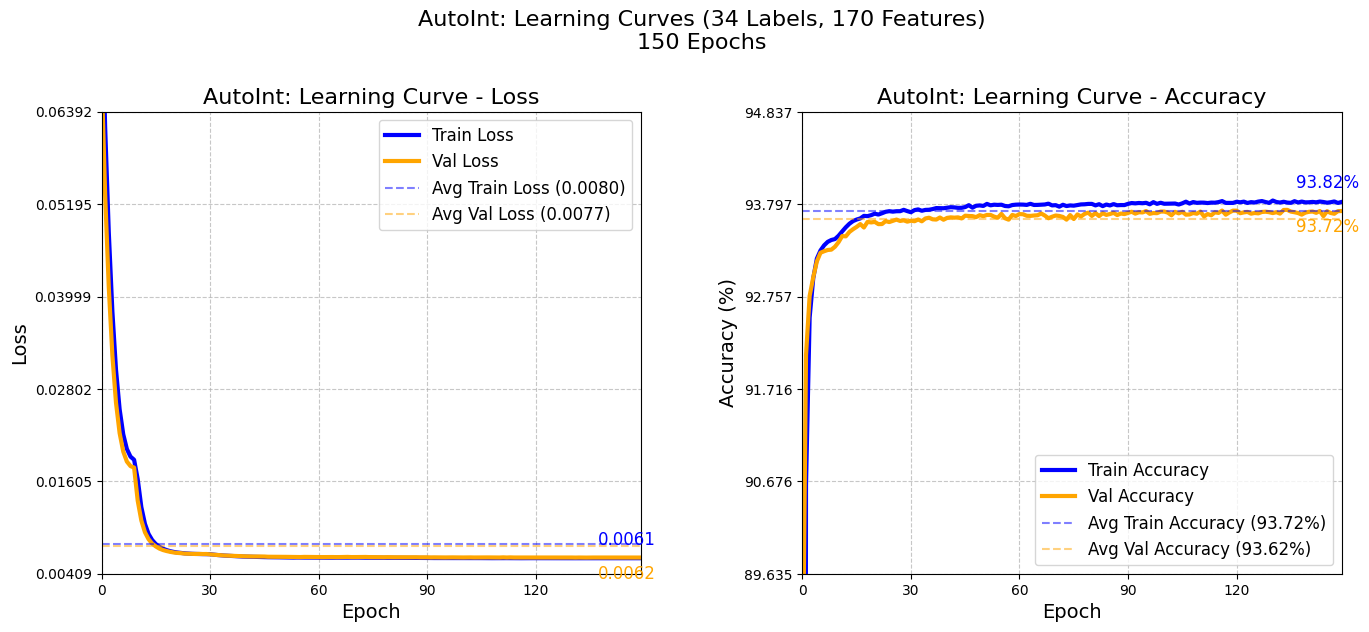

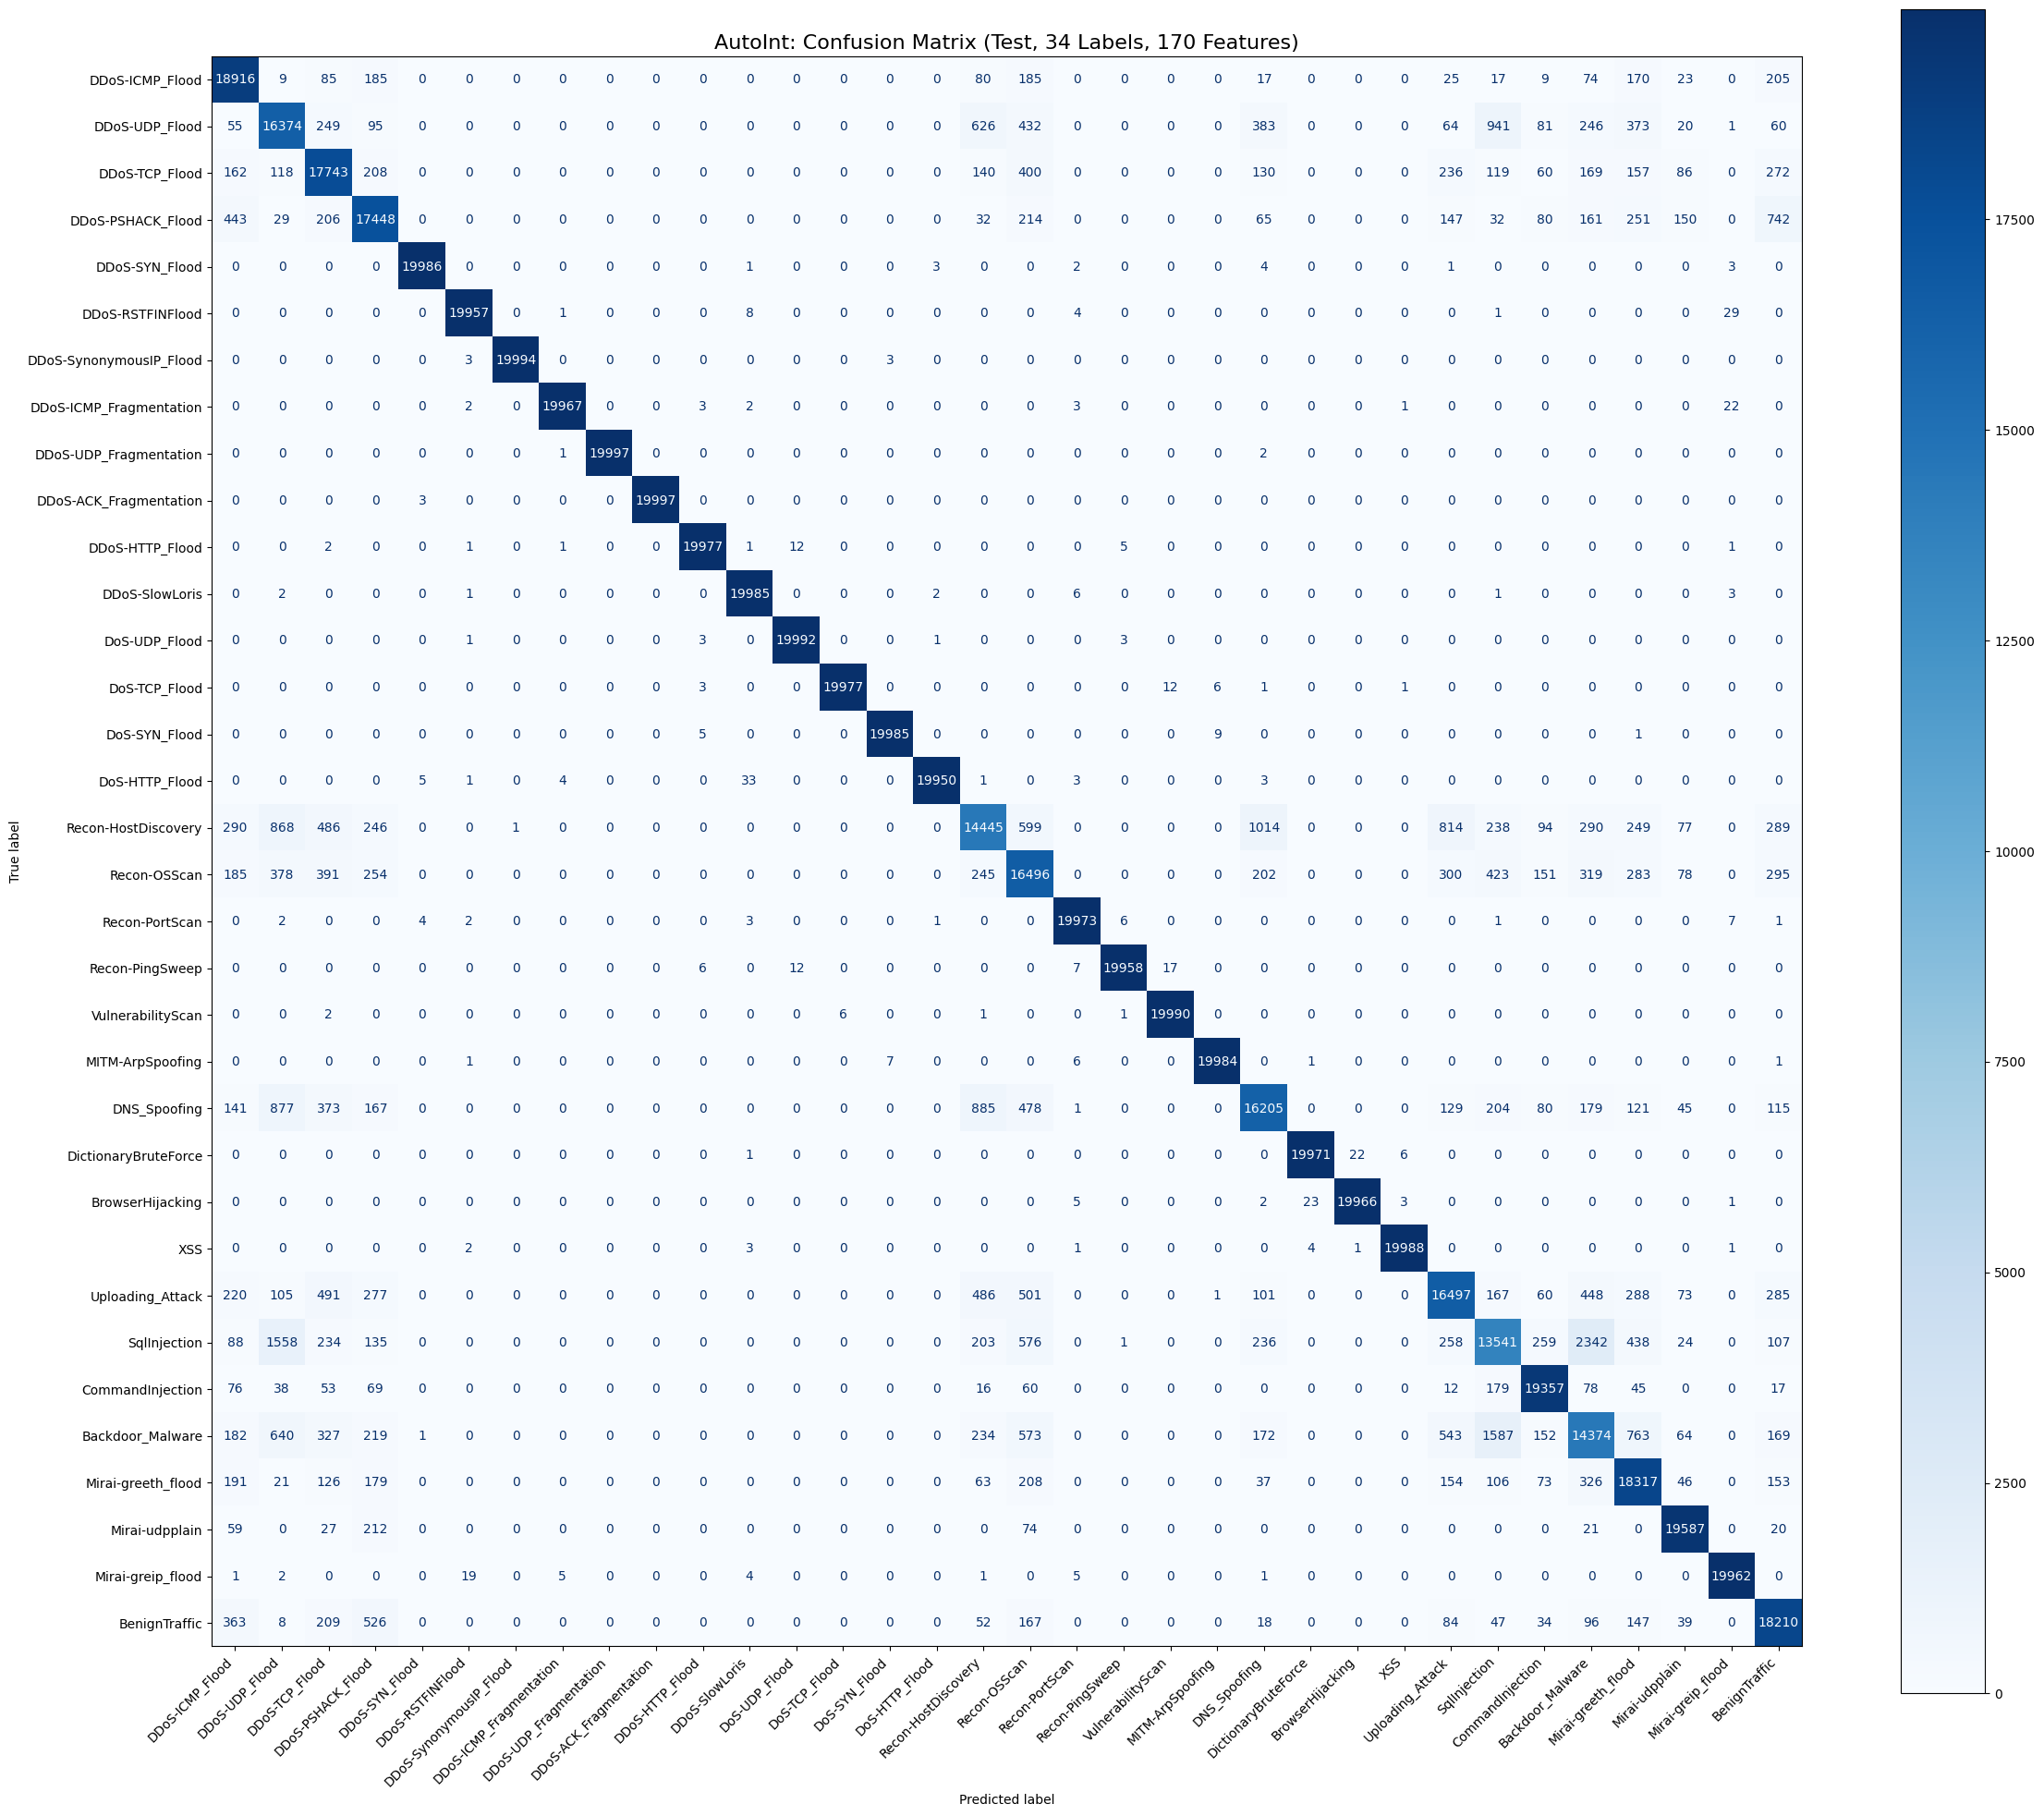

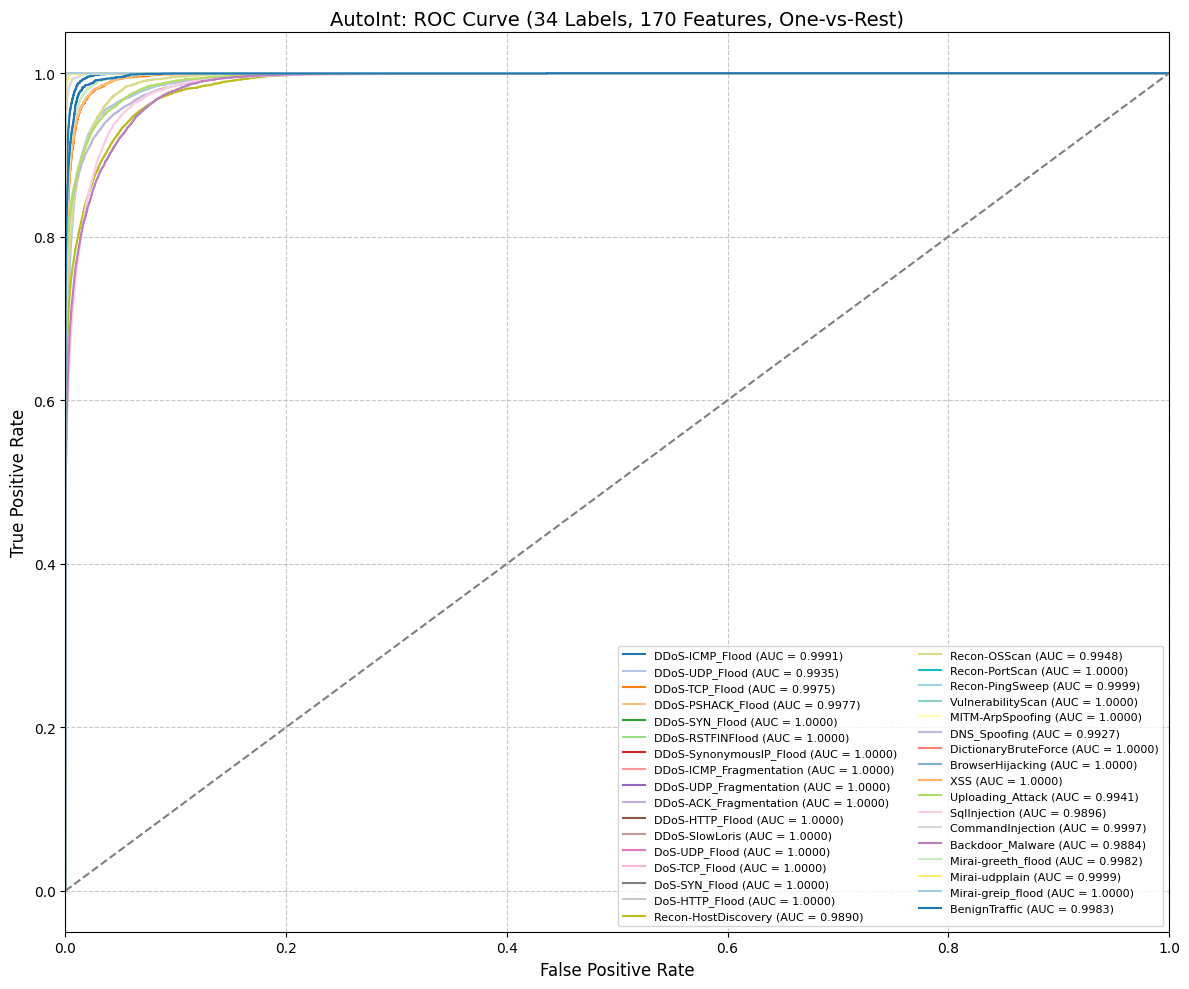

📈 AutoInt Macro-average ROC-AUC Score (34 Labels): 0.9980
Shape of test_features: (680000, 34)


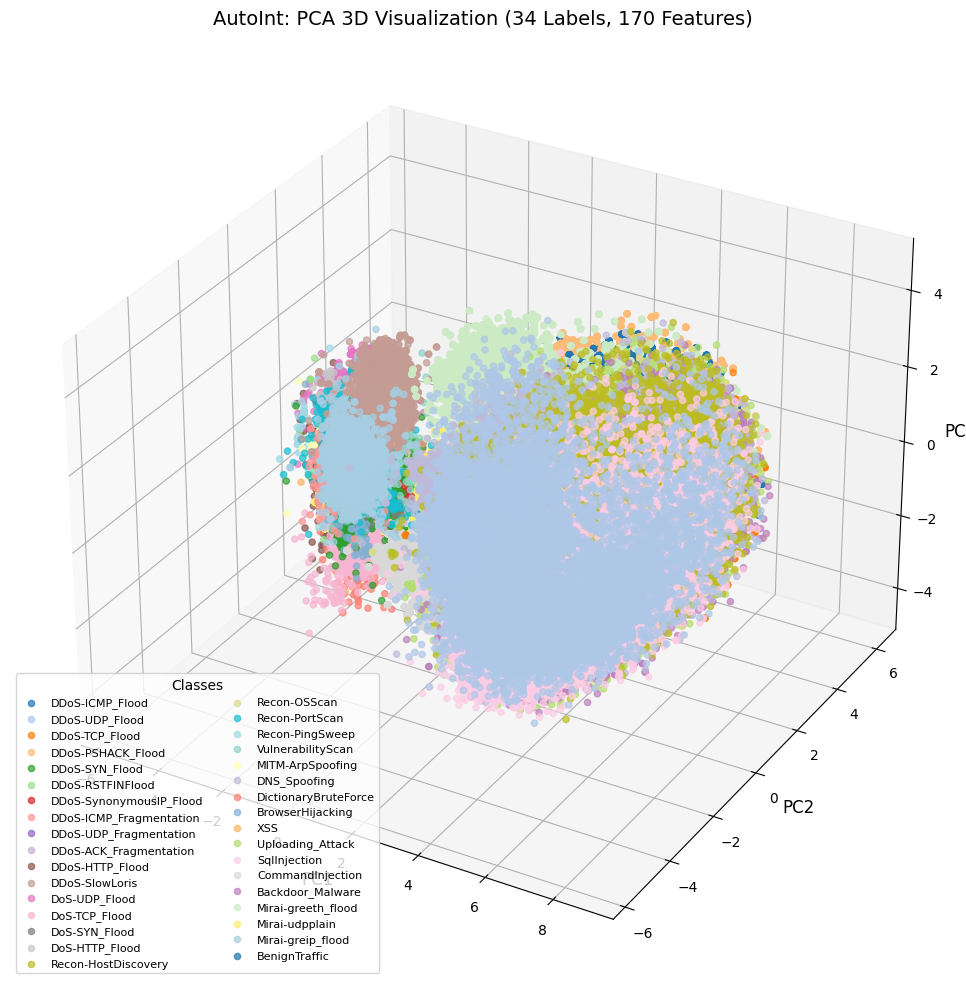

Shape of feature_importance: (170,)


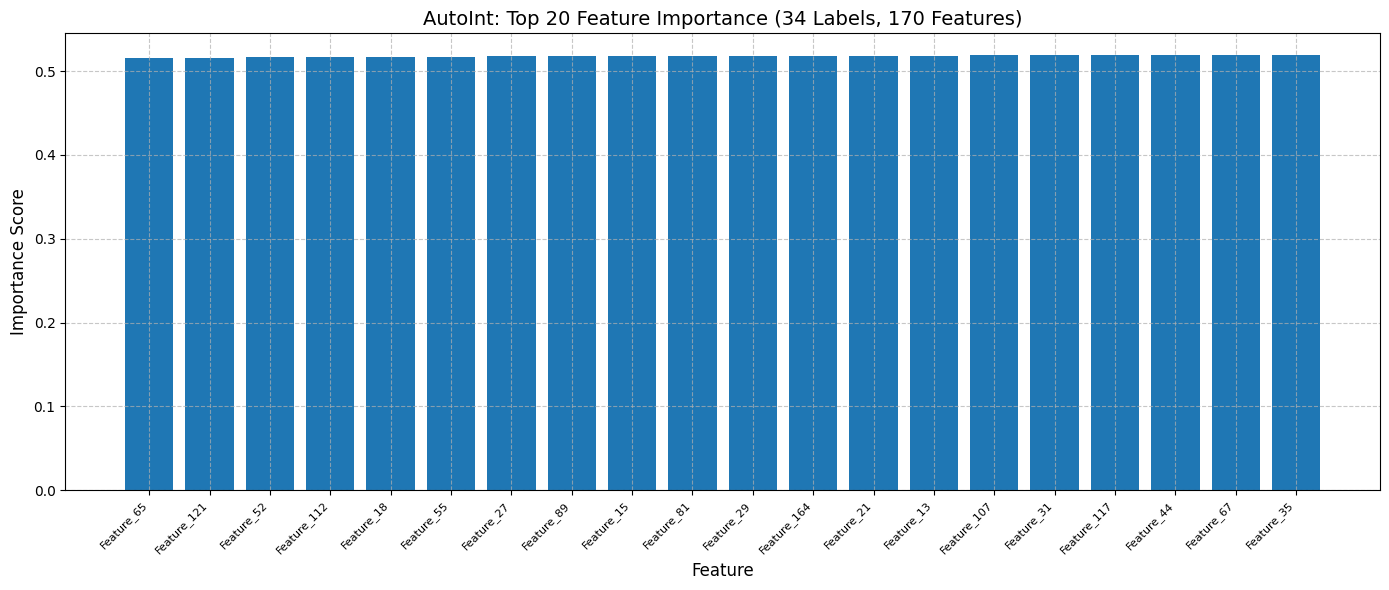

⏱️ AutoInt Thời gian huấn luyện trung bình mỗi epoch: 40.38 giây

📊 AutoInt Giá trị trung bình (150 epoch):
Train Loss trung bình: 0.0084
Val Loss trung bình: 0.0081
Train Accuracy trung bình: 93.50%
Val Accuracy trung bình: 93.59%


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score, roc_curve
from sklearn.decomposition import PCA
import matplotlib.colors as mcolors
import os

# Thư mục lưu dữ liệu
results_dir = "results"
output_dir = "processed_data"

# Ánh xạ nhãn cho bài toán 34 nhãn
label_map = {
    0: 'DDoS-ICMP_Flood', 1: 'DDoS-UDP_Flood', 2: 'DDoS-TCP_Flood', 3: 'DDoS-PSHACK_Flood',
    4: 'DDoS-SYN_Flood', 5: 'DDoS-RSTFINFlood', 6: 'DDoS-SynonymousIP_Flood', 7: 'DDoS-ICMP_Fragmentation',
    8: 'DDoS-UDP_Fragmentation', 9: 'DDoS-ACK_Fragmentation', 10: 'DDoS-HTTP_Flood', 11: 'DDoS-SlowLoris',
    12: 'DoS-UDP_Flood', 13: 'DoS-TCP_Flood', 14: 'DoS-SYN_Flood', 15: 'DoS-HTTP_Flood',
    16: 'Recon-HostDiscovery', 17: 'Recon-OSScan', 18: 'Recon-PortScan', 19: 'Recon-PingSweep',
    20: 'VulnerabilityScan', 21: 'MITM-ArpSpoofing', 22: 'DNS_Spoofing', 23: 'DictionaryBruteForce',
    24: 'BrowserHijacking', 25: 'XSS', 26: 'Uploading_Attack', 27: 'SqlInjection', 28: 'CommandInjection',
    29: 'Backdoor_Malware', 30: 'Mirai-greeth_flood', 31: 'Mirai-udpplain', 32: 'Mirai-greip_flood',
    33: 'BenignTraffic'
}
class_names = [label_map[i] for i in range(len(label_map))]

# Tạo bảng màu với 34 màu khác nhau
colors = plt.cm.tab20(np.linspace(0, 1, 20))
colors2 = plt.cm.Set3(np.linspace(0, 1, 12))
colors3 = plt.cm.Paired(np.linspace(0, 1, 12))
colors_combined = np.vstack((colors[:20], colors2[:12], colors3[:2]))
colors_list = [mcolors.to_hex(color) for color in colors_combined]

# Tải dữ liệu
try:
    train_losses = np.load(f"{results_dir}/train_losses_34labels_170features_autoint.npy")
    val_losses = np.load(f"{results_dir}/val_losses_34labels_170features_autoint.npy")
    train_accuracies = np.load(f"{results_dir}/train_accuracies_34labels_170features_autoint.npy")
    val_accuracies = np.load(f"{results_dir}/val_accuracies_34labels_170features_autoint.npy")
    epoch_times = np.load(f"{results_dir}/epoch_times_34labels_170features_autoint.npy")
    test_labels = np.load(f"{results_dir}/test_labels_34labels_170features_autoint.npy")
    test_probs = np.load(f"{results_dir}/test_probs_34labels_170features_autoint.npy")
    test_features = np.load(f"{results_dir}/test_features_34labels_170features_autoint.npy")
    cm = np.load(f"{results_dir}/confusion_matrix_test_34labels_170features_autoint.npy")
    feature_importance = np.load(f"{results_dir}/feature_importance_34labels_170features_autoint.npy")
    print("✅ Đã tải dữ liệu cho AutoInt (34 nhãn, 170 đặc trưng)")
except Exception as e:
    print(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra shape và giá trị
expected_epochs = 150
if train_losses.shape != (expected_epochs,) or val_losses.shape != (expected_epochs,):
    raise ValueError(f"Shape của train_losses hoặc val_losses không đúng: {train_losses.shape}, {val_losses.shape}")
if train_accuracies.shape != (expected_epochs,) or val_accuracies.shape != (expected_epochs,):
    raise ValueError(f"Shape của train_accuracies hoặc val_accuracies không đúng: {train_accuracies.shape}, {val_accuracies.shape}")
if np.any(train_losses < 0) or np.any(val_losses < 0) or np.any(np.isnan(train_losses)) or np.any(np.isnan(val_losses)):
    raise ValueError("train_losses hoặc val_losses chứa giá trị âm hoặc NaN")
if np.any(train_accuracies < 0) or np.any(train_accuracies > 100) or np.any(val_accuracies < 0) or np.any(val_accuracies > 100):
    raise ValueError("train_accuracies hoặc val_accuracies chứa giá trị ngoài khoảng [0, 100]")
if test_probs.shape[1] != 34 or np.any(test_probs < 0) or np.any(test_probs > 1):
    raise ValueError(f"test_probs phải có shape (n_samples, 34) và giá trị trong [0, 1], nhưng có shape {test_probs.shape}")
if cm.shape != (34, 34):
    raise ValueError(f"Confusion matrix phải có shape (34, 34), nhưng có shape {cm.shape}")

# Kiểm tra số mẫu đồng bộ
n_samples = len(test_labels)
if test_features.shape[0] != n_samples:
    print(f"⚠️ Số mẫu trong test_features ({test_features.shape[0]}) không khớp với test_labels ({n_samples}). Cắt bớt để đồng bộ.")
    test_features = test_features[:n_samples]
if test_probs.shape[0] != n_samples:
    print(f"⚠️ Số mẫu trong test_probs ({test_probs.shape[0]}) không khớp với test_labels ({n_samples}). Cắt bớt để đồng bộ.")
    test_probs = test_probs[:n_samples]

# 1️⃣ & 2️⃣ Learning Curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
epochs = np.arange(150)

# Loss
ax1.plot(epochs, train_losses, label="Train Loss", linestyle="-", color="blue", linewidth=3.0)
ax1.plot(epochs, val_losses, label="Val Loss", linestyle="-", color="orange", linewidth=3.0)
ax1.set_xlabel("Epoch", fontsize=14)
ax1.set_ylabel("Loss", fontsize=14)
ax1.set_title("AutoInt: Learning Curve - Loss", fontsize=16)
ax1.legend(loc="upper right", fontsize=12)
ax1.grid(True, linestyle="--", alpha=0.7)
ax1.set_xlim(0, 149)
ax1.set_xticks(np.arange(0, 150, 30))
loss_min = min(train_losses[1:].min(), val_losses[1:].min())
loss_max = max(train_losses[1:].max(), val_losses[1:].max())
ax1.set_ylim(loss_min - 0.002, loss_max + 0.002)
ax1.set_yticks(np.linspace(loss_min - 0.002, loss_max + 0.002, 6))
avg_train_loss = np.mean(train_losses[1:])
avg_val_loss = np.mean(val_losses[1:])
ax1.axhline(y=avg_train_loss, color="blue", linestyle="--", alpha=0.5, label=f"Avg Train Loss ({avg_train_loss:.4f})")
ax1.axhline(y=avg_val_loss, color="orange", linestyle="--", alpha=0.5, label=f"Avg Val Loss ({avg_val_loss:.4f})")
ax1.annotate(f"{train_losses[-1]:.4f}", (149, train_losses[-1]), textcoords="offset points", xytext=(-10, 10), ha="center", color="blue", fontsize=12)
ax1.annotate(f"{val_losses[-1]:.4f}", (149, val_losses[-1]), textcoords="offset points", xytext=(-10, -15), ha="center", color="orange", fontsize=12)
ax1.legend(loc="upper right", fontsize=12)

# Accuracy
ax2.plot(epochs, train_accuracies, label="Train Accuracy", linestyle="-", color="blue", linewidth=3.0)
ax2.plot(epochs, val_accuracies, label="Val Accuracy", linestyle="-", color="orange", linewidth=3.0)
ax2.set_xlabel("Epoch", fontsize=14)
ax2.set_ylabel("Accuracy (%)", fontsize=14)
ax2.set_title("AutoInt: Learning Curve - Accuracy", fontsize=16)
ax2.legend(loc="lower right", fontsize=12)
ax2.grid(True, linestyle="--", alpha=0.7)
ax2.set_xlim(0, 149)
ax2.set_xticks(np.arange(0, 150, 30))
acc_min = min(train_accuracies[1:].min(), val_accuracies[1:].min())
acc_max = max(train_accuracies[1:].max(), val_accuracies[1:].max())
ax2.set_ylim(acc_min - 1, acc_max + 1)
ax2.set_yticks(np.linspace(acc_min - 1, acc_max + 1, 6))
avg_train_accuracy = np.mean(train_accuracies[1:])
avg_val_accuracy = np.mean(val_accuracies[1:])
ax2.axhline(y=avg_train_accuracy, color="blue", linestyle="--", alpha=0.5, label=f"Avg Train Accuracy ({avg_train_accuracy:.2f}%)")
ax2.axhline(y=avg_val_accuracy, color="orange", linestyle="--", alpha=0.5, label=f"Avg Val Accuracy ({avg_val_accuracy:.2f}%)")
ax2.annotate(f"{train_accuracies[-1]:.2f}%", (149, train_accuracies[-1]), textcoords="offset points", xytext=(-10, 10), ha="center", color="blue", fontsize=12)
ax2.annotate(f"{val_accuracies[-1]:.2f}%", (149, val_accuracies[-1]), textcoords="offset points", xytext=(-10, -15), ha="center", color="orange", fontsize=12)
ax2.legend(loc="lower right", fontsize=12)

plt.suptitle("AutoInt: Learning Curves (34 Labels, 170 Features)\n150 Epochs", fontsize=16, y=1.05)
plt.subplots_adjust(wspace=0.3)
plt.savefig(f"{results_dir}/learning_curves_autoint_34labels_170features.png", bbox_inches="tight")
plt.show()

# 3️⃣ Confusion Matrix
fig, ax = plt.subplots(figsize=(24, 20))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap="Blues", values_format="d", ax=ax, colorbar=True)
for text in disp.text_.ravel():
    text.set_fontsize(10)
plt.title("AutoInt: Confusion Matrix (Test, 34 Labels, 170 Features)", fontsize=16)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig(f"{results_dir}/confusion_matrix_autoint_34labels_170features.png")
plt.show()

# 4️⃣ ROC-AUC
plt.figure(figsize=(12, 10))
for i in range(34):
    binary_labels = (test_labels == i).astype(int)
    fpr, tpr, _ = roc_curve(binary_labels, test_probs[:, i])
    roc_auc = roc_auc_score(binary_labels, test_probs[:, i])
    plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {roc_auc:.4f})", color=colors_list[i])
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("AutoInt: ROC Curve (34 Labels, 170 Features, One-vs-Rest)", fontsize=14)
plt.legend(loc="lower right", fontsize=8, ncol=2)
plt.grid(True, linestyle="--", alpha=0.7)
plt.xlim(0, 1)
plt.tight_layout()
plt.savefig(f"{results_dir}/roc_curve_autoint_34labels_170features.png", bbox_inches="tight")
plt.show()

macro_roc_auc = roc_auc_score(test_labels, test_probs, average="macro", multi_class="ovr")
print(f"📈 AutoInt Macro-average ROC-AUC Score (34 Labels): {macro_roc_auc:.4f}")

# 5️⃣ PCA 3D
print(f"Shape of test_features: {test_features.shape}")
n_samples, n_features = test_features.shape

if n_samples < 3:
    print(f"Warning: Only {n_samples} samples available. Skipping PCA 3D.")
else:
    pca = PCA(n_components=3)
    try:
        pca_result = pca.fit_transform(test_features)
        fig = plt.figure(figsize=(12, 10))
        ax = fig.add_subplot(111, projection='3d')
        for label in range(34):
            idx = test_labels == label
            ax.scatter(pca_result[idx, 0], pca_result[idx, 1], pca_result[idx, 2], 
                       label=label_map[label], alpha=0.7, color=colors_list[label])
        ax.set_xlabel("PC1", fontsize=12)
        ax.set_ylabel("PC2", fontsize=12)
        ax.set_zlabel("PC3", fontsize=12)
        ax.set_title("AutoInt: PCA 3D Visualization (34 Labels, 170 Features)", fontsize=14)
        ax.legend(title="Classes", loc="best", fontsize=8, ncol=2)
        plt.tight_layout()
        plt.savefig(f"{results_dir}/pca_3d_autoint_34labels_170features.png")
        plt.show()
    except ValueError as e:
        print(f"PCA failed: {e}")
        print("Consider increasing the number of samples or features.")

# 6️⃣ Feature Importance
print(f"Shape of feature_importance: {feature_importance.shape}")
if len(feature_importance.shape) == 2:
    avg_importance = np.mean(feature_importance, axis=0)
else:
    avg_importance = feature_importance

input_dim = 170
selected_features = [f"Feature_{i+1}" for i in range(170)]
feature_labels = selected_features

top_k = 20
top_indices = np.argsort(avg_importance)[-top_k:]
top_importance = avg_importance[top_indices]
top_labels = [feature_labels[i] for i in top_indices]

plt.figure(figsize=(14, 6))
plt.bar(range(len(top_importance)), top_importance, tick_label=top_labels)
plt.xlabel("Feature", fontsize=12)
plt.ylabel("Importance Score", fontsize=12)
plt.title("AutoInt: Top 20 Feature Importance (34 Labels, 170 Features)", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig(f"{results_dir}/feature_importance_autoint_34labels_170features.png")
plt.show()

# 7️⃣ Thời gian huấn luyện
avg_time = np.mean(epoch_times)
print(f"⏱️ AutoInt Thời gian huấn luyện trung bình mỗi epoch: {avg_time:.2f} giây")

# 8️⃣ Giá trị trung bình
avg_train_loss = np.mean(train_losses)
avg_val_loss = np.mean(val_losses)
avg_train_accuracy = np.mean(train_accuracies)
avg_val_accuracy = np.mean(val_accuracies)

print("\n📊 AutoInt Giá trị trung bình (150 epoch):")
print(f"Train Loss trung bình: {avg_train_loss:.4f}")
print(f"Val Loss trung bình: {avg_val_loss:.4f}")
print(f"Train Accuracy trung bình: {avg_train_accuracy:.2f}%")
print(f"Val Accuracy trung bình: {avg_val_accuracy:.2f}%")

# **CODE TẢI KẾT QUẢ**

In [10]:
import os
import zipfile
from IPython.display import FileLink

# Đường dẫn đến các thư mục
processed_data_dir = "/kaggle/working/processed_data"
results_dir = "/kaggle/working/results"

# Tạo file ZIP cho thư mục processed_data
# processed_zip = "/kaggle/working/processed_data.zip"
# with zipfile.ZipFile(processed_zip, 'w', zipfile.ZIP_DEFLATED) as zipf:
#     for root, dirs, files in os.walk(processed_data_dir):
#         for file in files:
#             file_path = os.path.join(root, file)
#             # Thêm file vào ZIP với đường dẫn tương đối
#             zipf.write(file_path, os.path.relpath(file_path, "/kaggle/working"))

# Tạo file ZIP cho thư mục results
results_zip = "/kaggle/working/results.zip"
with zipfile.ZipFile(results_zip, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk(results_dir):
        for file in files:
            file_path = os.path.join(root, file)
            # Thêm file vào ZIP với đường dẫn tương đối
            zipf.write(file_path, os.path.relpath(file_path, "/kaggle/working"))

# Hiển thị liên kết tải xuống
# print("Tải xuống processed_data.zip:")
# display(FileLink("processed_data.zip"))

print("Tải xuống results.zip:")
display(FileLink("results.zip"))

Tải xuống results.zip:


/kaggle/working/results.zip